# The Big 3

![SegmentLocal](./Images/2.jpeg "poster")

![SegmentLocal](./Images/4.jpeg "poster")

In [42]:
import os      
import pandas as pd
import plotly.graph_objects as go
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import os             
folder = "./Data/"
folders = os.listdir(folder)
#print(folders)

song_lyrics = []

for artist in folders:
    for album in (os.listdir(folder+'/'+artist)):
        for song in (os.listdir(folder+'/'+artist + '/' + album)):
            song_lyrics.append(artist+'/'+album+'/'+song)
print(song_lyrics)

['Drake', 'Lil Wayne', 'Nicki Minaj']
['Drake/Nothing Was The Same/305 To My City.txt', 'Drake/Nothing Was The Same/All Me.txt', 'Drake/Nothing Was The Same/Come Thru.txt', 'Drake/Nothing Was The Same/Connect.txt', 'Drake/Nothing Was The Same/From Time.txt', 'Drake/Nothing Was The Same/Furthest Thing.txt', "Drake/Nothing Was The Same/Hold On, We're Going Home.txt", 'Drake/Nothing Was The Same/Own It.txt', 'Drake/Nothing Was The Same/Pound Cake - Paris Morton.txt', 'Drake/Nothing Was The Same/Started From The Bottom.txt', 'Drake/Nothing Was The Same/The Language.txt', 'Drake/Nothing Was The Same/The Motion.txt', 'Drake/Nothing Was The Same/Too Much.txt', 'Drake/Nothing Was The Same/Tuscan Leather.txt', 'Drake/Nothing Was The Same/Worst Behavior.txt', 'Drake/Nothing Was The Same/Wu Tang Forever.txt', 'Drake/Scorpion/8 0ut 10.txt', 'Drake/Scorpion/After Dark.txt', 'Drake/Scorpion/Blue Tint.txt', "Drake/Scorpion/Can't Take A Joke.txt", 'Drake/Scorpion/Dont Matter To Me.txt', 'Drake/Scorpio

In [15]:
import pandas as pd
corpus = []

for song in song_lyrics:
    with open(folder+song,'rb') as f_input:
        corpus.append(f_input.read())

In [17]:
words_list = []

for phrase in corpus:
    words_list.append((str(phrase)).split())

In [18]:
words_corpus = []
for words in words_list:
    for word in words:
        words_corpus.append(word)
#print(words_corpus)

In [19]:
from collections import Counter

word_count = Counter(words_corpus)
a = 0
#print(word_count.most_common())

for i in word_count.most_common():
    a += (i[1])
print(a)
#print(word_count.most_common())

254829


![SegmentLocal](./Images/1.jpg "poster")

In [26]:
import time
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/big_3.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    
    try:
        document = types.Document(
        content=corpus[i],
        
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    
   
        sentiment = client.analyze_sentiment(document=document).document_sentiment
        #response = client.analyze_entities(document)
        #response1 = client.analyze_entity_sentiment(document)
        #response2 = client.analyze_syntax(document)
        response3 = client.classify_text(document)
        
    except:
        pass

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ song_lyrics[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]

Document: Drake/Nothing Was The Same/305 To My City
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Drake/Nothing Was The Same/All Me
Sentiment Prediction: -0.699999988079071, Sentiment Analysis: Negative


Document: Drake/Nothing Was The Same/Come Thru
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Drake/Nothing Was The Same/Connect
Sentiment Prediction: -0.4000000059604645, Sentiment Analysis: Negative


Document: Drake/Nothing Was The Same/From Time
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Drake/Nothing Was The Same/Furthest Thing
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Drake/Nothing Was The Same/Hold On, We're Going Home
Sentiment Prediction: 0.4000000059604645, Sentiment Analysis: Slightly Positive


Document: Drake/Nothing Was The Same/Own It
Sentiment Prediction: -0.30000001192092896, Sentiment Analysis: Negative


Document: Drake/Nothing Was The Same/P

Document: Drake/Thank Me Later/Thank Me Now
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Drake/Thank Me Later/The Resistance
Sentiment Prediction: -0.4000000059604645, Sentiment Analysis: Negative


Document: Drake/Thank Me Later/Unforgettable
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Drake/Thank Me Later/Up All Night
Sentiment Prediction: -0.4000000059604645, Sentiment Analysis: Negative


Document: Drake/Views/9
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Drake/Views/Child's Play
Sentiment Prediction: -0.30000001192092896, Sentiment Analysis: Negative


Document: Drake/Views/Controlla
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Drake/Views/Faithful
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Drake/Views/Feel No Ways
Sentiment Prediction: -0.5, Sentiment Analysis: Negative


Document: Drake/Views/Fire and Desire
Sentiment Prediction: -

Document: Lil Wayne/Funeral/Not Me
Sentiment Prediction: -0.30000001192092896, Sentiment Analysis: Negative


Document: Lil Wayne/Funeral/Piano Trap
Sentiment Prediction: -0.30000001192092896, Sentiment Analysis: Negative


Document: Lil Wayne/Funeral/Sights and Silencers
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Lil Wayne/Funeral/Stop Playin Wit Me
Sentiment Prediction: -0.5, Sentiment Analysis: Negative


Document: Lil Wayne/Funeral/T.O
Sentiment Prediction: -0.4000000059604645, Sentiment Analysis: Negative


Document: Lil Wayne/Funeral/Trust Nobody
Sentiment Prediction: -0.30000001192092896, Sentiment Analysis: Negative


Document: Lil Wayne/Funeral/Wayne's World
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: Lil Wayne/Funeral/Wild Dogs
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: Lil Wayne/IANAHB/Bill Gates
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Neg

Document: Lil Wayne/Like Father, Like Son/Leather So Soft
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/Like Father Like Son
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/Loyalty
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/Neighbourhood Superstars
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/No More
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/Out The Pound
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/Over Hustlin
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Lil Wayne/Like Father, Like Son/Protector Skit
Sentiment Prediction

Document: Lil Wayne/Tha Carter II/Fireman
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Lil Wayne/Tha Carter II/Fly In
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter II/Fly Out
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter II/Get Over
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter II/Grown Man
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Lil Wayne/Tha Carter II/Hit em Up
Sentiment Prediction: -0.5, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter II/Hustler Musik
Sentiment Prediction: -0.5, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter II/Im a D Boy
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter II/Lock And Load
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negativ

Document: Lil Wayne/Tha Carter V/Dope New Gospel
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter V/dope niggaz
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter V/Famous
Sentiment Prediction: 0.20000000298023224, Sentiment Analysis: Slightly Positive


Document: Lil Wayne/Tha Carter V/Hittas
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter V/I love you Dwayne
Sentiment Prediction: 0.8999999761581421, Sentiment Analysis: Positive


Document: Lil Wayne/Tha Carter V/Let it All Work Out
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter V/Let It Fly
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter V/Mess
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: Lil Wayne/Tha Carter V/Mon

Document: Nicki Minaj/Pink Friday - Roman Reloaded/Fire Burns
Sentiment Prediction: -0.6000000238418579, Sentiment Analysis: Negative


Document: Nicki Minaj/Pink Friday - Roman Reloaded/Gun Shot
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: Nicki Minaj/Pink Friday - Roman Reloaded/Hov Lane
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Nicki Minaj/Pink Friday - Roman Reloaded/I Am Your Leader
Sentiment Prediction: -0.30000001192092896, Sentiment Analysis: Negative


Document: Nicki Minaj/Pink Friday - Roman Reloaded/Marilyn Monroe
Sentiment Prediction: -0.20000000298023224, Sentiment Analysis: Negative


Document: Nicki Minaj/Pink Friday - Roman Reloaded/Masquerade
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Nicki Minaj/Pink Friday - Roman Reloaded/Pound The Alarm
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Nicki Minaj/Pink Friday - Roman

Document: Nicki Minaj/The PinkPrint/Win Again
Sentiment Prediction: -0.4000000059604645, Sentiment Analysis: Negative




In [32]:
print("Total Number of Songs: " + str(len(song_lyrics)))

Total Number of Songs: 496


In [35]:
print("Total Number of Songs with Negative Sentiment: " + str(neg))

Total Number of Songs with Negative Sentiment: 366


In [36]:
print("Total Number of Songs with Positive Sentiment: " + str(pos))

Total Number of Songs with Positive Sentiment: 4


In [37]:
print("Total Number of Songs with Slightly Positive Sentiment: " + str(s_pos))
print("Total Number of Songs with Neutral Sentiment: " + str(neu))

Total Number of Songs with Slightly Positive Sentiment: 32
Total Number of Songs with Neutral Sentiment: 94


In [45]:
titles = ["Slightly Positive Sentiment", "Positive Sentiment", "Negative Sentiment", "Neutral Sentiment"]
total_num=[pos,s_pos,neu,neg]

In [47]:
fig = go.Figure(data=[go.Pie(labels=titles, values=total_num, title="Pie Chart of Sentiment Analysis of Songs")])
fig.show()

In [40]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    try:
        document = types.Document(
            content=corpus[i],
            type=enums.Document.Type.PLAIN_TEXT)
        # Detects the sentiment of the text
        #sentiment = client.analyze_sentiment(document=document).document_sentiment
        response = client.analyze_entities(document)
        #response1 = client.analyze_entity_sentiment(document)
        #response2 = client.analyze_syntax(document)
        #response3 = client.classify_text(document)
        person = []
        number = []
        consumer = []
        event = []
        location = []
        organization = []

        for j in range(len(response.entities)):
            if (response.entities[j].type) == 1:
                person.append(response.entities[j].name)
                persons.append(str(response.entities[j].name))
            elif (response.entities[j].type) == 12:
                number.append(response.entities[j].name)
                numbers.append(str(response.entities[j].name))
            elif (response.entities[j].type) == 6:
                consumer.append(response.entities[j].name)
                consumers.append(str(response.entities[j].name))
            elif (response.entities[j].type) == 4:
                event.append(response.entities[j].name)
                events.append(str(response.entities[j].name))
            elif (response.entities[j].type) == 2:
                location.append(response.entities[j].name)
                locations.append(str(response.entities[j].name))
            elif (response.entities[j].type) == 3:
                organization.append(response.entities[j].name)
                organizations.append(str(response.entities[j].name))
    except:
        pass
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in Drake/Nothing Was The Same/305 To My City Letter
['baby', 'parents', 'Drake', 'roommate', 'baby', 'baby', 'girl', 'girl', 'man', 'best friend', 'Lord', 'momma', 'best friend', 'Sunday Oh Lord', 'LIV']

Number Entities Named in Drake/Nothing Was The Same/305 To My City Letter
['305', '281', '305', '305', '12', '1', '2']

Consumer Entities Named in Drake/Nothing Was The Same/305 To My City Letter
['champagne']

Event Entities Named in Drake/Nothing Was The Same/305 To My City Letter
['phase']

Location Entities Named in Drake/Nothing Was The Same/305 To My City Letter
['city', 'Bridge', 'Bridge', 'Locker room', 'Bridge', 'church', 'church', 'Kansas']

Organization Entities Named in Drake/Nothing Was The Same/305 To My City Letter
['Intro', 'Jaguar', 'Shine']


Person Entities Named in Drake/Nothing Was The Same/All Me Letter
['baby', 'parents', 'Drake', 'roommate', 'baby', 'baby', 'girl', 'girl', 'man', 'best friend', 'Lord', 'momma', 'best friend', 'Sunday Oh Lo

Person Entities Named in Drake/Nothing Was The Same/The Language Letter
['friends', 'momma', 'uncle', 'man', 'friend', 'Boys', 'explainin', 'explainin', 'niggas', 'boy', 'friend', 'man']

Number Entities Named in Drake/Nothing Was The Same/The Language Letter
['a million', '2', '1']

Consumer Entities Named in Drake/Nothing Was The Same/The Language Letter
['Verse 2']

Event Entities Named in Drake/Nothing Was The Same/The Language Letter
['bout']

Location Entities Named in Drake/Nothing Was The Same/The Language Letter
['house', 'home', 'house', 'road', 'Bridge']

Organization Entities Named in Drake/Nothing Was The Same/The Language Letter
['team', 'team', 'team', 'team', 'team', 'Intro', 'team', 'Nigga']


Person Entities Named in Drake/Nothing Was The Same/The Motion Letter
['everybody', 'Drake', 'everybody', 'girl', 'man', 'somebody', 'Sampha', 'somebody']

Number Entities Named in Drake/Nothing Was The Same/The Motion Letter
[' ', 'you ', 'g', ',', 'h']

Consumer Entities Named 

Person Entities Named in Drake/Scorpion/Elevate Letter
['Wavy God', 'niggas', 'Creighton', 'lady', 'Satan', 'man', 'Braden', 'Franny', 'Freaknik Vegas', 'family', 'family', 'guys', 'Georgie']

Number Entities Named in Drake/Scorpion/Elevate Letter
[]

Consumer Entities Named in Drake/Scorpion/Elevate Letter
['shit', 'Champagne', 'Aria']

Event Entities Named in Drake/Scorpion/Elevate Letter
['occasion', 'road trips']

Location Entities Named in Drake/Scorpion/Elevate Letter
['Bzz', 'Dayton', 'Cincinnati', 'Haan', 'Marineland']

Organization Entities Named in Drake/Scorpion/Elevate Letter
[]


Person Entities Named in Drake/Scorpion/Emotionless Letter
['people', 'girl', 'people', 'heroes', 'people', 'Drake', 'niggas', 'people', 'anybody', 'brothers', 'anybody', 'duos', 'souls', 'somebody', 'somebody', 'someone', 'strangers', 'people', 'kid', 'kid', 'Mariah Carey', 'Scrollin', 'man', 'girl', 'people', 'girl', 'girl', 'followers', 'everybody']

Number Entities Named in Drake/Scorpion/Emot

Person Entities Named in Drake/Scorpion/PEak Letter
['Rest', 'girls', 'People', 'Stefflon Don) Bitch', 'Diana Piquing', 'Drake', 'someone', 'Outro: Stefflon Don', 'boy', 'Girl', 'girl', 'Vinessa Douglas', 'Rhea Kpaka']

Number Entities Named in Drake/Scorpion/PEak Letter
['2', 'four', '1']

Consumer Entities Named in Drake/Scorpion/PEak Letter
[]

Event Entities Named in Drake/Scorpion/PEak Letter
[]

Location Entities Named in Drake/Scorpion/PEak Letter
['heaven', 'world']

Organization Entities Named in Drake/Scorpion/PEak Letter
['Montana England']


Person Entities Named in Drake/Scorpion/Ratchet Happy Birthday Letter
['Drake', 'baby', 'Reese', 'baby', 'somebody', 'all', 'CC']

Number Entities Named in Drake/Scorpion/Ratchet Happy Birthday Letter
[':', 'y']

Consumer Entities Named in Drake/Scorpion/Ratchet Happy Birthday Letter
[]

Event Entities Named in Drake/Scorpion/Ratchet Happy Birthday Letter
['Verse 1', 'celebration', 'Verse 2', 'birthday', 'birthday', 'birthday']

Locatio

Person Entities Named in Drake/Take Care/Headlines Letter
['someone', 'millions', 'someone', 'brothers', 'guys', 'girl', 'niggas', 'Soap opera rappers', 'Tuck', 'guys', 'Drizzy', 'Drake', 'All My Children', 'family', 'Outro']

Number Entities Named in Drake/Take Care/Headlines Letter
['1', '2', 'one']

Consumer Entities Named in Drake/Take Care/Headlines Letter
['Verse 1', 'shirt']

Event Entities Named in Drake/Take Care/Headlines Letter
['bout']

Location Entities Named in Drake/Take Care/Headlines Letter
[]

Organization Entities Named in Drake/Take Care/Headlines Letter
['No']


Person Entities Named in Drake/Take Care/HYFR Letter
['angel', 'exes', 'girl', 'Lil Wayne & Drake', 'George Strait', 'girl', 'women', 'Hennessy', 'Lil Wayne', 'Lil Wayne) Uhh', 'each other']

Number Entities Named in Drake/Take Care/HYFR Letter
[' ', '\r', 'ett']

Consumer Entities Named in Drake/Take Care/HYFR Letter
['sushi']

Event Entities Named in Drake/Take Care/HYFR Letter
['Interviews', 'confessions

Person Entities Named in Drake/Take Care/The Motto Letter
['man', 'Biscayne Still', 'umpire', 'everybody', 'girls', 'women', 'Gibbo', 'Aventura Tell', 'Becky', 'niggas', 'Drake', 'man', 'liter', "I'ma", 'Mac Dre', 'Ed', 'J', 'Franny', 'Niko', 'Chubbs', 'Niggas', 'Lil Wayne', 'Aww', 'anybody', 'anybody', 'hookers', 'anybody']

Number Entities Named in Drake/Take Care/The Motto Letter
['25', '2', 'Seven', 'one', 'one', '25', 'One', '1']

Consumer Entities Named in Drake/Take Care/The Motto Letter
['condo', 'Light one', 'relay', 'gun', 'sugar']

Event Entities Named in Drake/Take Care/The Motto Letter
['leaf fall']

Location Entities Named in Drake/Take Care/The Motto Letter
['Go Uptown', 'New York City', 'Miami', 'Spanish', 'building', 'stop', 'YOLO', 'Mally Mall', 'Eastside', 'Santa Margherita', 'street', 'MO']

Organization Entities Named in Drake/Take Care/The Motto Letter
['Uncle Luke', 'team', 'YMCMB', 'Bay Okay', 'Energizer', 'Ai']


Person Entities Named in Drake/Take Care/The Rea

Person Entities Named in Drake/Thank Me Later/Miss Me Letter
['love machine', 'Maliah', 'model wife', 'motherfucker', 'Drizzy', 'Someone', 'haters', 'girl', 'girl', 'CJ', 'Neeks', 'girl', 'women', 'stackin', 'Lil Jaz', 'motherfucker', 'friends', 'Chyna', 'Jerry Sloan', 'Nicki Minaj', 'Lil Wayne', 'God', 'Ugh', 'Larry Holmes', 'Pam Gettin', 'boy', 'Man', 'Momma', 'Zo', 'Gotta', 'nobody', 'ruggish', 'Blood gang', 'JJ', 'Snoop', 'Ha ha']

Number Entities Named in Drake/Thank Me Later/Miss Me Letter
['2', 'one', '1', 'one']

Consumer Entities Named in Drake/Thank Me Later/Miss Me Letter
['Bun', 'Sprite', 'pants', 'camera', 'gun', 'coupe']

Event Entities Named in Drake/Thank Me Later/Miss Me Letter
['World Series', 'bout', 'Hush', 'rehearsal', 'marathon', 'Bout', 'kill']

Location Entities Named in Drake/Thank Me Later/Miss Me Letter
['city', 'everywhere', 'condo', 'Soo', 'F', 'booth', 'H-Town']

Organization Entities Named in Drake/Thank Me Later/Miss Me Letter
['Young Money', 'Man', 'Voi

Person Entities Named in Drake/Views/Controlla Letter
['Drake', 'girls', 'yiy', 'God', 'girls', 'Beenie Man', 'man', 'shawty', 'somebody', 'girl', 'Di gyal dem', 'shawty', 'murda', 'Zagga']

Number Entities Named in Drake/Views/Controlla Letter
['3', 'one', '1', '2']

Consumer Entities Named in Drake/Views/Controlla Letter
['garments']

Event Entities Named in Drake/Views/Controlla Letter
['Break']

Location Entities Named in Drake/Views/Controlla Letter
['Bridge: Drake', 'apartment', 'Canada']

Organization Entities Named in Drake/Views/Controlla Letter
['Jodeci', 'Jamaica Dah']


Person Entities Named in Drake/Views/Faithful Letter
['Drake', 'girls', 'yiy', 'God', 'girls', 'Beenie Man', 'man', 'shawty', 'somebody', 'girl', 'Di gyal dem', 'shawty', 'murda', 'Zagga']

Number Entities Named in Drake/Views/Faithful Letter
['3', 'one', '1', '2']

Consumer Entities Named in Drake/Views/Faithful Letter
['garments']

Event Entities Named in Drake/Views/Faithful Letter
['Break']

Location Ent

Person Entities Named in Drake/Views/Too Good Letter
['friends', 'Drake', 'Drake & Rihanna', 'Rihanna', 'Baby', 'somebody', 'victim']

Number Entities Named in Drake/Views/Too Good Letter
[' ', 'o', 'mpe', 'o']

Consumer Entities Named in Drake/Views/Too Good Letter
[]

Event Entities Named in Drake/Views/Too Good Letter
['realization', 'realization', 'flights']

Location Entities Named in Drake/Views/Too Good Letter
[]

Organization Entities Named in Drake/Views/Too Good Letter
[]


Person Entities Named in Drake/Views/U with Me Letter
['girl', 'exes', 'pool parties', 'Marques Houston', 'DMX', 'niggas', 'people', 'niggas', 'niggas', 'Drake', 'people', 'kid', 'Tryna', 'Ohhh']

Number Entities Named in Drake/Views/U with Me Letter
["vin'", ' ', 'wal', 's', "'", 's']

Consumer Entities Named in Drake/Views/U with Me Letter
['alcohol', 'Happy Meal']

Event Entities Named in Drake/Views/U with Me Letter
['games', 'mime games', 'games', 'games', 'games']

Location Entities Named in Drake/Vi

Person Entities Named in Lil Wayne/500 Degreez/Fo Sheezy Letter
['detective woman', 'player', 'people', 'pina', 'Yeezy Weezy', 'ho', 'cousin', 'niggas', 'W-E-E-Z-Y Wee', 'Sex', 'Wayne She', 'Weezy Weezy', 'niggas', 'mack', 'head', 'Banana', 'girl', 'Ali I', 'cops', 'Juvy', 'Nelly', 'Bizzy Lil Wizzy', 'Murph', 'Ben Franklin High', 'Bitch']

Number Entities Named in Lil Wayne/500 Degreez/Fo Sheezy Letter
['six', '2', 'nine', '79', 'three', 'two', 'One', '1', '3']

Consumer Entities Named in Lil Wayne/500 Degreez/Fo Sheezy Letter
['Verse 1', 'Verse 3', 'cheddar linguini', "young'n", 'dress', 'pants', 'hoes', 'sneakers', 'pop Nikes']

Event Entities Named in Lil Wayne/500 Degreez/Fo Sheezy Letter
['Cruise', 'sex']

Location Entities Named in Lil Wayne/500 Degreez/Fo Sheezy Letter
['bar', 'Ghini Bars', 'lane', 'drop blow reef', 'Nikes', 'Ky']

Organization Entities Named in Lil Wayne/500 Degreez/Fo Sheezy Letter
['squad', 'the Star Spangled White', 'Cash Money']


Person Entities Named in L

Person Entities Named in Lil Wayne/500 Degreez/Worry Me Letter
['C-O-A', 'player', 'player', 'Young Weezy Wee', 'soldier', 'hustler', 'soldier', 'hustler', 'C-M-B', 'Nate Brother', 'Slick', 'Everybody', 'Cops', 'pistol', 'Fifteen', 'baby mama', 'alumni', 'guy', 'major', 'hater', 'wife']

Number Entities Named in Lil Wayne/500 Degreez/Worry Me Letter
['Two', 'one', '90', 'one', 'three', '2', 'five', 'seventeen', '3', 'ten', '1', 'four', 'Fifteen', 'Three']

Consumer Entities Named in Lil Wayne/500 Degreez/Worry Me Letter
['Verse 1', 'pencil', 'tires', 'tray', 'knife', 'Cheese gon feed', 'guns', 'Verse 3', 'drinks']

Event Entities Named in Lil Wayne/500 Degreez/Worry Me Letter
['bout']

Location Entities Named in Lil Wayne/500 Degreez/Worry Me Letter
['streets', 'I', 'highway', 'Hollygrove', 'mine']

Organization Entities Named in Lil Wayne/500 Degreez/Worry Me Letter
['Birdman Jr Stunting', 'Glock', 'Cadillac']


Person Entities Named in Lil Wayne/500 Degreez/Youngn Blues Letter
['bast

Person Entities Named in Lil Wayne/Free Weezy/My Heart Races On Letter
['niggas', 'motherfuckers', 'youths', 'youths', 'youths', 'burga', 'Lil Wayne', 'youths', 'Junior Reid', 'Cory Gunz) Yo', 'Lil woadie', 'Beg dem', 'koala', 'turners', 'dope', 'gang', 'rapper man', 'Jacob Play', 'Lowkey', 'God']

Number Entities Named in Lil Wayne/Free Weezy/My Heart Races On Letter
['r', 'to', 't', ' wo', 'J', 'h', ' cr']

Consumer Entities Named in Lil Wayne/Free Weezy/My Heart Races On Letter
['Verse 1', 'Blowing', 'frames', 'Verse 3', 'thermos', 'jar', 'freezer']

Event Entities Named in Lil Wayne/Free Weezy/My Heart Races On Letter
['degree murder', 'degree murder', 'pub Race', 'rally']

Location Entities Named in Lil Wayne/Free Weezy/My Heart Races On Letter
['streets', 'mountains', 'New Orleans', 'AK', 'bar']

Organization Entities Named in Lil Wayne/Free Weezy/My Heart Races On Letter
['Niggas', 'Beg', 'Cus', 'Young Money', 'Cartier']


Person Entities Named in Lil Wayne/Free Weezy/Pick Up Yo

Person Entities Named in Lil Wayne/Funeral/Ball Hard Letter
['Lord', 'girl', 'Lil Wayne', 'Bibi Bourelly &', 'Devil', 'Woo', 'Lord', 'Lord', 'Baby']

Number Entities Named in Lil Wayne/Funeral/Ball Hard Letter
['u', ' bo', 'ke ', 'u', 'o']

Consumer Entities Named in Lil Wayne/Funeral/Ball Hard Letter
['bottleneck']

Event Entities Named in Lil Wayne/Funeral/Ball Hard Letter
[]

Location Entities Named in Lil Wayne/Funeral/Ball Hard Letter
['home', 'Finish line']

Organization Entities Named in Lil Wayne/Funeral/Ball Hard Letter
[]


Person Entities Named in Lil Wayne/Funeral/Bastard Satan's Kid Letter
['Mama', 'baby crib', 'mama', 'Satan', 'daddy', 'baby', 'kid', 'kid', 'Daddy', 'nobody', 'attorney', 'Monsters', 'Uncle', 'kid', 'Daddy', 'Grandma', 'kid', 'nobody', 'sharpshooter', 'designer', 'Killers', 'Weed', 'Crossin', 'kid', 'Swag', 'baby', 'Daddy', 'nobody', 'Monsters', 'Uncle']

Number Entities Named in Lil Wayne/Funeral/Bastard Satan's Kid Letter
['five', 'five', 'five']

Consum

Person Entities Named in Lil Wayne/Funeral/Know You Know Letter
['dollar nigga', 'Dracula', 'Tom Ford', 'people', 'people', 'people', 'niggas', 'thief', 'baby', 'thief', 'Lil Wayne', 'Lil Wayne) Shorty', 'thief', 'thief', 'Mystikal', 'Chillin', 'mama', 'lil', 'boy']

Number Entities Named in Lil Wayne/Funeral/Know You Know Letter
['finna blo', 'ame ho\r\nK', 'h', 'Lil Wayne', 'l', 'a', ' ', 'he same t']

Consumer Entities Named in Lil Wayne/Funeral/Know You Know Letter
['car']

Event Entities Named in Lil Wayne/Funeral/Know You Know Letter
[]

Location Entities Named in Lil Wayne/Funeral/Know You Know Letter
['room', 'Africa', 'Kissing', 'bar']

Organization Entities Named in Lil Wayne/Funeral/Know You Know Letter
['dealer', 'Uh', 'Acura', 'Drac', 'Maybach', 'feds', 'Lil Wayne & 2 Chainz', 'Siri']


Person Entities Named in Lil Wayne/Funeral/Line Em Up Letter
['legend', 'M-M-M-Murda', 'Jada Pinkett', 'John Legend', 'Chrissy Teigen', 'Mad scientist', 'niggas', 'kings', 'niggas', 'Daffy,

Person Entities Named in Lil Wayne/Funeral/Wayne's World Letter
['God', 'Tony Montana', 'mama', 'man', 'baby', 'Yeah', 'Ooh', 'Hoo', 'Lear Up', 'Vroom', '50 Cent', 'nobody', 'child']

Number Entities Named in Lil Wayne/Funeral/Wayne's World Letter
['one', '2', 'one', '1', '50', 'one', 'Two']

Consumer Entities Named in Lil Wayne/Funeral/Wayne's World Letter
['Yeah', 'Promethazine', 'XBOX']

Event Entities Named in Lil Wayne/Funeral/Wayne's World Letter
['death']

Location Entities Named in Lil Wayne/Funeral/Wayne's World Letter
['world', 'world', 'world', 'world', 'world', 'world', 'street', 'world', 'world', 'world', 'Mexican', 'world', 'world']

Organization Entities Named in Lil Wayne/Funeral/Wayne's World Letter
['Bugatti', 'Post-Chorus', "Wayne's World Party", 'Rr', 'Huh', 'All-Stars', 'Party', 'Ducati']


Person Entities Named in Lil Wayne/Funeral/Wild Dogs Letter
['ass dot', 'dawgs', 'duh-duh-duh-dot boy', 'Russell Westbrook', 'werewolf', 'Ruff', 'DMX', 'Alexa Me', 'veterinarian

Person Entities Named in Lil Wayne/IANAHB/Right Above It Letter
['Lil Wayne', 'motherfucker', 'Intro) Kane', 'women', 'friends', 'girl', 'friends', 'woman', 'Hollywood Cole', 'niggas', 'girls', 'crews', 'friend', 'niggas', 'niggas', 'somebody', 'riders', 'gang', 'killer', 'Jesse James Women', 'boys', 'somebody', 'Gumbo', 'somebody', 'Democrat', 'Drake', 'Muthafuckin']

Number Entities Named in Lil Wayne/IANAHB/Right Above It Letter
['11', '3', '1', '2']

Consumer Entities Named in Lil Wayne/IANAHB/Right Above It Letter
['gun', 'pants', 'couple cars', 'X-Games Guns', 'Verse 3']

Event Entities Named in Lil Wayne/IANAHB/Right Above It Letter
['sex change', 'world spinning', 'tour']

Location Entities Named in Lil Wayne/IANAHB/Right Above It Letter
['building', 'building', 'Flying Holly Grove', 'strip club', 'beach', 'paper trail', 'building', 'apartments', 'Skinny']

Organization Entities Named in Lil Wayne/IANAHB/Right Above It Letter
['Young Money', 'Marley G', 'Triple A', 'Vans', 'Nig

Person Entities Named in Lil Wayne/IANAHB II/God Bless Amerika Letter
['police', 'girl', 'God', 'Everybody', 'humanity', 'Mama', 'Everybody', 'boy', 'Hugh Hefner']

Number Entities Named in Lil Wayne/IANAHB II/God Bless Amerika Letter
['3', '2', '1', 'Two', '9']

Consumer Entities Named in Lil Wayne/IANAHB II/God Bless Amerika Letter
['Verse 1', 'wine', 'nut', 'nut', 'Verse 3', 'air freshener']

Event Entities Named in Lil Wayne/IANAHB II/God Bless Amerika Letter
['fire drill', 'kill']

Location Entities Named in Lil Wayne/IANAHB II/God Bless Amerika Letter
['world', 'country', 'Yea', 'land', 'jail', 'Heard', 'jail', 'world']

Organization Entities Named in Lil Wayne/IANAHB II/God Bless Amerika Letter
['police', 'Ai']


Person Entities Named in Lil Wayne/IANAHB II/Gunwalk Letter
['Lil Wayne', 'Pain Killer', 'dope', 'niggas', 'arguin', 'arguin', 'motherfucker', 'motherfucker', 'arguin', 'motherfucker', 'walk-up', 'man', 'nobody', 'man', 'Glock', 'Gudda', 'Pussy', 'Juicy J', 'rappers', '

Person Entities Named in Lil Wayne/IANAHB II/Romance Letter
['lady', 'chef', 'girl', 'one', 'friend', 'man', 'Im', 'baby', 'home girl', 'Tryna', 'guest', 'mama', 'everybody']

Number Entities Named in Lil Wayne/IANAHB II/Romance Letter
['2', 'one', '2', '2', '1', 'one', '1', '1']

Consumer Entities Named in Lil Wayne/IANAHB II/Romance Letter
['nut', 'Verse 1', 'nut', 'nut', 'crib']

Event Entities Named in Lil Wayne/IANAHB II/Romance Letter
['crash', 'lunch', 'bout']

Location Entities Named in Lil Wayne/IANAHB II/Romance Letter
['Ok']

Organization Entities Named in Lil Wayne/IANAHB II/Romance Letter
['bank', 'Im']


Person Entities Named in Lil Wayne/IANAHB II/Shit Stains Letter
['greatest', 'Ho', 'Carter M.D.', 'pussy', 'everybody', 'saints', 'sir', 'woman', 'niggas', 'niggas', 'Tongue', 'everybody', 'niggas', 'lady', 'Man', 'Top', 'baby', 'friends']

Number Entities Named in Lil Wayne/IANAHB II/Shit Stains Letter
['2', '1', '3']

Consumer Entities Named in Lil Wayne/IANAHB II/Shit 

Person Entities Named in Lil Wayne/Lights Out/Fuck Wit Me Now Letter
['killas', 'Dubbs Ai', 'family', 'Hoppin', 'dame', 'motherfuckers', 'ex', 'motherfuckers', 'everyone', 'everyone', 'everyone', 'motherfuckers', 'everyone', 'Choppin', 'man', 'parents', 'motherfucker', 'dawgs', 'rammin', 'kids', 'Lil Wayne', 'motherfuckers', 'saggin', 'Cannons', 'parents', 'each', 'Lil', 'momma', 'people', 'Weed', 'shit - niggas', 'Scrilla', 'Weezy Wee - CMB', 'man', 'man', 'man', 'lil', 'woman', 'son', 'Outro', 'Ah']

Number Entities Named in Lil Wayne/Lights Out/Fuck Wit Me Now Letter
['forty', '10', '17', '1', '2', '3']

Consumer Entities Named in Lil Wayne/Lights Out/Fuck Wit Me Now Letter
['mug', 'guns', 'Verse 1', 'gun', 'cameras', 'gun', 'van', 'bandanas', 'gun', 'gun', 'pants', 'wagon', 'Verse 3', 'umbrellas', 'guns', 'Hummer']

Event Entities Named in Lil Wayne/Lights Out/Fuck Wit Me Now Letter
['Nigga', 'game', 'bout', 'game', 'bout', 'womens', 'game', 'fatalities']

Location Entities Named i

Person Entities Named in Lil Wayne/Lights Out/Realized Letter
['Lil Weezy', 'boy', 'Niggas', 'niggas', 'niggas', 'lil', 'boy', 'gutta', 'The Mack-10', 'boys', 'Jack - Calico', 'Lennox', 'niggas', 'niggas', 'lil', "O's", 'lil', 'boy', 'one', 'MC Hammer', 'woman', 'parent', 'Hung', 'lil', 'lil', 'God', 'police', 'boy', 'boy', 'kid', 'killers', 'niggas']

Number Entities Named in Lil Wayne/Lights Out/Realized Letter
['1', '4', '10', '3', '2', 'eighty', 'fifty', 'Two', 'a million', 'a million', 'ten', 'one', 'one']

Consumer Entities Named in Lil Wayne/Lights Out/Realized Letter
['Verse 1', 'gun', 'toys', 'bricks', 'trucks', 'Verse 3']

Event Entities Named in Lil Wayne/Lights Out/Realized Letter
['bout', 'bout', 'broom - blood leak', 'war', 'round', 'bout']

Location Entities Named in Lil Wayne/Lights Out/Realized Letter
['slum', 'dump', 'street', 'home', 'Macks', 'area', 'somewhere', 'street', 'somewhere', 'Grand Canyon']

Organization Entities Named in Lil Wayne/Lights Out/Realized Lett

Person Entities Named in Lil Wayne/Like Father, Like Son/Aint Worried Bout Shit Letter
['man', 'fools', "Lil' Wayne) Yea", 'Baby', "Lil' Wayne) Weezy", 'Everybody', 'niggas', 'boy', 'boy', 'Baby', 'boy', 'god', 'soldiers', 'god', 'niggas', 'flo', 'soldier', 'cops', 'motherfucker', 'Birdman', 'children', 'Jackie', 'Kersee', 'linin', 'man', 'nigga dick', 'flo', "Y'understand"]

Number Entities Named in Lil Wayne/Like Father, Like Son/Aint Worried Bout Shit Letter
['84', '3', 'one', 'One', 'one', 'one', 'one', 'one', 'a billion', 'One', '1', '2', '4']

Consumer Entities Named in Lil Wayne/Like Father, Like Son/Aint Worried Bout Shit Letter
['Verse 3']

Event Entities Named in Lil Wayne/Like Father, Like Son/Aint Worried Bout Shit Letter
['bout', 'round']

Location Entities Named in Lil Wayne/Like Father, Like Son/Aint Worried Bout Shit Letter
['slums', 'buildings', 'trail', 'world', 'Nolia', 'Aston Buggy', 'road']

Organization Entities Named in Lil Wayne/Like Father, Like Son/Aint Worrie

Person Entities Named in Lil Wayne/Like Father, Like Son/Know What I'm Doing Letter
['dude', 'Rick Ross', 'whores', 'nick', 'M-I-Yayo', "Weezy Fuckin' Baby", 'Phantom', 'Fifty', 'teardrop', 'superstars', 'baby', 'Birdman', 'security guard', 'Eva Pigfords', 'Tha Carter II', 'hubbers', 'Man', 'mama', 'Stunna', 'God', 'Lil Wayne']

Number Entities Named in Lil Wayne/Like Father, Like Son/Know What I'm Doing Letter
['raw rock\r', 'hoes ', 'I seen', ' m', ':', 'je', 'wha', 'at ', ':', 'e ', "in' fit c", ':', 'd wit']

Consumer Entities Named in Lil Wayne/Like Father, Like Son/Know What I'm Doing Letter
['Heroin', 'bikes', 'watch', 'grill', 'crib', 'Verse 3', 'model bitch']

Event Entities Named in Lil Wayne/Like Father, Like Son/Know What I'm Doing Letter
['bout']

Location Entities Named in Lil Wayne/Like Father, Like Son/Know What I'm Doing Letter
['mine', 'mine', 'corner', 'south', 'yard', 'world', 'backyard', 'Neighborhood', 'terminal']

Organization Entities Named in Lil Wayne/Like Fat

Person Entities Named in Lil Wayne/Like Father, Like Son/Stuntin Like My Daddy remix Letter
['motorcycle boy', 'daddy', 'daddy', 'daddy', 'Lil Wayne & Birdman', 'boy', 'mans', 'Stuntin', 'Lil Wayne', 'man', 'Young Stunna', 'daddy', 'daddy', 'daddy', 'daddy', 'hunter 3rd ward G', 'chairman', 'opponent', 'man', 'mailman']

Number Entities Named in Lil Wayne/Like Father, Like Son/Stuntin Like My Daddy remix Letter
['\nW', 'on the gat', 'ng money.', 'Getting mo', 'L', 'L', ' a motherf', 'L', 'ipping chi', '\n"', 'g"', ' G', 'n ', 'big money h', 'e']

Consumer Entities Named in Lil Wayne/Like Father, Like Son/Stuntin Like My Daddy remix Letter
['blades', 'paper plates', 'Caddy', 'Matching grills', 'motorcycle jacket', 'caravan', 'coupe', 'White Tees', 'pistol', 'Verse 3']

Event Entities Named in Lil Wayne/Like Father, Like Son/Stuntin Like My Daddy remix Letter
['gansta ride', 'birthday', 'trigger']

Location Entities Named in Lil Wayne/Like Father, Like Son/Stuntin Like My Daddy remix Let

Person Entities Named in Lil Wayne/Rebirth/Knockout Letter
['Lil Wayne', 'referee', 'men', 'everybody', 'Nicki Minaj', 'Ken', 'Baby', 'referee', 'Baby', 'referee', 'everybody', 'Barbara Hey', 'crowd', 'Baby', 'Barbie', 'Nicki Minaj) Awww']

Number Entities Named in Lil Wayne/Rebirth/Knockout Letter
['two', 'three', 'two', 'three', 'three', 'two', 'two', 'three', 'one', 'three', 'two', 'one', 'one', 'two', '2', '3', 'One', 'one', '1']

Consumer Entities Named in Lil Wayne/Rebirth/Knockout Letter
['Verse 3']

Event Entities Named in Lil Wayne/Rebirth/Knockout Letter
['Breakdown']

Location Entities Named in Lil Wayne/Rebirth/Knockout Letter
[]

Organization Entities Named in Lil Wayne/Rebirth/Knockout Letter
[]


Person Entities Named in Lil Wayne/Rebirth/On Fire Letter
['firespitter', 'Mama', 'Lord', 'girl', 'fireman', 'Mama', 'Mama', 'shorty', 'mama', 'Helen Uhh', 'Hell', 'Haha', 'Outro']

Number Entities Named in Lil Wayne/Rebirth/On Fire Letter
['11', '1', '9', '2']

Consumer Entitie

Person Entities Named in Lil Wayne/Tha Block Is Hot/High Beamin Letter
['Niggas', 'B.G.', 'Beatris I', 'girl', 'Niggas', 'wife', 'flosser baby', 'Hummer', 'hotboys', 'Baby', 'shot caller baby', 'niggas', "Lil' Wayne", 'Ghetto', 'Wayne Nigga', 'wife', 'man', 'John Wayne', 'Jesus Christ', 'star rapper', 'rapper', 'boy', 'flash hundreds']

Number Entities Named in Lil Wayne/Tha Block Is Hot/High Beamin Letter
['30', 'six', 'fifteen', 'six', '3', '2', 'six', 'six', '1']

Consumer Entities Named in Lil Wayne/Tha Block Is Hot/High Beamin Letter
['line car', 'truck', 'guns', 'Hummers', 'car', 'Verse 3']

Event Entities Named in Lil Wayne/Tha Block Is Hot/High Beamin Letter
['Bouncin', 'cheese Walk', 'wrist stay', 'game', 'Open']

Location Entities Named in Lil Wayne/Tha Block Is Hot/High Beamin Letter
['gas station', 'house', 'floor', 'mall', "Don't stop", 'la', 'La']

Organization Entities Named in Lil Wayne/Tha Block Is Hot/High Beamin Letter
['Cause BG', 'Cash Money', 'BG Paperchaser', 'Me

Person Entities Named in Lil Wayne/Tha Block Is Hot/Up To Me Letter
['Wayne', 'Lil Wayne', 'Rose', 'man', 'man', 'daddy', 'family', 'father', 'momma', 'son', 'man', 'Lord', 'man', 'Senitra Dawg', 'Baby', 'Kevin', 'Sheryl', 'Cita', 'man', 'man', 'Slim', 'children', 'millions', 'gravy man', 'audience', 'people', 'man', 'everyday', 'child', 'daddy', 'everybody', 'boy', 'wife']

Number Entities Named in Lil Wayne/Tha Block Is Hot/Up To Me Letter
['2', '3', '1']

Consumer Entities Named in Lil Wayne/Tha Block Is Hot/Up To Me Letter
['Verse 1', 'Rabbit', 'Verse 3', 'Hummers']

Event Entities Named in Lil Wayne/Tha Block Is Hot/Up To Me Letter
['round', 'bout']

Location Entities Named in Lil Wayne/Tha Block Is Hot/Up To Me Letter
['home', 'gates', 'home', 'room']

Organization Entities Named in Lil Wayne/Tha Block Is Hot/Up To Me Letter
['Arms', 'Jags', 'Ai']


Person Entities Named in Lil Wayne/Tha Block Is Hot/Watcha Wanna Do Letter
["Lil' Wayne", 'niggas', 'niggas', 'niggas', 'niggas', 'B

Person Entities Named in Lil Wayne/Tha Carter/DJ Letter
['DJ Go DJ', 'Young Carter', 'Ladies', 'Tha Carter', 'man', 'Weezy Wee', 'Mannie Fresh', 'dude', 'gentlemen', 'DJ', 'DJ', 'hustler', 'man', 'man', 'Niggas', 'gang', 'opponent', 'veteran', 'pro', 'Tommy You', 'boy', 'boy', 'niggas', 'trash man', 'man', 'mentor', 'Ay', 'sergeant', 'son', 'askin', 'Jag You', 'niggas', 'GT Bent', "Young'n", 'Gotti', 'Diddy', 'Big Mike', 'Bentley Stunna', 'DJ', 'niggas']

Number Entities Named in Lil Wayne/Tha Carter/DJ Letter
['a', 'So ', 'e', '\nSa', 'i', 'me']

Consumer Entities Named in Lil Wayne/Tha Carter/DJ Letter
['helmet', 'Verse 3', 'garments', 'coupe', 'army guns']

Event Entities Named in Lil Wayne/Tha Carter/DJ Letter
['Naw', 'time']

Location Entities Named in Lil Wayne/Tha Carter/DJ Letter
['track', 'hall of fame', 'city', 'residence', 'dome', 'restaurant', 'Pa']

Organization Entities Named in Lil Wayne/Tha Carter/DJ Letter
['Cash Money Records', 'Rugers']


Person Entities Named in Lil

Person Entities Named in Lil Wayne/Tha Carter/Snitch Letter
['veteran', 'Daddy', 'mouth niggas', 'people', 'mommy', 'player haters', 'people', 'niggas', 'Weezy', 'donut lovers', 'child', 'brothers', 'police', 'girl', 'man', 'girl', 'man', 'man', 'people', 'people', 'goons', 'mom', 'man', 'people', 'boy', 'girl', 'hustlers', 'Detectives', 'people', 'anybody', 'DA', 'Yo']

Number Entities Named in Lil Wayne/Tha Carter/Snitch Letter
['one', 'Two', '1', '2', '0', 'one', '3', 'two', '5']

Consumer Entities Named in Lil Wayne/Tha Carter/Snitch Letter
['handgun', 'handgun', 'handgun', 'handgun', 'handgun', 'handgun', 'handgun', 'handgun', 'yacht', 'cocaine', 'Verse 2', 'Verse 3']

Event Entities Named in Lil Wayne/Tha Carter/Snitch Letter
['shit bout', 'bout', 'game']

Location Entities Named in Lil Wayne/Tha Carter/Snitch Letter
['house', 'dock', 'world', 'nigga', 'Yea', 'dirty south']

Organization Entities Named in Lil Wayne/Tha Carter/Snitch Letter
['court', 'Real', 'team', 'Niagara Tryna

Person Entities Named in Lil Wayne/Tha Carter II/Carter II Letter
['Tha Carter II', 'people', 'people', 'people', 'Marley', 'pistol', 'homie', 'gardener', 'hunter', 'boy', 'nobody', 'mama', 'Slim']

Number Entities Named in Lil Wayne/Tha Carter II/Carter II Letter
['Zero']

Consumer Entities Named in Lil Wayne/Tha Carter II/Carter II Letter
['pot', 'pot', 'brassiere hook Bitch', 'Camouflage gear', 'collar']

Event Entities Named in Lil Wayne/Tha Carter II/Carter II Letter
['war', 'school yearbook']

Location Entities Named in Lil Wayne/Tha Carter II/Carter II Letter
['world', 'New Orleans']

Organization Entities Named in Lil Wayne/Tha Carter II/Carter II Letter
['Intro', 'Photophobia No Kodak', 'Feds']


Person Entities Named in Lil Wayne/Tha Carter II/Feel Me Letter
['legend', "Lil' Wayne", "Lil' Wayne) Thats", 'family thats', 'Rambo Fucking', 'god', 'Tevin Campbell', 'Foreal', 'Stunna Jr.', 'hood cause thats', 'shivers', 'Katrina Weezy F Baby', 'everybody', 'Interviewer', 'girl', 'n

Person Entities Named in Lil Wayne/Tha Carter II/Lock And Load Letter
['Kurupt', 'Ronnie', 'Lil Wayne', 'boys', 'boys', 'baby', 'fakers', 'vote-takers', 'man', 'Miss', 'blum-blum', 'Jesus', 'Locin', 'baby', 'man', 'man', 'niggas', 'Glock Pop', 'haters']

Number Entities Named in Lil Wayne/Tha Carter II/Lock And Load Letter
['t', 'co', 'ed c', 'm ', 'o c', 's', 'oke hip\r\nHe do', '\r\nL', 'l', 'ig', 'mpari', 'ause baby']

Consumer Entities Named in Lil Wayne/Tha Carter II/Lock And Load Letter
['pocket jeans', 'BB gun', '17th Ward vet Life', 'BB gun', 'jeans', 'pants', 'BB gun', 'Hardbody', 'BB gun', 'Verse 3']

Event Entities Named in Lil Wayne/Tha Carter II/Lock And Load Letter
['start', 'death']

Location Entities Named in Lil Wayne/Tha Carter II/Lock And Load Letter
['lawn', 'river', 'Earhart Boulevard', 'Holly Grove', 'Eagle Street', 'lawn']

Organization Entities Named in Lil Wayne/Tha Carter II/Lock And Load Letter
['Evisu', 'Ocean 11 Aviators', 'Nigga', 'OG', 'Glock', 'Young Mon

Person Entities Named in Lil Wayne/Tha Carter III/3 Peat Letter
['baby-mother', 'Maestro', 'baby', 'grandmother', 'girl', 'baby', 'doctor', 'mama', 'Tha Carter 3', 'son', 'mom', 'Adam Sandler', 'girl', 'Hitler', 'Stuart Scott', 'Miss', 'Weezy']

Number Entities Named in Lil Wayne/Tha Carter III/3 Peat Letter
['14', 'three', '14', 'a million', '3', 'Two', '3', 'a million']

Consumer Entities Named in Lil Wayne/Tha Carter III/3 Peat Letter
['C3', 'game']

Event Entities Named in Lil Wayne/Tha Carter III/3 Peat Letter
['bout']

Location Entities Named in Lil Wayne/Tha Carter III/3 Peat Letter
['nigga house', 'Hollygrove', 'shop', 'New Orleans', 'hills']

Organization Entities Named in Lil Wayne/Tha Carter III/3 Peat Letter
['Intro', 'Young Money', 'ESPN']


Person Entities Named in Lil Wayne/Tha Carter III/A Milli Letter
['millionaire', 'daughter', 'Motherfucker', 'millionaire', 'girl', 'coppers', 'Mack', 'Gwen Stefani', 'Lawn Mower Boy', 'Carter', 'pussy', 'father', 'brother', 'son', 'Si

Person Entities Named in Lil Wayne/Tha Carter III/Kush Letter
['girl', 'motherfucker', 'motherfucker', 'group', 'droop shoop', 'Uzi', 'Zoo Crew You', 'bunch', 'Birdman Junior', 'reggie man', 'Curtis Martin', 'Gucc']

Number Entities Named in Lil Wayne/Tha Carter III/Kush Letter
['six', 'two', 'two', '1', 'sixty', 'forty', '3', '17', '2']

Consumer Entities Named in Lil Wayne/Tha Carter III/Kush Letter
['Verse 3', 'grill', 'Froot Loops', 'Ninja Turtles']

Event Entities Named in Lil Wayne/Tha Carter III/Kush Letter
['tooth fairy', 'Captain Crunch', 'Liftoff']

Location Entities Named in Lil Wayne/Tha Carter III/Kush Letter
['city']

Organization Entities Named in Lil Wayne/Tha Carter III/Kush Letter
['Press', 'Uh']


Person Entities Named in Lil Wayne/Tha Carter III/La La Letter
['savage', 'homies', 'girlfriend', 'bride', 'Intro) David-David-David-David-David Banner', 'Randy Oscar De La Hoya', 'cardinals', 'Man', 'parent', 'daughter', 'Daddy', 'Betty Floatin', 'Paris Hilton', 'Wright', 

Person Entities Named in Lil Wayne/Tha Carter III/Playing With Fire Letter
['nobody', 'Momma', 'Lil Wayne', 'Betty Wright', 'StreetRunner', 'lady', 'Cita You', 'pussy', 'husband', 'somebody', 'somebody', 'shit', 'Member', 'Mr.', 'rap', "Director's Chair", 'Posh Spice', 'Member', 'husband', 'people', 'Knievel You', 'Martin Luther King', 'Cita', 'Some']

Number Entities Named in Lil Wayne/Tha Carter III/Playing With Fire Letter
['1', '2', '3', '3']

Consumer Entities Named in Lil Wayne/Tha Carter III/Playing With Fire Letter
['Cajun', 'grill', 'Verse 3', 'wine', 'watch', 'bottles', 'cleaver']

Event Entities Named in Lil Wayne/Tha Carter III/Playing With Fire Letter
['murder', 'landing', 'sex', 'battles', 'game']

Location Entities Named in Lil Wayne/Tha Carter III/Playing With Fire Letter
['streets', 'hotel', 'balcony', 'corner', 'cathedral', 'kitchen']

Organization Entities Named in Lil Wayne/Tha Carter III/Playing With Fire Letter
["Osh B'Gosh", 'Intro', 'Eagle Braveheart', 'Apple']


Person Entities Named in Lil Wayne/Tha Carter IV/Abortion Letter
['dick rock', 'Everybody', 'thinker', 'dancin', 'astronauts', 'dick pullers', 'ass-kissers', 'shawty', 'everybody', 'Jesus']

Number Entities Named in Lil Wayne/Tha Carter IV/Abortion Letter
['1', 'six', '2']

Consumer Entities Named in Lil Wayne/Tha Carter IV/Abortion Letter
['pants', 'memory card', 'smoker', 'Verse 1', 'shoes']

Event Entities Named in Lil Wayne/Tha Carter IV/Abortion Letter
['bout abortion', 'point spread', 'fighting']

Location Entities Named in Lil Wayne/Tha Carter IV/Abortion Letter
['world', 'house', 'world', 'Bridge', 'world', 'road', 'world', 'streets']

Organization Entities Named in Lil Wayne/Tha Carter IV/Abortion Letter
['Intro', 'Post-Chorus', 'Makaveli', 'Double R', 'Blood']


Person Entities Named in Lil Wayne/Tha Carter IV/Blunt Blowin Letter
['butcher', 'lovers', "y'all haters", 'Niggas', 'Outro', 'motherfucker', 'Hello Weezy', 'girl', 'motherfuckers', 'Man', 'All', 'everybody', 'Everybo

Person Entities Named in Lil Wayne/Tha Carter IV/Mirror Letter
['friend', 'Lil Wayne', 'nobody', 'Lil Wayne) Woah', 'Bruno Mars', 'man', 'each other', 'man', 'friend', 'each other', 'nobody', 'man', 'man', 'each other', 'dad', 'friend', 'man', 'each other', 'each other', 'man', 'Hey B.P', 'MJ']

Number Entities Named in Lil Wayne/Tha Carter IV/Mirror Letter
[' ', 'g', 'y']

Consumer Entities Named in Lil Wayne/Tha Carter IV/Mirror Letter
['Light']

Event Entities Named in Lil Wayne/Tha Carter IV/Mirror Letter
[]

Location Entities Named in Lil Wayne/Tha Carter IV/Mirror Letter
['Mars']

Organization Entities Named in Lil Wayne/Tha Carter IV/Mirror Letter
['Outro: Bruno Mars']


Person Entities Named in Lil Wayne/Tha Carter IV/Nightmares of The Bottom Letter
['shooting star Life', 'Everybody', 'attorney', 'girl', 'sons', 'shooters', 'God', 'man', 'Weezy F. Baby', 'Killer', 'Sir', 'Survivor', 'siblings', 'coaches coach', 'niggas', 'moms', 'Players', 'cheerleaders', 'Mack', 'Stringer Bell

Person Entities Named in Lil Wayne/Tha Carter V/Dedicate Letter
['martian', 'buddies', 'haters', 'man', 'Lil Wayne) Tattoos', 'Lil Wayne', 'shooters', 'man', 'con man', '2 Chainz', 'gangsters', 'lil', 'lil', 'lil', 'man', 'spy cam', 'man', 'Barack Obama', 'Tha Carter', 'starters', 'rock fans', 'Bart', 'Andy Warhol', 'gangsters', 'Carter lil', 'kids', 'LeBron']

Number Entities Named in Lil Wayne/Tha Carter V/Dedicate Letter
['s', ' ex', ' ', 'I', 't', ' ', '\r', 'ew ']

Consumer Entities Named in Lil Wayne/Tha Carter V/Dedicate Letter
['boo Tattoos', 'Verse 3', 'car', 'boo Tattoos', 'Tattoos', 'Marvel']

Event Entities Named in Lil Wayne/Tha Carter V/Dedicate Letter
['Bout']

Location Entities Named in Lil Wayne/Tha Carter V/Dedicate Letter
['block', 'land', 'land', 'land', 'Plymouth Rock', 'garden', 'Apartments', 'Mars']

Organization Entities Named in Lil Wayne/Tha Carter V/Dedicate Letter
['Bugatti', 'Who', 'school', 'Suu', 'Harvard']


Person Entities Named in Lil Wayne/Tha Carter 

Person Entities Named in Lil Wayne/Tha Carter V/Mona Lisa Letter
['Lil Wayne', 'niggas', 'bitch', 'niggas', 'Mona Lisa', 'Ashley', 'Milli Vanilli', 'Liz', 'Kendrick Lamar', 'victim', 'Ooh', 'people', 'niggas', 'actor', 'angel', 'halo', 'daddy', 'momma', 'kissin', 'soldier', 'Mo-Mona Lisa', 'Bitch', 'actress', 'bastard', 'Mona Lisa Pussy', 'friend', 'Boy', 'Mona Lisa', 'rappers', 'daughter', 'aimin', 'Britney', 'Mona Lisa Ooh', 'mother', 'mother', 'Chillin', 'Man', 'Never', 'Daddy']

Number Entities Named in Lil Wayne/Tha Carter V/Mona Lisa Letter
['h', 'a', 'ey ', ' mak', 'y i', 'nev', ',']

Consumer Entities Named in Lil Wayne/Tha Carter V/Mona Lisa Letter
['bottles', 'phone', 'cars', 'gun', 'pants', 'gun', 'pantyhose', 'casserole']

Event Entities Named in Lil Wayne/Tha Carter V/Mona Lisa Letter
['vacation', 'Walk', 'Bout', 'bout']

Location Entities Named in Lil Wayne/Tha Carter V/Mona Lisa Letter
['home', 'French', 'mall', 'floor']

Organization Entities Named in Lil Wayne/Tha Cart

Person Entities Named in Lil Wayne/Tha Carter V/What About Me Letter
['Lil Wayne) Girl', 'girl', 'Lil Wayne', 'Yeah) Girl', 'Oh) Girl', 'girl', 'girl', 'girl', 'baby', 'baby', 'dude', 'lovers', 'Lil Wayne & Sosamann) Girl']

Number Entities Named in Lil Wayne/Tha Carter V/What About Me Letter
['u', 'l']

Consumer Entities Named in Lil Wayne/Tha Carter V/What About Me Letter
['phone']

Event Entities Named in Lil Wayne/Tha Carter V/What About Me Letter
['nights', 'bout', 'bout']

Location Entities Named in Lil Wayne/Tha Carter V/What About Me Letter
['streets', 'Hittin']

Organization Entities Named in Lil Wayne/Tha Carter V/What About Me Letter
[]


Person Entities Named in Nicki Minaj/Beam Me Up Scotty/Beam Me Up Scotty Letter
['Amadu', 'Sasha', 'dem', 'dem', 'Assalam alaikum', 'Harriet Tub That', 'Nicki Minaj', 'dem', 'dem', 'crown', 'dem', 'dem', 'blazin', 'everybody', 'dem', 'dem', 'chauffeur', 'bod gal', 'baby', 'Amy Winehouse', 'Asians Sayonara', 'Yao Ming', 'Rihanna', 'Haitians'

Person Entities Named in Nicki Minaj/Beam Me Up Scotty/Envy Letter
['lou', 'club promoter', 'lil', 'Mr.', 'Pat', 'Maybachin', 'Mark', 'Air Max', 'Nicki', 'Niggas']

Number Entities Named in Nicki Minaj/Beam Me Up Scotty/Envy Letter
['1', '2', 'one']

Consumer Entities Named in Nicki Minaj/Beam Me Up Scotty/Envy Letter
['straitjacket', 'ring']

Event Entities Named in Nicki Minaj/Beam Me Up Scotty/Envy Letter
['shows']

Location Entities Named in Nicki Minaj/Beam Me Up Scotty/Envy Letter
['Sw', 'sw-sw-sw-swinging', 'sw-sw-sw-swinging', 'sw-sw-sw-swinging', 'islands', 'Boston', 'sw-sw-sw-swinging', 'GT', 'Miyagi', 'Bridge']

Organization Entities Named in Nicki Minaj/Beam Me Up Scotty/Envy Letter
['Mercy', 'Post-Chorus', 'St. Lou Back', 'HQ Why', 'Mitsubishi']


Person Entities Named in Nicki Minaj/Beam Me Up Scotty/Fractions Letter
['bitch', 'couple killers', 'son', 'Verse) Ayo', 'baby', 'guy', 'bud', 'queen', 'fiends', 'nobody', 'shooters', 'Nicki M', 'Arabian', 'Joe', 'Kamala', 'jigga

Person Entities Named in Nicki Minaj/Beam Me Up Scotty/Seeing Green Letter
['standout', 'Bop-bop-bop-bop-bop', 'Cinderella', 'Cita', 'Drake', 'lil', 'Lil Wayne', 'kall', 'subbin', 'Ayo', 'person', 'fans', 'sons', 'Gat', 'B-Boy', 'Tunechi Lee', 'queen', 'girl', 'fiend', 'women', 'Daisy Dukes', 'stand-in', 'man', 'Lisa Dee', 'Momma Dee', 'mistress', 'killers', 'Stephen King', 'Nicki Minaj', 'niggas', 'Some', 'some', 'husband', 'Papa Bear', 'Margarita', 'P. Diddy', 'Free Drizzy', 'Nina Ross', 'sir', 'drama queens', 'boys', 'Häagen-Dazsin', 'Tryna', 'Putin', 'Oliver', 'Queen', 'man', 'G.O.A.T', 'Man', 'God', 'Jesus', 'Young Angel']

Number Entities Named in Nicki Minaj/Beam Me Up Scotty/Seeing Green Letter
[' ', 'r c', 's, w', ' gr', 'pea', 'rove nothin', 'n\r\n', 'd', 'g', 'i L', 'you', 'e w', 'do nu', 'u', 'me ']

Consumer Entities Named in Nicki Minaj/Beam Me Up Scotty/Seeing Green Letter
['glass shoe', 'car', 'bitches', 'sandals', 'teddy bears', 'socks', 'stick', 'pizza', 'jersey', 'Pa

Person Entities Named in Nicki Minaj/Pink Friday/Catch Me Letter
['boy', 'boy', 'boy', 'boy', 'boy', 'boy']

Number Entities Named in Nicki Minaj/Pink Friday/Catch Me Letter
['1', '2']

Consumer Entities Named in Nicki Minaj/Pink Friday/Catch Me Letter
['Verse 1']

Event Entities Named in Nicki Minaj/Pink Friday/Catch Me Letter
['game', 'game', 'attempts']

Location Entities Named in Nicki Minaj/Pink Friday/Catch Me Letter
['Bridge', 'state', 'hall', 'mountain', 'destination']

Organization Entities Named in Nicki Minaj/Pink Friday/Catch Me Letter
[]


Person Entities Named in Nicki Minaj/Pink Friday/Check It Out Letter
['Nicki Minaj', 'Haters', 'haters', 'shot caller', 'Wiki Willy', 'Mr.', 'motherfucker', 'lil', 'lil', 'Nicki Minaj) Da-dun-dun', 'party people']

Number Entities Named in Nicki Minaj/Pink Friday/Check It Out Letter
['b', 'n', ' ', 'i']

Consumer Entities Named in Nicki Minaj/Pink Friday/Check It Out Letter
['bottles', 'Verse 3', 'skillet', 'collar']

Event Entities Name

Person Entities Named in Nicki Minaj/Pink Friday/Right Thru Me Letter
['haters', 'no one', 'baby', 'Baby', 'Nicki']

Number Entities Named in Nicki Minaj/Pink Friday/Right Thru Me Letter
['1', 'one', '2']

Consumer Entities Named in Nicki Minaj/Pink Friday/Right Thru Me Letter
['Verse 1']

Event Entities Named in Nicki Minaj/Pink Friday/Right Thru Me Letter
['session']

Location Entities Named in Nicki Minaj/Pink Friday/Right Thru Me Letter
['Ooh) Stop', 'Bridge) Stop']

Organization Entities Named in Nicki Minaj/Pink Friday/Right Thru Me Letter
['Nigga']


Person Entities Named in Nicki Minaj/Pink Friday/Roman's Revenge 2 Letter
['Nicki Minaj', 'Hey Nicki', 'assassin', 'gaggin', 'girls', 'niggas', 'Aladdin', 'Jasmine', 'woman', 'lil', 'Lil Wayne) Raah', 'rappers', 'goons', 'Little Weezy', 'Manning Eli Manning', 'Johnson', 'Tune', 'niggas', 'Haha', 'Victor', 'mother', 'boys', 'Raggedy Ann', 'Levi']

Number Entities Named in Nicki Minaj/Pink Friday/Roman's Revenge 2 Letter
['2', '3', '1

Person Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Champion Letter
['man', 'Nicki Minaj', 'Nicholas', 'mothers', 'official', 'competitor', '50 Cent', 'kids', 'Momma', 'Sharica Candace', 'man', 'Viola', 'Lauren', 'Aisha', 'Thembi', 'Tweety', 'couple', 'niggas', 'niggas', 'character', 'girl', 'man sister', 'killers', 'Young Jeezy', 'A.I Jeezy', 'Jeremy Lin', 'Somebody', 'Melo', 'PJ', 'ghetto Critics', 'Shawn Carter', 'Sean Combs']

Number Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Champion Letter
['one', 'a mil', 'three', '20 million', 'one', 'one', '23', '1', '2', 'two million', '3', '4', 'three', '50', 'ten', 'one', 'one', 'one', '24', 'one', 'one']

Consumer Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Champion Letter
['candles', 'crib', 'cars', 'stamps', 'champagne', 'Verse 3', 'bottles']

Event Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Champion Letter
['celebration', 'trips', 'Tee-Tee', 'game', 'game', 'Champions', 'murde

Person Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Right By My Side Letter
['bent', 'Gotta', 'Nicki Minaj', 'Chris Brown', 'boy', 'Girl', 'girl', 'crowd', 'Man', 'baby', 'baby', 'Marc Jacobs', 'rap', 'Wait']

Number Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Right By My Side Letter
['One', '2', 'one', '2', '1', '1', '3', 'one']

Consumer Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Right By My Side Letter
['truck']

Event Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Right By My Side Letter
['pussy game', 'spit game']

Location Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Right By My Side Letter
['spot', 'block']

Organization Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Right By My Side Letter
['Lakers']


Person Entities Named in Nicki Minaj/Pink Friday - Roman Reloaded/Roman Holiday Letter
['Roman Zolanski', 'guy', 'stylist', 'sister', 'queen', 'Joyful', 'couple', 'motherfucker', 'motherfucker', 'm

Person Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re-Up/Freedom Letter
['idol', 'rival', 'Jesus', 'Tezz', 'show Everybody', 'crew', 'baby', 'niggas', 'Nobody', 'nobody', 'Young Wayne', 'Baby', 'artists', 'Mack Maine', 'Slim', 'Niggas', 'Queen', 'Man', 'Yo']

Number Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re-Up/Freedom Letter
['2', '700', '99', '12', '1']

Consumer Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re-Up/Freedom Letter
['Verse 1', 'B-B-B-bible', 'thongs', 'bitches guns', 'Ramen Noodles']

Event Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re-Up/Freedom Letter
['Re-up']

Location Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re-Up/Freedom Letter
['Bridge']

Organization Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re-Up/Freedom Letter
['L', 'pinkprint', "Macy's", 'club', 'EI', 'Young Money']


Person Entities Named in Nicki Minaj/Pink Friday Roman Reloaded - The Re

[]

Organization Entities Named in Nicki Minaj/Queen/2 lit 2 late interlude Letter
[]


Person Entities Named in Nicki Minaj/Queen/Barbie Dreams Letter
['trendsetter', 'rappers', 'Dave East Man', 'yayo Somebody', 'Drake', 'Yo', 'Special Ed Shoutout Desiigner', 'Meek', 'Uzi', 'B.I.G.', 'Odell Beckham', 'babies', 'niggas', 'boy', 'Jxmmi', 'Swae Lees', 'Weezy', 'Karrueche', 'Quavo', 'Man', 'niggas', 'niggas', 'rappers', 'rappers', 'rappers', 'cubans', 'man', 'Gang', 'Gang', 'gang bang', 'Ruben Damn', 'Daddy', 'Young Thug', 'Talkin', 'Mike Tyson', 'Scottie', 'DJ Khaled', 'everybody', 'Kim', 'Kanye', 'Em', 'Tekashi', 'Pacqui', 'Dimelo', 'scholars', 'Jews', 'Rick Rubin', 'Urkel', 'Stefan']

Number Entities Named in Nicki Minaj/Queen/Barbie Dreams Letter
['one', 'one', '1', 'five', '2', '12', 'one', 'one', 'one', '50', 'three', 'one', 'one', '3', 'a hundred', 'one']

Consumer Entities Named in Nicki Minaj/Queen/Barbie Dreams Letter
['Verse 1', 'dresses', 'hammer', 'cars', 'DMs', 'Fetty Wap', 

Person Entities Named in Nicki Minaj/Queen/Inspirations Outro Letter
['Buju', 'Mavado', 'Sizzla Kalonji', 'Kartel', 'Beenie Man', 'Verse) Capleton', 'Bunji Garlin', 'Machel Montano', 'Jah', 'Tanya', 'Ferragamo', 'Ninjaman', 'Bob Marley', 'Lauryn Hill', 'Bounty Killer', 'Patra DJ', 'Fay-Ann Lyons Anything', 'Zion Caribbean', 'Destra Garcia', 'Bun']

Number Entities Named in Nicki Minaj/Queen/Inspirations Outro Letter
[]

Consumer Entities Named in Nicki Minaj/Queen/Inspirations Outro Letter
[]

Event Entities Named in Nicki Minaj/Queen/Inspirations Outro Letter
[]

Location Entities Named in Nicki Minaj/Queen/Inspirations Outro Letter
['Marchin']

Organization Entities Named in Nicki Minaj/Queen/Inspirations Outro Letter
['Spice', 'Fox']


Person Entities Named in Nicki Minaj/Queen/LLC Letter
['Haha', 'couple', 'bitch', 'girls', 'niggas', 'Goons', 'niggas', 'couple', 'couple', 'Ari', 'Britney', 'one', 'rapper', 'Louis V', 'lil', 'Man', 'athlete', 'Nicki', 'Eminem', 'Tryna', 'gang', 'Nic

Person Entities Named in Nicki Minaj/The PinkPrint/Anaconda Letter
['Nicki Minaj', 'Troy', 'hun', 'Bo', 'Alexander McQueen', 'Dun-d-d-dun-dun-d-d-dun-dun', 'gosh', 'gosh', 'gosh', 'Thi', 'hun', 'Mix-a-Lot', 'Michael', 'Mayweather', 'Pussy', 'muthafuckin', 'hun', 'Kyuh']

Number Entities Named in Nicki Minaj/The PinkPrint/Anaconda Letter
['t', 'loo', ' ']

Consumer Entities Named in Nicki Minaj/The PinkPrint/Anaconda Letter
['Verse 1', 'purse', 'grills', 'slang cocaine', 'rifle', 'motorcycles']

Event Entities Named in Nicki Minaj/The PinkPrint/Anaconda Letter
['Breakdown']

Location Entities Named in Nicki Minaj/The PinkPrint/Anaconda Letter
['palace', 'Detroit', 'club', 'country', 'tower', 'Balmain', 'club', 'club']

Organization Entities Named in Nicki Minaj/The PinkPrint/Anaconda Letter
['Bi-big', 'Look', 'club', 'Eiffel', 'Kyuh Hahahaha RRRRRR']


Person Entities Named in Nicki Minaj/The PinkPrint/Bed of Lies Letter
['Skylar Grey', 'girl', 'Nicki Minaj', 'Balenciagas', 'public', 'O

Person Entities Named in Nicki Minaj/The PinkPrint/Mona Lisa Letter
['Boy', 'Baby']

Number Entities Named in Nicki Minaj/The PinkPrint/Mona Lisa Letter
['two']

Consumer Entities Named in Nicki Minaj/The PinkPrint/Mona Lisa Letter
[]

Event Entities Named in Nicki Minaj/The PinkPrint/Mona Lisa Letter
['bout', 'bout', 'bout', 'bout', 'bout', 'bout', 'bout', 'bout']

Location Entities Named in Nicki Minaj/The PinkPrint/Mona Lisa Letter
['Bridge']

Organization Entities Named in Nicki Minaj/The PinkPrint/Mona Lisa Letter
['Intro', "Time's up"]


Person Entities Named in Nicki Minaj/The PinkPrint/Only Letter
['story-teller', 'sons', 'niggas', 'niggas', 'niggas', 'bitches', 'man', 'man', 'man', 'duck nobody', 'niggas', 'Lil Wayne', 'girls', 'Nicki Minaj) Yo', 'niggas', 'Jo-Jon & Kate Plus Eight', 'mothers', 'Drake', 'girlfriend', 'niggas', 'Chris Brown', 'Lance', 'Rich', 'man', 'girls', 'everybody', 'son', 'women', 'mayor', 'players', 'son', 'man', 'Stephenson', 'boy', 'Blood gang', 'Yeah'

Person Entities Named in Nicki Minaj/The PinkPrint/Win Again Letter
['champion', 'children', 'Nicki Wrist', 'poet', 'promoters', 'boy', 'magician', 'Pinkprint', 'queen', 'wrist', 'Lewinsky', 'Wayne', 'champions', 'champions', 'critics', 'Meryl Streep', 'queen', 'Muhammad Ali']

Number Entities Named in Nicki Minaj/The PinkPrint/Win Again Letter
['2', '09', '1', 'fifty']

Consumer Entities Named in Nicki Minaj/The PinkPrint/Win Again Letter
['bottle', 'car']

Event Entities Named in Nicki Minaj/The PinkPrint/Win Again Letter
['kill', 'game', 'kill']

Location Entities Named in Nicki Minaj/The PinkPrint/Win Again Letter
['Ca', 'Bridge', 'New York City']

Organization Entities Named in Nicki Minaj/The PinkPrint/Win Again Letter
['party', 'Moët', 'school', 'Uhn']




In [48]:
titles = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [50]:
fig = go.Figure(data=[go.Pie(labels=titles, values=total_num, title="Pie Chart of Entity Analysis of Season 1")])
fig.show()

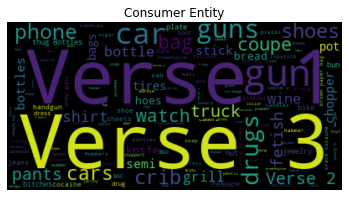

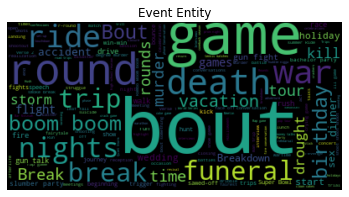

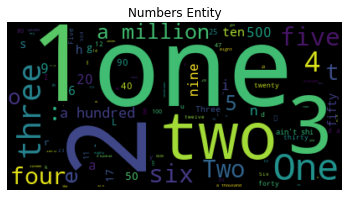

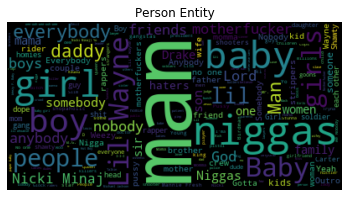

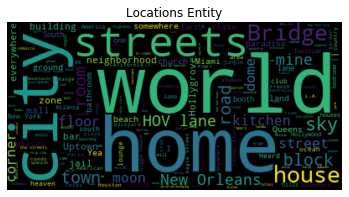

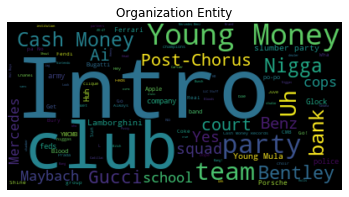

In [51]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter Drake/Nothing Was The Same/305 To My City
/Arts & Entertainment/Music & Audio


Classification of Letter Drake/Nothing Was The Same/All Me
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Drake/Nothing Was The Same/All Me
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Nothing Was The Same/Come Thru
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Nothing Was The Same/Connect
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Nothing Was The Same/From Time
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Drake/Nothing Was The Same/From Time
/Arts & Entertainment/Music & Audio/Pop Music


Classification of Letter Drake/Nothing Was The Same/Furthest Thing
/Arts & Entertainment/Music & Audio


Classification of Letter Drake/Nothing Was The Same/Hold On, We're Going Home
/Arts & Entertainment/Music & 

Classification of Letter Drake/Take Care/We'll Be Fine
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Thank Me Later/9am in Dallas
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Thank Me Later/Cece's Interlude
/Arts & Entertainment


Classification of Letter Drake/Thank Me Later/Fancy
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Thank Me Later/Fireworks
/Arts & Entertainment/Music & Audio


Classification of Letter Drake/Thank Me Later/Karaoke
/Arts & Entertainment


Classification of Letter Drake/Thank Me Later/Light Up
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Thank Me Later/Miss Me
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Drake/Thank Me Later/Over
/Arts & Entertainment/Movies


Classification of Letter Drake/Thank Me Later/Over
/Arts & Entertainment/Music & Audio/Music Reference


Classifi

Classification of Letter Lil Wayne/Funeral/Dreams
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Lil Wayne/Funeral/Funeral
/Arts & Entertainment/Music & Audio


Classification of Letter Lil Wayne/Funeral/Get Outta My Head
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Lil Wayne/Funeral/Harden
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Lil Wayne/Funeral/Harden
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Funeral/I do it
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Funeral/I Dont Sleep
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Funeral/I Dont Sleep
/Arts & Entertainment/Music & Audio/Music Reference


Classification of Letter Lil Wayne/Funeral/Know You Know
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Funeral/Line 

Classification of Letter Lil Wayne/Lights Out/Skit
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Lights Out/Tha Blues
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Lights Out/Tha Blues
/Sensitive Subjects


Classification of Letter Lil Wayne/Lights Out/Wish You Would
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Like Father, Like Son/1st Key
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Like Father, Like Son/About All That
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Like Father, Like Son/Aint Worried Bout Shit
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Like Father, Like Son/Army Gunz
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Like Father, Like Son/Army Gunz
/Arts & Entertainment/Mus

Classification of Letter Lil Wayne/Tha Carter/On The Block 1
/Arts & Entertainment/Music & Audio


Classification of Letter Lil Wayne/Tha Carter/On The Block 2
/Arts & Entertainment/Music & Audio


Classification of Letter Lil Wayne/Tha Carter/Only Way
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Tha Carter/Snitch
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Tha Carter/Tha Heat
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Tha Carter/This Is The Carter
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Tha Carter/Walk In
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Tha Carter/Walk Out
/Sensitive Subjects


Classification of Letter Lil Wayne/Tha Carter/We Don't
/Arts & Entertainment/Music & Audio/Urban & Hip-Hop


Classification of Letter Lil Wayne/Tha Carter/We Don't
/Arts & E

ValueError: b'\xff\xd8\xff\xe1\x0c&Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0c\x01\x00\x00\x03\x00\x00\x00\x01\x07\x94\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\x01\xf4\x00\x00\x01\x02\x00\x03\x00\x00\x00\x03\x00\x00\x00\x9e\x01\x06\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x15\x00\x03\x00\x00\x00\x01\x00\x03\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xa4\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xac\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00!\x00\x00\x00\xb4\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xd5\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xec\x00\x00\x01$\x00\x08\x00\x08\x00\x08\x00\n\xfc\x80\x00\x00\'\x10\x00\n\xfc\x80\x00\x00\'\x10Adobe Photoshop 21.2 (Macintosh)\x002021:04:29 13:06:02\x00\x00\x00\x00\x00\x04\x90\x00\x00\x07\x00\x00\x00\x040231\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\xca\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x00\xfa\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01r\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01z\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\x01\x00\x00\x01\x82\x02\x02\x00\x04\x00\x00\x00\x01\x00\x00\n\x9c\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\xff\xd8\xff\xed\x00\x0cAdobe_CM\x00\x02\xff\xee\x00\x0eAdobe\x00d\x80\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x0c\x08\x08\x08\t\x08\x0c\t\t\x0c\x11\x0b\n\x0b\x11\x15\x0f\x0c\x0c\x0f\x15\x18\x13\x13\x15\x13\x13\x18\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\r\x0b\x0b\r\x0e\r\x10\x0e\x0e\x10\x14\x0e\x0e\x0e\x14\x14\x0e\x0e\x0e\x0e\x14\x11\x0c\x0c\x0c\x0c\x0c\x11\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00)\x00\x9f\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xdd\x00\x04\x00\n\xff\xc4\x01?\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x01\x04\x01\x03\x02\x04\x02\x05\x07\x06\x08\x05\x03\x0c3\x01\x00\x02\x11\x03\x04!\x121\x05AQa\x13"q\x812\x06\x14\x91\xa1\xb1B#$\x15R\xc1b34r\x82\xd1C\x07%\x92S\xf0\xe1\xf1cs5\x16\xa2\xb2\x83&D\x93TdE\xc2\xa3t6\x17\xd2U\xe2e\xf2\xb3\x84\xc3\xd3u\xe3\xf3F\'\x94\xa4\x85\xb4\x95\xc4\xd4\xe4\xf4\xa5\xb5\xc5\xd5\xe5\xf5Vfv\x86\x96\xa6\xb6\xc6\xd6\xe6\xf67GWgw\x87\x97\xa7\xb7\xc7\xd7\xe7\xf7\x11\x00\x02\x02\x01\x02\x04\x04\x03\x04\x05\x06\x07\x07\x06\x055\x01\x00\x02\x11\x03!1\x12\x04AQaq"\x13\x052\x81\x91\x14\xa1\xb1B#\xc1R\xd1\xf03$b\xe1r\x82\x92CS\x15cs4\xf1%\x06\x16\xa2\xb2\x83\x07&5\xc2\xd2D\x93T\xa3\x17dEU6te\xe2\xf2\xb3\x84\xc3\xd3u\xe3\xf3F\x94\xa4\x85\xb4\x95\xc4\xd4\xe4\xf4\xa5\xb5\xc5\xd5\xe5\xf5Vfv\x86\x96\xa6\xb6\xc6\xd6\xe6\xf6\'7GWgw\x87\x97\xa7\xb7\xc7\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xeez\x86vmY\xb6\xd7U\xa5\xacn\xdd\xad\x01\xa6%\xadw\xe75W\xfd\xa7\xd4\x7f\xd3\x9f\xf3Y\xff\x00\x90S\xeam\'\xa8]\xfd\x9f\xfa\x96\xaa\x8ea- hH \x1f\t\xee\xacDF\x86\x83n\xcdY\x19q\x1dN\xe7\xab;\xba\xcfR\xaa\xa7^\xeb\x1f\xe81\xa5\xee\xb3m\x7fD\r\xce{X[\xb9\xeck}\xca\x0e\xeb\xf9\r\xaa\xbb\x9d\x9e\xc6\xd3q\x02\xab\\kk^]\xf4\x1a\xc7=\xad\xdc\xe7G\xd0XG\x17\xa9d\xb3.\x9c\x8b]\x80]\x914\xb88\xb8\xb7\xd0c\xdb\x89\x93E~\xef\xe7\xec\xb6\xbfS\xec\xcf\xaf\xf9\x9b\xbfG\xfaoN\xb3\xe7\xf4\x8b\xb2:}X\xb4\x06\xb3m\x968\xb1\xcf5EvS~.\xcd\xf5U\x7f\xfav>\xea\xbd-\x96~\x9a\xa4\x01\x04_\x08\xf2\xa5\xd3\x14@\x13>v\xec;\xac\xe76g,\x08qa\x91X\x874\x17\xbe\xbf\xa3\xfc\xe3\x18\xd7=\xec\xfd\xc47}`\xc9m\xac\xa5\xd9\xecm\xb6\xb7}U\x93V\xe74\x82\xe0\xf63n\xe71\xcdk\xb6\xac\xd7\xf4\xec\xc7\xd8\xf68\xd4\xea\x8d\xb7ez\xc0\xb9\xaeu\x97cY\x84j\xfb>\xc76\xaa\xfdk\x9fw\xab\xf6\x8b?C\xfa/K\xd4D\xc4\xc5\xcb\xc4\xdfK[U\x95_\xb1\xd6Z^\xe6\xbd\xaem\x15\xe2\x9a\xfd/I\xed\xc9\xad\xae\xa3\xf5gz\xb4\xfat\xbfg\xf8?\xd2\x9d?t}\x8b=_\xbc~\xd7A\xbdo=\xe4\x8a\xf3\x03\xc8\rq\r\x15\x98k\xc6\xea\x9f\xedg\xd1\xb5\xbe\xea\xff\x00\xd2\'\xfd\xaf\xd5?\xeeC\xbf\xcdg\xfeAft\xac\x0bz~#q\x1e[cX\x1aE\xa0\x92\xf78\xb5\xad\xbc^\xe2\xd6\xfa\xbe\x9d\x8c\xd9\x8d\x7f\xd3\xfb\'\xa3M\x8cg\xd9\xff\x00Il\xb6\x04\x9d\x07\x89\xd1\x11\xc3\xd8}\x88&W\xa4\xa5\xf6\xa7=_\xaa\xff\x00\xdc\x97\x7f\x9a\xcf\xfc\x82\xb7\xd1\xfa\x8e~GPeW\xdcl\xac\xb1\xc4\xb4\xb5\xa3Q\x11\xf4X\xd7,\x87\xbe\xa6\x18{\xda\xd2x\x97\x01\xf9J\xd0\xe8#\xfc\xa7[\x86\xa0\xb1\xf0F\xa3\xf3P\x90\x8f\t\xd0m\xd902\xe2\x8d\x93\xb8\xea\xf4\xf2\xdf\x11\xfe\xf4\xa4q\xf2Y9\x98\xf8\xd6\xe4d9\xf7\xd0\xc2Ce\x8fgf\x82\xdb\x1d\x91/o\xda?z\xbf\xf4\x1e\x8d?\xcb\xf5"\x06\x16-\xc2\xfb\xb2\x19\x02\xc1s\\\xd6\x1dX+\xba\xbf{\xda\\\xc7\xd9\xfaK\xad\xbb\'\xfe3\xfc\x1f\xf3t\xf8\xa7u\xc1\xa5\xef};\xba\x1c\x18\xf8o\xdc\xd6\xaf\x87\x84\xfc\xdf\xba\xech\x91 @<\x9e\x16=\xb4\xe2}\xae\xfb[\x99UwX\xf0\xe0\xc7\x8e6\xd6\xfcw\xfa\x8d\xf5\x19\xbb\xd9s\xb6?\xf4i\x9c\xdc\x06\xbd\xa1\xb9U<X\xc75\xa4\xb7\xd4!\xae6\x8fR\x87\xb1\xdbY\xee\x0efK\xff\x00\xe0\xeb\xfei.)\xfe\xe7_\xde\xe8\xae\x0cz~\xb3\xa7\xee\x9f\x9a\xb6vIh\xe4\x8f\x0f\xbd-\x163~\xc2\xfc\x1a\xa8\xaf*\xb8\xae\xc2\xfa\xef\xb5\xa4\x13\xb4\x07z\x8e.ul\xb3#\xf4\xcdu\x96\xbf\xf9\xef\xf4I\xed\xc3\xc3\xf76\xfc\xca\x9a\x01\r\x03\xda\xdf\xd10\xd9\xeb\xd3n\xe7\xff\x00\x84e\xf6Uk\xfd\x9f\xbe\x97\x14\xff\x00s\xa7\xef(C\x17\xf9\xce\xbf\xbav\xfd\xe7a)o\x88\xd0\xc1\xf8\xac\xbc\x8f\xb1[\x942NsZ\xdd\xd5\xb7\xd3k\x848\xd2\xe6\xdc\xd6\xbb\xdd\xf9\xbe\xbf\xbfo\xfaJ\xfd_\xe6\xd5f\xe1a\xbbm\r\xca\xc6s\xe5\xacc]X!\xe46\xc1\xba\xd1\xea\x0f_%\xdfh\xdf\xbf\xf7\xf7\xff\x00\xd6\xd1\x94\xc1\xd2\x17\xfe\x12\xa3\x0cDk\x92\xb6\xd3\x84\xbb\xb2$\x8e\xe3\x90\x94\xb7n\xe9\x1by\x9e\xd0\xb3\xdb\xd2\x9c\xc2a\xedp69\xe4\xbd\xa4\x97\x071\xd4\xb8Y\xfaF\xfb\xfd\xdfM\x1a\xac3_N8n-|\xb1\xcc\xe0\x86\xc3\xb7mf\xd6\xbb~\xc65\xdb?\x9c\xf5\x7f\xe1=Dc)\x13\xacx~\xb6\x89\xc6\x00\\g\xc5\xb6\x95O\xff\xd0\xe9z\xe7[f/V\xc9\xc75\x87\x1a\xcb5\x98\xe6\xba\xdf\xff\x00~Y\xb9\x1fZi\xc6f\xfbi \x024\x93:\xf8HU>\xb8\xb2\xe6\xfd`\xcf\xb9\x99\x1bC}7\n\xc8dH\xa2\xafk\xbfF\xfb\x17\x0f\xe8d\x10,\xb6\xd1o\xa8\xe9\xba\x97\x18w<\xb6\xf6\xec\xff\x00\xbe\'\t\x0e\xcbH>\x0fo\x8d\xf5\xf7\x0f"\xe1H\xa1\xd4\xef\xd2\xa7\xda\xe6\xb4<\xfekX\xdd\xdb\xf7?\xf3\x11\xf2>\xb5\x1a\t\x0e\xc0\xc9|we6\x113\x1b~\x80\\\x07N\xaf\xec\x19Tg\x8a\xc5\xf7c\xbb\xd4\xf4^\xe6\x86\xb8\xedv\xcd\xb6z{\xf76\xcd\xbf\xa4\xdf\xea~}V\xd1\x7f\xa7r\xd1\xb3\xaeu\xe689\xf7_p\xb0oh\xfbM\xb7\x16Kv\xed\xdb\x9bm\x9fG\x7f\xa9\xbd\x9e\xff\x00R\xaf\xa6\x97\x12\xb8^\xcd\xbd}\xf64=\x98\xce,s\x9c\xc6\xbbP\xd2Y\xf4\xf6\xb8\xb7\xdc\xaad}p\xc7\xa2\xe1S\xe8\xb4\x924sX\\\xd9\x1fJ\xbd?>\xb7{,\\\x86WS\xeaylk^l\xfd\x13\x1b\xb1\xee\xb3WX\x08\x0f\xb6\xed\xaf\xf7\xfe\x87\xe8\xa0d\xdf\x9a\xea\xaa\xa1\x8e}\x98\xfb\x9c\xf3]\x96\xeek\\\x7fF\xdd\xadq\xff\x00G\xfb\x9b\x12\xe2G\x0b\xdb\xbf\xeb0-n\xd0\xda\xdd`\x9a\x9a\xf3\xb4\xba\x0c;kl\xd9\xbbj\xca\xcc\xfa\xc8\xc6\xdb\xb6\xda\x9c\xee\xc6\xd0\x05\x81\xae\xfd\xd7K\xcb\x98\xb9;+\xbe\xd6\x1c{j\x0e`s\\\x1e\xd2\x0f\xd1\x10v\xb6\xdb\x1d\xf4\xbf\xd5\x88\xb8\x95Y\x88\xcb\xddH-\xb5\xe1\xac\xac\xb2\xc7\xb0\x06:[\x92\xc7\xc1w\xf3\xb5\x9d\x88J\x8f\xfb\xe9\x88\x03}\xde\x9c\xe59\xed\xde\xd6\xb5\xcdw\x04\xcb\x04\xfe\xe9\xf6\xb5\xcbo\xeaU\x8e?X*im-\xfd\r\xb3\xe9\xbaL\xfb?z\x17\x9eb\x0c\xea\xf2Z\\F\xc3;\x9c\x0bI\x1a9\x91\xefn\xd7}/\xa4\xf6.\xd7\xfc_9\xbf\xf3\x97\x1d\xb2e\xb4Z\x04\xed$\xc0\xacI{S\x0c#w\xae\x9e)\xd7\xc3\xec{\xebq\xfa\xef\xdb/\xb2\xa1\x84\xea\x1e\xe1\xe8\xba\xc6\xbcX\x19\xb2\xb6\xd9]\x85\xad-\x7f\xa9c_\xfd\x8f\xfc\r\xdbO\xd6\x0fE\xb58\xe1\x03\xe89\xafxk\xf5\xba,m[Y\xf4=\x0f\xe6\x1c\xff\x00\xfa\xf2\xd5I9.5\x18\x9fXE\xe1\xd9.\xc3u0}\x8cc\x83\xf7m;=K\x1c\xd2\xdb+\xf56o\xd9^?\xd0e\x9f\xf0\x16\xbf\xa3\xf5\x94\xb6\x0b:q\x88\xf6\xc5\xb1\x07k\x9f\xff\x00Oz\xd8I%9\x0f\xa7\xeb\x19-p8.\x82\xf9c\x85\x9b\x7f~\xab\x9b\xa3\x9e\xdb7{,g\xfdw\xf9\t\xeb\xab\xeb\x07\xa8\r\xb5`\x1a\xdcb\xdd\xbe\xa6\xe2\xc2[\xbbR\xdf\xa5\xad\xff\x00\xf4\x16\xb2I)\xaf\x8dE\x82\x867/\xd3\xb6\xf0\x08{\xd8\xdd\xad\'\x8d\xc1\x87v\xdd\xcc\rDf=\x15\x86\xb5\x95\xb5\xa1\x91\xb6\x00\xd24j"I)I$\x92J\x7f\xff\xd1\xb7\xf5\xcb\x13\xa8[\xd73\x8d8\x99\x17\xd6\xefN\x1f]\x17<\x7f5S]\xe9\xbe\xa6\xb9\x96.z\xfc.\xa2\xea\x8b[\xd1\xf2\xf7<\x00c\n\xc6\x96\xc6\xbe\xdb~\xcf\xbb\xf3\x7f3\xe9\xafj\x1c\'I\x0f\x857\xa6\xf5\xb6X\xd7\xfe\xcb\xcc;L\x86\x9cK\x9c\xd3\xfdf\xba\x975X\xc8\xc3\xeaf\xbd\xb5t\x8c\xb2\xe7\x02\t\x1867l\xed\xfc\xef\xb3\xefs\xbd\xbe\xcf\xdc^\xda\x92J|\x1c\xf4\x8e\xb5\xc8\xe9\x99\xd2\x7f\xee\xad\xff\x00\xfaI\x1b\x1f\xa7u\x90\x03.\xe9Y[v\xc0q\xc1\xb0\xb8D\x91\xb9\xde\x86\xe7\xb9\xdb\xbd\xcb\xdc\x92E\x0f\x86_\xd3\xfa\xd3\x9e[WH\xc9\x0c:n\xfb\x0b\xda\xef\x93\x9b\x8c\xdfMB\x9e\x97\xd6\x99k^\xfe\x93\x9a\xe6\x83\xeek\xb1m \x83\xa7\xd1u%\xab\xdd\x92IO\x89[\xd3\xba\x9b\x9c\xd6\xd5\xd2\xb3\x1a\xd0wo\x18vVg\xc3\xdbF\xef\xfak\x7f\xea.\x0fR\xa7\xeb=Vda\xe4\xd1P\xa6\xe0_u\x0fc\x01;6\xc3\xec\xad\x8dn\xef\xeb/NLxI/\x1b\xd6?o~\xd5\xca\xfb?\xdb}\r\xe3\xd3\xf4\xbd]\x91\xb1\x9f\xcd\xec\xf6}/\xddU\x1b\xff\x008\xb5\xdf\xfbK\xcbo\xad\xf8\xee]\xeaK# \x87\xb9-s|\xc7h\xfa\x7f\xe9;\xf8\x8eOj\x1e\x9e_\xe4\x8e\xf2<_/\xe9z>g\x84\x07\xae\xce\xa3\xaa\xc4\x9e\r\xb3\x1d\xbf7\xe9&\x9e\xbd\x1cuI\xef\xfc\xecO\xdc\xbb\xc4\x93j\x1f\xbd\x9b\xfcQ\xff\x00~\xba\xf2~\xef/\xfe<\xbf\xf5[\xc0\x9f\xf9\xc9\'o\xed\x18\xed>\xb4\xfc\xd6\xef\xd5O\xda\x9e\xaeW\xdb\xfe\xd3\xb7m~\x9f\xda=H\x99\xb3\x7f\xa7\xeb\x7fcv\xd5\xd0\xa4T\xbc\xb0\x8f\xbd\x1a9z\xfc\xe3\xd1\xf2\xf5\xf50\xf3\x86\x7fw\x9d\xc7\x00\x15\x1f\xe6\xe5y>h\xfc\xbe\x85\xd2QIi\xb8\xac\x92QI%?\xff\xd9\xff\xed\x14 Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x07\x1c\x02\x00\x00\x02\x00\x00\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xe8\xf1\\\xf3/\xc1\x18\xa1\xa2{g\xad\xc5d\xd5\xba8BIM\x04:\x00\x00\x00\x00\x00\xe5\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0bprintOutput\x00\x00\x00\x05\x00\x00\x00\x00PstSbool\x01\x00\x00\x00\x00Inteenum\x00\x00\x00\x00Inte\x00\x00\x00\x00Clrm\x00\x00\x00\x0fprintSixteenBitbool\x00\x00\x00\x00\x0bprinterNameTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0fprintProofSetupObjc\x00\x00\x00\x0c\x00P\x00r\x00o\x00o\x00f\x00 \x00S\x00e\x00t\x00u\x00p\x00\x00\x00\x00\x00\nproofSetup\x00\x00\x00\x01\x00\x00\x00\x00Bltnenum\x00\x00\x00\x0cbuiltinProof\x00\x00\x00\tproofCMYK\x008BIM\x04;\x00\x00\x00\x00\x02-\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x12printOutputOptions\x00\x00\x00\x17\x00\x00\x00\x00Cptnbool\x00\x00\x00\x00\x00Clbrbool\x00\x00\x00\x00\x00RgsMbool\x00\x00\x00\x00\x00CrnCbool\x00\x00\x00\x00\x00CntCbool\x00\x00\x00\x00\x00Lblsbool\x00\x00\x00\x00\x00Ngtvbool\x00\x00\x00\x00\x00EmlDbool\x00\x00\x00\x00\x00Intrbool\x00\x00\x00\x00\x00BckgObjc\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00RGBC\x00\x00\x00\x03\x00\x00\x00\x00Rd  doub@o\xe0\x00\x00\x00\x00\x00\x00\x00\x00\x00Grn doub@o\xe0\x00\x00\x00\x00\x00\x00\x00\x00\x00Bl  doub@o\xe0\x00\x00\x00\x00\x00\x00\x00\x00\x00BrdTUntF#Rlt\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Bld UntF#Rlt\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00RsltUntF#Pxl@R\x00\x00\x00\x00\x00\x00\x00\x00\x00\nvectorDatabool\x01\x00\x00\x00\x00PgPsenum\x00\x00\x00\x00PgPs\x00\x00\x00\x00PgPC\x00\x00\x00\x00LeftUntF#Rlt\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Top UntF#Rlt\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00Scl UntF#Prc@Y\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10cropWhenPrintingbool\x00\x00\x00\x00\x0ecropRectBottomlong\x00\x00\x00\x00\x00\x00\x00\x0ccropRectLeftlong\x00\x00\x00\x00\x00\x00\x00\rcropRectRightlong\x00\x00\x00\x00\x00\x00\x00\x0bcropRectToplong\x00\x00\x00\x00\x008BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00H\x00\x00\x00\x01\x00\x01\x00H\x00\x00\x00\x01\x00\x018BIM\x04&\x00\x00\x00\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00?\x80\x00\x008BIM\x04\r\x00\x00\x00\x00\x00\x04\x00\x00\x00\x1e8BIM\x04\x19\x00\x00\x00\x00\x00\x04\x00\x00\x00\x1e8BIM\x03\xf3\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x00\x01\x008BIM\'\x10\x00\x00\x00\x00\x00\n\x00\x01\x00\x00\x00\x00\x00\x00\x00\x018BIM\x03\xf5\x00\x00\x00\x00\x00H\x00/ff\x00\x01\x00lff\x00\x06\x00\x00\x00\x00\x00\x01\x00/ff\x00\x01\x00\xa1\x99\x9a\x00\x06\x00\x00\x00\x00\x00\x01\x002\x00\x00\x00\x01\x00Z\x00\x00\x00\x06\x00\x00\x00\x00\x00\x01\x005\x00\x00\x00\x01\x00-\x00\x00\x00\x06\x00\x00\x00\x00\x00\x018BIM\x03\xf8\x00\x00\x00\x00\x00p\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x03\xe8\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x03\xe8\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x03\xe8\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x03\xe8\x00\x008BIM\x04\x08\x00\x00\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x02@\x00\x00\x02@\x00\x00\x00\x008BIM\x04\x1e\x00\x00\x00\x00\x00\x04\x00\x00\x00\x008BIM\x04\x1a\x00\x00\x00\x00\x03\xb7\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xfa\x00\x00\x03\xca\x00\x00\x00A\x002\x000\x002\x000\x00_\x00M\x00u\x00l\x00t\x00i\x00-\x00L\x00i\x00n\x00e\x00_\x00L\x00B\x00_\x00R\x00E\x00T\x00-\x00E\x00_\x00C\x00a\x00s\x00h\x00_\x00R\x00e\x00t\x00a\x00i\x00l\x00_\x00A\x00P\x00R\x00_\x00S\x00t\x00a\x00t\x00i\x00c\x00_\x00U\x00S\x00_\x00E\x00N\x00G\x00_\x00v\x001\x00_\x009\x007\x000\x00x\x002\x005\x000\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\xca\x00\x00\x00\xfa\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00null\x00\x00\x00\x02\x00\x00\x00\x06boundsObjc\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00Rct1\x00\x00\x00\x04\x00\x00\x00\x00Top long\x00\x00\x00\x00\x00\x00\x00\x00Leftlong\x00\x00\x00\x00\x00\x00\x00\x00Btomlong\x00\x00\x00\xfa\x00\x00\x00\x00Rghtlong\x00\x00\x03\xca\x00\x00\x00\x06slicesVlLs\x00\x00\x00\x01Objc\x00\x00\x00\x01\x00\x00\x00\x00\x00\x05slice\x00\x00\x00\x12\x00\x00\x00\x07sliceIDlong\x00\x00\x00\x00\x00\x00\x00\x07groupIDlong\x00\x00\x00\x00\x00\x00\x00\x06originenum\x00\x00\x00\x0cESliceOrigin\x00\x00\x00\rautoGenerated\x00\x00\x00\x00Typeenum\x00\x00\x00\nESliceType\x00\x00\x00\x00Img \x00\x00\x00\x06boundsObjc\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00Rct1\x00\x00\x00\x04\x00\x00\x00\x00Top long\x00\x00\x00\x00\x00\x00\x00\x00Leftlong\x00\x00\x00\x00\x00\x00\x00\x00Btomlong\x00\x00\x00\xfa\x00\x00\x00\x00Rghtlong\x00\x00\x03\xca\x00\x00\x00\x03urlTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00nullTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00MsgeTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x06altTagTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0ecellTextIsHTMLbool\x01\x00\x00\x00\x08cellTextTEXT\x00\x00\x00\x01\x00\x00\x00\x00\x00\thorzAlignenum\x00\x00\x00\x0fESliceHorzAlign\x00\x00\x00\x07default\x00\x00\x00\tvertAlignenum\x00\x00\x00\x0fESliceVertAlign\x00\x00\x00\x07default\x00\x00\x00\x0bbgColorTypeenum\x00\x00\x00\x11ESliceBGColorType\x00\x00\x00\x00None\x00\x00\x00\ttopOutsetlong\x00\x00\x00\x00\x00\x00\x00\nleftOutsetlong\x00\x00\x00\x00\x00\x00\x00\x0cbottomOutsetlong\x00\x00\x00\x00\x00\x00\x00\x0brightOutsetlong\x00\x00\x00\x00\x008BIM\x04(\x00\x00\x00\x00\x00\x0c\x00\x00\x00\x02?\xf0\x00\x00\x00\x00\x00\x008BIM\x04\x11\x00\x00\x00\x00\x00\x01\x01\x008BIM\x04\x14\x00\x00\x00\x00\x00\x04\x00\x00\x00\x018BIM\x04\x0c\x00\x00\x00\x00\n\xb8\x00\x00\x00\x01\x00\x00\x00\x9f\x00\x00\x00)\x00\x00\x01\xe0\x00\x00L\xe0\x00\x00\n\x9c\x00\x18\x00\x01\xff\xd8\xff\xed\x00\x0cAdobe_CM\x00\x02\xff\xee\x00\x0eAdobe\x00d\x80\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x0c\x08\x08\x08\t\x08\x0c\t\t\x0c\x11\x0b\n\x0b\x11\x15\x0f\x0c\x0c\x0f\x15\x18\x13\x13\x15\x13\x13\x18\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\r\x0b\x0b\r\x0e\r\x10\x0e\x0e\x10\x14\x0e\x0e\x0e\x14\x14\x0e\x0e\x0e\x0e\x14\x11\x0c\x0c\x0c\x0c\x0c\x11\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x00)\x00\x9f\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xdd\x00\x04\x00\n\xff\xc4\x01?\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x01\x04\x01\x03\x02\x04\x02\x05\x07\x06\x08\x05\x03\x0c3\x01\x00\x02\x11\x03\x04!\x121\x05AQa\x13"q\x812\x06\x14\x91\xa1\xb1B#$\x15R\xc1b34r\x82\xd1C\x07%\x92S\xf0\xe1\xf1cs5\x16\xa2\xb2\x83&D\x93TdE\xc2\xa3t6\x17\xd2U\xe2e\xf2\xb3\x84\xc3\xd3u\xe3\xf3F\'\x94\xa4\x85\xb4\x95\xc4\xd4\xe4\xf4\xa5\xb5\xc5\xd5\xe5\xf5Vfv\x86\x96\xa6\xb6\xc6\xd6\xe6\xf67GWgw\x87\x97\xa7\xb7\xc7\xd7\xe7\xf7\x11\x00\x02\x02\x01\x02\x04\x04\x03\x04\x05\x06\x07\x07\x06\x055\x01\x00\x02\x11\x03!1\x12\x04AQaq"\x13\x052\x81\x91\x14\xa1\xb1B#\xc1R\xd1\xf03$b\xe1r\x82\x92CS\x15cs4\xf1%\x06\x16\xa2\xb2\x83\x07&5\xc2\xd2D\x93T\xa3\x17dEU6te\xe2\xf2\xb3\x84\xc3\xd3u\xe3\xf3F\x94\xa4\x85\xb4\x95\xc4\xd4\xe4\xf4\xa5\xb5\xc5\xd5\xe5\xf5Vfv\x86\x96\xa6\xb6\xc6\xd6\xe6\xf6\'7GWgw\x87\x97\xa7\xb7\xc7\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xeez\x86vmY\xb6\xd7U\xa5\xacn\xdd\xad\x01\xa6%\xadw\xe75W\xfd\xa7\xd4\x7f\xd3\x9f\xf3Y\xff\x00\x90S\xeam\'\xa8]\xfd\x9f\xfa\x96\xaa\x8ea- hH \x1f\t\xee\xacDF\x86\x83n\xcdY\x19q\x1dN\xe7\xab;\xba\xcfR\xaa\xa7^\xeb\x1f\xe81\xa5\xee\xb3m\x7fD\r\xce{X[\xb9\xeck}\xca\x0e\xeb\xf9\r\xaa\xbb\x9d\x9e\xc6\xd3q\x02\xab\\kk^]\xf4\x1a\xc7=\xad\xdc\xe7G\xd0XG\x17\xa9d\xb3.\x9c\x8b]\x80]\x914\xb88\xb8\xb7\xd0c\xdb\x89\x93E~\xef\xe7\xec\xb6\xbfS\xec\xcf\xaf\xf9\x9b\xbfG\xfaoN\xb3\xe7\xf4\x8b\xb2:}X\xb4\x06\xb3m\x968\xb1\xcf5EvS~.\xcd\xf5U\x7f\xfav>\xea\xbd-\x96~\x9a\xa4\x01\x04_\x08\xf2\xa5\xd3\x14@\x13>v\xec;\xac\xe76g,\x08qa\x91X\x874\x17\xbe\xbf\xa3\xfc\xe3\x18\xd7=\xec\xfd\xc47}`\xc9m\xac\xa5\xd9\xecm\xb6\xb7}U\x93V\xe74\x82\xe0\xf63n\xe71\xcdk\xb6\xac\xd7\xf4\xec\xc7\xd8\xf68\xd4\xea\x8d\xb7ez\xc0\xb9\xaeu\x97cY\x84j\xfb>\xc76\xaa\xfdk\x9fw\xab\xf6\x8b?C\xfa/K\xd4D\xc4\xc5\xcb\xc4\xdfK[U\x95_\xb1\xd6Z^\xe6\xbd\xaem\x15\xe2\x9a\xfd/I\xed\xc9\xad\xae\xa3\xf5gz\xb4\xfat\xbfg\xf8?\xd2\x9d?t}\x8b=_\xbc~\xd7A\xbdo=\xe4\x8a\xf3\x03\xc8\rq\r\x15\x98k\xc6\xea\x9f\xedg\xd1\xb5\xbe\xea\xff\x00\xd2\'\xfd\xaf\xd5?\xeeC\xbf\xcdg\xfeAft\xac\x0bz~#q\x1e[cX\x1aE\xa0\x92\xf78\xb5\xad\xbc^\xe2\xd6\xfa\xbe\x9d\x8c\xd9\x8d\x7f\xd3\xfb\'\xa3M\x8cg\xd9\xff\x00Il\xb6\x04\x9d\x07\x89\xd1\x11\xc3\xd8}\x88&W\xa4\xa5\xf6\xa7=_\xaa\xff\x00\xdc\x97\x7f\x9a\xcf\xfc\x82\xb7\xd1\xfa\x8e~GPeW\xdcl\xac\xb1\xc4\xb4\xb5\xa3Q\x11\xf4X\xd7,\x87\xbe\xa6\x18{\xda\xd2x\x97\x01\xf9J\xd0\xe8#\xfc\xa7[\x86\xa0\xb1\xf0F\xa3\xf3P\x90\x8f\t\xd0m\xd902\xe2\x8d\x93\xb8\xea\xf4\xf2\xdf\x11\xfe\xf4\xa4q\xf2Y9\x98\xf8\xd6\xe4d9\xf7\xd0\xc2Ce\x8fgf\x82\xdb\x1d\x91/o\xda?z\xbf\xf4\x1e\x8d?\xcb\xf5"\x06\x16-\xc2\xfb\xb2\x19\x02\xc1s\\\xd6\x1dX+\xba\xbf{\xda\\\xc7\xd9\xfaK\xad\xbb\'\xfe3\xfc\x1f\xf3t\xf8\xa7u\xc1\xa5\xef};\xba\x1c\x18\xf8o\xdc\xd6\xaf\x87\x84\xfc\xdf\xba\xech\x91 @<\x9e\x16=\xb4\xe2}\xae\xfb[\x99UwX\xf0\xe0\xc7\x8e6\xd6\xfcw\xfa\x8d\xf5\x19\xbb\xd9s\xb6?\xf4i\x9c\xdc\x06\xbd\xa1\xb9U<X\xc75\xa4\xb7\xd4!\xae6\x8fR\x87\xb1\xdbY\xee\x0efK\xff\x00\xe0\xeb\xfei.)\xfe\xe7_\xde\xe8\xae\x0cz~\xb3\xa7\xee\x9f\x9a\xb6vIh\xe4\x8f\x0f\xbd-\x163~\xc2\xfc\x1a\xa8\xaf*\xb8\xae\xc2\xfa\xef\xb5\xa4\x13\xb4\x07z\x8e.ul\xb3#\xf4\xcdu\x96\xbf\xf9\xef\xf4I\xed\xc3\xc3\xf76\xfc\xca\x9a\x01\r\x03\xda\xdf\xd10\xd9\xeb\xd3n\xe7\xff\x00\x84e\xf6Uk\xfd\x9f\xbe\x97\x14\xff\x00s\xa7\xef(C\x17\xf9\xce\xbf\xbav\xfd\xe7a)o\x88\xd0\xc1\xf8\xac\xbc\x8f\xb1[\x942NsZ\xdd\xd5\xb7\xd3k\x848\xd2\xe6\xdc\xd6\xbb\xdd\xf9\xbe\xbf\xbfo\xfaJ\xfd_\xe6\xd5f\xe1a\xbbm\r\xca\xc6s\xe5\xacc]X!\xe46\xc1\xba\xd1\xea\x0f_%\xdfh\xdf\xbf\xf7\xf7\xff\x00\xd6\xd1\x94\xc1\xd2\x17\xfe\x12\xa3\x0cDk\x92\xb6\xd3\x84\xbb\xb2$\x8e\xe3\x90\x94\xb7n\xe9\x1by\x9e\xd0\xb3\xdb\xd2\x9c\xc2a\xedp69\xe4\xbd\xa4\x97\x071\xd4\xb8Y\xfaF\xfb\xfd\xdfM\x1a\xac3_N8n-|\xb1\xcc\xe0\x86\xc3\xb7mf\xd6\xbb~\xc65\xdb?\x9c\xf5\x7f\xe1=Dc)\x13\xacx~\xb6\x89\xc6\x00\\g\xc5\xb6\x95O\xff\xd0\xe9z\xe7[f/V\xc9\xc75\x87\x1a\xcb5\x98\xe6\xba\xdf\xff\x00~Y\xb9\x1fZi\xc6f\xfbi \x024\x93:\xf8HU>\xb8\xb2\xe6\xfd`\xcf\xb9\x99\x1bC}7\n\xc8dH\xa2\xafk\xbfF\xfb\x17\x0f\xe8d\x10,\xb6\xd1o\xa8\xe9\xba\x97\x18w<\xb6\xf6\xec\xff\x00\xbe\'\t\x0e\xcbH>\x0fo\x8d\xf5\xf7\x0f"\xe1H\xa1\xd4\xef\xd2\xa7\xda\xe6\xb4<\xfekX\xdd\xdb\xf7?\xf3\x11\xf2>\xb5\x1a\t\x0e\xc0\xc9|we6\x113\x1b~\x80\\\x07N\xaf\xec\x19Tg\x8a\xc5\xf7c\xbb\xd4\xf4^\xe6\x86\xb8\xedv\xcd\xb6z{\xf76\xcd\xbf\xa4\xdf\xea~}V\xd1\x7f\xa7r\xd1\xb3\xaeu\xe689\xf7_p\xb0oh\xfbM\xb7\x16Kv\xed\xdb\x9bm\x9fG\x7f\xa9\xbd\x9e\xff\x00R\xaf\xa6\x97\x12\xb8^\xcd\xbd}\xf64=\x98\xce,s\x9c\xc6\xbbP\xd2Y\xf4\xf6\xb8\xb7\xdc\xaad}p\xc7\xa2\xe1S\xe8\xb4\x924sX\\\xd9\x1fJ\xbd?>\xb7{,\\\x86WS\xeaylk^l\xfd\x13\x1b\xb1\xee\xb3WX\x08\x0f\xb6\xed\xaf\xf7\xfe\x87\xe8\xa0d\xdf\x9a\xea\xaa\xa1\x8e}\x98\xfb\x9c\xf3]\x96\xeek\\\x7fF\xdd\xadq\xff\x00G\xfb\x9b\x12\xe2G\x0b\xdb\xbf\xeb0-n\xd0\xda\xdd`\x9a\x9a\xf3\xb4\xba\x0c;kl\xd9\xbbj\xca\xcc\xfa\xc8\xc6\xdb\xb6\xda\x9c\xee\xc6\xd0\x05\x81\xae\xfd\xd7K\xcb\x98\xb9;+\xbe\xd6\x1c{j\x0e`s\\\x1e\xd2\x0f\xd1\x10v\xb6\xdb\x1d\xf4\xbf\xd5\x88\xb8\x95Y\x88\xcb\xddH-\xb5\xe1\xac\xac\xb2\xc7\xb0\x06:[\x92\xc7\xc1w\xf3\xb5\x9d\x88J\x8f\xfb\xe9\x88\x03}\xde\x9c\xe59\xed\xde\xd6\xb5\xcdw\x04\xcb\x04\xfe\xe9\xf6\xb5\xcbo\xeaU\x8e?X*im-\xfd\r\xb3\xe9\xbaL\xfb?z\x17\x9eb\x0c\xea\xf2Z\\F\xc3;\x9c\x0bI\x1a9\x91\xefn\xd7}/\xa4\xf6.\xd7\xfc_9\xbf\xf3\x97\x1d\xb2e\xb4Z\x04\xed$\xc0\xacI{S\x0c#w\xae\x9e)\xd7\xc3\xec{\xebq\xfa\xef\xdb/\xb2\xa1\x84\xea\x1e\xe1\xe8\xba\xc6\xbcX\x19\xb2\xb6\xd9]\x85\xad-\x7f\xa9c_\xfd\x8f\xfc\r\xdbO\xd6\x0fE\xb58\xe1\x03\xe89\xafxk\xf5\xba,m[Y\xf4=\x0f\xe6\x1c\xff\x00\xfa\xf2\xd5I9.5\x18\x9fXE\xe1\xd9.\xc3u0}\x8cc\x83\xf7m;=K\x1c\xd2\xdb+\xf56o\xd9^?\xd0e\x9f\xf0\x16\xbf\xa3\xf5\x94\xb6\x0b:q\x88\xf6\xc5\xb1\x07k\x9f\xff\x00Oz\xd8I%9\x0f\xa7\xeb\x19-p8.\x82\xf9c\x85\x9b\x7f~\xab\x9b\xa3\x9e\xdb7{,g\xfdw\xf9\t\xeb\xab\xeb\x07\xa8\r\xb5`\x1a\xdcb\xdd\xbe\xa6\xe2\xc2[\xbbR\xdf\xa5\xad\xff\x00\xf4\x16\xb2I)\xaf\x8dE\x82\x867/\xd3\xb6\xf0\x08{\xd8\xdd\xad\'\x8d\xc1\x87v\xdd\xcc\rDf=\x15\x86\xb5\x95\xb5\xa1\x91\xb6\x00\xd24j"I)I$\x92J\x7f\xff\xd1\xb7\xf5\xcb\x13\xa8[\xd73\x8d8\x99\x17\xd6\xefN\x1f]\x17<\x7f5S]\xe9\xbe\xa6\xb9\x96.z\xfc.\xa2\xea\x8b[\xd1\xf2\xf7<\x00c\n\xc6\x96\xc6\xbe\xdb~\xcf\xbb\xf3\x7f3\xe9\xafj\x1c\'I\x0f\x857\xa6\xf5\xb6X\xd7\xfe\xcb\xcc;L\x86\x9cK\x9c\xd3\xfdf\xba\x975X\xc8\xc3\xeaf\xbd\xb5t\x8c\xb2\xe7\x02\t\x1867l\xed\xfc\xef\xb3\xefs\xbd\xbe\xcf\xdc^\xda\x92J|\x1c\xf4\x8e\xb5\xc8\xe9\x99\xd2\x7f\xee\xad\xff\x00\xfaI\x1b\x1f\xa7u\x90\x03.\xe9Y[v\xc0q\xc1\xb0\xb8D\x91\xb9\xde\x86\xe7\xb9\xdb\xbd\xcb\xdc\x92E\x0f\x86_\xd3\xfa\xd3\x9e[WH\xc9\x0c:n\xfb\x0b\xda\xef\x93\x9b\x8c\xdfMB\x9e\x97\xd6\x99k^\xfe\x93\x9a\xe6\x83\xeek\xb1m \x83\xa7\xd1u%\xab\xdd\x92IO\x89[\xd3\xba\x9b\x9c\xd6\xd5\xd2\xb3\x1a\xd0wo\x18vVg\xc3\xdbF\xef\xfak\x7f\xea.\x0fR\xa7\xeb=Vda\xe4\xd1P\xa6\xe0_u\x0fc\x01;6\xc3\xec\xad\x8dn\xef\xeb/NLxI/\x1b\xd6?o~\xd5\xca\xfb?\xdb}\r\xe3\xd3\xf4\xbd]\x91\xb1\x9f\xcd\xec\xf6}/\xddU\x1b\xff\x008\xb5\xdf\xfbK\xcbo\xad\xf8\xee]\xeaK# \x87\xb9-s|\xc7h\xfa\x7f\xe9;\xf8\x8eOj\x1e\x9e_\xe4\x8e\xf2<_/\xe9z>g\x84\x07\xae\xce\xa3\xaa\xc4\x9e\r\xb3\x1d\xbf7\xe9&\x9e\xbd\x1cuI\xef\xfc\xecO\xdc\xbb\xc4\x93j\x1f\xbd\x9b\xfcQ\xff\x00~\xba\xf2~\xef/\xfe<\xbf\xf5[\xc0\x9f\xf9\xc9\'o\xed\x18\xed>\xb4\xfc\xd6\xef\xd5O\xda\x9e\xaeW\xdb\xfe\xd3\xb7m~\x9f\xda=H\x99\xb3\x7f\xa7\xeb\x7fcv\xd5\xd0\xa4T\xbc\xb0\x8f\xbd\x1a9z\xfc\xe3\xd1\xf2\xf5\xf50\xf3\x86\x7fw\x9d\xc7\x00\x15\x1f\xe6\xe5y>h\xfc\xbe\x85\xd2QIi\xb8\xac\x92QI%?\xff\xd98BIM\x04!\x00\x00\x00\x00\x00W\x00\x00\x00\x01\x01\x00\x00\x00\x0f\x00A\x00d\x00o\x00b\x00e\x00 \x00P\x00h\x00o\x00t\x00o\x00s\x00h\x00o\x00p\x00\x00\x00\x14\x00A\x00d\x00o\x00b\x00e\x00 \x00P\x00h\x00o\x00t\x00o\x00s\x00h\x00o\x00p\x00 \x002\x000\x002\x000\x00\x00\x00\x01\x008BIM\x04\x06\x00\x00\x00\x00\x00\x07\x00\x04\x01\x01\x00\x01\x01\x00\xff\xe1\x0c\xd8http://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 6.0-c002 79.164460, 2020/05/12-16:04:17        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stEvt="http://ns.adobe.com/xap/1.0/sType/ResourceEvent#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmpMM:DocumentID="44CB01E2B07F7A9CC2B0AA37A5AB3E58" xmpMM:InstanceID="xmp.iid:7274a391-8b16-4fc1-8799-be9d59b3c1f5" xmpMM:OriginalDocumentID="44CB01E2B07F7A9CC2B0AA37A5AB3E58" dc:format="image/jpeg" photoshop:ColorMode="3" photoshop:ICCProfile="" xmp:CreateDate="2021-04-27T14:23:46-04:00" xmp:ModifyDate="2021-04-29T13:06:02-04:00" xmp:MetadataDate="2021-04-29T13:06:02-04:00"> <xmpMM:History> <rdf:Seq> <rdf:li stEvt:action="saved" stEvt:instanceID="xmp.iid:7274a391-8b16-4fc1-8799-be9d59b3c1f5" stEvt:when="2021-04-29T13:06:02-04:00" stEvt:softwareAgent="Adobe Photoshop 21.2 (Macintosh)" stEvt:changed="/"/> </rdf:Seq> </xmpMM:History> </rdf:Description> </rdf:RDF> </x:xmpmeta>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 <?xpacket end="w"?>\xff\xee\x00!Adobe\x00d\x00\x00\x00\x00\x01\x03\x00\x10\x03\x02\x03\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x14\x0e\x0e\x0e\x14\x14\x0e\x0e\x0e\x0e\x14\x11\x0c\x0c\x0c\x0c\x0c\x11\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc2\x00\x11\x08\x00\xfa\x03\xca\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x01\r\x00\x01\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\x01\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x10\x00\x00\x06\x02\x00\x05\x01\x05\x07\x04\x03\x00\x03\x01\x00\x00\x00\x01\x02\x03\x04\x05\x11\x06\x10\x12\x13\x14\x07 0!\x15\x16\x17@P1"234`56\x08A#7$%8\x80\x11\x00\x02\x01\x02\x03\x05\x02\x07\x0b\x06\x0b\x06\x04\x05\x04\x03\x01\x02\x03\x11\x04\x00\x12\x05!1"2\x13A\x06Qq\x91B#C\x14\x10a\x81\xa1\xb1Rb\xd23\x935\xd1r\x82\x92\x83\x15 0@P\xc1\xa2\xb2Ss$t\xc2c\xb34\x16\x07\xf0\xe1\xb4%\xa3Dd&6`\xf1\xe2T\x94\xc4\x95\x12\x00\x01\x02\x02\x05\x06\n\x07\x06\x04\x05\x03\x05\x00\x00\x00\x02\x00\x01\x11\x12\x10!12\x03A"BR\x92\xa2 0`\xf0br\x82\xb2\x133aq\x81\xd1\xc2\xd2#@PQ\xc1\xf2\x04\xa1\xb1CS\x80\x91\xe2s\xc3\x83\xb3\xd3\x93\xa3\x14$t\xff\xda\x00\x0c\x03\x01\x01\x02\x11\x03\x11\x00\x00\x00\xfa\x94\xa8\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x061\x92i7\xf3\xe8\xb7s\x81\x00$\x00\x02\x16\x02E\x04*\x01\x00\x10\x80\x00 \x11H\x8a \x08\x10\xa2\x00\x04\x12A\x00\x80\x01\x04Y\x07\xa1\xf1zY8\xe4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xa6A\xc9\xf5qr]\\`\x82\x08\xa9 \x10\x80@H \x80\x12\x01M@\x04\x00\x01\x08\x04, \x80\x00\x88 \x02\x01\x04\x10\x01\x04\x11PQ\x94\xf6\x9f+\xdb\xcf\xc3`\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00b\x99\x07\'\xd5\xc5\xc9\xf5q\x80 "\x91\x00\x8a\x9cr\xc1\xd3\xd1\xac\x99I\xbb\xcfKw9!H!I\x04R \x02\x00 RH\x02\xa2R@X\t\x0b\x00$,\x04\x82\x14\x90EQg\xb4\xf9~\xdev\x1b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x14\xc89N\xae>O\xab\x8e\x10\xa4\x00\x08!*\xd7\xbbQ\xab}}\x1c\x9b\x1c\xb0\xb7\xabw3\xcd\xdd\xb4\xcb^\xcf\xaf\xcfY\x04 \x00A\x04\x02\x01\x00\x00A\x00\x10@\x88\xa4*\x98\x14\xd4\x90S\n\x80\x08\xb3\xd9\xbc\xcfk;\r\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x8ad\x1c\xa7O\x1f)\xd5\xc8H$\x8aH\xb6\x10Q.\xb3\x9f\xb3c\xd3\xc3\x93\xab\xa2\xe6\x8e\xadV9y\xef\xab\xe7q\xba\xb3\xf5.]\xbdWO\x10\xf2\x1e^\xe9OV\xe9\xe2\xe6\xf5\xed\xcf\xcb\x1d\xcez\xfc\xf3G_\xa2o\xe4\xf3\xcd\x1d]\xfe\xfe]n9\xf9o7m\x99}3\xa7\x8fA\xafom\xbb\x9b\x9e\xc3m\x89z\xcd\xba @\x82\x02\x82A\x04\x10\nE@H=\x97\xcd\xf6\xb3\xb0\xd8\x05\x13*\xee"\x99j\xb2\x99j\xb0\x00\x00\x00\x00\x05\xbcr\xb9\x96 \x00(\x99Wq\x00\x00\x00\xa2e]\xc6\x99j\xb0Q2\xae\xe2\x00\x00\x00(\x99Wq\x00b\x99\x07+\xd3\xc7\xcat\xf2\x08$\x81`\x81W4th\xf1\xce\xdf\'\xad\x8b\x96\x8fD\xcbW\x94\xa6ON\x8f8\xdb\xab\xb0\xd3\x9f{\xd1\xc3r\xbc;\x8f\xd0\xf4M\xfc\xba\xacs\xb7\x1b\x8c\xf0\xea\xf6\xe8\xf0\xce?K\xdd\xbb<\xdf\x0c\xe3\xf4=\xbb\xb3\xcf\xf0>\x1fO\xdd\xbb|\xdb\xd6bK\xe4\\\xbd\xdd\xde\xeen\x0fOW\xb3uy\xf0I\x04\x02\x08\x95Q\x02\x12\x16,\x10BA\x15I\xec\xdeo\xb3\x9d\x86\xc1\xc2\xf8\xff\x00A\xa9\xe6\xec\xdeu\xf0i\xf9\xbbu\xfa:}\x17\xdc\xf9\x9f6\xf0\xbe\xa2\xf6XzO\xbd\xf2\xdec\xf3\xff\x00W\xeb\xff\x00O\xf1c\x83\xf1\xbe\x87\x98\xf3\xfdoP\xfa\x1f\x92\xe1|\x7f\xa1\xf4\xdf\xa0\xf9O2\xf9\xff\x00\xab\x1e\x93\xef|\xb7\x94\xfc\xe7\xd8g\xee\xe7\xed\xbdo\x07\x80\xf1\xbe\x8a\x8cr\xf4\x8f{\xe5\xf3\xf7s\xf9\xcf\x85\xf4\xd8z\xb7\xfaG\xbd\xf3\x1ey\xe1\xfd\'u\xecx\x1c\xb7\x9d\xebj9\xbb}+\xde\xf9o<\xf0\xfe\x97\xd3>\x83\xe5G\x99|\xff\x00\xd5\xfag\xbf\xf2\xbei\xe0\xfdO\xa4{\xbf/\xe5?9\xf5\xf9\xfb\xb9\xea\xb3\xa1\xee\xf3x\x8f#\xde\xbd\x9e\x1e\x9d\xef\xfc\xa7\x8c\xfc\xb7\xdc\xf7\x9e\xcf\xce\xe9\xf9;\xbd7\xe8>S\x81\xf1\xbe\x8bU\xcd\xd9\xe8\x9e\xe7\xcc\xe7\xee\xe7\x03\x14\xc89^\x9eNW\xa3\x91P\x93,X\x00\x83[\xa3\xaa\xdeX\xeb<\xdf\xa6\xf1\xe6\xefi\xe9\xf9\xfe9<\xd7\xe9~s\xb2\xf0=\xce\xdb=]\x1e\xee|\xcb\x87\xce\xbc^\xa0\xf5\xee\x9e\x1d.\x1b7\x19\xeb\xea\xf6h\xf0\xbeOK\xde;<\xdf\x0b\xe3\xf4}C\xa3\x8f\x8c\xd5\xbf\xd4z8\xcaO\x1a\xe5\xef\xe1\xb4\xf4\xfd7\xe8y\x12\x90\xb1\x00@\x88 \x85\x10\x90EE\x12\x08JJk\xd9\xbc\xdfg;\r\x80r\x1eg\xb5Rs\xdc^\x97s\xeb\xf8\x1c\xdf\x0f\xa7\xdaz\xbe\x1f\x96\xfc\xef\xd6\xfa\xbf\xd2|\x7f\x96\xfc\xef\xd6\xfa\x97\xd1|\x90\xe0\xbco\xa2\xe4\xfc\xdfc\xd1}\xcf\x99\xe5|\xef_\xd3\xbe\x83\xe5<\xc7\xe7\xfe\xact\xdd\xfeP\xea=\x1f$|\xe3\xf0\xbf\xa7{_\xd5\xfc/G\xdf\xe5\x8e{\x87\xd2\xe1\xfc\x8f\x7f\xd2\xfd\xff\x00\x96\xf3\xff\x00\x17\xe8\xfb\xbfc\xe7\xf9\x8f?\xd5\xd6s\xf5Mw~\xc7\xcflw\xf3`\xe9\xe8\xf0\xbf\x8f\xfd\x03\xd0\xbd\xcf\x9a\xe6\xf8=N\xf3\xd8\xf9\xe1\xd4z>O\x98|\xf7\xd6t\x9d\xfe]\xdc\xb0\xc1\xd3\xd1\x99\xb7G\x9ax?S\xe8\x1e\xd7\xcei9;\xfd;\xe8>SI\xc9\xdf\xc0x\xbfG\xe9\x1e\xf7\xcb\xec\xb7\xf2\x81\x8ad\x1c\xafG\')\xd1\xcb4@\x14\x88\x16k4uYc\xe5\\\x1fUs\x7f\x8b\xea\xb9j\xf2;\x8d~\xbf\x97\xb8\xe1\xea\xe8\xb5\xe5\xd3tr\xe4\xa7\x86\xf2w\xfb\x9f_\x9f\xe1\x1c\x9e\x87o\xb7E\xdb\x8fo\xbbG\x84q\xfa\x1e\xf3\xd9\xe7xg\'\xa1\xed\x1d\\>#\xc9\xdf\xee\xdd~u*O\x18\xe5\xef\xef7s\xf9\xee\x9e\x9fl\xea\xe0\x88\x10@\x11\x04\x10@ \x8a\x8b"\x89\x04%\x07\xb2\xf9\xde\xcev\x1b\x06\x9f\x97\xb7\xcb>w\xeb\xbd[\xe8\xfeC\x80\xf1~\x8f/n\x8e\xb7\xd2\xf1\xfc\xe3\xc2\xfan\xbb\xd3\xf1\xfb_[\xc1\xf2\xdf\x9d\xfa\xdfR\xfa/\x92\x1c\x17\x8d\xf4Q\x18\xf8l\xc2\xd5\xd1\xd3z\x1eV\x8f\x8f\xbe\xd69\xfa\x1f\xb7\xf3^]\xf3\xdf[\xd9\xfa\xbe\x1e\xdb\xa7\x8f\xcf|O\xa4\xc5\xd7\xb7\xd6>\x93\xe3\xef\xe7\xaf\xcf\xbc_\xa4\xb7\x86[\xee\xdf?\x88\xf2=\xed\xd7_\x0e\xfb\xb3\xce\xdatryG\xce}\x87\xb4\xfd_\xc2\x8eC\xcc\xf6\xa58/\x1b\xe8\xb7\x9d|\x1e\x89\xee|\xcf\x97|\xf7\xd6\xf6~\xaf\x87\xc7\xf9~\xd7c\xeax\x9c\xf7\x17\xa5\xa9\xe6\xed\xf5\x0f\xa1\xf9/.\xf9\xdf\xad\xf4/s\xe6\xf8\xef/\xda\xe9\xfb\xfc\xadW?`\xcc\xdb\xa3\xb1\xf5<@1L\x83\x96\xe8\xe4\xe5\xba9`\x02\x02\x01\x03\x1c\xf8\xcd=^\x1f\xe7\xfd\xcfS\xdb\xf2>\xa54\xe8w\xf3ur\xe4n\xe6\xe7\xb5t\xf6[\xb8\xe0\xf9\xfb\x97\xd0\xda\xdc:]\x9a\xbb\xfd\xbc\xfe\x17\xcb\xdf\x91gE\x9e\xbfN\xdd\xc9\xe3\x9c\xfd\xbe\xc5\xd1\xc5\xc3k\xe8\xe1\xf5o\xac\xf4]\xdc\xbcf\xbd\xfe\xa7\xbf\x93\x83\xd3\xd1]w\xdby\xc9\x04) K\x16D\xb1dB\x856\x08 e(\xb3\xd8\xfc\xdfg;\x0c\xc6\xb3\x9f\xaf\x07V\xfd\x8e\xfel\x9c\xf5ky\xfa\xb6\x9d<\x9a>N\xfa\xac\xdf\xf6y\xda\xed=;\x1d\xdc\xc3\x0fV\xfdv\x8e\x9d\xe7g\x05\x18\xe5\xa0\xe3\xf4:.\xdf7\x03WF\xc3w6.\xbd\xdanN\xee\x87\xbb\xcc\xc0\xd5\xd1\x91\x96\xba&Y\x9btc\xe1\xb7S\xcb\xd9\xbe\xed\xf3\xb0\xb4\xf4`\xea\xdf\xbb\xeb\xe0\x18Z\xb7\xe6\xed\xd00ute\xec\xd3g\x1c\xec\xe1\xb3;o>>\x1b4\xbc\xbd\xdd\x0fo\x9bg\x1d\x9a\x8e^\xcd\xd7_\rw\x1d\x07\x1f\xa5\x95\xb3M\xfc\xb5\xe0j\xe8\xdc\xf5p\xe99;\xfa\x1e\xdf4\x01\x8ad\x1c\xbfG//\xd1\xc9\x00\x02\x00 \x93G\xa7\xa7\xc2\xf9=\x9f[\xed\xf1z&7\xb6i\xc99}=[\xbd\xbc\xd9\x97\x00H\xa1\x02*\xabb\x15\x00\x92J \x90\xb0IH \x82\x08\nHX \x80BE\x8a\x84\x82\x9a\xf6/;\xd7\xce\xc71`\x17\xc0\x00\xc6,\x15\x16\x8c\xa2\x830\x18Fh\x05\x92K&\xaa/\xd6Q`\xd8\x18\xa6\xc0\x00\x00\x00\x00k\xcc\xe2My\xb10\x8c\xd0\x00\x00\x00\x001L\x83\x99\xdf\xcd\xccn\xe6\x80\x08\xa9\x11\x14 \x83]\xafn\xa2g\xb0\xb3\x0c\xb7.\xf3g>]\xc6\x08\x04$P\x10\x08\x04\x00@\x81\x00\x82\x08\x04D\x10\x08!I\x88\xb4F\xa2\xad\xc9|\xcb\xac\xfa%\x07\xb1\xf1\xfay\xb8\xe68\xc8\x82\xc1\xd0\xd7%\x17\xce\xd6\xb88\xce9\xd2\x83\xbc4&\xd0\xe5\xcd\xe1\x8elMY\xba4\x06\xa4\xd9\x16\x8d9\xd3\x19E\xd3 \x15\x14\x1b\x1a\xe6b\xf1l\xa4\xc1=\x02\xb8H\xbag\x92h\x0e\x98\xe7M\xa9\xdeP\x00\x00\x00\x03\x14\xc89\xbd\xba9\xad\x9a\x96\x15!T \x02$\x8a\x18\xc5iuI\x04\x10\x08\x08 \x10@ $(\x80A\x02 \x14\xc4\x18&\xa7\x16\xa8\xc4\xd7\x9d\xed{\x06\x1d\xc2\x9c\xec\r9\xe2\xc9e2#(\xbb/\xd2\x1b\xb7\xedm\x1c\xccb\x9c\xf1\xdb\xd6\xbe5\'kZ\xc3$\xc89h\xcc)\x06\x90\xe9\xeb\x9f\x8b\xe6Q\xb6\xad4g\xd6\x8a:*\xe7#\xd0kHaE\xb3oZ\xa8\xb2\n\x8c\x93\x0c\xcd\xadDuu\xcaFq\xaa0\xcd\x91\x9aa\x99\xe7Y@\x00\x00\x00\x0cS \xe73\xc3\x9c\xcf\x01\x08R\x08\x04\x00\x08 \x10\x90\x01\x04\x10\x82\x08 \x10BEDED\x08\x12A\x04\x16\xa5\xc3\xc6\xeaqQ\x86uk\xd9F\x19bb\xc5cn\xca.6\xe5\xc5\xc2\xce\xbc\xed&F\x1b/L\xafc\x9b\x17\xd2\x1e\xbe\x8d\xa6p\x01`\xbe\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc1.\x19@\x00\x00\x00\x00\x001L\x83\x98\xcar\xd9\xe2T,\x08\x8a\x02$\x11P\x08\xa8H\x04\x02\x01\x04\x10A\x04$\x10A\x04\x10RQ\x16\xa4\xa3\x16>\x0c<\x11\x86Vq\xcb\x1f\x1c\xb1\xb1W\xafn\x15\xc2\xc5\xc61\xb6R\x95\xab\x1c\xab\xc6\xd72\xb4\xb9xg\xaf\xd9\xa9\x8c\xfa\x9b\xd4\xc7m\x9c\x1e\x1b\x08\xeek\x9d7G\x1b\x1e\x93Rb\x98\xc6\x90\xe7\xa3^n\xabA.\xf5=\xb3\'\x99GSX1\x84f\x9a\xd3jj\xcd\xe1\xe1\x92\xfbE\x97LR\xe9\xac7\xa5\xb2\xd9\xb5\xaf-\x8fq\xa0\x00\x00\x00\x00\x00\x00\x00\x18\xa6A\xe7\xbb1\xf3\xec\xf0\n\xa6\x15\x01 \xd7\xc6\xc3)p\xd2\xe3qc:\xb3\xac\x82\x08I5\xb2\xe5\x92\x96\xcbFE\x90\xb0\x90I\x9d.\x15\x90W-\xe3\x02\xe2&)\x96p\xcb]\x86\xec\\\xb1\xb7\x8e\xcb\xda\xf3\xc0\xb8N\xcc68e\x85\xcf\xb3\x17\x1c\xad4\xd4U\x8eX\xcc5\x9b\xb0\xa6\xe3\x99\xafff\xbd\xb6q\xd7\xf5\xff\x00}\xdc\xe4\x1e\x11\x8b\x10\xe4\x17\xb4K%\x07kZ\x93S\x1d}`\x9eg\x1e\x8f\\dZ^\x99=k\'\xcf\x18\xde\x8d9\x13\xb42\xab\xcec\xbf1\x8c\x83g\\\x8cf\x16\xca\xceQz\xc4\xac\xc8=F\xb8C\xd8\xe8\x00\x00\x00\x00\x00\x00\x00\x06)\x90yv\xdd~[\xb3R\x84\x00\x96%\xb9\x8ezx\xd0K\xa2c\xa0\x96\xfd\x85\xf4\xfd\xbaw2\xc4Z4\x98\xec\xd5\xd6)\x89\x1d\x1c\xbb\x8b/\x91\x9e\x9bVdc\x953e\xd9x\xdb9\xec\x97.;\x0c\xb1\xd8e\x8e\xf3Z\xa8\xae\xcc\xcd\x9b5\tb\\lVut\xf0\xc5\xbc\xf9\xb2\xb3\x9d\x16\xcd]\x1f\'f\xc7\x9b=QzQw\x1c\xb2u\xe78l\xab\x1b\x18\xcf\xa9=\r\x1b|\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00b\x99\x07\x93\xed\xd3\xe5\x1bu\x12\x82A\x0c\xa9\xc7<(\xd0c\x97=&\x9a\xcc\x83;,mL\xae\\{\x0cs\xdf\xddz,6\xe3\x1a\xb9pLZ\xee\xeb\x92\x8fL\xc9\xd1\\9<\xf9\xf6\xf8od\xe2fX8^+)Rde\x8e\xc3<69c\xd6c\x8e\xa6t\xe0\xce\xad\xa4\xcb-\x8e\x14\xc3\x91\xb8m\xf4w\xf2\xf7M\xad\xbc\x9bl\xf0\xda\xe5\x8e\xd5\x9fA5\xeb\xda\xe9\x98\x96e\x13\x15\xe1\x97\xd6\x1a\xbb7\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xa6A\xe4\x1b4y\x0e\xdez\xa5\x84\xc8\x99\xd0\xdb\xc7\xa6$\xb9K\xa3\xc3f\x06\xce|y\x96\x1e\xbd\x98x\xe7\x8f\x8eTe=\x92\xe3\xf59\x90\xba\xe3\x04\xe6\xcdNX\xd5\x94\xbd.\x169]<\xe7g\x1ecf\xa6]\x85tx\xdd\xddxf\xdci)2S"\xad\xcc\xbc\xdb\x8f\xd2\x85\xc9\xcb\x1c\x83"\xb6\x13=\xb6\xafG\xd3o\x17\x9d\xf4y\xf8V\xd92l\xd9Y\x90\xe7\xaf-\x02l\x14\x9fcsw\xef&@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x8ad\x1eK\xa3\x7f\x8ec1\xf7\xf3\xe2l\xd5\xd0M\x9c.9\xf3yag<3r\xc6\xfeXr\xbaz11\xcb*&\xcaI\xaf\xac%\xf9\x93^\xfb\x19\xe1\xa0\xb8\xf7\xd7\x1e\x9f,;\xac\xa7\x94k\xcf\xbf\\\x98\xe1,\xd6\xddZV{\\\xb0\xd5\xe3\x95\xb9\x97\xa1\xee\xd3\xc5L\xf2$\xd5L\xae\xb2\xa5:\\\xb1\xd3\xe9\xdd\xc7N\x8c\xf3M3\xa6\xe3S__ul\'f\x97w\x16BQ\x8c\xcd.\xdcw\x1c\xdd9\xfa\x9a\x1c\x1d.\xccgv\x84\xcb\xeb\xbd\x99o\x14\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x001L\x83\xe7\xf9<3\x0c\xb1\x92\xe6\x16\xfe\xfcx\xb4\xd6e2.8\xb2\xed1v\x19e\xce\x9c\xf2e\x10me\xf6i\x9e\xf68\xd9t\xf6fY\xe4\xd9a\xea\x12\xf1\x99a\xe98\xe7h\xe0\xb2\xc7i/8m\xec\xb5.\xf0\xe4\xa5\xabn\xbb\x98\xda%\xcc\xb3\x1a\\\x9c\xa6\xc7\x0c\xbc\xd9\x9ei\xb3(e\xb1k\xf4\xac\xb0\xf3|:7\xf7W3\x9e:\x1cvd%\xea\xdd\xe2\xb9\xa7,\xd9v\xd8\xdb9c\x8b\x9b\xed\x9c\xa7@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06)\x90y4\x9eW\x18\xa6\x11\xccW\x15[\x94\xcf9\xd3M]\xbd\xc7\x97^\x97\x0c\xaf\xa6L\xbek\x9e>\x953\xe5\xf1\xcf]e\xaa\xb9p\xed\xe3Iq\xdd\xed\xc2\xce\xad\x9a\xc3\x94\xb3\xd2l\xf3\x19\x97\xa0Y\xa5\xc6\xf5\xf9\xe3\xc2a\x96\x80\xdaYyE%\x83c\x8d\xd8\xa5\xf3\x06\xb4\xc5\xfb=\x1e\xcf=\xc7-\x0eJ\x8c\x89)(:3\xb2Y\x8c\x82\xf8>\xbd\x99n\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc52\x0f*\x93\xca`+\x99\x8e\x17)\x9f.\xde \xd3Y\xab\xcaR\x99k\x91-\xe2\xdd\x9au\xd7\xc7\xa4auG\x1f\x94\xd1\xe7 \xdb\xe5\x8eF6\x91f\xd6\\ir\xe5\xc9\x8d\x84\xbc}a\xd9\xb1\xb3b\xb4\xa72\xb1fjUY2\xec\xb0\xb9\x12\xc9t\xd4U\xcb))\xac\x08\xb5gB\xbb\x1a\xa4\xba\x99r\xe4\x9fdL\xb7\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00b\x99\x07\x92I\xe5\xf1\x86c\x9c\xf1\xa6\xcf\x1a\xcc\x8cm\xba\xc5\xb2\xab-\x05\xa1.\x12[\x96\xfc\xbb\xfcV\x8d\x1dP(\x90WU\x94\x96\xe5\xb7\x03e\x18f=\x0c\x8a\xa0\xb5\x04\xaa\xda\xec\xa6\n\x8a\xcc\xb8\xc3U\x82\n\xe2\x83"\xdc\xda\x9b,\xc5\xfa\xb6\xbfi\xcb\xbe\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x14\xc8<\x9aO\'\x885\xa6\x9a\xcdVR\xc1h\x92\xdd\x95\x13\x12J\x8a\n\xa2\xec\xb7\x8cb\xdd\x97\xa5\xae\xad\xa65Bd\x92\xb4\x94\xcbIYh\x92\xd4]\xa2X\xaaR\xa2\xf1qi\x94U\x15\x96\xc8\xa8J%\x17\x8b\xf5\x9bV\xd2\xea\xc9\x84}\xb32\xdf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x8ad\x1eM\'\x8b\x90`\xa6\xba\xb6\xd5\x9eJTR\xbe~\xc6\xa2\xb2\x16\xc9A\xe9R\xd2kM\x99\xab3\xcd"s5m-UeqIA\xd0\x1d\x12\xc1\x06*\xe7%\x82\xea\xd4\x98\xe6\xac\xe7\xd2\xd9md\x88\xea\xd7ue\x0b\x8a\x9b\xa9xj\xc5L\xda\xba\xb6\xa4\xa0\xcd\xb7\xeclr\xdd\x83\xc5~O\xee\xb9\xde/L\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe8\xbb|\xcfj\xfa\xcf\x85\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xa6A\xe3\xb2x\xeaf\x98\x06\xa2\xb65)\x8be2\xd2jLd\xb6\x16\x84\xa0\xdc\xac\x99k|\xc7\x92\xf2\xf3\x89A\x16PUP\x96\x8cu\xa9.\xac\xc7R\xb8\xa5\xf8\xc5\xb2\xc9\xac-\x14\x92VAY&\xddw&\x19Y\x8cR`Yyo\x98\xe4D/\xda\xf3-\xf0<\x1f\xe3\xbfB\xe6|\xff\x00T\x00\x00\x94\xaa\xcb\x99cg\x0c\xe6\xab\xb8\xc9\x05VQ2\x94\x82\xeeX\xe3\xeb\xd95)\x0bL\xa0\x00\x07M\xe8y^\xf1\xf6?\x9e\x80\x00\x00\x00\x00\x00\x00\x00\x00\x0cS \xf2\x14\xf2\t\x8e\xa6\xb1\xaa\x88\xb7Y\xe6!Y\xaf1Lb\xdd\x96\xa2\xe1R\xdfL\xf5\xce&Zl\xd5\x9a\xe0UeD%\xa0Q*\xca\x8a\xe5\xcf]\xa9H\xb3S\x1aB\xe1x\x02K\x84\x17M\xd1\xb2Q\xa7K\x15\x06YIqm\x14\x9fic\x9e\xf8\x1e\x0f\xf1\xdf\xa1s>\x7f\xaa\x00\x00n\xba\xf8-\xe3\x9ef\xed\x1b-\xfc\xbc\x7f\x95\xed\xf5\x1e\x97\x91\xad\xe7\xeb\xa2\\\xed\xda\t\x89\xaf~\xcf\x7f&\xb3\x9f\xaf;o>\xaf\x9f\xafc\xd1\xcd\xa9\xe5\xec\xc0\xd3\xd0\x00\x00t\xde\x87\x95\xef\x1fc\xf9\xe8\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc52\x0f%O\x15LC\x14\xc4\xb3Xn\x0b&1\xae\xb2\xd9\x05$\x94\xc0\xbae\xae\xcc\xa8\xd6&\xb2\xad\xc5\xd2\xb2j\x0bd\x96B_\x8a\x96\xa3\xa5$\xd3\x1a\xcb(\x96\x82\xa2H \x82\xe87\x06J\xd6i\x92\xd1\x99W\xca\x8cU\xbe\x0f\xb5\xb1\xcfz\x0f\x07\xf8\xef\xd0\xb9\x9f?\xd5\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00:oC\xca\xf7\x8f\xb1\xfc\xf4\x00\x00\x00\x00\x00\x00\x00\x00\x00b\x99\x07\x91\'\x90\xc9h\xb1Z\xf2\xc5\x96\x0be6P] \xa0\xac\xb4TRZJe\xac\xa6\xa0\xb9\x13Y\x12\xd2\x85\x84\x8a\xa2.\xd4\x95D\x12TRRD\xb4YR\xde))\x11\x15p\x88\xae\xa0\x82\xf9U\x992\xd5e\xa9m\xac\xd9\xf6\x169\xee\xc1\xe4\x9f5\xf6Z.?@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xde\xf6y\xfe\xb7\xf4\xbf\x1a\x00\x00\x00\x00\x00\x00\x00\x00\x001L\x82\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\xa4\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\xd1\xff\xda\x00\x08\x01\x02\x00\x01\x05\x00\xfe\xbbe\xb2P\xed\x92;d\x8e\xd9#\xb7H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;T\x8e\xd5#\xb6H\xed\x92;d\x8e\xd5#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb6H\xed\x92;d\x8e\xd9#\xb5H\xedR\x16X?\xbf\xe3}\xeb\x9fK\x9f\xab\xef\xf8\xde\xd1J"\x06\xf8\xea,u\x94A/$\xfd\x86x\xe7\x8e}\x96~\xc4\xe7\xea\xfb\xfe7\xb3q\xceRKF\xa0I"\xe0\xea\xf9B\x8f!\xb7M?t\x10s\xf5}\xff\x00\x1f\x8eF}Fx&\xcb\x98\xc3\xca2.\xaa\x82\x96f+\xc9\x97\n\xc5\x94\xa1l\xa8\xf8\xa9\xf3%\x14\x90G\x90\xea\xf9I\n\xe6Hq\xd3J\x81\xba|\xe1J$\x97]F:\xae\x10m|\xc4\xf3\xa6\x80A\xc7\t$\xda\xd4\xa2\xf4\xe4g\xda\xb9\xfa\xb8\xf3\x16x\x11\x91\xf03"\xf6\xe4\xa2?Y(\x8f\xd9\x12\x88\xf8s\x16x\x12\x8b\xd9\xf3\x16}Q\xfd\x93\xe7\xeep\xb0\x93u$iY(\x11\x83<\x07\x98S*\x97#\xaan\xfb\x97\xc1?\xba\xf1\x11\xa6?\xe9\x91\xfaY\xfd\x01\xff\x00\xd6`\xff\x00t\x17\xfd\x8a"\xc1\x02"!(-\xc2J[l\xd4~\xbc\xf1\xcf\xb2s\xf5p\xb6\x90\xb4\xa4\xe8\xf0\x9a\x99ju\xb9\xef-\xe7\xa4\xd7\xaa)1$\x96\xccx\x8b\x98i%\xc3~KF\xe2 5\xd3\x97\xc2\xf0\xf0\xca\xe1\xb8\xc3Q^\xea\xb6G\xff\x00\xd8\n\xe3\xff\x00\xe5\xde\x9f\xbdJ$\x91-\xe9\xcbU\x12H\xa2!ij\xa1Xu\xe7\x9c\x9a\xe3\x0c%\xa4\x8b\x89\x0b#]"\x90M\x12\x894F%\xfe\xcd)e\x8a\xe5\x1b\x12\x1dp\x9bE3f\xb5p\xad\x99\x97\xcc\xf0+\xa5\xf5d\xa9D\x92\xe7zj\xce\x89$P\xe5\xba\xd3\xb6\xbf\xc7\x8bTn\xb4\x99\x0f\xc4[\x87\x94W@\xee\x11\x12\xac\x99]\xe9\xfb\xc5\xcc\x95\xb6\x83\xa32Lt\xac\x91\xe9\x8f\xe9\xc8\xcf\xa1\xef\xc5\xff\x00\xc1\xe6\xb9\x8a7\xe1\x8fz\xc3M\xa5\xf8\xc6\xda\x92\xb7\xc2FA\x99\x93\x8e)f\x1aRM2?K?\xa0?\xfa\xcc\x1f\xee\xb9\xfac\x17\xe5\xe3(\x11\xfel\xfbL\xfb\x17?W\x1b9\xc4\xca*\xe2\x1b-\xd7\xfb\xe5\xcc"6i\x0f\xfe\x85\xac\x92LsL\x90#\xff\x00?\x85\xe7\xec\xc8\\\xa5\xb3\\\xf3kh\xbf\xb8\x8a\xef\xe5\xde\xfe6\xa6e\x1e\xa9$Q\xf8+\x9cW\x1bF\xd7\t\xd0S!&\xec\xa8\x81\x87\x92\xea(D\xbf\xd9\xa4\xfd\x8b\x96\xcd\n\xb5\x97\xce\xd4f\t\xa6\xc4\x879\x1bCJCVSK\xb7\x8e\xc9\xc7\x95jfQ\xea\x92E\x1c^\x91\x10\xb4\xfe5W\xf1\xeeRF\xc4C3\x8b\\\x89&\x88m\xca%\xde\xfe"d4\xbe\x83T\xa8b4\x84\xbc\x8fK\x1e\xc9\xe2\x0e\x9eR\xda\xff\x007!\x17\x02O0\xab\x92IO9\xb8\xb7O&^\xee\t\xfd\xdc\x84{\x9c\x7f\xf4\xb0\xaf\xcb\x90\xef\xbd\xcc\x85~\xea\xbd\xe4\xca\xb9LddI\x0bG2Zp\xd2~\x9c\xfbu\xfe\xae\x12\xe5%\x84C}\xa3r<\xb6\xde\x12L\xe2\xca\xb1\xb2mM\xc0\x8f\xd1f\xc6q<\xb8\xf3\xa2\xb6\x91\x1f\xf9\xfc/?e\x16\xcc\xa1\xaa6\x94I\x9f\xcc\xc4\x95\xdb0I\xa7iF\xab\xdf\xc5\xe6\x89\xc4E\x94\xa8jU\xb4r(\xaf\xf5[\xa8I\x1b\xabJ\xa0\xbc\xdb\x89ZD\xf9n\xb0\xf5\x85\x93*f\xad\x956\xc4W{7\xe7\xd9\xb4m\xd6G6\x99\x94\xc1:\xddK\x06\xb7\xb8\\9\xcb\x1e$bTZ\xe8\xca[\xd7?\x91\xd7\x9a\'\x11\x16R\xa1\xa9V\xb1\xc8\x9aJ\xe6\xbdk\xfcxVL\xb4\xcb\xcf.r\xd4\x82Ku\x13\x1ae\x0c\xd82\xea\xafBmc\x99\xd9Ju\x95\xcb\xb4d\xda\xa7eHc\xd2\xc7\xb2Qd\x88\xf2\x97S\x852F\xa2/ph\x82\xdb\xf7\x91\x11\x12?2\xb8+\x98\x97\xce\xe1\x86\x9a\xe5\x07\xef\x1c\xaaA\xf5\x94a\xa6\xcc\xb8\x1aO\xa8\x1ck\x98\x12\xd6\x91\xd6Y\x86\xc8\xc8\x9f#0_\x83\xad\xf3\x13J<}\x8d\xcf\xd5\xc1\xe8\xad\xb8\x7f\r\x8e\x19\x8e\xdbA\xc6\xd2\xb2f\x0b-\x9a\xd0J/\x86\xc7\t\xaf`\x8c\x14v\xc9|\x1ea\x0e\x12k\xd8#"\x0bA(\x8a\xb29\x19\x16\x03\xd1\xdbs\x83\xac\xa1\xc2*\xc8\xe4dDD\xd4v\xd0n\xb4\x97\t\xa6P\xd9\x07\x1aJ\xc9\xba\xe6\x10a\xe6\x10\xe15\x01\x96\xcf\x83L\xa5\x07\xc1\xe6\x10\xe1%$D\x96\xd2\x93z:\x1c",\x13\xad!\xc2*\xc8\xe4dDD\xe3iZJ\xba9\x04 \x92FY/\x86\xc7\rCi\xb3z3n\x84\xd7\xb0F\xb4%d\x8a\xd6\x12~\xa6=\x9b\x88\x0bG0m8%7\x93 f\x0c\xcdF\x92\xc7\xb0\xcf\x1c\xfa3\xe9\xcf\xd8\xf2\x17\xfa\xbe\xd1\x9f\xb9\xd91\x91\x91\x91\x91\x91\x91\x91\x91\x91\x91\x90\xa4\x11\x825\x10\xea\x98\xea\x19\x8eS0^\xe1\xcc229\x870\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xe6\x1c\xc3###########\x98dds\x0ea\xcc9\xc78\xe6\x1c\xc3\x98s\x05~>\xd4\xb8\xe7\x8eFA\xf0/I\xf1/NF}\x19\xf5\xe7\xdb\xb6c\x98dddddddddddds\x0ea\x91\xcc2229\x86G0\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xe6\x1c\xc3\x98s\x0e`j\x06\xe1\x107\x08u\xd2:\xfe\xf3RL \xc8\x872\x86C\x8e\xa0\x81J\x1d\xc9\x8e\xe9C\xbbP\xef\x14\tY/i\x8fF8\xe0c\x86=\x18\xe0\x7fa\xc7\x0c}\x81\x1fb\xcf\x1c\x8c\xf0\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xc8\xcf\xa4\xcc\x81\xb8\r\xc0n\x8c\x98R\x81(\xcc\x19\x02\x1c\xa0\xdc\x1c\xe7\xc3\x98\x1a\xc1\xacs\x8e`\xdf\xe9\xfb\xfd>\x9c\xfas\xc3?h\xc8\xc85\x030f2\rC\x98\x1a\x86FH\x1a\xc79\x8c\x98\xe72/\xcc0\xa0d\xb3\t3"\xe4Q\x1a\x88\xcc\xd4K\r~\x9e\x06\x08g\x86G\xfc\xe4\x19\x8c\x8c\x83>\x06\x0c\xc6F\x0f\x86xddddddg\x86FFFFFFA\x180_iA\x0c\x0eQ\xca9G(\xc0\xe5\x18\x18\x1c\x869\x0c\x1e\x06H{\x86\x068``d\x87\xbb\x8eHc\xd3\x9e\x18\xe1\x9e\x18\x07\xc1g\x82J\x16f\xa4(\x1a=\xc5\rJ\x1d\x8a\xc2\xa1\xa8\xcc\xe1\xb8\x14\x95$\x12A\xf04\x84\xe0$\xbd\xca\xc6\x0f\x04\x14ff\xac\x04~\x1c\x0f\xd2`\x81\xf0 `\xc7\xfc\x91\x0c{\xb3\xc4\xc8`\x18\xff\x00\x9e\x07\xc0\xfdG\xc0\x81\x02\xfc~\xd0\xdf\xac\xccd\x1a\x8cd\x11\x8ea\x9fq(\x1f\x131\x91\xced:\x86:\x86\rF`\xc8g\x1c0\x0f\xdc\t9\nO\xb8\x9c<s\x82P\xc9\x184\x11\x83NA$\x88r\x82H2\x04\x14\x14\x80\x85\xe4\x88\xc1\x18%\x91\x87`\xa4\xc1D\t\x8eaL\xfb\xcd\x95\xe7\xa4\xe1\x03m\xc0iQ\x033\x19 \x8f\xd3\xf7\xfb^\x92 iP\xe41\xc8`\xd0`\x92\x140@\x920\x92\x1dR \x95\xe4\xd4\xac\x0ea\x91\x91\x9e\x05\xee\x06\xa3\xe0K"\x19\x06`\x96\x12\xb2\x040c\xde\x0b \x8c/\xde@\x96@\xd6:\x8a\x1dPk\xc8\xe6\x0b#%\x13\xa4\x0b\xde=\xe0\x94d\x14\xac\x8cq\xc0\xc0\xc1\x8c\x03m&1\x8f\xe8\x06\xcf\xd0j"\x1dr\x06\xe85\x8es\x04\xbc\x99\x1e\x02\x8c\x81\xba\rFc\'\xc0\x8c\xc8g\xd1\xef\t `\xd423\xee3\xc1\x11\x831\x92\x06A<\xc49\xc7PuHuHuH\x19\x12\x82\x93\x83#1\xce\xa0N\x18\xea\x04\x92B\xfd\xc1\xb2#\x05\x92\x19\xc8\xc8\xe6\x1c\xc0\x9c,\x9a\x88s\x0c\x90\xc8\xc8W\xe3\xf7\xfb\xe1\xb7I\x07\xdc\x8e\xa9\xe1K\xc8.\x19!\x82!\x92"?x2\x04C\x1c\x08\xb1\xc3\x01\x06DY\x04c\x98\x19\xe3\x8e\x06\x01\xfb\xc1\x0c\x8f\xc0s\x04\x9eG6\x01\x9eA\xe4%FFY\x19\xc0W\xbc\xf02=\xc3\x00\x88r\x98\xc2L~\x03\x98\xb8`\x1f\xbcI#\xc1-D\x9eu\x10B\xcc\x81\xc9\xc9\x13\xa6j\xcf\xf4\x01\x91\x186\xd2\x16\x9c\x12\rx\xf7\x0c\xf0,\x0c\x03O\xe6\xe3\x92\x19\xe3\xef\x1e\xfe\x04C\x00\xbd\t\t \x7f\x8f\xb8\x19\x0c`\x10\xe4\x06\x92\x19\x1c\xc3 \x88\x8c\x19{\xf3\xc3\x03\x00\xbf\x10d2c\xde`\xf00C\x04\x14\x9c\x83A\x98[jP&\x8c%\xac\x17)\xff\x00@\x98\xc8\xc8\xc8.\x19\x1c\xc3##\x00\xfd\x18\xe1\x82\x18"\x18.\x1e\xf0@\xcb\x89p<\x8c\x83\x07\x8c\xf0\xcf\x12\xc8\xc8\xc8\xc8\xc8\xc8\xc8#\x19\xe1\x91\x9fN8{\x86\x08`\xbf\xa0O\x868\xe4\x1f\x12\x19\x19\xf4\x1f\x03\xe2\x91\x80D\x0c`{\x86FG05\x0c\x821\x91\xcc2C##\xdc=\xc3#$\x0f\x00\xc8\xb8\xe4\xc6FFFFHd\x870\xc8\xcf\x1c\x7f@\x9f\xa3\x1c001\xc3\x1e\xd3\x03\x03\x1cLc\x86=F0\x08\x86=\x18\xf6$1\xfd\n\x7ff\xc0/V8````````c\xd3\x8fa\x8f\xe8c\xfb\x9b?`\xc7\xae\xcaC\x89\x7f\xbbxwo\x0e\xed\xe1\xdd\xbc;\xb7\x87v\xf0\xee\xde\x1d\xdb\xc3\xbbxwo\x0e\xed\xe1\xdd\xbc;\xb7\x87v\xf0\xee\xde\x1d\xdb\xc3\xbbxwo\x0e\xed\xe1\xdd\xbc;\xb7\x87v\xf0\xee\xde\x1d\xdb\xc3\xbbxwo\x0e\xed\xe1\xdd\xbc;\xb7\x87v\xf0\xee\xde\x15\xb2\x1cS\xff\x00l?\xb5\xe7\x86~\xe0\xb5\xfeG\xaf\x1e\xe3I\x906\xd4Ddd\x0c\x8c\x8c\x90\xa3$\xb6\xa3.Er\xa9\xb5\x11)\x06\x93J\x14\xa0\x94\x1a\x8c\x99Y\x8c\x0c\x1e9O&FG\xeb\xaa\xfeG\xdbq\xf7\xe5\xaf\xf2=q\x1cA\x0e\xb72%-*Be4d\xb5\x9a\x8d.\x972^I2\xeb\xa4mJZT\'\xbc\x97\x0e2\xbf"\x1eA\xba\xdb\x9c\xa7\x1d\xc6\x92\xd9,\x89\xa5(\x8aD\x8e^\x7f]W\xf2>\xde^\x9c{\x1cp\xc7\xa3\x1e\xd3\x1e\xc3?b\xb5\xfeG\xdb\xea\xbf\x91\xf6\xf2\xf6>\xe1\x9f^xg\xd1\x90F3\xf6\x8c\x8c\x8c\xf0\xc8\xcf\xa2\xc2\xbd\xe7\x1e\xf8T\x81\xf0\xa9\x03\xe1R\x07\xc2\xa4\x0f\x85H\x1f\n\x90>\x15 |*@\xf8T\x81\xf0\xa9\x03\xe1R\x07\xc2\xa4\x0f\x85H\x1f\n\x90>\x15 |*@\xf8T\x81\xf0\xa9\x03\xe1R\x07\xc2\xa4\x0f\x85H\x1f\n\x90>\x15 |*@\xf8T\x81\xf0\xa9\x03\xe1R\x07\xc2\xa4\x0f\x85H\x1f\n\x90>\x15 W\xd7\xbc\xdb\xdf\xff\x00\x07\xff\x00\xff\xda\x00\x08\x01\x03\x00\x01\x05\x00\xfe\xbb}\xd3@\xee\xd4;\xb5\x0e\xedC\xbbP\xee\xd4;\xb5\x0e\xedC\xbbP\xee\xd4;\xb5\x0e\xf1c\xbbX\xee\xd4;\xc5\x8e\xf1c\xbcX\xef\x16;\xc5\x8e\xf1c\xbcX\xef\x16;\xc5\x8e\xf1c\xbcX\xef\x16;\xc5\x8e\xf1c\xbcX\xef\x16;\xc5\x8e\xf1c\xbdX\xef\x16;\xd5\x8e\xf5c\xbdX\xefV;\xd5\x8e\xf5c\xbdX\xefV;\xd5\x8e\xf5c\xbdX\xef\x16;\xd5\x8e\xf1c\xbdX\xef\x16;\xd5\x8e\xf1c\xbcX\xef\x16;\xc5\x8e\xf5c\xbdX\xefV\x10\xac\xa7\xef\xf9\x9f}5\xfa>\xff\x00\x97\xed\x10\x83Q\xa6(\xe8\xb6;t\x18\\e\'\xee\x93\r~\x8f\xbf\xe5\xf1\xc7\xb0i\xaes[\xc4\x80\xa5\x99\xf0a\xb2Y\xa1&\x90\xf3\x04\xa0e\x8f\xba\x1a\xfd\x1f\x7f\xcb\xf6D\x933u\\\x89\x11\xd2J>\x8a\x02P\x94\x8b\x03y\xb1^\xf2\x96\xdc\x94\x11\x97\x06\xe2\xa4\xd2\xa8^\xe3##a\xa2Z\x9dG*\x831\xc9h Q\xc8\xda\x08l\xd6e\x11\t"\x8e\xca\x83\xad\xf2*3\x04\xe02\xc1\xb2\xc9\xb8o\xb6\x84\x1f\xd8\xda\xfd\x1cyO\x1c\r&\\\t&`\xcb\xdb\x1a\x14E\xea4\x99\x17\xb1RL\xb8r\x9e8\x1a\x0c\x8b\xd9r\x9e=R\xbd\x94d\xfb\xdaW2\xdb\xaf}i~:\xda3 E\x90\xcb\xe9y1\xd8\xe9\x13\x07\xcc\x83.\x0b\xfe<c2ra\x7f\xd9\x0f\xf5\xc9\xfd\xc1\x13\xf6\xc8\'\xf8\xf8\n2a\xb5\x19\x99\xe0)Fb\x00m\x93qO<M\x97\xa7\x1c1\xc3\x03\x1e\xc9\xaf\xd1\xc2\x82#kYl\xd9]\xf4\x140\xed\\v\xe3\xc7\x87j\x89\xaa\x93\tM?2su\xc9Y\xb7c\x16\x1b\xe4\xcb\x96\x8fu\xa0p\xd6\x8b2\x1a\xb1jK\xd3\xa3t^2\xff\x00\xeaE\xb9\x7f\xf0u\x92,!\x06\xa34G\xadBv\x85\x19\xcfq\xb5\xbd~\x8c\xb3\x1e3U\xcdJ\x94\xb7\xd65\xe8\x8d\xa8\x9b\xd9\x12\xe2\x9e4\x1a\xf6r\xf7\xc0\xfd\xfd\x8c\xf9e\\$\xa4\xc4a\x93u{\x0b\xc9m\x1c.+\xf9b\x91\x19\x9d\xb4\x0e\x8c4 \xd4}8\xf5\xa8N\xce\xa3;\x08\x0c\xbe\xcd\x1f\xf2\xe6\xde\x13/.$i\xed\xb2FN[\xda\xf6\xaeO\xbb9\rk$X\x1a\xec4:\xb4\xec\xa4\xa5\xcb[js\xd3+\x86=\x84\x7f\xc27\xea\xa8\xb1\xe8\xabb/\xfb\x08\xfd\xc9\x0f8\xa6$\x9b\x84\xa6\xe2\xfe+/x$\xa4\xd9e\xb6\xc8\xdfB\x89P\xff\x00\\\x8f\xdc\x11?l\x82\x7f\x8e\xc1esO\xf3q\x82\r?\x93\xda\xe7\xd85\xfax\xd2\xd6\x9c\x87.\xe7\x94\x87\xad\xbd\xd0+\xcc\xcaF\xc8E\xdc\xb6\xda\x96\xa9<\xb5\xf1\x04\xaf\xed|5\x9f\xe4En\x0br-\xe3\xba\xdb\xe7\xfd\xa4[\xff\x00\x07Y\xfc(\xd2G.\xf1Fr\xf8#\xa6-\xd2\xf1?\xc2\xb2\xc9qVLA\x9e$\xc6S.m\x1f\x8c\x0f\xdf\xd9\x7f\x93\xaf<N"\x8a\x0fM\xe9\x92M\xf7DF\xba\x8e\xba\xfa\x1c~\x9a\xb4\xfb\xa9R\n\\*2#\x97x\xa39cX31JE\xde]\xff\x00/]Q\x94\xa9\xe9"\x9dl\xe44\xb9b\xec\x157\xac\xfe\x02\xba\xc1q\\$\xc1\xb09\xb1\x15\x1d\xcfL\xafe\x18\xc3E\x85X\xc0#a\xc7\xd4\xe1\x05+\x94\xac\xe2\x9a\x94\xe2I\x08\x8cX#\xf7\x98_\xec\x07?31\x0f\x0b\x94\x9c9\x80\xc7\xe5k\x01?\xc7I\xe0\xe4\xa3\x9d<`\xfe-\xbah\\\x86Ie\xe9\xc7\x0c{V\xbfO\x08\x10W%\xcb\x08\xcf\x132\xe0;\x1cC"\x9b\x06\xa2\x9d\xd4=i,\x9f~\xa6\xb4\xe37.\xb2k\xaa\x12\xbf\xb5\xf0\xd6\x7f\x90\xe5\x0c\x87\x1e\xd9^I\xae\xab\x96T4P\xca5\xec/!)\xd6\x7f\x08\xef\xa9\xa7\'AE\x82\x11E-J\x9d\x17\xa0\xed\xfa\x8d,\xb6\xb4Y\xc7u\xa56\xa1W\x01\x991\xea\xa9\xe4"E\xdc\x84\xbb&s\x1f\x10\x8dUJ\xf1=u)/\xc8\x85$\xd8z\xf6JZ\x8f\xc3_k\x9eT\xf9\x86\x89\xd6\xf3\x10\xdc}{\xfe\xc6c\xbc\xa6\\\x9b\t\x16\x08E\x14\xb5)\xf5\xb7]\x1e\x8b\xf9vT\xf2\x1e\x93\x1e;u\x8d\xa1\xc3[\xd7\xf5\xcfHvMT\x86Q\xac~\n\xa3\x94\x92\xa6\x84\xc4\x96\xe0RI\'\xf6\x07\xd2\xe4\x9fL\x9e8\xf5\xb6\xaeS4\xe1U/\x12\xe3X%-9\xf8\x89\n\r\xbc\\\xaa3Q\xb9\xf9\x11\xc1&\x856M\xb2\x90\xfb\xfc\xe0\x8f\x07\xce\x87K\xb6l\x83\xef\x92\x88\x12\xcb\xa2\x18|\xd0\r\xa6\x96;f\xd2\x1eRMP\xd6D\x0f\xf1\x8c\xff\x00)\xc8Bs\xf66\xbfO\x08\xf3\x9ed\xbe1,H\x98\xeb\xc1\xa7\x96\xda\xa4Y\xc8y-\xb8hW\xc6%\x85[\xca2\n\x98\xea\x9b\xe1\x1eK\x8c\xa9V\xd2\x94Fy\x08qH5\\\xcb2338\xf3\x1dg\x832\x1ch\xd5s,\xc9J37\xe6:\xeaY}m*D\x97\x1ePe\xe5\xb6\xa7m\xa4\xb8\x91\x1eS\x8c\x9b\xf6\x92\x1dO\x07\xa4\xad\xc2\xe1\x1eS\x8c\x9a\x94j5\xbc\xb5\xa64\xb7X333e\xf5\xb4\xa5\\\xcb2R\x8c\xcd\x97\x96\xd2\x8e\xdeQ\x85\xb8\xa5\x9aL\xc8\xce\xe6X~\xc5\xf7S\x1ec\xac\x85[J2m\xd5!N\\JZ}R}\x9b.\x08\x13\x8d\x81!\xc3Q\xb6\xf7)\x19\xe4\xc8\x8c\xc2\x10H%\xa8\xd4c\x03\x03\x03\x1c01\xc7\x03\x1c01\xc3\x1cq\xed1\xe9\xc0\xc0\xc0o\xf4\xfd\xff\x00 \x87(\xe5\x1c\xa3\x94r\x8eQ\xca9G(\xe5\x1c\xa1\x0e\x19\x03J\x14;r\x1d\x14\x90\xe7JB\x8c\xd49F\x06\x06\x07(\xc0\xc0\xc0\xe5\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18\x1c\xa3\x03\x03\x03\x94`r\x8c\x0eQ\xca9F\x07(\xc0\xe5\x1c\xa3\x947\xfa~\xff\x00x````````````r\x8c\x0c\x0c\x0c\x0eQ\xca9G(\xe5\x1c\xa3\x94r\x8eQ\xca9G(\xe5\x1c\xa3\x94r\x8eQ\xca9F\x07(\xe5\x1c\xa3\x94r\x8eP\x94\x19\x82A\x99\xf4\x14;\x7fq\x12\x88,\xd4fD\x80\xa5\x10i+\n`t\x08v\xe4;q\xdb\x10I`\xbe\xff\x00Y\x0eQ\xca9G(\xc0\xe5\x1c\xa3\x94r\x8eQ\xca9G(\xe5\x1c\xa3\x94r\x8eQ\xca9G(\xe5\x1c\xa3\x94r\x8eQ\xca9F\x07(\xc0\xc0\xc0\xc0\xe5\x18\x18\x18\x18\x04@\x91\x91\xc8\t\xa1\xee \x93\x0b\xc1\x02P3\xc0\xea\xe4\x11\x03BFG)\x82@$\x0e\x98\xe5,\xab\xf1\xfb\xfc\xc6\x06\x06\x06\x068``c\xda\xe0c\x86\x068````````````\xc1\x16G\xbc\x11\x0f\xf8$\x8c\x19\x0f\xccc\x90\x12\x07(\xe9\x91\x9f\xe5!\xcc\x90\x95 \x1e\x0c\xcd\xc4\x99\x12\xc8\x88\x8d \xff\x00\x1f\xbf\xd4c#########\x9c\x879\x0c\x8c\x8c\x8c\x8ea\x91\xcc9\x87\xbc\xc7\xbcd\xc6L{\xc70\xe6\x1c\xc3\x98s\x0c\x98\xe6\x1c\xc0\x94\x0c\xc6FFA\x84\x16MD\x9c%$\t\xa5\x19\xa9\xdeA\xdc\x90\'\xc8\x88\x9fH##\x06fA@\xccsd)&AD\x12J\xc9 \xcc%\xb4\x91\x12O\xfa\x05\xc3\x19\x19\x19\x19\x19\x19\x04Y\x18\x1c\xa40\x0cr\x8c\x16M \xb2C<\x0b\xde\t#\x94\x87)\x0eR\x04DA&`\xd3\x90~\xe1\x90\x92\xc8\xce\x01\x184\x8c\x0c\x0c\x0c\x98%\x19\x03^G0\xc9\x97\xa1\x89\x1c\xa2K*mY0fc* \xdc\xd30\xa985>\x90\x97\x0b\x04\xebx\'\x1b0Jl\x11\xa4\xc7L\x81\xb4f\x0c\xbd\xff\x00\x7f\xbb\xe8\xcf\x04\xe0s\x90\xe7!\xce@\xd6A#&\rD2\xa3\x06\xd1\x98u\x9c!\xb4\x92\x81\'\x03\x03\x03\x060`\xc8\x12H\x86\x02\xda3\t,\x9aK\x00\xc8\x1aL\x1f\xa0\xc8\x11{\xd4X6\xd82.\x91\x19\x14F\xcc\x8e\x01\x82\x88\xa25\xb1\x81\x14\x89m\xae\xb5\xd2\naD:F\x0e>BZ2#`\xc1\xa4\xcb\x86Fx\x93\x8a \x93\xc9}\xfe\xf1\x1f\xa1\r\x9a\x87Dt\xc7 \xe4 \xb6yQ\x83\x08#\x1d I"\xe2i#\x04D^\x8c\x903\x04\x08\xb8\xa1?\x98\xf2\x12@\xb22\x0f\x069\x07Lt\xc7Ht\x82L\xd0\x1bp\x94F\x92\x1c\x89\x1d"\nh\xcc\x8d\xf7\x08FRT$\xc8u\x00\xdd#\x1c\xe49\xc8s\x90\xe6 \xebe\x82#1\x83\x18>(\xfc>\xff\x00d\xc3\xad\x13\x85\xda\x106\x0b(G)\x19\x8c\x8f~y\x8c{\xcc\xcb\xdc\x08\xc1\x98\xc8\xc9\x83<\x98\xceB\xd2f0\x14@\xd2?\x13\xc1p\xc8\xc8l\xb0\x14Y\x182\x1f\x89r{\x8c\xb0|\xa0\xbd\xc3\xdc0X<\x0cd \xf9G9\x0fq\x8c\x185\xe0\xdcX\'\x0c\x82$\xad$~\xf0m\x83#\t<\x19\x08\xe4A\xd4 \xcc\x92F\x1ch\x8c\x8a)\xe4\xd82",\x17\xdf\xe7\x90\x95\x19\x172\x8c`\x87\xbcr\x8cp\xc8,\x11d\x19\x8c\x0c\x0c\x02\x04\\22\x0c\xf02\x0f\x86x(\x19\x82/v\x0c\x11\x8f\xc4(\x88\x1a\x81\x19\x98\xe5\x1c\x84\t \xcc\xc8\x11\xfb\xb3\xc7\x98\xc2\x8f\x83K\xf7\x023!\xce9\xc78\xe6\x19\t2 n\x0ea\x92\xfe\x811\x81\x8fF\x07(\xc02\x04~\x9c\xf0\xea(uLu\x0c\x19\x99\xf01\x9fv\x01\x03\xe0X\xe0F\x08\xfd\xdc1\xea\xc0\xc0\xf7\x8fxQ\x03\x049\x870\xc8\xcf\x0c\x8c\xfa3\xfd\x11\x9e\x06\x0cc\xd3\x91\x9e&c \xcc\x81\x0c\xf0\xc0\xc0\xc0\xc7\x0cp\xc7\x0cp#\x06f00c\xdf\xea\xc0\xc0\xc7\x0fx\xc0\xc0\xc7\x02\xfe\x82?a\x9e\x19\xfb\x16xg\xd2c<s\xed\xb3\xfd\n\x7fd\xcf\x13?F}\x19\xf5ddg\x81z3\xec\x0f\xd1\x8f\xe8\x13\xf68\xf6X\xe2c<3\xe9!\x80E\xc7\x03\x1c001\xea.%\xe8\xcf\xb0\xa7\x88\xca\xe2\xf61\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc7c\x1cv1\xc5\xc4FQ\x17\xed\x87\xc3>\x8cp\xc7\xb0/F>\xd7\x8ff\\i?\x89\xeb\xc9d\x96\x93\x04\xf2\x0c\xc8\xc8\xc1(\x8c\x8d\xc4\x92\x94\xea\x12}D\xf3%\xd4(\xd0\xb4\xa8\x96\xe2P\x16\xe2PJ}\xb4\x8c\x8c\x96Mi"J\x88\xcb\xd7w\xfcO\xb6\x18\xcf\xb1\xcf\xa7\x1c1\xf6B?N}>\xff\x00mI\xfcO\\\xe6\x9c1\xd0\xe4r\x0bjC\x8a\x86\xfaCm\xa5\t[*\xe4\\u*C\x0c\x19?\x05\xa5 U\xc7[E-?\xf69\x19\xc4\xb0\xf3<\xe5-\xa7\xd6\xe9\xa0\xcd\xf4 \xd5\x16\'?O\xd7w\xfcO\xb6\x1f\x0cp.\x19\x19\xf6Y\x19\x19\x19\x19\xe1\x9fe\x91\x91\x91\x9fI\xfaK\x8e}9\xf4\x17\x1aO\xe2}\xbe\xef\xf8\x9fl?V8`\xc6\x0f\x86\x0c`\xc6\x0c``\x1eF8`````````````\xc6\x06\x06\x06\x06\x07\xbc``\xc6\x06\x06\x06\x06\x068\xe0`c\x86\x06\x06\x06\x06\x06\x01q\xaa\xb5\x8e\xd4\x7f\x8d\xc4\x1f\x1b\x88>7\x10|n \xf8\xdcA\xf1\xb8\x83\xe3q\x07\xc6\xe2\x0f\x8d\xc4\x1f\x1b\x88>7\x10|n \xf8\xdcA\xf1\xb8\x83\xe3q\x07\xc6\xe2\x0f\x8d\xc4\x1f\x1b\x88>7\x10|n \xf8\xdcA\xf1\xb8\x83\xe3q\x07\xc6\xe2\x0f\x8d\xc4\x1f\x1b\x88>7\x10|n \xf8\xdcA\xf1\xb8\x83\xe3q\x05\xad\xacwc\xff\x00\xfc\x1f\xff\xda\x00\x08\x01\x01\x00\x01\x05\x00m\xb6\xcd\xbe\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0e\x93C\xa4\xd0\xe94:M\x0eT\x86\xbfkh\xbd\x99T>z\xb7\x1f=[\x8f\x9e\xae\x07\xcfW\x03\xe7\xbb\x81\xf3\xdd\xc0\xf9\xee\xe0|\xf7p>{\xb8\x1f=\xdc\x0f\x9f.\x07\xcf\x97#\xe7\xcb\x90{\xed\xd0\xf9\xf6\xe4|\xfbr>~\xb9\x1f?\\\x8f\x9f\xaep{\xf5\xd0\xf9\xfe\xe8}@\xba\x05\xe4\x0b\xa1\xf5\x02\xe8}@\xba\x1fPn\x87\xd4\x1b\xa1\xf5\x06\xe8}A\xbb\x1fPn\x87\xd4+\xb1\xf5\n\xf0}B\xbb\x1fP\xef\x07\xd4K\xb1\xf5\x0e\xf0\x17\x90\xee\xc7\xd4;\xc1\xf5\x12\xf0}D\xbc\x1fQ/\x07\xd4[\xd1\xf5\x16\xf4\x1f\x91oG\xd4[\xd1\xf5\x1a\xf4}F\xbd\xc7\xd4k\xe1\xf5\x1e\xf8}G\xbe\x1fR/\x87\xd4\x8b\xe1\xf5"\xf8}H\xbe\x07\xe4\x9b\xf1\xf5*\xfc\x1f\x93/\x88\xab$\xb9*\xb7\xef\xe6\xbfk~\x18\x18\x18\x18\x18\x18\x18\xe1\x8fI\x8c\x03!\x8fF3\xc3\xfe}\x8e\x01\x90\xc0\xc1\x0c{\xf8\xe3\xdc\x0f\x868\xe3\x868c\x89\x83/r\x8b\xf2\xd0\x7fc\xfb\xf9\xaf\xda\xdf\xbdX\x18\xe1\x8e\x18\r\xb6\xeb\xafX]QW-{\xbdG2w\xadl\x8a#\xd1\xa7F#J\x92e\xef\xc7\x1c\x03!\xca0000c\x1e\x8f\x7f\x0c\x0c\x0c\x0cp\xc7\x1c\x03\xf5\xfb\xb8\x1f\x03\xe0\xbf\xd3A\xfd\x8f\xef\xe6\xbfk}\x18\xf6M4o*l\xe9WM\xc0\xd7j \xa0\x88\x92N\xc6e\xe4O\xf1\xed\xddm\x85E\xa5\xc4\x97\xd0\xa4\xad&\x0f\xd4d0|O\x86\x06=\x18\xf4\x7f\xc0>\x18\x18\x06C\x1e\xc5\x7f\xa6\x87\xfb\'\xdf\xcd~\xd6\xfa0000001\xc5\xd5\xa9\x08\xba\'e\xcfl\xa3\xb6\xdc>\xcc\xd6\xf5\x97\x8eP\xbd\x82\xdfTM/\x9at;\x1dZ\xde\x86K\xee\xb3\xa2\xed\xf2\xef\xeb\xb006?2\xed\x15\xbbuo\x9fI\xa9q\xa4\xc6\x97\x17\xc8\xfbl\xddSZ\xd3/$_\xea\xa3}\xf2e\xb6\xb5\xb7<\xd9!\xd9^H\xb4g\xca\x86X=\x87c\xa5\xd7k^\xf3N\xe1u)\xff\x00\'y\x86\x94i[[\x1b^\xbb\xe5O!\xd9\xe9\x8d\xc5uOD\xdf7\xba\xcdB\xaf\xc7\xbb\x16\xdd\xb1W\x83\x06C\x03\x03\x1c1\xef2\x18\xf7\xe0\x19\x0c\x03/J\xbfM\x0f\xf6N$\xf3F\xe7\x04:\xdb\x9c\x1cq\xb6\xd2J%\x17\xb5L\x88\xeb_\x1c\x97\x14>\xca\xd7\xec[y\x97x\x13\xcd\x1b\xbc\x12\xfb\n_\xb2\'\xd9S\x9e\x96\xbfk|\xfc}8\xe0|"<\xdci:\xda_\x8ds\'\xfd\x80\xd1#\xbb\xf5\xbfW\xb9\x95eY\x02\x19\xf9\x01E\x1f\xc9\x9e,\xf2\x14=\xc3W\xaf\xa5\x95]:\xce!\xd3\xf9Y\x87\x89\xf8\xe4(\x14\xa4\xff\x00\xb1\xfe[\xaf\x85?\xc7\xbe\x08zC\xbe<\xf3\xd7\xf8\x07\x8a?\xf3q\xe6\x8f\xfd6G\xf2,\x7f\xfd \xa56\x84\xd6\xc6\x99\xe5\xaf \xc0\x83\x06\xb6\x11)DP++\xab\x99\xff\x00d\x0b\x11\xb6\x9d\xe2\xafO\xd5\xb4M\x0e\xd3q\xb42\xf4\x99p>&C\x1c\x0f\x81\x91\x182\x06\\\x15\xfah\x7f\xb2p\xf2\xa5\xfd\xac(Nxc\xa7_\xe2\xcd\x9a}\xd56\xefko\xb0m;\x0e\x8ba\xa6\xc5\xa7\xd8\xa3\xd8\xebZ\xfe\xb3i\xbfI\x8c\xdd\x9e\x83\xb8l\x15r-jtz\xd3\xaa\xf2w\x0f3-H\xd5f\xea7Z\xf6\xbd\xac\xdb\x9d\xc5\x02\x14\xaf\xad\xe3AR\x8f\xc9>hR\x89\xd9\x12\x19\x8d\x1d2v\xaf"\xd8\xbd\xe18\x88kV\x89k\x0e\x83\xc5o\xa5\xad\x82\xda\xde\xe3\xc8\x174t\x90)k\x87\x96ol\xd9vW\x87e\xc2\x89Z\xdd\x83u\xbe\x14R\x8d\x1bF~Z\xf1\x02\x12\xf6\x99\xe3\xf7\x9e\xd7wkK\x08\xf5\xb5\xde%\x81*|\xde\x1e>\xda\xfa\xdb\x92\xd6\x84#B\xda\x15q\xbfH\x90\xcch\xe53k\xf2%\x8b\x9e\x14\x86\x86\xb5M\xaa\xfe\x97`\xf2i\x99i\x1a\xdf\x8c\xde\xb8\xa0b\xfbo\xd1m\xac\x1cC\x95:\x0e\x8c[=n\xad\xe3TP\xdc\xf9\xa1J\'G\x976\x1b\x1a\xda\xe7\xbc4\xf3\x15\xd4L[1S\xe8k\xf6\xb7\xbf\xc7\xd1\x81\x81\x81\x8e\x1b+\xfd\xb6\xaa\xeay\x17\xe4}F\xbfm\xd2tW\x96\xe7\x90t[\xbf\x96u\xfb\xebe\xcd\xdb\xa5E\x97_;T\xb7v\xe4\xf7\xe6\xbf\xfb\xfao}_\xfc\xd8\xd8_\xd7\xf9\xbb\x7f\xd9<\xabi\x03\xc6wz\x9d\x9e\xab\xe7\xbf\xf0\x0f\x13\xff\x00\xe6\xc3\xcd?\xfat\x92\xff\x00\xe4X\xff\x00\xfaC\xc8/:\xc6\x85\xfe\xbd\xc7e\x1a\xa7\x1f\xf61)R"\xd9gqK\x8d:\xde8c\x8e\x01\x90\xc0\xc7\x1c\x03 ~\x83!\x80\xbf\xd3C\xfd\x93\x8f\x91\xb7$P\xd6x\xd3V~\x86\x87C"s\xc9\x9b[m9\xacxqKV\x9f*Th\x91\xa9\xfb\xbd\xefy\x14\x7f\xfb?\x0f3\xe3\xe5[\xc9^E\x9b\xab\xf8\xfe\xde\x96\xc3[G\xfe\xe04\x0f\xfd\'\xcd?\xbb\xe4\xd7\x1dF\x91\xe3&XkI\xe1 \xed\x0c\xfc~\xe6\xbe\xbdk\x86\xe7\xa6\xc2\xd9\xa0\xaa\xd3\xc8\xda@\xa6\xb7\x87qU\xe1?\xd1\xb4\xff\x00\x8c\xf8k\xfcC\xcbU\xef\xc0\x9f\xe4\xed\x993\xe85\xdav\xa9\xa9\x05\xf4\xe2\x81K\n\xb2t\rk\xc8{\x8b\x07\xa6RU/V\xf2\x17\x93\x9cu\x1aG\x8c\x99a\xbd$y\xad\r\xb6^HR\xd5\xa1x\xd7\xfc\x1f\xcb\x8c\xb0\xbd;Vu\xe7|u\xa1D\xde\xdf\xac\xd4\xa0\xf9\x1d\x9b\x7f4\xfe\xe8\xdbu8;-j\xde\xf2>\x8a\xde\xb9}\x0e\xfa\xa3\xd0\xd7\xedo\x9e\xc7\x03e\x82\xec\xfdj\x95\xe4Z3\xe2/&+LRbVUlZ\xe5]}\x86\x97cGn\xe4\xdf5R\x1dO\x90<SD\xae\xefhy/\xef\x95l-\x9a\xc1E\xff\x00\xe9\x02R\x86\xa3\xd1\xa6\xf3\xef\x9c\xa1\xbb#\xc7^\x16\xb0fg\x8ep<\x92\xaf\x8dy\xad\xe3%;c\xff\x00\xe9\x1b\x1a\xf6,\xab|;z\xbdSjRM*\xc022\x1f\xec\x97\xf1\xb6\xcd*\x16\xe1\xa8x\xaby\x99\xad\xda)*I\xe0c\x8e\x06\x06\x068c\x86\x01\x97\x0cp2\x06AE\xf9h\xbf\xb2p\xda\xb6hZ\xedV\xa9o\xaf\xbb{C\xb4R_\x16\xc0\xb7t\xdf"\xef\xfeA\xa7\x99G\xa5Q\xae\x8fZ\xdfw&6\x0bJ\r\xd3\xc7\xb5\xb1\x05\x1f\xfe\xcf\xc3\xcd\x04g\xaaD\xf2\x86\xa9]\xaf\xf8f\xbacp7\x82\x97\xad\xef\xd2|\xa5\xa6\xb5\x07\xc4\x95\xd3\xdf\x95\xe6\x9f\xdd\xb7\xac\x8fiW\xadl\xb3\xb4I\xd2|\x9d\xa53\x1fZ\xba+\xbaO\x15\xb2\xd3\xf7\xf2\xd8\xb1\xf1\xbe\xcf\x02tI\xf0\xc6\xef\xb4\xec:\xf6\xd5\xbdy\x0fV\x97\xab\xf8\xda\xaa]n\xa3\xadZ\'D\xdbw\x9f$k\xeeP\xf8\xe6\x8eM6\xab\xb2S7sG\xe2\xfaY6;7\x0f+N\xedt\xbd_^bW\x8d\xfc\x7f\xafO\x9f\xb5\xf9h\x95\x07`\xb5\xae\x8dkW\xad\xec\x93\xf4)\xf2|\x9f\xa4\xb3\x1e\xb1\x8b? \xed^N\xff\x00\x07\xd3\xbc\x83\xab\xd3\xeav\xf6\xd6\xdeG\xb4~#\x10\xe8|W\xb6\xd0QTToZ\xc5\xbc\xff\x005\x1e\x16\xcf\x934\xc7\x9f\xf2\x1e\xc9\xb1\xeb\xf6\xfbO\x92\xb5Gu\xaf\x14U\xcb\x81\xa9z\x1a\xfd\xad\xeb\xf1\xc0\xc0\xe5\x18!\x8c\x0c\x03/w\x02yq\xdd\xaa\x9b\xf2\xd6\xd3\xb3D:\xad\x97O\xa1\x91\xb2i\xbb=\xff\x00\xcaw~.\xab\x92\xb1\xb9\xd5\xc3\xba\xd5\xab\xa1\xc4\xa5\xaa\xab\x88\xf4\xf9\xe7\xef?\xf9\xbc\x87\xbd\xd3ye\xed\xbb\xfd\x80\xb8G\x8a\xfcV\xee\xac\xe4\xd8Q&\xc3s[\xf2O\x8c-\x9d\xf3O\x92l\xd1\xe2\x9f\x17\xd8\xd2\xce\x13\xe8/W\xfe\xc0`y\'\xc5\x90w\x06\xe3n\x1ee\xd2Zw\xcb\xfeN\xba\x1e7\xa9\xd8\xeb5_\xf6\x02\x8e\xee\xd5\x88\x08R+\xbc\xb9\xe3\x82\xd9\xab\xbcQ\xb0m\x12+x\x1f\x03\xe3\x80|\x0f\x86\x01\x83\xf4+\xf4\xd1\x7fd\xe1m\xacP[\xbd\xf4\xf7I\x15\x1a\xfd-9N\x81\n|Z\xad3W\xaa\x93*+\x12\xe3\x17\x8f4\x92&\xf4\x1d5\xa7C:\xed#6\xbc-i\xaa\xed\xa3\xb1\xa2i\xcc8\x94\xa5)\x93\x164\xa6\x1b\xf1\xd6\x92\xdb\xc8B\x10\x8bm~\x96\xdc\xc5\x8d]m\x94v\xbcs\xa4\xb4\xebM4\xd3u\x9a\xed%\\\x8b*\xca\xfb8\x95T\xd5\x951\xc4\xfa\xe86\x11`hz\x84\tB\xd6\x92\xa6\xdd\x8a\xcd\'U\xac\x93\xc2\xba\x9e\x05s\xbc-\xe8\xea.\x18e\x96\x98f5t(\xb2m\xe8)\xae[m\x08m\x16\x15u\xd6Q\xda\xf1\xce\x92\xd3\xad4\xd3M\xd8WA\xb1\x86\x8d\x03KB\xa3E\x8b\x15\x97\x1bC\x8d\x97\x8f4\x92*\xddCY\xac\x97o\xafR\\\x06\xb4-5\xa7fC\x8964_\x1fi\xb1dzZ\xfd\xad\xe7\xf1\xe1\x81\x81\x81\x81\x81\x82\x18\x18\x1b6\xb5\x0e\xf6\xbb\xc90n\xdf\xda\xfc{E\x1a\x05n\xc1\x05VZ\xddetz\xe8F\xa2IY\xc9n\xd4\xeba8\xc2p0\tj jQ\xf02\t5$\xcd\xe7\x8c\xb8\x19\x9f/\x04\xadh\nu\xd5\'\x00\x8c\xc8\x19\x0c\x035\x19p\xc0\xc7\x0cq2\x18\xf7\x99\x0cz\x0c\x81\xf0W\xe9\xa2\xfe\xc9\xc1S\xe1"k\xf3\xe11\'\xd2\xf5\xa5k\x13\xaf6*:(\x95\xb7\xd4\xb6u\xb4{>\xbb|\xddu\x9d}\x94w.+\x9b\xb7\xe0W5\xc7u\xc6d\xc8\x90\xa2D\x97\x16dX\xf7\x15Rl\x1b\xf2\x0e\x90\xe5\xb5\xbe\xe7\xa9\xd3\xcbV\xc1D\x9a\x8a}\xbbV\xb9zt\xe8\x90!P\xdeC\xbb\xaf\xf6\x8d\xec\x14\xeeKi\xd6\x9eikB\x10\xee\xc5J\xda\xc5]\xcdu\xa1{f\xbfkw"1\xc8C\x94r\x0eA\xca9\x07 \xe9\x8eA\xca\r\xa4\xa8[\xd1\xc0\xb3\xae\x83G&\x9c\x8eF\xdc\x82\x91a\xb5\x90Ed\xa9\xe7\x12\xb1,\xbd\xc89\x08r\x0eB\x1c\x83\x90r\x0eA\xc89\x07 \xe4\x1c\xa3\x94r\x0eQ\xca9G)\x8eQ\xca9G(\xc1\x8c\x18\xc0\xc0\xe53\x06\x90I3.S\x08\xb1\x80\xb7\x97mVLK\xdc\xe0\xb6l\xee\xd1\x0c\x8fp\xa7$W\xde\xd5\xcf\x1e\xe3#\xc0Q~Z/\xec\xbc,H\xbe\xafn\x04_>\xc0\xd9\xfc\x81y#Q\xd9S\xb0\xd4k\xd6[\xc1y\r\x8d\xc3\x7f\x9fIQi\x0e\xda\xaa\xf3\\\xab\xae\xf2\x96\xcc\xcc\x9a\xcf T\xd4+vgd\x93\xb11q\xa5\xdd\xea2\xab\xf6\xb7\xee\x9a\xf2m6\xd3r\xcd\xea\xfc\xbf?\xe1m\xcc\x8c\xaf+1\xb8o\xf3\xe9!y\n#\xd6\x90\xbc\x9bm#O\xf2\xa2\xb9|o\xa8\xdc\xc0\xd3j\xf4\rvc{\x1e\xbfi\x1bZ\xa8\xbd\xd8\x93\xaf\xf9\x1a\xe6\xa6L\x7f\x15O\x83s\xb3l^j\xf8\xa7\xd3\x99[6\xe0\x89\xd5;e\xb9M\xd06\r\xafc\xac\xba\xd9/\xde\xd8\xa5\xec\xdb-dgv\t\x08\xdd\xf5\xfd\xe7o\xb4\xd4\x93\xbe\xdf\xc1\xd4\xea|\x87=\xbb\xe2\xdc\xf7\xdb\x06\xaf6=\xc6\xcfa\xba\xba\x8bGD\xd7\x94l\xe29\xdd\xa6\x15\xd2\xb6\xeb\x87\x8e\xbfk\xd9U\xb0X[K\x93U\x07d\xdak\xf6\x1a\xad\xb1\xadf\x8b_\xf2\x04\xc76Oj\xd7\xedn\x85\xef\xc0\xc0\xc0\xc0\xc1\x0c\x10\xe5!\x81\xca00\x0c\x88\x1aH\xd2\xaa\xca\xc5\x1b0\xe1\xb0fY\x1c\xa40C\x04\x0c\x88`\x86\x06\x08`\x81\x91\x0c\x10\xc1\x0fp\xf7\x0c\x10\xc1\x0c\x10\xc1\x0c\x17\x03\xc7\x0fp\xf7\x0c\x10<\x032!.\xe2\x0cs^\xc7`\xea\xa6\xd9\xdcO\n\xad\x9f\x8f\x84\xc8Lt\xae\xe1\x07;\xb8qd\xd5i\x13\x8bo\x9a4\x89i)\x05\x87\x15\xca#\xd8\xd80\xda//RN_\xdf\x1a55\xb8\xe6\xaf\xc3n\xd6ml&\xd5k[D\xdd\x9fPgw\'u\x1di:\xf5G\xcb\x17,n\x8ci\xfe@\x81KQW\x0e\xa6\xaa\xef]\x91a\xb2\xed\x10n\xe7\xd1\xd2\xd3W\xd2\xd4\xcd\xd0&Z\xc7\xd7\xb5\xed\x8b\xe6\x1d\x97X\xd8\xe5\xed\x14\xba\xad\xcb\xd7\x90\xbc}\xb4\xd6EV\xae\xb5\xeeli\xfe@\x81K\xb4\xf8\xc9\xab*\x89:\x1a\xdd\xf2\x16\xe5F\xfd\xf6\xa9\xb3\xf8\xed\x9b\xd9\xe5\xac\xcfN\xd9?T\xf2%\xfc\x08\x9a\xe4\x86wG|kf\x8d8n\xfa\xfc\x8d\x87S\xd85\x9b\x95\xde\xd4\xeaV\xe77S\xa7z\x93W\xba\xd6\xaf\xda\xd8\xad\xb5m\xaa\xdf_\xa6\xd66\x83\xdcj\xb4\xb9\xb0\xbcek\xa6"\xd3K\xa0\xd7v\xb6\xad\xe8uiU\xb5\xceh\xbb\x04Jk\xbaX\xb7\x94Uz\x8e\xe2\xcc\xb9Z\\\xd7\x9e\xb0\xa8*\xbb\x9de\x8b;?!=\xe3\xfb\xe2\xa0\x83\xadm6\x1b\x0c\x8f\x1a;&\x9b[\xa0\xd9\xd8\xb5\xf6\xad~\xd6\xe5\xf8\xe4dddd{\x87\xb8\x19\x8fp\xc9\x0c\x8c\x90\xc8\xc8\xc8\xc9\x0c\x90\xc8\xc9\x0c\x8c\x8c\x832\x19\x06c\x98d\x86A\xa8s\x0ea\xcc9\x870\xe7!\xceC\x98\x1a\xc8\x1a\xc1\xcc\x8eBE\x83\xabK\xc4\xeb\xae\x14$\x11)\xd6RIx\x892\xe7%\xb3;\x15\xa8\xd71m\xa8\xee\x1f0rI\x02\\\x96\xd6\x12\xf1\x12I\x83Q\xb7\x11\xb2Cp\x16i\xecM\nZ\x1a#\xd5\xbf\xc6}\x11 B\x86_s[\xd1R\xdc\xc7\xac\xaa\xac\xab\x89\xf6\x16\xbfkxu\r\x8e\xe9\x91\xdd4;\xa6Gv\xc8\xee\x99\x1d\xd3#\xbadwM\x0e\xe9\x91\xdd2;\xa6Gt\xc8\xee\x9a\x1d\xd3#\xbahwM\x0e\xe9\xa1\xdd4;\xa6\x87t\xd0\xee\x9a\x1d\xd3c\xbahwM\x8e\xe9\xb0r\x9b\x07)\xb0r\x90;\xa4\x03\x94\x81\xdd w(\x1d\xca\x07t\x82\x07-\xb0\xa9\xe8 \xab\x03\n\x9c\xf8q\xf7T\x1f\x9a\xcbN*|u\x11\xcf\x8c\x90\xed\xb3)IZ4f\xb9\xc9"\\\xfc\xa8\xdch\x88\x9fA\x11\xbe\xdf2\xe3V\xb8\xf9\xbbV\xd8)\xb5Dm\xcf\xa2h\xe4\xbd\x16T\xa7-j\x9e\x85\x1et(\xf1\xdb\x97L\x81\xa8\x9a\x0fU\xe1\xe7\x1d\x8bc\x87\xe4/\x14n\x1bzw\x98\x9ee\xd3%h\xbb\xa5\xfd5\x96\xd5\xb8y\xcfA\xd5m\xde\xbfL\xff\x00\xf6#I\xf2N\xb9\xba/z\xf2^\xa7\xa4\xb3\xaa\xf9sK\xd9\xea\xf5\x1f5\xe8\xfbe\xc7\x9b\xfc\x87\xb2R\xc9o]\xdc\xb5\xbb\xcf>\xed\xdb\xed^\xf7\xe5O([M\xd2+\xfc\xcb\xb3RxB\xbf\xc5\xfeu\xed\x92f\xccu\x7f\xb2>.+$y#YV\xefA\xe6\x1d\x1e\xf5K\xf3\xb6\x86\xd5\x0e\x97\xe6\x1d+p\xb6\x95\xfe\xc0\xf8\xea<\xfd\xb7\xcb\x9aN\xa7g?\xcf\x9a<8\xb7\x1eD\xa7\x89\xe3\x8d\xba\x0e\xc7I\xa6m\xbe^\xd4u\x9by~[\xd1ci\xb5^h\xd2\xe7S\xe9\xfe]\xd5\xf6\xab\x06\xbf\xd8/\x1d;?s\xf2v\xaf\xa9H\xae\xf2\xce\x8f;S\xd2\xfc\xb5\xadm\xd6{\xdd\xbe\xcbS\xacxSa\xdf\xa5y\'\xec\xed~\xd7\x97%\x9cs;E\x02\xb43\x1f\x14P\xf8\xa9\xe7\xe2\x86\x0e\xd1@\xed\x14C\xe2\x8b0\xbd\xce\xa93\x91b\xfa\xc8\xa5\xbeb\xd3~\xd7j\xa7\xfdL\xd4Vln\x94R\x14v\x8b#\xf8\x9a\xc7\xc4\xd6>(\xb0Vj0\xe6\xf1\xaf6\xebW\xf1\x9dI\xdd\xb6\x1e\xbea\xb47\xb4\xd7:>1\x91\xf1pv\xe6>0a\xbb7\xdeZ!\xec\x8e\'\xbd\x9c;\xd9\xc1\xa5^\xc8rC;\x0cd&\xd9j2\xb7XM\xa3\xe6\xa4\xdc<e\xf1\x87\x0c\xe6\xc4\'\xd9L*\x94\xad1\x9bD\x99vu\xf1[F\xc7Ri\x84\xf5AG\x8bY\nIXB6%\xbd)hJ\x1aI\xa9\xf2l\xd4R9\xce[r\x1aT\xb7?\xed\x8a\x99\xa4\xfaY\x94\xe9\xb0\xcd{Q\xa2\xa6@\xd2\x94\xb5i\xdc<\xebQl\xf7\x91\xbc{\xabm\x16\x1eJ\x85\x13\x7f\x81\xe2\xbb\xbdscr\xd2+\x9bO\x8c\xb7\xfd\xe7L\xd87\xaf\'x\x12m\xf4]o\xca\x94\xfb\x1d7\x93\xf5\xda=\xa3d\xda\xff\x00\xd7J)\xd4\xfe4\xf3\x96\x8b\xb3\xd8O\xf2\x0c\xab?!9\xb3kvs\xbf\xd8\x0f\x1cx\xcfm\x83oY\xe2]\xa6\xf7\xc0\xf0\xfc\xdd\xe5\x15\xc5\xd9\xaae\xdfj\twwo\xc6^F\xd1v\xddj\x9bc\xf1\x86\xed\xacRycB\x9f\x16\xaa\xefU\xbc\x9d\xfe\xc3V\xea\xf7\xd5\x14;\x1e\x93`\xd7\x95\xbc\xc7\x10\xda\xdc\xedQ\xb8m\x8d\xff\x00\xb0Twvsv\xadkb\xd6<\x98\xbd6\xa6\x17\x89h~u\xb2\xd1\xf4\x1a\xdd\xf6\xdd\xda\xfdn\xd8\xe8|\x8f\xa5\xdf\xd1y\x0e\x97W\x82~>\xf1L\xff\x00 A\xba\xf1\xb6\xcf\xb0\xec\xba\xb7\x8d\xe8\xef"y\xcb\xec\xed~\xd7\x9c\x16I3{\x03\xb8\xc0\xeb\x99\x17p\xa3"\x90\xac*FIV&\xa9*r+h\xb4\xb5e"]\x84d\x95\xa5\xc2\x19c\xb8\x90\xb3m\xc7\xd6\xc7\xfd|\xda\xe5\xdb\xb2\xd0O{\x8d\xe2#\x915\xb6\x1a\xb1\xb5jTf\xf6W\xe1\xb4\xfe\xdflf\xad\xb2\xd4\xcfA\x9d&\xda\xcan\xc7x\xa1Sl\xcc\xdb\'\xd4\xfb\x0fw\x0b\x10\xf9\x16\xa4\xde\xdc)\xbdkk\xb3f\xcbwE\xb56\xdd\xf1i\x0172\x92qv\xdb\xa8\x8acj\x95\xce\xdc\xc4>\xc2\x1dm\xb6\xd31\xcc\xb9\\\x86\xa1LrI\x03i\\\xb2^y\x95<q,[\xb4\xae\x97Q=\xa7\x19 \xcc\x86\x88\xeb\'GKp\xf65\xb2\x1b\xb6\xa8\x96\xdb\xce\x94\xb2a\x842\xccj\xb8$\xcf\xc1j\x1d"\xa3\xaa3N\xb8\x85\xa4\xb5\x15\x91=\xabX)\xbd=\x953\xa9\xfd\xfc\xd7\xedy\xedd\x83K\xa4c\xb9o\x07!\x19)H"C\xa6\xb5XT\xed\nq-\xbd\x1e4\x82\x98\x94\xd8W\xdd\xa8?%\xb3r\xcf\xae\xf3\xce\x15gU\x981ZK\xd2\xf5\xe8\x81\xad\xfa\x04u\xeb\x9b\xacm\x85)\x8f}2;u\xfb}\xa1\xcd\xd6w\x13B\xf5\x1d\xd5IwT\xdb\xf2\x8dckzCqU\xa3x\xfa6\xd9\xb7M\x98\xd7\x8e/,\xcf{\xaf\x8c\xe3\x11\xa3\xb8\xfb\xb1\xdd\xaaJ\xa3k\xf1$\xc6\x9d\xb1\xc2M\xdf\x90]\x97}}\x99)u%$\xc1\xa2Y\x93\x10\xec\x89\x88\x1f3ECP\xed\xce5\xae\xc2\xddr \xedV\xe8n&\xc1\x02Aw\xf4\x8b\x12\x17Z\xa7\'\xec\xfd\xb4\xf7WY\xb1PH\xd6\xad\xd8K\x15\xd6K8\x94\x9b\x0b\x025v\xc6g\x12\x83f\x92\xf1\xd1\xdb\xa5\x95\xa8\x90\xa2}&\t\xf6\xc7p\x8c\x9b\xed\x19w\x1e\xe4YIi\x1aj\xd4\xe6\xa3\xf7\xf3_\xb5\xfe\xc1\xa7#\x94\xf2\x94\x9a\x88\xc8\xc4\x06\x18u\xd6o\x98aR\xf7\xf92\x8d\x8b\xcbY\xcf\xa4\xe7\x13\x1bMk\xb0.\xdbv;gr\xf5;r\x8a\xee\xc4\x99u\xf9\xef\x92!\xb2j(\xea3\xf0U\x06\xaa\xc9\xd7\x1e\xba\xc3\x12\xa4\x9a[]\xacV\xc4\xdd\xc2\x82\x12l|\xc1\xa9Fq{\x92/\'\xbd\xd8u\x0bl\xe9\xb2\xdd\xdc\x9e\xde\xb6\xd9\x98\x07a\xb2D\xd5\xd5]m\xab\xd9*\xc7`\xd7\xc9\xc9\x87S\x7f\x0e\x83f\x85\xafI\xdb\xf6\xdd\x1a\xf2\x8d\xed\xd8\xdb77\xb91\x9bW\x90\xdeq,y*pG\x93T\xda\xac-!m\x8c\xcd\x8b.\xae\xc9\xbbk\x16\x96\x8d\xa2\xe5!\x1bm\x89<\xad\xb5\x99(\xaa\xba\xa1\xed\xea\x9c\x83`\xedw\x8c4\r\xb2<\xaa\x94\xd5\xc9T\xbd\x99r>!~e\x17`\xda\xd9Z\xaf\xf6I\xad\xc6\x9d\x98\xaeI"I<\xa3$\xba\xa3\x1c\xce$)\xd5r\xe8\xa7\x9d+\xef\xe6\xbfk\xcf\x92\x1b`\xeb\xad\x11`V{6\xab\x1e\x7f\xcdt\x85kx\xee\x9e\xde\xbc\x97\xefj#\xf4\xf9I\xf2\xac\x9c\xe3\xed\xc3\xe5z\x05s\x10\n\xba\xda\xcd\xc6\xda\x90\xcc\x8e\x83\xae\x0e\xd0\x88-\x0c%0*^\xba\xb7\x8d\xa9x\xc7t\xd1\xad,k\xe3\xd9[_P?F\xfb\xf5\x1c\xde2\xd1Wh\x97j|wN\xbc5SS\x0b\xc9\xf2%\xecD\xfc\x93q\x0c\xd8\x9a|\x87a:\xc2n\xe9Y>\xdekRQ\x06B&\xc7\x94\xc3\x8c\xb5[c\x13a\xd8\xd5>6\xc5s\x01\xab=\xa6\xfd\xd8\xed\xf5$\xd5\xc9^\xcd\x14\xa8\xf6\xe7\xab\x11X\xbd\xc9\xf4\x9d\x8e\xc1SW\xb8\x15e\x9e\xb1UB\xed\xa3R|{\xb6\xb0\xdc\xaa\xf9\xb1\x16\xccu8\x88P\x971\xd5\xe8.2\xd5i\xc8\x97^\xea%G8~B\xba\x8d\x16\x1c\xe7\x9c8S6\xc8\x16rZ\xdb\xe5\xbf\xa5^\xc7\x857}\xb9\xa8E\xbdk\xeeN\x95iLuP\xe2V\xbf,\xe6\xeb\xb7\xccD\xd1?\xc2~\xfek\xf6\xbf\xdb\x06vW\x8a\x03;t\x080\x1f\xbb\xb0\x91*\x14\xe3\x912\xb6\x03:\xe4\xea\xceD\xf3\xc7J\x8d\xd8\xe4\xda\x92a\x16N\xcfy\xb7\xd9\x93\x1bu\x9a\x892\x92\xfd\xbc\xa2\x8f\xae\xed2\x8a\xcb[\xd8\xab\x18\xf1\xdc\xc6\x1a\xb6\xf1UF\xcd\xa3\xc7\xb1\xf2N\xabb/\xad4\x05\xa9\xbb}Q\x83v\xde\xee|+w%O\x9e\xf5\xcc\xeb\r2cu\xeb\xa9cia0\x0e\xfa\x0c\x85@\xb4\xaf\xb5\xb6\xd7\xe0J\x80Wrj\xab\xb6\xd6l\xfc=br\xf5:\xf6"\xf5UToM8\xf2\xdb\xa8\x84\xb8\xec\xc5\xd7\xe2\x93[\x9c\xb8N\'\xc9\xb6)\x12|\x83c \xe3H\xa1\xb0;\xbe\xce\x0f\x8bc0\xe4\x85\xa2\xb6\xf6\x1a\x98\xdf\xf7\xa8H\x97\xb9\xbf>.\x83Y2K\xedUY\x1b\xdb\xd7\xc4![9\xa5\xeb\xd6hV\xb0\xf2I\x10\xa1\xa8\x9a\x8d\x1d\xa3\xed\xeb\x16\xadj5T\x87\x93\xa76\xb5\xd7\xebQ\xa2\t\xa7i*\xad\xb8\xd6m.\xc2\x8eD\xc1\xe3\xc6\x13\x1fA\xfb\xf9\xaf\xda\xf3\xd3\xdd7\x1c\x9dN\x92\x7fbe!\xed\x81\xf3=\xad[2\x1a\x85\xe4\x1bE/Vwf\xbeU\x86\xb2o\x14\x9d9\x86\xd5%\x89\x1a\xfd\xdc\x87\xa2]7\xb4\xde\xbbke\x13u\xb2\xe9\x16\xc9p\xf2\x9b\xbe\xb4\xe8v\xaf\xc5\x9d\xbf\xf9\xd2~\xe6\xd5\xc5\x1d\x94x\n\xd6\xb6iM|\x9f\xb6\x9bpflz\xbd\xb4\x8f,k\xb2\xce\xf3k\xae\xb5j\xd6\\\x96\xdf\xaa\xb9\xaf\x87\x03r\xb49\xd5Z\xfd\x9ac&n\xc5V\x8a\xfb\xc9\x8f\xdc^\xb3o\xaf\xb3\x02d\xede2dO\x9c\xde\xc1\xbdO\xb4v\xc24\xd6\xf9\xe3\xcd\x84\xea\xfa\x11\x94}8\xc8\x0c\xc8e\xd6\x9e\xd8\x19y\x895\xefN\xad\xa6\x892\xb6\x1a\xe4l-\x87\xecv\x8cXJ\x9a\xa4\xe9\xf6\xad\xc3\x98\x9a\xa9\xac\xd3\xedV\xcc\xcf\x9cu2\x0c7Oa\xcc\x9a\xab\xd3\x0fF\x9c\xc2\x94\xa2\x1a\x95Lvf\x94\xba\xd34\xbf\x14\xd4\x87 \x10Jc,*<boH"-3\xef\xe6\xbfk\xce\xb5\xa79J\xa0\x8a\x83M\x13\n\x0eS\xc7@\xbfu$\xdb\xda\xe53\x8b\xa9\xad\xa8\x84\x13_V\xa4\xbb\x02\x1aSoY\nc(\xd3\xaa\t\x05\xac\xc2B\x99\xa4\x82A\x15\xd5\xd9T\x08\x06MWW \xef5\xd82\xe4Uk\xb2#\xd9\xbf"\xfd\xc4\xcbU\xe3\x82\xfe\xba\xd1\xf3b$\xa6\x9f8\xb2Z\x90\xf5\x8d\xa4\xd5\xf3\xd8\xac\x97\x0e\xd9\xf2\x8bCdN|\x1es\xa8=X\xf9\xa3S0\xd9&\x04,\xc3+\x88\x8cYj\xb6Rf/R\x9e\x93\x89\x06\xe1\x94\xc5\x8b4\x932=\x997*\xa2\xe9\xe7\xe3R\xda2\xe2\xaal\x16\x11In\x80\xdcM\x81\x950v&YZI*3S\xb55/EF\xbfT\xda\xce\x92\x16\n\x89\x19U\x1b\xa6ru\x87\x9dRuU\xa1u\xf5\x8f\x92\x13F\xda\xc8\xf5\xe6\x81U\xba\xd9\xc7\x8e\xfa\x16\xe4\x99\x89-\x15F\xbd\'\xef\xe6\xbfk\xcf\xf2\x18d\xdd\xb3\xafm2\xaed:\xd3\x93b\xa8\xed\x9f\xea-I\tR\xd2\x0eI\xa5+\x90\xdf3\xee\x11\x9bR\r)[\x8bQ\xac\xd7\x827H\'\xac\x14Nc\x90\x94l4\\\xd5\xe9t\xcaU\xa2\x1a\x12\x17-n6\x8c\x9a\x8b\x90\xd4\xb7\x88\x89k5a&fFDj\xc8Sn\xb8\x93%\xb2\xa48\xa2TWX\xe9\xbeM\xad\xf5\x19e.\x99\x92]ZR\xf4\x85\xa8s\x9a\xcd\xc6\xddl\x13\x84d\x95\xa8\x92\xa2A\xa8\xd4Df\xe2L\xd0\x9eU8\xa2\xe8\x17!\x9e\x1a\xe5.B"RH\xc8\xd0\r\t\xcb\x0e%\x06\xdc\xf8\xe4\x95>\xcb\x85\x94\xa0\x97\x93B\xdey-\xe8\'\x9d\x1b\xef\xe6\xbfk\xcf|\xe6\x1a\xaf\xaa\xeb\xaal\x12G|\x97\x0er\xdb\xc2\xd0\xe1\x97\xe6\xca\x96J\x1c\xa9A\x12\x7f2\xc8\xb2\x96\xb0dHH5\xb8\x14j"\xe5\xe6RQ\xce\xa2`\x89\\\xf2\xfaj\xea\x05\xe0\x8a2\x8d\xb0\xfc\x86\x94n<\x85\xa1G\x80\x85/-\xbf\xf9V\xfb8#if\xea\x94J\xce\x10\xd3\xcb[I"5\xadq\xcc\x8c\xc9$\xdb\xdc\xc94\xa8\xc3\x86\x822u\x04\t\xd2R\x9b2I\x13\x88#Y\x103A\x02[c\xae\x82O3f}D`\xd0\xda\x8b\xa7\xee&\x92a\t\xe4\rs\x18&Tif\x14\x84\xba\x86\xe0\x92\xdd&\xd0\xda\x8aI\xc7\xf1\xfe~D\xfb\xf9\xaf\xda\xf3\xc9-/8\xc4\x95-\xc8\x0b7\x15\x16Y&_3I\xd2\xe9\xeb\xa7BsM\xa3y\x8f\x95+>d\xa1\xd6jm]\xd8\xb5}r\xbf^KdD~\xe0\x93#\nY\xa0\x9ds*\xe71U\xadko1\x07P\xd7\xe5W\xb7\x05\xb5\xd4I\xd0ux\xd4>H\xa2\xa5\xa6\xb5\xb7\xd4Xi^B\xa0\xaa\xa1\xbb\xc1(/\xf0\xead\x89\xd4(\xc9M\x91(\xcf\x0byDz%[w7S\xf4\xc8\xd5Z\xa6\xb5\xa4Q[5+]\xd5ZV\xd3\xa9k\xb44u\x9a\x96\xb6\xf4z\xfd7[z\xa9\x1a\xae\xa3\xd6s\xc7\xd5\xcc*&\xa3\xac?\x13h\xd6\xca\x8c\x94\xd2\xcc\x8d\n\x1c\x87\x9fx[\xaa1\xe3\xeaZ\xbb\x04Th\xf43\xdc\xa9\xd5*\x9d\xba\xd4\xb4\'\xed\xe8\xa9\xf5->]\xad\xf31\x1a\xb7mM\x90K\xcd,\x8b\x93\x91\xd7I\xc3\x88\xf2\x9ax\xe4\xa8\x91\xa3\x1a\x95\xa5p\xf2\x15\xf5\xec]\xc7\xe6}\x9c|\xcf\xb3\x8f\x99\xf6q\xf3>\xce>g\xd9\xc7\xcc\xfb8\xf9\x9fg\x1f3\xec\xe3\xe6}\x9c|\xcf\xb3\x8f\x99\xf6q\xf3>\xce>g\xd9\xc7\xcc\xfb8\xf9\x9fg\x1f3\xec\xe3\xe6}\x9c|\xcf\xb3\x8f\x99\xf6q\xf3>\xce>g\xd9\xc7\xcc\xfb8\xf9\x9fg\x1f3\xec\xe3\xe6}\x9c|\xcf\xb3\x8f\x99\xf6q\xf3>\xce>g\xd9\xc7\xcc\xfb8\xf9\x9fg\x1e=\xbe\xbd\x95\xb8\xfd\xad\xaf\xda\xff\x00a\xe5\xae2\x9c\xd8y\x96\xbb\'\x9aL\x99\xfc\xe9\x99\'\x05\x06\x0170\xb5(n\n*\xa4XS;I\xb1,\xd8\xa2\xdb\xdf9peBy\xc3Ki\xea)F\xb5-Fi\xca\x8d\x84\xe3_\'gXVUV\xbfY\xb2B\xb8\xabL\xdd>K\x0b\xb1\xa4\xb7L\x7f\x97w4\xb6r\x14\xe3$\xda\xd6JB\x9b>F\x8c\xd2\x94\xe4\xf9\tK&\xd6F\xcb\xaa,r4\x97e\xad\xb2u\x0c\x87u\xc6Wa7[\xadU\x14J5\xcb\xd6\x91\xa5\xd8\xb2q5m\x9b\x92SR\xe2\xcdq\xc9\xb2\x1c(\x8e\xac\x8a1\x92\xfa%\x92a\x04\xa3i&H,\n\xb8r~\x1a\xad""-a\xd5\xbe\xcd\x8d\xae\xadx\xe4\xa3\xd7.\xd1iiO\xb1F.\x84\xb5!0\xc8\xd2n<D\xaa\xf7\x89E\tH>\x94\xf6\x93\xa0\xf3|\x8d\xc3\xc9\x7f\xe7\x1e\xb3B\xc9\xa5\xc7\x90\xd8]}\x83l-\xb7\x10n6\xe3N&\x1c\xc5\xc5f\x14\xd7\xda\xec\xe6v\xae\xc0\x9e\xcb2#J\x8c\xe4xs%\x1ch\xb2\xa58\xd5]\xa3\xca$\xac\xd3\xd3s\x911\xe4*C\xad:\xcb\x9e\xbf\x1a\x7f\x9c}\xad\xaf\xda\xff\x00`Yu\xd5\xb7\x1d\x88\x95\xcb\xb1\x98\xe1>\xc5\x82\x1f6\xa0\xa4\xcal\x86\x9d\xab\x81\xb42\xf4f\xb6\x88\xc4\xfdF\xdb\xdbJ\xbd\xd8\xd2\xf4\xcb\x99\xb3\xa5ef\x14j\x06Y^\tDh"Ty\x0e\xc6\x91R\x8b\x8bG\x0e\xbfo\xb8\xae\xc6\xdf",\xe66\xda\x87\x15\xb2_tI\xc3\x1dd\xa8\x88\xc8\x87:A\xe4\xc3\x84\xe9\x84\xa4\x90\x95:?\xe5-\xa4\x8dHmiF\xc1l\xcb\x8a\xa1\xdc\xe2:\xc5F\xd4\x95\xb9]\xb7\x91\'c\xd8\x9a{\x9a`I\xbc\x95&a\xb6j\x92\x83$\xca\xe52\x94\xcf.Tf}L\xb3*Cq\xd9;\xf7\xea\xec\xe0m5s\xa5Um\x86\xed\x94\xed\x92\x1a\xa5Z\xdb\xce6\xb9\xcdms\x07\xc9i>\xf1\xc6\xd0\xe4\x96\x9cA\xb8\x855\xa0\x9etn\x1eK\xff\x008\xf5\xeb3\xabZQZ*UN\xcd.4\xaa\xd6\xb6\x1dvBe\xca\x932Dk(\xa7c\x1e\xd6+\x1a\xb5\x9d\x9b\x0ek[4\xd8\xb2F\xefm\x06\xc9\xfa\'K\xe1Qn+^\xd8\xab\xe7\x94W\xa8\xa7k\xb1i\xd1%\x84k\xb2$!\x9d\xce\xfb\xb1;o_\x8d?\xce>\xd6\xd7\xedy\xf2k\xd1Nl\xe3\x98\xe9\xc8\xa9\x92\xb9\x0c\xc2\xe9\x1b\xd0Z\x0eK\x8e\xa1\x03z\x93\x15\x88{\x84\xb8p-69\xb6\x0c-\xee\xa3\x8b6\x82\xbaf\x9f\xc8FI"\n\xe6\x1d\xc22\x9eT\x9de\xa2k\xacennJnv\xfd"k\x17\x1b\x05\xad\xa4\xe5I2$\xb8\xa5(\xe6\xa0\x12\x8dd\x95\x96\x16\xe3)B\xd6\x93"\xc2\x9b}\xd4\xf2\xc6}\x0bJV\x84\x9fU\x00\xc8\x92\xab\r\xd2\\\xd8\x9f=Y\xc5re\xc5\xa4\x86\x96\x8c\x1a\x96\xe1\x02A(\xc8\xb2\xa56\xa0\x7f\x94/\xf3\x9aR\x90K\x7f\x94\x8df(\xf6\xb9\x95Q\x93\xb9<A\xff\x00!Z\xce}F\xb5 \x9e4\x9a$!$\xcc\x86\xd2\xa5\xbc\xe9\xa5\xa7\x96\x97M\xc4\xad\x06\xe6\x11\xa1(\x95\xa3\xf0\xf2_\xf9\xc7\xdb\xfci\xfeq\xf6\xb6\xbfk\xfd\x82\xac\xd8g\xa4\xb4\xed\xd8\xd4\xce\xad\xe4\x0ei:f\xe51N\xf8\xefx$/\xc7\xbeEeJ\xd0|\x85\x83\xf1\xf7\x90\x94k\xf1\xf7\x91\x92M\xe8\x1eER\xbe\x9e\xf9\x00\x81\xf8\xff\x00\xc8fG\xe3\xef#\xa8}?\xf2!\x05\xf8\xff\x00\xc9*3\xf1\xf7\x91\x92\xda\xfc\x7f\xe4\x94!^;\xf2R\xd4^;\xf22\r\x1a\x07\x92\t\'\xe3_ \xac\x8b\xc7>G\x07\xe3\x9f!\x18O\x8f\xfc\x85\xcc\xbf\x1fy\x08\x8d^>\xf2\x01\x83\xf1\xff\x00\x90\xf0\xe7\x8f\xfc\x86\xa4#\xc7\xbeGI\x1f\x8d<\x82\xa2O\x8e|\x80IO\x8e|\x85\x95x\xef\xc8\x1c\xbfO|\x84A>=\xf2\x08\xfaw\xe4\x1c#\xc7\xbb\xfaM~<\xdf\xf9\xbe\x9d\xf9\x18\'\xc7\xfeCI\x9f\x8f\xbc\x86`\xfc}\xbe\xf2\xfd<\xdf\xf0^:\xf2"\xcf\xe9\xbf\x90R\x0b\xc7~B#\xfa\x7f\xe4\x0c\x1f\x8f\xbc\x82\xa2/\x1e\xef\xe4J\xf1\xd6\xfcf\x9f\x1co\xa4H\xf1\xfe\xfe\x953\xe3\xfd\xf8\x96\x8d\x0b|!\xf2?\x91\x10\xa7\xb4/!\x04\xe8;\xf79\xe9~B\x1a4y\x11\xb4\xbe\x1b\xce\x8d\xb5Y\xed_M7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xf4\xd3x\x1fM7\x81\xa3h\xdbUf\xd5\xf6\xb6\xbfk\xfa\xe5\x1f\xa7\xfa\xe7\xff\xda\x00\x08\x01\x02\x02\x06?\x00\xe5\xdb\xc7\x81\x95eYx\x8c\xab-9VU\x95eYVU\x95eYVU\x95eYVU\x95eYVU\x95eYVU\x95eYVU\x95eYVU\x95eYVU\x95eYVU\x95eN\xdc\x80\x7f\xbe\x9f\xd7\xc8\x07\xe3+U2\xb1V\xcb\xf0\xfb\xa9\xfd|\x80~/\xd2\xa2J\xae\x04\x1e\xcf\xba_\x90\x0f\xc5EL\xf4T\xadU\xa9\x08Zv\xdfL\xc2\xd0h)^\x97fe[Q\x14\xcfC5\x12\xd1\x17Y\xac\xabe\x14\xd4\xc5\xdb\xec\x8f\xc0\x855Q_\x1f\x08\xfd\x86\xaa!\x97\x8e\x87\r\xf8\xa8&PwUR.\xcf{?\x0c\x90\xbe]/\xf3Q\xa5\xd3\xc6\x8fjj\x1b\x81\xe8Pj*MD\xc5\xf6W\xa5\x80/b(\xb1?\x89\xbb\xf3\'b\xbc\t\xb0\x01\xe5m>}\x1e\xf2\xf1p\x89\xf3os\xd5M\x89\xe8\x9b\xe6Nx\x8e\xe21\xba\x84#6\x1e\'=\xd4\xe2\xcf$\xdaI\xc23J\xc5\xf0\xd2\xdd\x7f\xc8\x93c\x01\xbd\x82[HOY\x97\xb3\xfe:1{]\xf5\x87\xeb\x7f\x85;\xbd\x8c\x9eW\xf0\xf0G\x9fh\xb7Ef\x9b\xcc\x98M\xe2l\xb1\x1d\xde\xaf\xf5\x12\xf0\xf0\xf3p\x86\xf1s\xdc\x0e\xd1)F\xca\x07\x0c^Y\xff\x00O\xeaSa\x93\xf8\x8d\xd9L\xc4\xf1$~\xb1\xf8\x91\xf5\x0b\xf9\'g\xd6$X/c\xdd\xf8w\x13\x93\xd8,\x8b\x18\xad.g\xf2\xd2b\xf6b\x13\x90\xf6\x7f\xd3\xdd\xa0\xdf!6oT\x13\xbb\xd8\xc9\xd8_\xc3\xc1\x1e}\xa2\xdd\x15\x9ae2\xf0q\xbb\x07\xce\xf0\x92/gy\x93\x1b\x1b\x8b\x97?\xc50\xe2\xbc\xf8e\xcf7\xe5N\xed\xaa\x9d\xdc\x9ceS\xcc\xe4\xb0\xfdo\xf0\xd0\xc25N\xa2%\xf59\xf6\x931\xbc\xc7\xc2~)\xa8\x8bZ\x9e\x91g\xfc6LT\xa5xSR\xee\xd6\xaa\xda\xa5U\rCR\xe9\xf8\x0c\x99\xcb\xec\xcf\xc0\x95\xbc\xc3\xbb\xf3|\xbd%\x9dx\xf3\x9db;\xdb\x9d\xdeG\x1dR\xfeK\xb4I\xdd\xeaf^\'\xf4\xf0\xb9\x8f\xccT\x17k\xe1\xa5\xba\xff\x00\x91&\x17\x18aA\xae\xea\xf4\x930T\xc1\x9b*\xf6\x7f\xc7F/k\xbe\xb0\xfdo\xf0\xa2\x87\xa3\xbc\x86\x19}\xf4\x9c\xb7f\xfa\x9bY\xb3&\xf0\xec\xd2\xd6\x9f\xa7L\x1e\xa2k\xa4\xb3\xfe\xa6\x1f=+\xc3\xdaLca#\xf5\x8f\xe6\x8f\xa8_\xc9v\x9d\x0e0\xda/\xfa>T"\x1f\xd6\x81v\x7fR`m\x16\xa0\x8bT]\x0e8\xda\'\xcf{54\xb6\xe3wt\xbeD\x02\xfaC\xbcq\xf8\x91C\x9er\x18e\xf7\xd0\x04\xd7\xa2\xe8\xbb=\xe6A\xcfI<u\x85\x0cu\x13\xf8.\xc2\xda\\\xe0\xa3\x8a\xec\xe1\x0ey\x16\x1f\xad\xfe\x1a%z\x9fD\x95\x7fS\x0b\x9fl;\xa9\x8cxO\xc52gN.\x9e\x19h\x82!-\x1c\xf4\xe6\xf9S7\x06\rCP\xcdL\x13\x8b\xf0\x19AJ\xff\x00ezf~\xc8\xeb\x12|\\r\xcf\xd1\x18?>\xa2y\x1e2\xaf\x13\xfax\x9c\xcb\xe7Ra\xbc\xe5\x89\x9bW;\xc9\x85\xed\xd2\xeb/\r\x9e\\&|\xe3\xd6\xfd:=$\xc0\x0f\xfc\n\x82\xed|4\xb7_\xf2$\xcd\x19\x88E\xb3}\x88\x8d\xeac|\xd48\xd0\xcc\x7f\xd3\xddQb\x8fGI\x161i\xfe\xa2X~\xb7\xf8S\x83\xd8L\x9f\x0b\x15\xb3tK\x9e\x8fuFh\xa68Be\x8a\xcfg\xfa\x89E\xab\xc2>r\xf5\xc3GY1\x0b\xc4J\x81w\xf2_\x99|\xc9\xc4^g4\xccV\xbev\xd2 ;\x85\xa5\xdd$\xe2\x0f9\x1ejf+\xcf\x9c\x9c5\x99D\xac\xc1\xefj\xf7\xa9~\x94\x050>\x98\xf7\xf3\x94\x0e\xcc\x0e\xf4~l\xf5\x87\x89\xf8|$\xc4\x9c^\xc2d\xf8X\xad\x99\xa2_/G\xba\xa34Sb;K\x84\x1c\xff\x00R/gy\x90\x89>p\xfa\x13\x004\xb8c\xa5\xf1\x17\xc0)\xc5\xac\x11\xfc\x93\xb1\xbc"\xff\x00\x92\x94^%\xeat\x1d\xaf\x8531[\xe8$$\xdeV\x97>\xaav\x17\x98\x89\xa5\x97\xe6U\xe9<\xdc\'\xe2\xa0\x9d\xa8h\xa8:\x8a\x8bQ\x1a]\xd9\x95\x8a/m\x15X\xaae\x17\xb6\x88\xd1\xe9U\xb2\xa9\x95v\xa6\x85\x11kT\x1f\xec\x8fLLfW\x05<\x8d,T\t\xa6e\x11\x16gN\xcfc\xab\x82\xa2\xc04N\xcd\x9f\xadL\r\xa6e\x16\x01\xa2\x0e\xd1e\x19\x1a\x86\x9d\xa6\x85\x10&be\x19\x19A\x93\xb8\xb4\xaeJRi\x99@ZV\xa2\x04\xd32\x8b\x0bF\x88\x1b1(\x88\xb4iwm7\x98\xa9\x81\xb4\xca\rbwf\xac\xaf(\x1bL\xa0\xa0L\xc4\xca22\x83)I\xa2*\xe0\xa83A\x94\x1d\\\x15\x11\x16\x17M;M\x05\x16\x01P&\x99\x94X[\x86\xfc\\Y5\x11\xa6\r\xf7K\xf2\x01\xf8\xeb\x15J\xb5W\xdd/\xcb\x08\xbc\xca\xa5\x91V\xea\xc8\xba\xb1X\xacY\x16E\x1eU\xd5E|\x0bU\xb4\xd4\xcb\xf0\xe07\xab\x95\xd6p,\xa7*\x84\xaa,\xca,2\xab\x13z\xb9\x15g\xdb\xa3\tYU\x06V\xd6\xa2\xd2\xff\x00\x9a\xc9E\x91U\xb4\xbc+(\xaa\x96\xe4}\\D8\xba\xd5J\xbe\x1cZ\xde\x04\x1d\xa2\xca"\xef\rUS\xaa\xd42\xd1S+\x15\x8e\xac\xa1\xb9\x00\xfc*\xb80\xe0\xc3\x8e\xaf\x85\xe9V\'\xf4Q\xf8\xab\x15TE\xbb].\x0cZ\xf7\x11[r\x16\xb5W\x02\x10\xa6\xaf\xb2U\xc3\x83\xf0,\xa3\xf1Oy[\xc1\x87!\x99V\xea\xa5Z\x84(\xb7\xec\x11\xe0\xc1\xb8\xbfO\x11]\xbc&\xaeQm\xe2QU\xa8\xba\xab\x90U\xab\x15L\xd1U\xb7\ng\xfb4\x1f\x87_\x15o\n\xd6V\xd1o\xf0\xe4\xc3\xf1\x1e\x8e:\xdf\xf1\xf0L\xc4L\xd5e\xe8\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\xaf\x9e\xd3\xab\xe7\xb4\xea\xf9\xed:\xbe{N\x85\x9c\x89\xda\xbc\xbd\x1eM\x17g\xbb\xc4G"\xad\xacQvx:\xadA\xd4\xd0yu\xb4TY\x9d\xd9\x94\xd0yu\xb4T]\x9d\x99A\xdaUS9uT\x05\xa6U\t<=\x14EB\x15\xa8=\xbc@\xf6\xbb\xbc\x9a.\xcfw\x88q;\x8f\x9f\xdb\xc3\xf9\xee,I\x9f?\x11\xc0\xb7\x9em\x940q\xba\rx\xbcL\xd1\xd4\xba\x9am?\xa9\x89\xfe\xee\x15\xd1\xff\x00\xa9\xff\x00"r{\xc4\x84\xe7a\x00a\xfazY\xb7\xc2M?\x13[\xa5\x9c\x9cr\x91\xdd\xaf4e\xe7y\x085\xac\xcf\xf8\xe6\xe7l\xa1vq\xd0\xd2)\xf3GH.\x8ag\x17\xaa\'\xd6\xb6\xf7\xfbg\xa0\x8d\xa6l2)%+\xb7b\x8d\xe2\xd01\x97?\xe9\xceY\xba\xb7g\xbc\xb1+\x84\xc2R\xca\xf9\xb3E\xae\xa9\t\xfc\xdb\xfd\x0f\xed\xcd\xd4/\xa9\x9a\x98c_\x8b7f[\xc9\xc9\x883\xa6\xce\xd0\xcf\xd0=Y\xb7S\xca\xf1m\xad\xed!\xd5\xe2\x07\xb5\xdd\xe4\xd1v{\xbfp\x0fk\xbb\xc9\xa2!\x18\x8b\xc3(\xea\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc*\xee\xf0\xab\xbb\xc2\xae\xef\n\xbb\xbc(H\x86\x02\xd1\xca:\xbf\xe0C\xff\xda\x00\x08\x01\x03\x02\x06?\x00\xe5\xdbAdY\x16E\x91dY\x16E\x91X\xcb"\xb1\x95\x8c\xb2,\x8a\xc6V2\xb1\x96E\x91dY\x15\x8c\xacec+\x19X\xca\xc6V2\xb1\x95\x8c\xacec+\x19X\xca\xc6V2\xb1\x95\x8c\xacec+\x19X\xca\xc6V2\xb1\x95\x8c\xacec+\x19X\xca\xc6V2\xb1\x95\x8c\xacec+\x193\xf2\x01\xbe\xfaoW \x1b\x8c\x83*\xdd[\xfcUN\xaa\xce\xfb\xa9\xbd\\\x80n/\xd0\xa0*\xb7\xa1\xd5\xae\xa2\xd7\xbe\xe9oW \x1b\x8a\x82\x95\xa8x\xab\x15L\xa6\x07\xcc\xee\xa7rx\xbb&6\xa5\x89\xddD^*\x0e\xa0\xe9\xdb\xf0\xa1\xc9\xde\xca\'\x8dtA\x96y,\xd7\xfe*T\xf1{(\xf4(3\xc5\xfe\xc8\xde\xae\x04aU5\xd1W\x1f\x18p\xe2\xed\xc5W\x96\x88\xe4\xa60\xe2\xe3\n\xb8m\xc5E;\xa6!\t\x84\xbdJ\x06\xd2\xbb\xd2\xec\xedX\xe6\x18\xa2l\x89\xc5\xe9oS&\x86U\xec^\xc4\xf4?\xb7\xf9P\xfe\xaf\xce\x885\xe7Q{h\xad?\xb1;5\x91R\x07?\xf5}\x95\xbdT\x96&$%\xc2\xd6\xd6\xf8\xa5Ppo\x07z^\xe7e3\x85A\x88\xd3K\xab\xfe\x94\xff\x00\xba\xc5i\x8b\xfac\xbb\xb4e\xa5\xa2\t\xf0q\x80s\xees\xd7\xd5$\xf8=)[\xb5u\x0e\x16\x08\x89\x143\x8b\xe6\x97H\xb7QbK&6\x17\xea\xd9.\x95\xd2Ln>$\xba)\xb1 \xc39\x0f\xc5K\xf5\x1f\xbc)\xff\x00o\x89\x866\x90\x89u;\xbd\x94Xv\xc8\xeb\xdb\xff\x00-\x18=\x9f\xfbk\x17\xd4?\x1aakI3\x93x\xbf\xb8.}\x80\xe9_5\x9c\x03\'=dE\x86\xd2\xe1\x95\xdd\x15\x82\xcc\xd5\xbf\xc8\x0b\xc5\xc5\xce\xc7+\x81\xf0\xff\x00\xe4\xc4\xec\ns;{\xbd\x11\xa0\xf1\x8d\xa7\xf0\xae\x8f\xb2y\xbeU.(7\x82\xfd\xbf\xd5\xba\x9d\xc1\x9cB9\xa2K\x0f\xaa_\n\x0e\xb8w\x93;U\x98?\x9a\x0f\xdc\x0bV7\xfbW\xf6q;\xc9\x80m7\x95\x07\xed\xc2\xc1i\x8b\xba\x1f=8f\xd6\xe1\x08\x81\xf5O;\xbf\xdePe\x86:@Y\xfdlV\xce\xee\xca\x98Z\xb7$\xcem\xe2\xfe\xe0\xb9\xf6\x03\xa5|\xd6v\x18\xb8s\xd6_\xfc\x8f\xdb\xd5\x0f3\x0f\xbd\x9b\xa2c\xb2C\x9c(;]\xc2E\x86\xf8bb<\xf5S\x96\x0bxx\xc3\xa3woG;G\x10{I\x99\xf5\x9b\xf9\xa6\x16\x019\x9ao\xe2\x9f\x0eA\n\xd8\xa6\xea\xac_P\xfct\x11\x9bM\xe1BQ\xe9\x12\x94\xc1\xbc\x1d\xa2\x97\xabs\xb2\x9d\xf0\xd9\xc3\x0fDK\x84\xdcS\xa7R\x13\xfd#\xff\x00\xdb-o\x9d\x07V\x92&\xfdBJf\xb0\x99:z\x19\x89\xe0\xd0Y\xaf\x12Y\xd9W\xb1=\x0f\xed\xfeT?\xab\xf3M\xebM\xea\xe0?\xb1;\x05\xbffoW\x02b\xf2\xb0\xeft\xba\x1f?Ef\xdc\xc3\xcd\x1e\x96\xb1,\x16k3{\x88\x1d\xb5\xc7\xbc\xbb\x02\x98E\xa6"^\x14c\x8d\x8d{\xe2.\xa8\xdc\rb\xce\xa0;=\xe3\xa5\xfa\x8f\xde\x14\xe4\xc7\x1cg"\xbf\xa2ezZ\x93\xbe&s\x9e|\xc3t\xbfJ\xf6\xff\x00\xcbF\x0fg\xfe\xda\xc5\xf5\x0f\xc6\x82>\x9e\xeb\xa3\x8eH\x0ffZp\xa6\x84\xf2\xfd-\x81\x9eN\xca\x7f\x1a\xb2\xd1\xd4\xf0\xf4d\xe8\xd3\x16i\x80\xaf\x8f=$\xf2},^z\x17\x0f\xb0\x9f\x0c\xaf\n\xc3\xea\x97\xc2\xb0\xfa\xe1\xde]\x81\xf8\x91\xfe\xdc\xee\x93L=\xd3\xf8M\x19\xe2T\xdf\xb7\x88\xf6\xb4\xb7;\xc8\xb1\x1fI\xf7th\x10\xd6!E\xfbb\xbax|\xf7e>\xcay\xec\xfd\xbd\xee\xbe\x87\xcf\xd9X\xa4\xda\x07\x9b\xd5\xc3q\x97t\x90G\xd3\xddtq\xc9\r\x99h\xc4\x17\xb9\x06\xfc\xc7\xba\x82\x1f\x89wI\x1f\xad\xbb\xa2\x9a\x19D\xa6D\xcd\xfd\xcf\xcd7\x8e.E\x0c\xde\xac\xddaP\xc0\x17\x1cH\xfan\xed,_P\xfctL9\xcc\xf7\x87YU\xf4\xb1\x9fk\xe4\xc4\xdd4\xf8e\x93xu\xb8M\xc5;\'d\x1f\xb8\x06\xa8\x80|Q\xff\x00\x93\xe7B\xc5_\x87\x9a=Z"\x84\x87K502w\xa5\xbd\x943\xbd\xb4?\xa6\x87w\xf4\xd1\xec\xfc\xd4\x7f\x04\xc6\xdc\xc7\x80\xfe\xc4\xef\x91N?eoU,\x03f\x99j\nl\x0f\xdb\x0f\xd3\x86y\xc4v{_\xd4\xd9M\xe24\xb3]^\x0c~\xae\r\xdf\x83\xe4^&+xa\x85\x9d\x9d\xce\xe0\xde\x99\x11\xb5\xdb\xa1\xd5\x14\xf8\xae3\xe3\x93fa\xea\xfc\xa4ZZ\xa2\x8b\x13\x10zW\x86\xe8\xfbth\x0e\xcfx\xe9~\xa3\xf7\x85\x13\xc1\x84\x08\xcb::3m \xc3g\x89a\xb6wj\x1b\xd9\xa8\xbfo\x18\x18\xdd\xff\x009\xc4\xb6\xaf)\\em}\x04\x1f\xb7\x1f\xe9^\xd9\x94{ZK\x17\xd4?\x1a\x13\x1bA\xe6M\x8f\x80\xf9\xf0\xce\x1f\x84\xb5LvMBIzD\xed*,8\xcd"\xc1v\xa9\xdb\xe4\x05)f\xe3\xe1\xf3\x9f\xfd\xbcM=BN\x04\xd2\x90\xd0l\xcd\xff\x00\xd8\x1fN\xc7\xc8HL\xdaA\xc3y\xba\xddTN6\x0c\x03a\x06&\x15f\x17\x87\xbe\x1dl\xdc\xddaLx\x8d a\xe7giK\xce\xf2r\x1a\xc4s\x1b\xa5*\x1cF\xd1}\xdd-\xd5([\xfb\x87\xda\r#\xedf\r"\xfa\x8cF\x8b\x10\x7f\xa6}\xcc\xd4\xe4\x17\xbfs\xdc\x978\xb6>\x9a\xc5\xc2\xfc[\xbe$\t\x8co\x03\xc566\x0b\xfdH@\x87\xe1-S\x1d\x93\x15\t%\xe9\x13\xb4\xa9\xf0\x85\xe6\xc7\xc4\xb7\xe6\xe8\x88\xe8m \xedw\t\x11\x83f\x96\x94\xc3\xaa\x9f\x13\x11\xd8\xb1\x89\xb3G\xe1\x1f\x8c\xd3\x13\xdaG6\xf2\x17\xc3i\x98G\xf1me9\x8c\x07\xd6+\x17\xd4?\x1awq\xa8zC\xefF.\xdf_B\xbd\xe9z\'y\x0b\x93H SM\xd5\xd4O.\x80\xb0v\xb9\xe6\xf0\x9b\x8a\x8ag\xfcS\x0b\xd7,@\x910]\x17\xa9E\x94\x14\x1f%\x10\xa5\x85\xddV\xf1Pk\xaa,\xb3\xaa%\x17z\x94\xa3v\x88F\xba!\xa2\xa2\xcf\x05\x12u\x9bbx\xbau\x07\xba\xa2.\xdfdoU.\xd8d\xe0\xcf\xaa\xbc\xc3M\xe2\x13\x9c\xb7fS\x03\xb8\x93j\xa9L\xdc\x87\x9e\xaab\x1a\x88W\x98i\xd9\xf1\n\x0fCa\xb9?\x86\xda\x1a4\xcd\x86\xee\x05\xd1P|C\xff\x00:&\x17\x94\x99C\xc4.}+\xca.\x9f\xc3\'\t\xafKD\xc0\xee\x0f\xd1P\x9c\xbf\x82\x8b\xd6\xe9\x84\xc9\xc9\x82\xea\x98\x1d\xc0\xba*lG\x9c\xa8\x98\x1d\xc4\xba*R2\x97g\xbbDp\xc9\xc1\xfd\nS7q\xd9\xee\xd2,O\xe5\x8c\x83\xd5\xa68d\xe0\xfd\x14\xee\xf6\xba\x11w\xab\x0f4;\xc9\xdf\x0c\x9c\x1d\xf5T]L\x0e\xe0\xfd\x15\x0f\x10\xbf\x82\x8b\xd6\xe9\x88\x1eRm%\xe6\x1f\xf9\xa8\x93\xb9?IE\x97\x98jS2!\xfc\x13\xf8d\xe15\xe9S\xb3\xe2\x14\x1d1\x0b\xcaM\xf8)\\\xca\x1b=\xde\x1bqpt]&\xdf\xa2\n.\xaaQ{T~\xe8oW \x1b\x8c\x83\xd1j\xad\xd5J/\xf7Kz\xb9\x00\xdfvT\xa1E\xb5\xa84\xab9\xa0\xcb*\x8b2\xb6VV\xabU\xab*\xca\xa1\xca\xb8\xbd\x15*\xe9\x82\xb1X\xaaU\xba\xfcU|\xad\xaa\x8b8\x16Q[\xd3\x91^\x82\x84T\x1d\xe2\xad\xe5D\x14-u]j\xcf\xe2\xca\x0e\xc4\xde\xc5\x96\x9f\xc7\x81_\x02.\xad\xe4\x85J\xbe"<(q\xd2\x9e~\x1e\xae\xafO\x0fT\xbb\xca\x11\x98K8\x0f\\5\xa9\x8b<\x1d@\x99\x98\xb7\x0b\xe4\xee\xa88\xd6\xaaQ\x85J\x0e\xab\x7f\xe0\xadV\xb2\xb5W\xc8\x16\xe1W\xc1\x8d52\xad13\xf4O\xaf\xf2qQn*\xbb\x15I\x89\xf4\xb3\x85V\xaa)\x0bT\x95D\t\xa3+\xb7Z\x87\xc2\xc4\x8b\r\xfc#\xfe\xd1\xff\x00\xe35\x16\x90\x9b\xa2B\xabj`\xf0!\xde\x1ez\xaa\xa5_\n\xa7u\x17\xe4\x03C\x88\xb51E\xb3\x9f4t\xba\xfdZk\xe0\xd5\xc5?\x19\x16\xe0B+#\xabd.\xc9w\x94\r\xb0\xcb\xa5,\xbb\xc0\xac\xe0\xcc\xdc&\xe4\x03\xa8\xb34UoZ\x83:\xb6\x8b)\x87\x11jnc\xc0\x87\x04\x9d\xff\x00\x1e\x1dj\xda}\x14V\xea\xa7\xe0T\x9e\x0f\x9a\\\x08\xd0\xf5L\xef\xddPfU(+h\x87 mV\xf0\xe0\xdff\x8d6p*\xe2!\xc9\xdbi\xae\x96\xe2=<tx6\x7f\x8f0r\x00"\xce\xce!mg^^\x1e\xc0\xaf/\x0f`W\x97\x87\xb0+\xcb\xc3\xd8\x15\xe5\xe1\xec\n\xf2\xf0\xf6\x05yx{\x02\xbc\xbc=\x81^^\x1e\xc0\xaf/\x0f`W\x97\x87\xb0+\xcb\xc3\xd8\x15\xe5\xe1\xec\n\xf2\xf0\xf6\x05yx{\x02\xbc\xbc=\x81^^\x1e\xc0\xaf/\x0f`W\x97\x87\xb0+\xcb\xc3\xd8\x15\xe5\xe1\xec\n\xf2\xf0\xf6\x05yx{\x02\xbc\xbc=\x81^^\x1e\xc0\xaf/\x0f`W\x97\x87\xb0+\xcb\xc3\xd8\x15\xe5\xe1\xec\n\xf2\xf0\xf6\x05yx{\x02\x8d\xc4\x00K78E\xb5\x9b\x93A\xda\xef\xbf\x11\x0c\xa9\xa0\xed]\xde\x92vb\x19\x9bF*\xac\xaa-[)]\xc6w\xd1\x8ev\xcafwar\xb2\xb5,Z}H\xe7\xec\xa7f!roJ\x88\xbb\x13ts\x96s\xb0\xf5\x9eU\x12v\x16\xe9&w!i\xae\xe76u\x10\xca\xa6\x8bK\xad\xa2\xa2\xcf\x16\xe2\x0f\xb3\xdfnM\x07k\xbe\xfcC\x1e\x1f\x98\xd1\xc3\xff\x00\xa7\x8d\x9a_\xfa~b\xc2al\xcc!\xc4\x1e\xae`\x88\xed\xa2\x8b\x1bD\xf1\x0b8\x07\xc1\x94\x8b\xfb\xb7\xf3\xb5S\xc8\xfe_\xd1\xc1\xff\x00\xf3\xe3\xc7\xc4?\xfaS\x0c\xbf\xed\xa6\x11\xba\x19\xa8\xf0\xdf\r\xcf\x13\x10\x88\x87\x1bC=\xfe\x9e!b\xde\xc3\xf0\xb5:9\x89\x8a5\x0e\x134\xf0\x1c\xf3\x9e\xeeu\xdd|\xd4f\xf53\x90\xcbP\xe7\xe66t\xd7\xf7\x913\xb1\xb3\xfdK\xc0#\x87\x9cO,\x98\x97\xcb\xb4\x9d\x8d\xa0N8y%\tDn\x7f\xbc\x1f\xd4\xd6\xcdXd\xe0\xf8\xa2>$\xc2"\xc7|Z[\xcb\x0c]\x8a s\x17\x87\x0cR\xc2\x0c\xf9Dg\xcd?\x0ea\x05\x85\x9b4\xa6$S\x88\xcc!)_\x1d\x1e\x90\xaf\x10\x1b\xc8\xf2\xf5\xb1?\xbd&\xb7\x88?K99C5\xf0d\xed\xcf4\x9dd A\x89\x99 \x90\xdd\xc4\xcc\xfe\xa6\x1f\xf7$\xd5\xd3M;JU\xe4\x93.l\xc09\xa0e\xa6:\xdcA\xf6{\xed\xc9\xa0\xedw\xdf\xee\x03\xec\xf7\xdb\x93B\x06R\x90\xcd\xa2Z\xca\xfe\xe9\xfb\x95\xfd\xd3\xf7+\xfb\xa7\xeeW\xf7O\xdc\xaf\xee\x9f\xb9_\xdd?r\xbf\xba~\xe5\x7ft\xfd\xca\xfe\xe9\xfb\x95\xfd\xd3\xf7+\xfb\xa7\xeeW\xf7O\xdc\xaf\xee\x9f\xb9_\xdd?r\xbf\xba~\xe5\x7ft\xfd\xca\xfe\xe9\xfb\x95\xfd\xd3\xf7+\xfb\xa7\xeeW\xf7O\xdc\xaf\xee\x9f\xb9_\xdd?r\xbf\xba~\xe5\x7ft\xfd\xca\xfe\xe9\xfb\x95\xfd\xd3\xf7+\xfb\xa7\xeeW\xf7O\xdc\xaf\xee\x9f\xb9_\xdd?r\xbf\xba~\xe4@\x051\x14\xba%\xad\xfe\x04?\xff\xda\x00\x08\x01\x01\x01\x06?\x00RTV\x83\xb3\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1c\x83\xc81\xc8<\x83\x1b\x87\xda\xd3\xe0\xf0a<C\xe4\xc5\xb7\xb3\xa4o\xd6\xcf\x9f\xa8\t\xa6ZR\x94#\xc3\x8f\xb1\xb7\xf2?\xd6\xc7\xd8\xc1\xe4\x7f\xad\x8f\xb1\xb7\xf2?\xd6\xc7\xd8\xdb\xf9\x1f\xebc\xecm\xfc\x8f\xf5\xb1\xf66\xfeG\xfa\xd8\xfb\x1b\x7f#\xfdl}\x8d\xbf\x91\xfe\xb6>\xc6\xdf\xc8\xff\x00[\x1fco\xe4\x7f\xad\x8f\xb1\xb7\xf2?\xd6\xc7\xd8\xdb\xf9\x1f\xebc\xecm\xfc\x8f\xf5\xb1\xf66\xfeG\xfa\xd8\xfb\x1b\x7f#\xfdl}\x8d\xbf\x91\xfe\xb6>\xc6\xdf\xc8\xff\x00[\x1fco\xe4\x7f\xad\x8f\xb1\xb7\xf2?\xd6\xc7\xd8\xdb\xf9\x1f\xebc\xecm\xff\x00U\xfe\xb6>\xc6\xdf\xc8\xff\x00[\x1fco\xe4\x7f\xad\x8f\xb0\xb7\xf2?\xd6\xc7\xd8[\xf9\x1f\xebc\xec-\xfc\x8f\xf5\xb1\xf66\xfeG\xfa\xd8\xfb\x1b\x7f#\xfdl}\x85\xbf\x91\xfe\xb6>\xc2\xdf\xc8\xff\x00[\x1fam\xe4\x7f\xad\x8f\xb0\xb6\xfdW\xfa\xd8\xfb\x0bo#\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xbf\xd6\xc7\xd8[~\xab\xfdl}\x85\xb7\xea\xc9\xf5\xb1\xff\x00/m\xfa\xb2}l}\x85\xb7\xea\xc9\xf5\xb1\xf6\x16\xdf\xab\'\xd6\xc7\xd8[~\xac\x9f[\x1fam\xfa\xb2}l}\x85\xb7\xea\xc9\xf5\xb1\xff\x00/m\xfa\xb2}l\x7f\xcb\xda\xfe\xac\x9f[\x04\xfb=\xaf\xea\xc9\xf5\xf1ku \x02I\xe1\x8eG\x0b\xb8\x17PM+\xe3\xfe~\xfd\xb6\x13\xc4>LX\xf8\xe5\xf9\x17\xf9-\x7f\x98\xbd\xefp\xf8\xb1\xa7\x7f\xa6\x87\xfb\x03\xf9\xfb\xf6\xd8O\x10\xf91a\xe3\x97\xfd\x9f\xe3\x04\x10\xc6\xd3N\xc2\xab\x14c3S\xc2~j\xfd&\xe1\xc3E{\xa8\xc6nW\x9a\xd2\xcc\x1b\xa9\x01\x1b\xd4\xba\xd2%o\xa3\x9b\x1e\x87O\xd4$_\x0b\xf4\xd0\xf9\x008\xff\x007\x1d\xf6\x9e\xa3\x9ay\xa3Yb\x1f\xab\x95\xb0.\xf4\xeb\x88\xb5\x0bR+\xd5\xb6l\xc4\x0f\xa5\x1f8\xa7n\\\xf8\x0c\x08*v\x826\x83\xfc\xc5\xbf\xf8Gga\xc6\x9f\xfe\x9a\x1f\xec\x0f\xe7\xef\xdba<C\xe4\xc5\x8f\x8e_\x91\x7f\x8b\x90u\x16\x08-\xd3\xa9{x\xe2\xa9\x04gq\xa7\x9f#\xee\x8a?;\x12i\xfa>{\r\x0e\xa5nfbz\xb7\x04l&GR\x1aV\xfa\nV\x18\xf9x\xb0\x16+uv\xedy\x00j\xfb\xf9yG\x93\x14P\x14x\x00\x03\x0eeh\xe3\x08\x13\x8eH\xd5\xc5dq\x1a\x82M2\xd5\x98\x0c\xd8mGA\xb7\xf6K\xcd\xa5\xa3\x87\xadj\x1d\xcf\x9cT\tb\xce\x0f\x85x\xbev\x16\xc7^\xd3[J\xd7e,m\x1d\xb2\x8b]D\'0\x8d\x87\x0cwj6\xb2y\xdfI}&\x03\n\x81\xb4\x10E\x08 \xd0\x82\x0e\xe2\x0e\xc2?\x99\xcf\x8b\x1a\x7f\xfah\xbf\xb0?\x9f\xbfm\x84\xf1\x0f\x93\x16>9\x7f\xd9\xfe(\x95R\xeeHX\xe3\x1b\xd9\xd8\xd1T~s\x1c\'wa\x93.\x9b\xa7\x9e\xae\xafp\xa6\x86{\xc3\xb1\xf6\xec\xe1O\xb1\x8b\xf3_\xe8\xe1b\x8b*F\x83*"\x90\x00\x03\xb0bG\xb9^\xad\xbc1\xf5&\x08Ne\\\xea\x85\x86SS\x97=i\x86C\xafX+)*\x7f\xcev\x83C\xdb\x8b\xa84\xbdJ\rF\xe3Q\xc9d\x89m0\x9c\xc6\xc5\x84\xea\xcf\xb4\xe5_C\xfaX\xfd\xe7\xa7^_\xff\x00\xd3\xfa\x9c\x84\xc4E\xdd\xc9\xf6k\x86\xe2h\x18\xe7\xe4}\xaf\x01?J?3\x88=\xc5\xc5\xcd\xc2\xdb\xea\x9ay\x87\xabq+\xb4O<w\x10\xf5#g/\xd3l\xed\x15i\xcd\xe7bW\xd5@\x8f_\xd3\xeeN\x9b\xde\x08\xf2\x88\xebp*m\xeeB\r\x8b\xed\x11\xa9\x8eL\xbc=h\xb3y\xfe\xee\xa7\xa0i\xda-\xb5\xf7\xb0\xdc<\x10\x81\xd7i\xa4T\x01\xaaV2v\xed\xdb\x94a-\xbb\xcf\xa0M\xa6\x06\xdf4\x1dBTv\xb1\x86eGe\x1d\xbd6\xc47v\x93%\xc5\xa5\xc2,\xb6\xf3\xc6j\x8e\x8c*\xac\xa7\x03V\xb3\xb7\x8a\xe6cs\x15\xbfJr\xc12\xc9\x9a\xa7\x82\x86\xbb1\xa6\xebW1$\x13\xdfFd\x92\x18\xaaQHv^\x1c\xdb|\xdfsN\xd0\xedl\xad\xae-\xefR\xdd\xe4\x9ac \x91L\xd3\x18\x8eP\xa4.\xc0*0\xe8\rB\x92\x01\xf1\x1cC\xdc\xc1enl$\x9e(M\xd9/\xd6\x02Hz\xa4\xd2\xb9*\x0e\xcfq\xb5\x1db\xe4[\xdb\x03\x925\x034\xb2\xbe\xfc\x91 \xda\xef\xfd\x9f;\x12[\xf7C\xbb\xc5\xd1\r:\x92#\xddK\xfaa2\xc3\x1f\xe6\xe6\xc7\xb4k\x9a\x02\x1bQ\xcee\xb4\x92\x15\x03\xdf\x92&l\xbe6\xc4:\xd4\x16\xedj\xb2I$/\x030z<D\x06*\xc2\x95C^\x1ci\xcfcg\x05\xdf\xb6\x89\xcc\x9e\xd0\\e\xe8\x85#.B7\xe6\xc5\xbc\xec(\xd3C\x14\xac\xa3p2 r\x07\xbc+\x81q8\x17\x1a\x95\xc0?\xbb\xec+C!\x1b\xe4s\xe6@\x9es\xf9\xdc\x89\x83\xaa\xeb\x1a}\xae\x9d\xa6\xca\xbf\xe4\x16.\xafZ\x7f\x0c\xb4sD\x87\xe6y\xd2~o\xf23\xe2\xc6\x9f\xfe\x9a/\xec\x0f\xe0t\xc3\xa9\x90oJ\x8a\xf9=\xd3\x91\xd5\xe9\xb0\xe5 \xd0\xfc\x1e\xe6i\x18"\xf8X\x80><\x02\xa6\xa0\xee#w\xf1\xc65\x95\x1aA\xbd\x03\x02|\x9f\xc3dI\x15\x9dy\x94\x10H\xf1\x8f\xe2\x9f\xa6\xe1\xfalQ\xe8kF\x1b\xc1\xf7\xf6\xfb\x86\x10\xe0\xca\xaa\x1d\x92\xbbB\xb1 \x1a{\xe5O\xbaQdVq\xbdA\x04\xf9?\x8b1\x89\x14\xc87\xa0#0\xf8?\x83\xfbl\'\x88|\x98\xb1\xf1\xc9\xfe\xcf\xf1O}%:zd\x12\xdeP\xed\x06@:p\xff\x00\xf1\x1e\xb8\xd0\xe6\xcd\x9b\xda\x9fP\xb9\xbdV\xa1\x13G\x1d\xb1eF\xadGfe\xf9\xad\x87\x86\xe7\xbb\xba\xbd\xbc\xf1\xb6Ib{8\x83#\r\xb4a_\x01\xae-\xb4m\x0fL\xba\x86\xe7P\x99-\xae\xde\xf2%\x80%\xb4\xa1\x89t\xcaj\xcd\x99\x050\x97PA\x03\xe9\xb7\x99]\xd9c\x8d\x96)d\x00\x89\x14\x81N\x84\xf5\xe2\xf9\x92\xf1r\xc9\x8e\xeb\xc7\x1cQ\xa5\xbd\xcb@.bDT\xccay\xa9\\\xa0|\xf21q\xdc\x8e\xf9I\xedw^\xc8\xcf\x05\xcc\xa7+\xde\xd9G\xc4\xc77e\xed\x8f\x0f\x173\xa6I\xff\x00\xbc\xc5\xf5\x83\x835\xa3]\xd8\xcbgyJ,\xcb\x1d\xd0\x15\xf0gP\xde\x91|\xd7\xc4\x13Br[w\xc7N{i\xd4n\xf6\xfb\x10%\x81\xfc|+\x88\xa7\x1b\xa5E\x7f\xd6\x15\xc0\xc6\xa0T\x90}\xae\xf2\x84l\xff\x00\xe5\xf1\xac\xc9|\xaa\xf2X\xc1\xed6s\xbe\xd7\x8ede\xcaU\xb7\x8c\xd5\xc8\xcb\xe7b5\x96\xa68/nc\xb6\'\xe6UX\xa8\xfa*\xec\xd8\x1f\xeb\xed\xbeG\xc6\x81\xfe\x9d\xbf\xe2\xbf\xb9\xa0\xff\x00\x85e\xff\x00\xaa8\x97\xf3\xdb\xe5\xc5\xa7\xfa\xdb\x7f\xfd.\x1aIX$Q\xa9y\x1c\xeeTQV?\x00\x18\x9e\xea\xf1\xe4\x87\xbb\xd6\x0b\x98"\x1a\x18\xed3R(\xa3>l\xd7$g\x92O\xce\xf9\xab\x88\xac4\xebx\xec\xec\xa1\x19b\xb6\x84e@\x07\x87\xe77\x85\x9b\x89\xb0@;\x0e\xc2;\x08\xf0\x11\xdb\x89 \xb0\xb6KX%\x95\xe7x\xa2\x19S\xab-\x0b\xb0Q\xb1sSr\xf0\xe3B\xfc\xdb\xcf\x911awt\x04\xf7\xf3\xda@4\xed<\x1a4\xac!Z\xbb\x9f2\x04\xf5\x8f\xfa\x0b\xc5\x83\xdf^\xfa\x16\x9e\xd6v\x12Y\xd9\xb8*.B\x9e\x02S\xd5\xd9G\xea\xe3\xf5\xdf\x9b\xcd\xe0\x02\x80\x01\xb0\x006\x00\x00\xdc\x07\xf2\x1a\xfb\x87\xc5\x8d?\xfd4_\xd8\x1e\xed\xa6\x97\xa5u\x16\xebRr\xb2K\x10l\xcb\x18!r\x86\x03\x80\xc8\xec\x06o\x9b\x9b\x1dh5I\x7f|\xaa\xe7\x0f\xcb\x19\x90\n\xe5\x04zA\xb7\xcf\xcd\x9b\x13\xc1\xa81\x96\xefO\x90D\xd3\xb73\xa3\n\xa9o\x0b\xad\x19X\xf9\xd8\x8b\xb9\xdaD\xe6\xde\x05\x00\xdf\xcc\xa4\x8a\x9c\xb9\xd81R\x0eH\xd2\x9c\x1e|\x8d\x97\x11\xeb\xfa\x06\xa135\xa9_kY(\x06R@\xccB\xd1^:\x9a:0\xe5\xe2\xc4Z\xe0R\xb1\xb4\r4\xb1\r\xa5Z0z\x88<L\xac1w\xac\xeb\xb7S\xdb\xda\xac\x86;{u\x04Sfl\x88\xae2\xa2 e\x19\xb2\xe6v\xc5\x86\x9c\xb7\x8fw\xa2\xeaeW\xa6\xfd\x81\x98%r\xeeW\x8d\x8a\xedNt\xc5\xc6\x9f\r\xdbX\x9b\x81\x91\xee#P\xce\x10\xf3*\xd4\x8af\x1c5\xc4\xfaX\x9d\xe7KHfA#\x923p\xc6\xd5+R<\xefv\x06RA\x17\x91\xee$y\x92x1o\xde\x8d\'Y\x9b:\xc7\x0c\xf3\xc0\xd5\x00,\xb9w\n\x95u\x05\xb8\x95\xd7\x97\x16:\x99N\x9b\xddD\x1eD\x1b\x83\x8d\x8c\x07\xbd\x98\x1c8\xcc\xd9z\\\xb54\xff\x00\x94\x1d\x9b\xbd\xce\xf3\x02\xcc@3\xd0\x12H\x1f\xe6\x06\xe0q\xa0\xe5fZ\xcb-r\x92;c\xf0bK\x89\xdcG\x0c*^G;\x95TT\x93\xf0bt\xb4\xb8m3\xbb\xb06REEA\xda3\x05 \xc9+/\x16L\xdd8\xf1\x9e\xcfU\x9e;\xc5\x15Y\x1dW)n\xceL\xae\xbf\x03b\xce\xd7U\x90\xcd\xa8B\xa5\'\x94\xb9\x931\x0cr\x9c\xc7i\xe1\xcb\xbf\x1d\xe5\x96yr\xc5\x19fw\x91\xb8UVyI$\x93@\x00\xc7\xeem\r\xda\xdbA\xb6`\xd7W\x9bFp\x0e\xc7m\xdf\xb1\x87\xcf\xfbI8q\x1d\x85\x8a\x95\x8a=\xac\xceK;\xb1\xe6wc\xbd\x9b\xdc\xd3\xb4+\x19M\xb0\xd4I3\xce\x18\xa5Au\x8dS8\xda\xabV\xcd%<\xdc%\xd6\x8b\xa9\xc8u\x98\x8a\xb2\xb3\x11\n\x93Q\\\xac\xbcIM\xfcY\xf1\x04z\x8c\xa9=\xf2F\x05\xc4\xd1)Tg\x03k\x05;\xab\x8do33zXi\x98\x93\xd8\xfe\x1cj\xd44>\xc7>\xd1\xb3\xd5\xb6%\x8ej\xc8\x92\\\xcc\x8e\x18\x93U*\xa0\x8d\xb8\xd4\xbb\xaft\xeca\x9c\x93j\\\x93V\x8cg\x8c\x8a\x9f>\x03\xfa\xc9\x8b\x9b\xfb\x83Hmci_\xc4\xa2\xb4\xf8wcS\xefE\xf1f\x96\xe2F\x8a\x1a\x92@f9\xe5 {\xdc\x11\xaf\xe6\xfb\xba\xdd\x8c\xad\xe85;\x89n,\xeb\xd9$G!Q\xf9\xf1*\xb7\xec\xf0\xce\xe4*(,\xccv\x00\x06\xd2N5\x9b\x86c\xd0\xbd\x80{"\x1e\xc8\xad\x9f*~\xb2\xb9\x7f\xd2\xc4\x97\x13\xb8\x8e\x18T\xbc\x8ew*\xa8\xa9\'\xe0\xc4\xf1\xd8\xce\xdagw`l\xac\xc2\xaaX\x1d\xa3>R\x1aIXqt\xf3t\xe3\xf3\xb1\x9a\xd3V\xb8\x8e\xedEVVU\xcb\x9b\xb3\x93+\x8f\x81\xb0\xbd\xd5\xefK\x19L\x84-\x95\xeb\x1c\xc4\x96\xe4\x05\xfc\xf8\xe4\xa6Tf\xe3G\xf4o\x8dL\x82A\xa4[A \xfd\xb2v\x8cZ\xea\xd1k3\xda\xcdr\xac\xc2 \tU*\xc5G\x10uo7\x10Zw\x82f\xbf\xd1\xae\r\x16rL\x94Q\xbd\xa3v\xe3\r\x1e\xf7\x85\xfc\xdeL\\\xc9\x1b\x06G\x81\xd9\x18\x1d\x84\x14$\x10q5\xc3\xeaS\xda\x1bwX\x82\xa0\xce\x18\x14\r]\xad\xef\xe151\xaaMtR7\x8f\xa3"\x80\xa7=6\xd71\xddLh9Y\x96\xb2\xcb\\\xa4\x8e\xd8\xfc\x1e\xe5\x9d\x8d\x8c\x86\x06\xd4]\xd6i\xd4\xe5`\x88\x17\x85[\xcd\xcc\\fo\x9b\x8fi\xb0\xd4\xe4mi\x14H\x87\xec\xe3g\x1bh\xae="\xfd\x17\'\xf3\xb1m\x0e\xad:\\\xea\x11\xa6Y\xe7\x8c\x15V#q\xdb\xdbNc\xe7\x7f\x03\xf6\xd8O\x10\xf91c\xe3\x97\xe4_\xe2\xb5\xd9\xebJ%\x8a7\xe6=\xd0\xaf\xc6\x064\xd5\x15\xa8\xd3\xb50)\xbe\xbf\xbb\xc9\xd9\x8d3\xbf=\xd3u\xbc\x9e;\x08\x8d\xd2\xc3Rn\xed\xa2L\xac\xc0o\xf6\x9bVV\x0c\x87\x8d\x934|\xc8\x98\xd1\xa7\x88\xe6*\xf1e;\xd4\x9a\xbeJ\xfc\'\x1a=\x96\xa4\xe6^\xe8\xf7\x86\xd9[G\x9eS\x9b\xd8\xef\x9dX\xcd\xa6J\x7f\xfe\xbd\xc9\x0c\xfa{7,\x9dK_\xee\xb1\xdd\rJZ{,z\x95\x9d\x8aK\x9a\xafCx\xa8\xd9\xc7\xd0I\xd4f\xf3\xf2\xe2\xe2\xd1$k[\xfd&\xf6x\xa1\x9dy\xa2\x9a\xdeVP\xd4\xed\x1d\x8e\xbez3.4\xabg\x8f\xa7p\xb7\x87\xaf\x00\xda\xab \x93\xa9!C\xe7%#V_\xa3\x8e\xe3\xca\xa3\xd2&\xb4\xaa\x9e)#!\xbe!\x8b\x7fx2\x8f\x10r\x07\xb9\xac\xdd\xf7~\xc4jZ\xbcw\xb7\x02\xde\xc8\xa9l\xe1\xa2\x01\xcd\x01S\xc2\xbc\\\xd8\x16\xfd\xe5\xd2\xee4\xbd\x11]d\x9e\x1b{c\x1a6SPd\x94\xf5+\x97zg=<\xd8\xb6\x83\xbbJ\xd0Z\xe9\xca!\x9e\xc6b\r\xc4.\xdcY\xa5#d\x9dS\x99\xfa\xcb\xc2\xff\x00\xd5\xc2\xff\x00\xaf\xb6\xff\x00o\x1a\x07\xfav\xff\x00\x8a\xfe\xe6\x83\xfe\x15\x97\xfe\xac\xe2_\xcfo\x97\x16\x9f\xebm\xff\x00\xf4\xb8\xef\x0c\xd0\xd4H\x96\x12\xe5#\x7f\x15\x14\xff\x00U\x8e59\x90\x0e\xac\xb7\xe1d=\xb9c\x85r\x0f\xeb7\xf0;\xbe\xad\xca}\xac\x1e\xcd\x84G\x8d+W\xef\xfd\xa5\xc5\xce\x9dq\x1cR\x04\x91J)\xb4A\xd3\x81\xd2?>\xda"\xb5x\x97\x9f\xfbQ\xcb\x13\xa4\xb0H\x8a\xf0\xc9\x1d\n4dU\nSfL\xbc\xb4\xfeH|X\xd3\xff\x00\xd3E\xfd\x81\xfc\x03kl\xd9\xb5k\xd5+n\x83i\x8d\x0f\t\x94\x81\xe0\xdd\x1f\xcf\x93\xf4\xb0M\xd8+}|\xc2i\xe3;\xd0R\x88\x87\xe9*\xf3\xfd6\xc7yd\x90zU3\x05\xaf`\xeb\x80~%\\j\xc9-2\x1bI\xeb_z2G\xc7\x82\x1br\xddL\x17\xc4r\x93\xfdbq-\xd5\xcc\x8b\x15\xbc*^YX\xd0*\xa8\xa9\'\x0b\xac\xb24Z.\x92\xcb\xd0\x0c)\\\x874i\xf9\xee\xde\x96O\x98\x99S\xdc\xd4\xbf2o\xf8q{\xb0W`\xf6\xc8\xea\x7fg&-\xedg\xd3\x8c:$p\xc4L\x96\xea\x19\x9e(\xd4\x14i8\x9d\xb2\xd0\x074\\[\xc7\xa4\xa3C\r\x90\x16\xefo!\x06De\x15\xe2#cg\xae|\xe3\x9b\x0f\xfe\x17\xff\x00\xea\x0fs\xbc\xde9\xff\x00\xf5\x03\x1a\x0f\xf8\xb2\xfc\xb1\xe3R\xe9\xf9\xeb\x1a9\x1f1\xa4P\xdf\x11\xa64\xd3\x10\x00\xca\xaf$\xa4v\xc8\xd26j\xfc\x9e\xee\xba\xb6\xa1\xfd\x8b\xae\xc7R)\xcb\x94N\xfd.\xa7\xd1\xcf\xff\x00\xf2\xc5\xb9\xd0\xd3\xa7\x00\xa8\x9e7 \xca\'\xf3\xfa\xa7\xb5\xfd\xff\x00\x9b\xcb\xc3\xee\xa4R\xb9\x82\xee\xdc\x96\xb5\xb9\x036\\\xdb\x19YvfF\xed\x18\x8cj j\x9a:\xb0E\x90\xb6qM\xc1D\xb4\xeaD~oT:b\rJ\xd0\x93\x05\xc2fP\xdb\x19N\xe6V\x1f9Xe8\xd6\xff\x00\xc5\x87\xe4|j\xdf\xe8\xe7\xff\x00\x84\xd8\x7f\xf5r\xff\x00e1\xa5\xf7\xa6\xc8R{i\x16)\x88\xf9\xc8s\xc4O\x8f\x8e3\xf9\xd8\xd2\xb4\xfd4\xf5$\xd6\xfas\x84SRc\xa8\xc8\x86\x9f>VQ\xfa\r\x8b=6=\xa2\xde0\xae\xdf9\xce\xd7o\xd2rO\xb9\x7fzN_g\x82I\x01\xf7\xd5I\x1f\x1e,;\xddjI\xb8\xb6\xbf(\xe3\xb2\x89L\x8d\xfaRg\x8d\xff\x00?\x16\xc7Or\xd2\xeb\xc8\x16\x10\xa7\x88D\xc0\x19wy\xdbz_\x9c\xf8\xd0\xede\xae{\xabT\x13\xd7wVtp\xea>\x8a\xc8\x8a\x17\x1a\x97O\xce\x11\xa3\x91\xf3\x1aU\r\xf1l\xc6\x9cb\x00\x19U\xe4\x94\x8e\xd9\x1aF\xcd_%=\xcd\x16\xea=\x97k$\x8a\x8c9\xb2\xaeW\x1f\xaa\xe1q\xa83\x8a9HK\x0f\x01\xea\xa5q\xa5~c\xff\x00\xc5|H\xf2\xd3<s\xc2\xd0\x93\xbf1l\xa6\x9e5f\xc5\x93\xcaIs`EN\xfa\x04!\x7f\xaa11\xee\xd5\xccp[+\xa8\xb8W(\t\x93 \xda3#\xf9\xb4\xc1~\xf0\xdd\xc56\x9d\xd2`\x11\x19\t\xeaTe<(\x87vn\xdch?\xe2\xcb\xf2\xc7\xee\x0bK\x961K\x13u-\xaeT\x02\xd1\xbd(v\x1eea\xcc\xb8\r3.\xa7\xa2DB\xd4\x92\xe8\xab\xb8\x0c\xc7\xd2\xc3\xbfes\xc7\x885+J\xaaKP\xf153F\xeah\xc8\xd4\xedS\xfc\x0f\xdba<C\xe4\xc5\x8f\x8eO\xf6\x7f\x8a\xef\x0e\x9f\x1f\xda\xdd\xe9r\xbd\xbd7\x99l\xd8\\-=\xfa)\xc7v\xee\x90\xf0][]D\x7f:}>E\x03\xf5\x86=\x8a\xe8\x9f\xdc\x17\x9b.\x10l\x16\x97\xab\xc1\x1d\xd2\x8f6)HX\xee\xff\x00B\x7f\x9f\x88;\xcf\x19\x10\xc7s\xaaY\xa5\xcd\xa8\x14X\x7f\xce\xc6\xb2\xb2\x1f\x99/U\x8eO3\xf3q{\xdd-b1qkgwy\xa5]\xc0\r\x18,7\x05\xa1t>d\x89\xc1$O\xe6\xba\xabbN\xef\x0b\x81u\x7f\xa1jq\xd2\xfe=\xd3\xe4\x99n\x16B\xbed\xc5#\x0b*\xff\x00{\x9b..o\xa1Rt\xfe\xf3"j\xba{v4\xb2\x80&\x8c}.\xa7\x17\xe9\xe2;\xd9\x17\xd1\xda\xc6\xce\x8d\xe1\x92^\x1c\xdf\xaa\x0f\xebc\xba\xf6\xd5\xf4zB]\xebw\x9e\xf2C\x11X\xc7\xc2\xfb\xb1k\x1b\xf3\x88\x94\xbf\xe7\x11S\xf1\x9fsP\xff\x00Wy\xff\x00\xa7\xc1^`\xdc,\x84UX\x1e\xc2\xa7c\x03\xe0\xc5\xfe\x99\xa2\xd14\xc9\xe7\xba\xb5\x96\xde?\xb3\x11\x08\xfa\xa5|P\xcc8>o..\xa4\x8cW\xd9.\xad\xae$\xf7\xa3\x0eQ\x8f\xc1\x9ccO\x8d\x18\x19,$\x9a\xd2u\xedVW.\xb5\xfc\xe4pG\xb9\xa6iv\xbcr[Ich\xf4\xec\x91_\xaf"\x9f\xccS\xc5\x87a\xb9\x98\x9f)\xc5\xa7\xfa\xdb\x7f\xfd&.\xf4\xeb\x83H/a\x92\xdeC\xe0\x12)Z\xfe\x899\xb1\xa9w?]"\xd4\xdd\xcc!W\x93\x85R\xf6\x1e\x14\xa9;\x02\\Fx\x1b\x97\x93\x040\xa3\r\x84\x1fsn\xce\xdch_\x9by\xf2&,l\xa6a\x0e\xa1\x05\xac\x12i\x97\xac>\xca^\x82p\xb7\xfb\x999d_\xd3\xf3p\xfd\xc8\xef@6\xb0\xc71\x86\xd1\xe6?\xf2\x97\x04\xfd\x8b7\xff\x00\xd7\x98\x9c\xd1?*3|\xc7\xc1\x0c(F\xc2=\xff\x00\xe4f\xbe\x0ci\xff\x00\xe9\xa2\xfe\xc0\xf7^\xf6\xe7\x8eS\xc1kn\r\x1aY\x08\xd8\xa3\xde\xedv\xf3W\x13w\x93\xbdw\xe1\xf5\x1c\xf5\xb6\xb6\xe9\xc8\xea\x84n~\x15e\xca\x9c\xb0\xa7\x9b\xcf\xcd\x89\xce\x979\x9c[\x15\x13U\x1d(\\\x12\xbc\xc0x0\xba\xf3F\xcd\xa4\xea\x80\x89\xd96\xd0\xb0\x02E\xfc\xf5dYU|\xe5\xcd\x87\xd2\xb4I\xfd\xba\xefQ\xa4\'\xa4\xad\xc2\x8cv\xae\xd0=#\xf2*b\xce\xc6j\x0b\x80\xa6K\x9an\xea\xc8s0\xfd\x1a\xe5\xc4z-\xbd\xd8\xb5\xd0a\x94\x0b\xbb\xda\x17\x122\x9d\xac\x15j^8\xe9\xe8\xd7\xd6I\xc5\xcb\x97\x16\xbaN\x9bvV0\xcb\x14@\xc5.g\x91\xcd33\x15\xda\xce\xc7\x89\xbd\xcdK\xf3&\xff\x00\x87\x17\xbb\x00\x1b\xcd\xe4t\xfb\xb91i\x17VK\x8b\xbb{h\xe36\xc9\x1b\n\xbaF\x01\x05\xd8\x04\x02\xa3\x9a\xb8\xd4u)\xa3\xe9[\xdf\xca\x86\xd9i@\xc13fe\xaf\x99W\xc8\xa7\xe8\xe2\xcb\xbd]&\x96\xc2`\xa91Q\xb9\x82\x18\x9d+\xb83FCG^l\xb8k\x98\xefz\xf2e\xaa\xda\xa28\x94\x9f\x9aA\x03/\x8d\xb1\xaaw\x9a\xed\n.\xa2\xc5`\xf0>g2H\xcb\xf4\x03\x10\x8a\xdev\\h?\xe2\xcb\xf2\xc7\x8b\xad:\xe3\xecn\xa3h\xdc\x8d\xe30\xd8G\xbe\xa7n&\xee\xf7xasb\\\xc9ms\x18&\x95;]\x07\x9f\x13\xf3\x15^8\xdf7\x0e\x0c\xcb\xa8\t\xc8\x15\x10\xc4\x8e\xd2\x1f{)\x02\x9f\xa5\x8b]Ub\xe8\xad\xd0gX\x89\xccB\x86**Gm\x06;\xcd\x0c\xc8$\x8aB\xc9$l*\xac\xad<\xa0\x82\x0fa\xc2\xddZ\x87\x9f\xbb\xf7\xe7)\x8f}Tm\xe9\x9a\xfa\xe8\xb7\xc4\xde\xb2>\x1cC{g(\x9a\xdau\x0f\x14\x8b\xb8\x83\xeei\xd2\xc9!=\xdc\x9b)\x92(\xe3R\xccEVD\xcev\xe6\x00\xac\x88\xb5\\\xd8\xbb\xb2\xb1\xb9\x17w\x17\xb1\xf4\x95\x15X\x04\xccEY\xf3\x01\x97/`\xe6\xcd\x8bHn\xd4\xa4\xd2\x97\x9c\xc4\xdb\n\tX\xb2\xa9\x1e\x1c\xb8\xd4\xb4\xbd`4v7\x8747\x01I\x19U\x98\xc7%\x06\xd2\x85\\\xab\xe5\xe4u\xc5\xcd\x86\x93r/.\xefP\xc0\x0cj\xd9Q_c\x12H\x15l\xbb\x15\x17\x8b6-\xed\xee\x94\xc7s3=\xc4\xb1\x1d\xe8d5\n}\xf5P\xb9\xbe\x96/4\xd7\xd8n#"6\xf9\xb2\x0e$o\xd1p0\xb7\x17\xa1\x8cZ\x12e\x08\xf5!&\xcc\xca\x91\x8f\x06F\xeaI\xf9\xde\xed\xd2v\xdd\xbcv\xe3\xc4\xcd\x99\xbf\xaa\xad\x8b]&\xe5h\xb7\xb6\xa5\xa4=\xa1\xa6&@\xde5,\xac1\x1d\xae\xa3\x99\xad\xfb\xb8\\\xc9\x13mU\x97\xa8J"\xfb\xcd&i\xbfG\x1d\xde\xd6\x14\xd3\xa4\xf9I\xff\x00\nD\x93\xe4-\x8b\x9b\x0b\x8d\xb6\xf7q4lF\xfa0\xd8G\xbe7\x8cM\xdd\xfe\xf0B\xed\xa7\xb3\x99-\xeec\x15\xdf\xbeH\xc7\x9f\x1b\xf32\x8e8\x9f7\x0e\x0c\xcb\xa8\t\x88\x15\x10\xc4\x8e\xd2\x1f{)\x02\x9f\xa5\x88u{\xa8\r\xbfw\xf4\xf6\x1d\x15m\xa1\xb26a\x18;\x9d\xdd\x82\xb4\xac\xbc*\x8b\x93\x1a\x9f\xe6\xc5\xff\x00\x191ce{r\xe2\xee\xdd\x18K\nD\xecA23\r\xa0e\xdc|8\x83K\xd2\xa0{}\x16\xd9\xf3\xcf;\xf6\x1d\xddI)U\xcc\x170\x8a sf\xe2o\xa3-\xa4\x03,6\xf6\xad\x14K\xe0T\x8c\xa8\xf91u\x0e\xa7r`\x92iVH\xd7#\xbdW\xa6\xab^\x10{F\x16\xc3O\xbb3]:\xb3\xaat\xe4^\x14\xa5MY@\xed\xc6\x84N\xe5\x92b|C\xa6N#\x82;\xe2\xd2L\xeb\x1cc\xa5(\xab9\xca\x06\xd5\xf0\x9ciwp?\xfe\xc4\xec\xa2\xea%E%\x9dZ\xac\x85\xc8%z\x91\x9e\x0f\xa4\xb8\xbc\x8e\xd2\xe4]\xdc\xdd\xc0\xf1%\xb6V\x05L\x8aV\xb2f\x00(J\xed\xc4f\xe9Z6\xbb\x95\xee#\x8d\xb6\x11\x1b\x05T$\x1d\xd9\x82\xe7\xfd/\xe0~\xdb\t\xe2\x1f&,\x7fi\xfe\xcf\xf1Q]\xa2\xe7kg\x12t\xfezR\x92\'\xe9\xa1e\xc4\xbd\xd7\x97\x8a\x1bY\xa3\xd6{\xb36\xe5\xb9\xd3\x9d\x8b4j{d\x85K\xc2\xeb\xf4q\xab\xe9\xbb\x1a8.\xe5\xe9Wj\xbc\x13\x1c\xf1\x1f}^6\xc7\xee\xf9\x99\xbaR\xde\xa5\xbd\x94\x84\xd5\xc4q\xb7PU\xbc\xee\x99A\x95\x8f\x9a\xb8\x9f\xbcr\xc6[J\xef=\x92\xdd\xc6Pl]b\xd20\x92D\xde\x03(\x19\xbfE\xf0\xfa\xa5\xef\x15\xdc\xf25\xe5\xcb\x9f\xeff\xafM~\x04,\xff\x00\xa4\xb8\x8bG\xbc\x84\xc9-\x95\xd2M\xa4\xdc%z\x88\x8e\xd4\x9e\xdc\x11\xb8:\x9c\xbbxr}(\xf0\xddR\xb1\xc7\x182\xdc\xba\x8d\x83\xb3*\xf8\xb9\x10b\xe2\xfa\xe12\xddk\xac\xa4\xafl:]\xab\xec_\xdb\xcc\xab\x1a\xfc\xe5\x8eV\xc5}\xcdc\xbcz.\x85sxV\xf2ck#[\xc9$\x12$\xb1\x84,\n\xd30\xa6\xea\x1c\x1bK\x1d\r\xf4\xe3 \xca\xd7\x10\xda\xf4]A\xd9Q,\xecD\x7f\x9c1.\xb1\xacJ\x97\x1a\xf5\xc24h\x91\xb1t\xb7\x8eCY=!\xfbY\xa5\xf3\xdf\x97\x17\x167\x91\t\xac\xee\xa3hn!>tn(\xc3\xf2b\xe6\xf3\xbb\xc8\xfa\xb6\x85q@\xec\xb1\x99\xd1\xe3^E\xb9\x85}$sG\\\xa2d\xe6\xfe\xae=\x8fG\xee\xe2\xda\xdfI\xc2\xb3C\x05\xcc\xf2\x02{Qe\x025o\x01lK\xde^\xf2\xb6mvp\xfe\xcfl\xcd\xd4hL\xdfk4\xce*\x1a\xe2J\xe5\xca>\xcf\xf3\xbd\xcbmUt\xeb\x96\xd2\x96\xee\x07k\xf1\x13\x18\x02\xad\xb6Rz\x94\xcb@\xdb=\xc1{m"Yk\xd1 \x8d.\x1c\x13\x14\xf1\xaf,s\x81\xb7\x87\xd5\xca\xbcI\xf9\xb8[\rgH}V\xca\x01\x92\tgG\x9ce\x1b\x00K\xbb|\xcc\xe8<\xde\xa0\xcd\x8fe\xd0;\xb7\xec\xb7\x0f\xb0K\x14\x13\xdc8\xafj\x99\x82\xc4\xa7\xdfl,=\xe4v}f{\xab\x8b\xab\x86\x92A4\x94\x98\x82\xb9\xd8Tg\xd9\xb5W\x97\x1a*\xe9z}\xc5\xf9\x89n\x84\xa2\xda6\x93&`\x99se\xdd\x9a\x9b1d\x8c\n\xba[@\xae\xa7a\x0c\xb1( \xfb\xe0\xe0\xea\xbal@\xeb\xf6Q\xe51\r\x9e\xd7n\xbbzG\xfd\xeao\x85\xbfg\xf3p4N\xf3i\xb7\xb6\xf7vh=\x8bQ\xb9\x85\xd1g\x81v\x08\xe5v\x1fm\x1f\x9aO\xda\'\xd2_\xe4g\xc5\x8b\x0f\xf4\xf1\x7f`{\xb1\xcd\xa9\xd8\xc5w,JR6\x94\x13\x95I\xa9\x03on?\x07\xb6\xfd_\xfc\xf1(\xd3,\xe3\xb4\x13\x953\x08\xc53\x15\xa8\x15\xf1W\x0fk{\x02\\[\xc9\xb1\xe2\x91C)\xf8\x0e=\xa6\xc3N\x8a\x1b\x80(\xb2\xedvP~ir\xd9\x7fG\x12\xdb\\\'R\t\x94\xa4\xa8j\x03+l#f(4k`\x06\xee\x0f\xfc\xf0\x92\xc7\xa4[\xac\x91\xb0t`\xbbC)\xa8#oa\xf7$\xd5\xe2\xb3\x8d5)A\x12]\x01\xc6\xc1\x80\x06\xa7\xc4\xa3\xdd[mJ\xd9.\xa0W\x12,r\n\x80\xe0\x10\x0f\xc6p$\x8fG\xb5\x0e\xa6\xa0\x98\xc3|F\xa3\x01T\x05U\x14U\x1b\x00\x03\x0fos\x12M\x04\x82\x92E \x0c\xac=\xf0p&]&\x1c\xc0\xd4+fd\x04}\x06%?\xab\x85DP\xa8\xa0\x05P(\x00\x1b\x00\x00b\x13\xa9\xd9\xc7vm\xc90\x19\x05r\x96\xa5i\xfa\xa3\xdc6\xf7\xf6\xd1\xddC\xf3%P\xc0\x1f\x08\xae\xe3\xe2\xc0\x91t\x98\x8b\x03P\x1c\xbb\xae\xcf\xa2\xccW\xe2\xc2\xc7\x12,q\xa0\xa2"\x80\xaa\x00\xec\x00b{\x8d>\xca;i\xeeMn$\x8cP\xb9\xa9m\xbf\xa4\xc4\xe1\xad5\x0bt\xb9\xb6r\x0bE \xa8\xaa\x9a\x83\xf0`\xdbi\xb6\xe9kn\xcc\\\xc5\x1dB\xe6;\xcd=\xff\x00q\xedo\xa0K\x9bw\xe6\x8aE\x0c\xa7\xdf\xdb\xdb\x85\xba\xb6\xd3"Y\xd0\xd67l\xd2e>\x15\x0eX/\xc1\xee\x085+H\xee\xa3SU\x12-J\x9f\n\x9d\xeb\xf0`\\\xd9i\xb1Gp\xbc\x92\xb6i\x19\x7f4\xb9l\xbf\x07\xbb{-\xaae{\xf9\xcd\xcd\xc9\xf0\xc8\xca\x14\xfc\x1c>\xeaA\xa9\xda\xc7w\x0cm\x9d#\x90T\x06\xa1\x15\xf2\x1c$1(H\xa2P\x91\xa0\xd8\x02\xa8\xa0\x03\xc41us\x04B9\xaf]d\xb9q\xbd\xd9P \'\xf4W\x11\xc5\xaaY\xc7w\x1cD\xb4k(\xaeRE\t\x1f\x06\x164\x19Q\x00UQ\xd8\x06\xc1\x83o\x7fm\x1d\xd4\'\xcc\x95C\n\xf8Ew\x1c\t\x17I\x84\xb05\x01\xcb\xba\xfe\xab1_\x8b\x0b\x14H\xb1\xc6\x82\x88\x8a\x02\xa8\x03\xb0\x01\x89,\xef\xa1[\x8bYi\xd4\x85\xc5U\xa8C\n\xfc#\x01\x97G\xb6\xa8\xddT\xaf\xcb\x81\r\xb4)\x04+\xcb\x1cj\x11G\xc0\xb4\x18h\xe4\x01\x91\xc1VS\xb8\x82(F\x00\x1a5\xb0\x03`\x19\x7f\xf3\xc0\xbc\xd3\xf4\xe8m\xaeUJ,\xb1\xad\x18+o\x1f\r1\x17\xef;8\xee\xfa\x19\xba=A\\\xb9\xa9\x9a\x9e:\x0c$\xb1\xe9\x16\xeb$l\x1e6\x0b\xb42\x9a\x826\xf6\x1c=\xb5\xdc)=\xbc\xa2\x92E"\x86R=\xf0p\xb7\x10\xe9P\x89P\xe6L\xd9\x9dA\x1d\xa1\\\xb2\xfc_\xc1\xfd\xb6\x13\xc4>LY~\xd3\xfd\x9f\xe1m\xfe\x0c\x16S\xdc\xfe\xee\xbd\xb0\x9c]\xf7wZ\xa6aew\x987Na\xe7ZL\xc3\x8b\xe66\x16\xde\xfbK\xfd\xd3\xae:\x08\xaf-\xc7\xfc\xa99\xa8\x1e\xdeM\xc6\x07\xaex\t<\xbe\x877\xa3\xc5\xacV\xed\xd4\xb5\xd3\xe3(\x93\r\xd2\xdc\xc9\xf6\xae\xa7\xb5Pz<\xdf\x9d\x8b\xdd\r\xa0K\x8b{\xb9b\x9e\x11%=\x05\xc4n\x18\xca+\xe6\xb2\x83\x9b/\x17\xeb\xb6#\xb5\x87h]\xaf!\xde\xeey\x98\xe0\xb3\x1c\xaa\x05I\xf7\xb1\x0c\xaf\x9eM\x15d+m\x14\'+\xea\x17\x0b\xea\xed\xcf\x9d\x1az\xeb\xaf\xb1\x81y3\xcd\x97$\x93\xdc\xe47\xd79M\xc1\x8ce\x8d\x15\x06X\xe1\x89|\xd8aA\x925\xf7iSLm5\xf7j\xa4\xa9\xf0\x8d\x87\x04\x17j\x1d\xe2\xa7o\xbbJ\xec\xf0{\xbc,W\xc3CLe.\xc5|\x154\xf76\x12<^\xee\xd2O\xf23\xe2\xc5\x87\xfax\xbf\xb0=\xd8\xec\x1ax\xd6\xf6X\xdah\xad\x8b\x0e\xa3F\x84+\xb8]\xe5T\xba\x86?K\x16\xd6\xb3\xcf\x1cW\x17\x8c\xcbk\x0b\xb0\x0f+"\x97p\x80\xedb\xa8\x0b5<\xdf\xe1[XMu\x14w\xd7\x81\xcd\xa5\xab:\x89e\x11\x8c\xceQ\t\xcc\xc1\x0759p.\xf5\x8b\xe8lm\xd9\x82F\xf30\\\xeev\xe5A\xcc\xed\xf4Tf\xc7\xefM>\xfa\x0b\x9d:\x8cM\xdcr+F\xb99\xf35h\xb9<\xfc\xdc\xbev%\x93E\xd4m\xf5\x04\x81\x82\xccm\xe4W\xc8N\xd5\xad;\x1a\x9c\'\xce\xf3pnl.\x12\xe6\xdcI$=X\xcee\xcf\x0b\x98\xe4\x00\xf6\xe5ue\xc4\x1a;\xcbMF\xe2\t.\xa1\x87+m\x8a\x16Dv\xcdL\xbc-"l\xaf\xbat^\xaf\xfe\xe4-\x85\xe9\x83+}\x81\x90\xc4\x1f52\xf3\x8ae\xcd\x9b\xf8\x13^^L\x96\xf6\xb6\xe8d\x9ey\x18*"(\xab31\xd8\x00\x18\x86\xee\xd2d\xb8\xb5\xb8E\x92\t\xe2`\xe8\xe8\xc2\xaa\xca\xc2\xa1\x94\x8e\xdc]i\xd6\xf7\x90\xcd\x7fb\x10\xdeZ\xa3\xabK\x10\x90U:\x88\x0ed\xce6\xael~\xe8Mr\xcd\xb5\x13!\x84@%]\xb2\x8d\x86%j\xe4iA\xf5a\xb3\xfd\x1c\x0b=WX\xb4\xb1\xba($\x10\\L\x91\xbeF$\x06\xca\xc4\x1c\xa4\x8d\xf8:\xd1\xd4-\xbft\x05\xea\x1d@J\x86\xdf%r\xe6\xea\x83\x92\x95\xd9\xbf\r\x06\x93\xab\xd9\xdfN\x8b\x9d\xe1\xb7\x9e9$\x0bZf(\xa4\xb6_\x7f\x13\xdf^\xcc\xb6\xf6\x96\xb1\xb4\xd7\x13\xc8h\xa9\x1a\x0c\xcc\xcc|\x00\x0c-\xfd\x9cw\x11\xdb;\x15\x8f\xda\xa0\x96\xd9\xd8\r\xce\x12eG\xc8\xdb\xd1\xb2\xf1\x7f\x1b\xa9\xda\x0b\x95Y\xb4p\x8d\xa9g\xaa$+,}Ufv\x012\xf4\xf8\x89\xcd\xc3\xe7a%\x89\xd6H\xa4P\xf1\xc8\x842\xb2\xb0\xa8 \x8d\x84\x11\x86w`\xa8\xa0\x96bh\x00\x1bI$\xe3L_kI?|9\x8fLx\xbd"LDM7\x0b\xa6e\xcb\xd3Fl\xd5\xcb\xee]\x1b\x19z\xa2\xca\xe6[+\x9e\x16\\\xb3\xc0i"q\x01\\\xa4\xf3\x0e\x1f\xe3\xbfm\x84\xf1\x0f\x93\x16^9?\xd9\xfe,\x82*\x0e\xc2\x0e\xd0A\xec8\x1an\xa7e\x1e\xab\xa6%L6\xb31\x8ex\t\x1b\xedn\x07\x14\x7f\xe1\xbeh\xf0\xb6\xfa&\xb8#\xb4_\xb2\xd1\xf5\xb40\xe5\xdb\xcb\x1d\xc2\x06\x86\x9fK\x83\x15:5\xbd\xcd|\xfbk\xfbVO)p~,\x11,zN\x91\x19\xf5\xb7W\xcbq(\xf1Aj$v\xc07\r.\xb0w\xe7\xbb\x8c\xd9\xe9\x8a|+h\x0f\xb4]}\x1e\xbb\xa4\x7fC\ru<\xadu\x7f"\x84{\xa9\x00\x04"\xee\x8e$P\x12\x18\x97\xcd\x8e1\x97\xf9f\xcd\xbe\xe5A\xa8\xf0\x8d\xa3\xdc\x92%\x9ds\xc2\xa1\xa4\'b\x80M9\x8d\x05pg\xf6\xb8\x8cC\xceV\x04\xf9\x06\xdce\xb5\x89\xe7\xfad\xe4_\x82\xb58"{Y\x15\xfb\x02\x10\xc0\x9f\x86\x98\x0cD\xd9\x8e\xc6\x8f&\xd1\xf1\xd3\x0c!\x97+\xae\xd3\x1c\xbc\x06\x87\xc1]\xf8\x07x;\x88\xdc}\xc3\xe2\xc5\x87\xfax\xbf\xb0=\xdd\x10\xf6\xfe\xe4\xd4?\xf56\xb8\xee\x17\x87\xda\xf5\n\x7f\xff\x00:\\j\xc9\xa3i\xfau\xb5\xbe\x93\xa8\xddX\x0b\x9b\xf9&as\xd0`\x17\xa6\xb1.h\xe9\xcb+\xbe~>H\xdb\x06\xf1\xad\x9a\xca\xf2\t\xe6\xb3\xd4,]\x84\x86\x0b\xabg1\xcb\x1eu\xe1\x91s\x0c\xc9 \xe7\x8d\x95\xb1\xdeX\xef\xee,N\x95f,\xde\xea<\xf7\x04C\x03E+#[\xabp,\x8c\x14\x1b\x8a\xf0\xfc\xdc\x1e\xf5i\xba=\x9b\xe8/\x19\xba\xb4\xd3&\x96E\xd4\xae-\x00,\xb2\x06\x00\xdb\xc7,\xd1\xfaH\xa0l\xdc\xca\x92J\x8d\xcbg\xaaY1{;\xf8#\xb9\xb7b(Lr\xa8u\xa8\xec4;\xb1\xdd=R\x14g\xd4uK\xcdA\xae\xae\xa6s$\x99\x13N\x90$1\xb3W\xa7\x02S2\xc2\x9c\x19\xf8\xf9\xf1\xa5\xf7\x9a\xe7N\xb8\xd4\xf4\x98\xf4\xf9\xac\x11\xad"k\x99lnd\x95d3t\x16\xb2d\x9e%\xe9<\xb0\xab\xbat\xd5[\x82Lw\xfe\xe7K\x89\xb4\xbd+Z\x9a\xde\xd6\xd0\\\xc6Ug\xbc\xd3\xc1\x17SK\x08#\xd1L\xe2;I\xbc\xf9R\x07\xcd\x81w\xa8-\x97w5\x1b\xdd6M;\xabi1\x9b\xd9\xb4\xf8\xa4Iou)\xe6)\n\xa2[ Xl#\xcb\xff\x003s\xc5\xcc\xd8M+\xbb\x92d\x83J\x8a(\x85\x93\xc5,\x12\xc7\tZD\xc69\xd69r8^\x19r\xf1\xf1qf\xcd\x8d\x11t[X\xeeo\xa6\xd2/\xd1^w)o\x02\xf5\xed\x89\x96b\xa0\xbb.\xcc\x8b\x1c|N\xed\xcc\x8b\xc5\x89\xfb\xbf\xde\x8b{k{\xe4\xb4mF\xce\xfa\xc9\x9c\xdbOm\x1b\x84\x98e\x93\xd2E,\x0c\xc9\x9d*\xea\xc9"\xba?>V\xef26\x8c4\x15Sq\xfb\xa5\xefTj\xcdf\xbbz\xb4\xafEg1\xfae\xb4\xe6\xf5=^\xb6\x1e\xf0H=\x98\xf7j9\xba\xa7`\xe9\xfbc\xb6o\xd5\xc7\xfdU\xa6\xe8\xf6o\xa0\xbcf\xea\xd3L\x9aY\x17R\xb8\xb4\x032\xc8\x18\x03o\x1c\xb3G\xe9"\x81\xb3s*I*7+uUSC\xb8\xd1#\xd7\xf4\xddC\x883\xc0\xa4\xfbJ\xc8\x84p\xb4*\xf0>\xcf\xef>\x8e\x12\xfe].;^\xf2\xcb\xa9A\xa5G\xa4\xc9#\x14\x12]\xc8\x8f\x033\x81\x9b/\xb1L\x97-\xc3\xf3\xd7\x1d\xe5j\x03M:\xe0\xd0\xed\x1ffq\xde\r\x12\xf0\x98\xf4\xde\xee@5],\x1a\x06m.\xe9\x1aU\x8d>q\x86\xe1.-\x97\xf6?;\x1d\xe1\xb6\xbdv\xb5\xd7u\xdd\x0e\xd6\xf7X\xb8AG\x8e\xf6\xfa[\xa2\xc1\x7f\xd3/N\x18\xff\x00\xc2\xc6\x89\xdd.\xf9\xf7}l \xb4k{;\x1dZ8\xe3\xb9\xd2f\xb8\x8c\x85\x82\\\xfc\xf6\xb3M(\xce\x9e\xd3\x12zf\xfbg~&\xef&\xa5.\x8fu\xabZ\xc1\xa2X\xcbtl\xd2\x17hc\x8a[\x96b\xcb+\xc6\xcdQSH\xf3\xf2c\xbd\xfa\xcb\xda\xc3ei\xde\x0b\x9bmJ\xc3G\xb4t\x96(\xa2-n\xa1\x83\xa5!2\xdd\x94\xeb\xc9\xd3\xf4Y\xa4\xe7n7\xc7w\xeea\xee\xdc\x9a\x1cz=\xe8\xbd\xb8\xd5\xef\x1a\xd9g1\xacn\x8dk\n[\xc93\xb2\xdcg\x02^\xa3$Y\x17\xcf|\x98\xd6=\x88[\xf4z\r\xed\xdd|\xf9\xba4\xf5Y6u3S\x9f\x83\x16=\xdb\xb5\xb5\xb0\x9f\xbc\xf3[=\xf6\xa1p^e\xd3\xed\xad\x96^\x9cmB:\xf2\xc93p\xa4c\'$\xae\xce\xaa\xbcZ\xa6\x89\xaeZAo\xaei\xd6\x82\xfe\x19-\x9d\x9e\xd6\xea\xd9\xcb\xaa\xc8\x99\x80\x92"\x92Fc\x9a\'\xcd\x97\x85\xd1\xdd_\x16\x9a\xee\xa7gi\xa7\xe9z\x85\xa4S\xdaZF\xf2It\x1d\xc0%\xa4b\x16!\x1b\x8e(\xd1C:\xae\\\xef\x9b\x87\r\xdd\xce\xec\xdb[I{mn\x97\x9a\x9d\xfd\xf38\xb7\x81&fHc\t\x17\xa4\x96izr53"G\x1aff\xe2U\xc6\x84\x9a\xb5\x85\xaa_\xeaz\xb2i\x97\x02\t\x9eHDO\x1c\xae\'\x88\xb2+U\xbaK\xe8\x9cp\xe6\xe7\xc5\xb7w\x84(m\xe7\xd3g\xbfk\x8c\xc78xg\x8a \x81iL\xa4JZ\xb5\xc5\xd7{n,,l\xf4\xb84\xfb\xb9\xe0\xb62K$\xf2\xdcZ\x97\xa3\x96\x00$v\xd2t\xceU\xca\xf3y\xdfG\x0f\xde\xadv\xc6\xd6\xde\xce\xf2+C\xa3\xe9QL}\xa3\xadw\x95R;\x99\xe4\xcb\x02fwJ\xba\xaeXc\xcf\x9f>\\i\xbaf\xb3u\xa2\xdeG\xacH\xd6\xf6\xb3h\xd7FW\x82\xe1ciDsG\'\x1b\xc7"F\xe1gL\xb9d\\\xaf\x12\xf5\x17\x1a\xed\xce\x8d\xa5\xd8{7w\xef\xaf-\x1dn\xa6\x94=\xea\xda\x90\xc0BQi\x03d\xe0g\x97:\xf5|\xdc\x9cX\xeeM\xf7w\xa4\xb5\x87N\xd6m\xe6\xb9\xb3\xb6\xbay\xd79{3+-\xd2\xc5Ue\x8dH1e\xf5\xb8\xbc\xd65#K{\x0bw\xb8\xb9\xe9\x8a\x92#\\\xcc\x10\x1aT\x9d\xcb\x8b\x1b\xdd^M\x11\xb4\xdb\xe9\xe1\xb7\x96\xc6\xc2\xf8M}fn\x9dc\x89\x9f\xd5\xdc\xe4wD\x9cB\xa9\x93\xed#\xea\xa2c\xfe\xe8^=\xbcwimkk3Z\xcc+\x14\xa2=4\xb1\x8eAC\xc0\xf4\xca\xdb9q\xa2h}\xdb\xd3\xedWT\xbc\xd3"\xd4\xaeM\xc3:YYZ\x90\xa8\x80,c<\x8c\xef\x9a8bL\x9c1\xbb3.^-O\xbb\xba\xf6\x99j\x8fe\xa5.\xa0.\xad\xe4g\x82\xeb\xa9$\x91\xd1Q\xc6d@#\xcb"I\x99\xb3|\xf4\xe2\xc7\xfd\xb1\xd4\xf4\xbd*!uu*\xc9m\xa5[\xb0\x86\xde#6\x996\xcc\xd9x \x806f\xcb\x1el\x8b\x95\x136,4n\xf4[Y\x94\xd6\x04\xab\xa6\xea:sK\xd3\x13\xc2\x86V\xb7\x9a9\xb8\x95\x9a%w\x8aEvW\xe9\xb2\xb2\xa3e\xcd\xdeK\xc3\x1a\xcdss\xde\x9b\xdb;\x18d\x90A\x13O4\xa0/Vf\xaa\xc5\x12(i$\x7f\x98\x9c*\xcd\xc3\x8b-\x0bV\xb9\xd2od\xd5#\x99\xacn\xb4k\x83*\xa4\xb6\xeb\xd4\x92\x19\xa3r\xcc\xb5\x8f3\xc72\xb6V\xc8\xca\xc8\x9c\x19\xbf\x8c\xfd\xb6\x13\xc4>LY\xf8\xe4\xff\x00g\xf8\xcf\x0e\n\x91U;\xc1\xda1V\xb3\x84\x9f\xf0\xd7\xf2b\xb0A\x1cG\xc2\x88\xaa~!\xfc\x1d\xde\xe6\xecn\xfe#w\xf1{{w`\xaen\xac\xa3\xd5\xa7\x87\xdfc\xc21\x96\xda\xd5\x17\xdfbX\xff\x00B\xe0B\xcc@\xed\x8a\x1a\xae\xdd\xdcT\xfe\x9c\x1a\x92+\xe6\xe6$\x9f\x80\x1cd\x17L\x84\x9c\xdd*\xb6Q]\xfb\x8f6\x12%\x91\x19\xd1(3\x1d\xa5+ARq\x18\xbaN\x9c`\xf2.\xc0i\xda+\xb3\r\x94L\xa7aQU5a\xf0a\xa4\x8e\x08\xc0\xa0\x15#q#\xb2\x87\x19c\x97"\xd6\xa5\xa8\t\xaf\x8f\x04\xe6.[k\x13\xbe\xa7\x1bF\xd1\xd86\xfc8\xe9\xdb\xdc\xc9\x1a\x1d\xe8\xad\xb0\x0fx\x1d\xd8$\\L\xf4\xa9\xa9\nw\xf86a\xb3J\xc8hN\xd5U\xf2l\xc6\x91$\x86\xb2=\x95\xbb9=\xa4\xc4\xa4\xfb\xbaf\xb7\xa1]\xc5g\xafi\x06U\x83\xdaQ\x9e\xda{{\x80\x04\xd6\xf3\x84*\xea\xacR9\x12D\xe2\x8eH\xf9Ys.-\xbb\xc3\xde\xab\x8b<\xfad2\xc3\xa4\xe9\xbap\x90\xc5\x1b\xdc\x00\xb3\\K,\xa1^IY\x17\xa5\x1a\xf4\xd1#F~f|w\x9an\xef\xddX=\xbc\xba\xfe\xa4\xafm\xa9$\xb4\x81\xd6@3\xc4\xd0\x10]_\x99\xe2\x93/\x1f$\xab\x83f\xd7-{y<\xf3^j\x17\xce\xa23=\xd5\xcb\x99%\x93"\xf0\xc6\xb9\x8eT\x8crF\xaa\xb8\xbf\xd5\xad\xa6\xb5\x97F\xd6\xe1\x82-Z\xd2\xe1$\xeb)\xb6I\x11L\x0c\xa7!Y\x16N5\x90p\xe5\xe1\xe6\xc7\xfd+\xa6\xeb\x16i\xa0\xa4f\xd6\xd3S\x9a)\x1bR\xb7\xb4#*\xc6\xaa\x08\xb7\x92Xc\xf4qN\xd9yU\xe4\x89\xdb\x9a\xcfK\xb2R\x96v0Gmn\xa4\xd4\x88\xe2P\x8bS\xdah7\xe3\xbb\x9a\xbcs\xa4p\xe8\x92\xddK<L\xa4\xb4\x82\xe2\xd9\xe0P\x84\x1a.V|\xc6\xb8\xba\xb2\xd1oSN\xbf\xb9\x02%\xbfe.aG I$j\x08\xf4\xcb\x1en\x8dxz\x99sb\xd3I\xd3\xa2\x10\xd8\xd9D\xb0\xdb\xc66\xd1PR\xa4\xf9\xcc\xdc\xce\xc7\x89\x9b\x8b\x1a\xfc\xfa\x95\xe4k\xacj\xd2\xc4,n\x11:\xb1Z\xdbX\xcc&\xb2\x84$\x94\xce\xbdU\xeb\xdd/\x0fVIdNE\x8f\x12\xf7\x8b\xbcs\xd9\x9dC\xd9\x06\x9fmm\xa7$\x82\x15\x87\xa9\xd5ww\x94\xf5\x1eGp\xb9W\x92%_=\x9d\xdb\x1awxt=F\x0bI\xf4\xeb;\x9bckq\x1bI\x15\xc7\xb4<L\x12R\xa5Y\x10t\xb3gN5|\xbc\xcb\x99q>\xbf\xde\x9b\x8bk\x8b\xe7\xb4m:\xd2\xc6\xc9\\Z\xc1m#\x87\x9b\x8aC\xd4\x96Y\xd9S;\xd1\x15R5DN|\xd0\xe8\xbat\xfa9\xd2m\xca\xa5\xae\xa9se\xd4\xd4c\xb6S\xc3\x13&\xcby\xa5D\xf4Kp\xe5s/\xa4\x92\'\x93\x9a]rI#k\x19t\x91\xa5\xb5\x9eS\x98\x91;JZ\xb5\xcb\x90\xabe\xcbL\x7f\xd2\xban\xb1f\x9a\nFmm59\xa2\x91\xb5+{B2\xacj\xa0\x8by%\x86?G\x14\xed\x97\x95^H\x9d\xb9\xb4\r/I\xba\xfd\xddo\xa3\xe5\xb2\x9b0.\xd2\xe9RF\xb1]Z\xd6\xa3\x8et\x8e?H~n-\xbb\xca\xb7J\x9alq\tg\xd3rT\xc9\xa8E\x1b\xdb\xc1s\x9bp\xe9\xdbM$yi\xf31\xabh\xb6\xf2\xac\x13\xea6\xb2\xdbG4\x80\xb2#H\xa5C0\x04\x12\x06;\xbfv\xf7=\x11\xa5\xb2\xc7\xa9\xc4\x16\xab{h\xb9e\x16\xef\xb7\x90]C\x04\xdf\xa2\xeb\xe7\xe3W\xd7"\xbcXWP\xd3m\xecm\xc2\xa6i!\x96\x07\x99\xba\xa77\x03\x8fL\xb9R\x9eo\x16 \xd0{\xc7\xa8i\x8d\xa3\x89a}B\xf6\xca)\x92\xee\xed-\xe4YUzNz6\xa6W\x8dz\xac\x8f.^.\x96O7S\xd7\xdedkk\xfb\x1b[4\xb7\xcas\xab[\xbc\xce\xcc\xcd\\\xa5XL()\xe6\xe3[\xee\x8d\xa5\xfc)\xa4\xdc\\$\xba\x02\xc8\x8eZ\xce\x032O%\xb3\xd0\xf1\xc5\x1c\x8a\xebmNH\x99c\xf5~\xe6\xa9\xa2[\xcc\x96\xf3\xdf\xc0a\x8ei\x14\xb2)$\x1a\x90\x08\'v-{\xc9\xdd\xeb\xa8 \xd5\xe0\xb6k\x1b\x9b{\xc5w\xb6\xb9\xb6/\xd4Us\x19\x12E$Rfx\xa4L\xdc\xee\x8e\x8d\x9b\x87T\xd6\xf5\xdb\xb8\'\xd75+Aa\nZ\xa3%\xad\xad\xb2\x17e\x8e<\xe4\xc9#<\x92\x19f\x95\xf2\xe6\xe1EDD\xc6\x93\xa3\xcf*\xcf6\x9dg\x05\xac\x93 *\xae\xd0\xc6\x10\xb2\x83R\x01\xa6\x1b\xbc}\xd9\xba\xb6\x8e\xf6\xe6\xdd,\xf5+\x0b\xe5sop\x90\xb3<\x12\x07\x8b\xd2E4]I\x16\xb9dI#~%\xe0V\xc5\x97\xb6j6\x8b\xde]:\xfe=R\xcah\xa0qf\xb2DX,\x0e\x85\xfa\xaf\x13D\xef\x13\xc9\x9dd\xe2\xea}\x0cG\xde\x8dr\xf2\xd1\xa4]:]8i\xd6i\'J \xf3\xc70u\x92C\x9aF~\x9f\xa4\xcc\x89\xe6d\xf3\xb3?t^\xea7\xbb{\x0b\x9b!v\x11\x84y\xae\x04\x81[!9\xb2\xafSh\xae-\xbb\xbdqq\xd2\xb8\xb5\x8a\xd7\xd9\xefQ\x15\xc4w6y\x1a)DrU]z\x91\x8c\xd1?:pb\xde\xebT\x1a-\xad\xa5\xaa\xb6h\xf4\xcbF\x12\xdc;-\x034\x92\xed\xb7T\xe6\xc9\x1fQ\x9b\xfb\xdc\xb8\xd7\xad$\xb8I\x1fV\xbf\xbe\xbd\x85\xd5H\x11\xa5\xe1\xaa\xab\x02v\xb2y\xd4\xc7s\xc6\x95yju\x9e\xeaB \xad\xcaI\xec\xb3\xab\xda\xfb4\xbb\x10\xf5\x13\xfb\xc8\xf9\xbekb\xf3G\xd4Fk{\xfbw\xb7\xb9\xe9\x9c\xa6\x92.RP\x9a\xd0\x8d\xeb\x8b\x18o%\xd1}\x8a\xceEi\xb5\x08,r\xde\xdd${\x95\xa3oAn\xd2z\xd9"/\xfe\xe9#\xf3{\xe9"\xddF\x07z-\xa3\xb7\xb5\x05[\xd0\xb2Y\x9bbd\xdb\xc63\x1c\xfc>n4\x01\xa6k\xb6v\x1d\xee\xb7\xd2\x85\x81\xb3\xbdR\xd6\xfa\x85\xa4%3\x0c\x81\xd2Ehf\xe3\x8d\xe2fd\xea:\xba:>;\xc5-\xce\xa7\x06\xa74z=\xbd\x85\xdc\xd6\x89\x96\xce\xd6\xe2If\x90[F3;3,l\xb2\xcc]\xd9\xfd$\x7fg\xc2\x98\xeem\x8d\x86\xad\x15\xa6\xa1\xddn\x9b=\xdfI\xa4I\x8cv\x8fnS\xa6Y}\x1c\x85\xf8\xf8\xb3t\xf9[>,5\x9e\xf4\xdc\xd9\xe4\xd1\xc4\xad\xa6\xe9\xdar\xcb\xd33\xcc\x86&\xb8\x9aI\xb8\x99\x96&t\x8a5ET\xea33;e\xcb\xa9\xd9\xcb{\x1a^M\xad\xcd\xae\xe9w".\xa2C#>h\xd2X\x9c\xe5\x99r\xe7\x8ee\xaa\xe6G\xe0\xc8\xdcX[\xcdUt\x8bKx\xa3d[]*\xd9\x83J\xedOH\xf3KG\x8c \x04,Q\xaf\x9f\xc7#\x7f\x1b\xfbl\'\x88|\x98\xb3\xfd\xa7\xfb?\xcc\x9b\xff\x00\x81\xf6\x8b\xf0\x1a\xee\xc5-\x8d\ry\xc8\x04\x11\x8a\xb3\xb4\x92\x9ebw\x00|\x18\xcd+\x04A\xbdWi\xc5\x10\xe4\x0b\xc8*6{\xff\x00\x9d\x8a"\x8aV\xa4\xd3mOn*Af\xdc)\x83\xb0*\xee\r\xb7m{\x00\x1e\x0c\x06\xcdR6\r\x94\xc0\x8e\x8a\xd9\xb9j3\x12p\xc5\xed\xd1k\xb4\x8aP\xfc\x02\xb8\x04*\xc5S@@\xabW\x14\x8dK6\xea\x9d\x82\x9e\x1a\xe0\xb4\xb3\x08\xeb\xb4\xa8;qX\xd4N\xdd\x82\xa7~3H\x11)\xb8oa\x8a4\xdbGa4\xa7\x8b\x04\xab\xa044\xa9\xcc6x\xf1\xa4\xed\x07\xfc\x9c\x1bF\xef\xb2_\xe0\xca- \x8e\x01<\xaf<\xc25\x0b\x9eY\r^F\xa6\xf7c\xcc\xdf\xcc\xe2\xdfV\xb0\xb7\xbf\x81Nd\x8e\xe6$\x95U\xb7fP\xe0\xe5o|al\xf4\xcbHl\xad\x10\x92\xb6\xf6\xf1\xacH\t\xder\xa0\x02\xa7\xb7\xf9\x0f\xed\xb0\x9e!\xf2b\xcb1\xa5z\x94\xfe\xae9\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\xc69\x869\xc69\xc69\xc69\xc69\xc69\xc69\xc69\x869\xc69\xc7\x97\x1c\xc3\xcb\x8ea\xe5\xc70\xf2\xe3\x98yq\xcc<\xb8\xe6\x1e\\o\x1e\\s\x0co\xc6\xc0N6/\xcb\x83@\x00\xf0\xd3\x1cD\x9a\xef\xc2\xac\xa4\xd5\xb6\xa8\x03p\xc6n\xb2\xa8\xdc\x01 \x1c\x1e\x9c\xa1\xbb\x19\x97n\xdf\x06\r\rO\x87\x7f\xbd\xd9\x8aPV\xb4\xdb\xd9O\x0e+\x9dH\xf0\x82\x00\x1f\x1e\x07\xa5FZ\xed\x03o\xc5\x82\xed\x9d\xc1\xdc\xd5T\x1f\x066F\xca}\xf3\x9b\xe58Ty\n\x15\xda\x01\x1c\xa0\xf6\xd0S\x01\xa4\xbb22\x9a\xa8\x0cP\x0f \xa9\xc1U\x94\x12\x87)\xa0;>\x121^\xa9$|\xe6\n<\x94\'\x15\x1d\x0c\xf5\xe7b\xed\xe5\xa8\xc7Z=Qm\xa1\x11t\xfa([-k\\\xc2\x80W\xff\x00\x0b\x87\x86K\xf8\x95\x99\n4\xc1X6\xd1J\xe5\xd9\xf1a-\xe5\xd4\x85\xd4q\x8c\xab"Ds\xec\xda3\x1a\xb5|x\x91\xbd\xb0\x19\x1e\xa0\x993v\xf6\x05\xa5\x00\xc6\x8eP\xe6Ceo\x95\x86\xe2:K\xb7\xdd\xee\xc6\x8fa\xdeY\xfb\xb7\xa6j6\xf2{m\xe2\x14\x11GI6K z\r\x9c\x9c\xcb\xcd\x8dgE\x9f^n\xf8\xf7OO\xb4k\x895\xe1\x12\x81\x1c\xc0\x06X\xd6E\xd8\xcc\xc3:\xf4\xf3?&t\xf3\xb1u\xdfx\x8d\xd7\xee;9\xbd\x9ebm\xd8M\x9f2.\xc8\xb9\x88\xac\x8b\x8f\xfbs\xa8E\xde=SI\x8fS\x91g\xb0\xd3\xad\xa0c\r\xe2\xccc\xca\xb7$2\xf4\xb6>F\xea,\x8b\x91\xdf\x877\x16$\xd2/\xa6\xb8\xba\xbf\xb7\\\xd7qY@\xd3\x88\x05\x03zV\x04*\xf0\x9c\xc4s.;\xb5\xa8Au<ZE\xe6\x86o\x16)^Hc\xe9\xb4\x13\xb8yar\xaa\x8c\x06\xdfH\x99\x97\x17\xc7A[\xa9\xad,$\xe9I\x7f$\r\x15\xbc\x8f^X\x9d\xa9\xd4\xe1\xa3\xec\x1c\xac\xbf;\x16\xef\xad\xdc?\xb4]\x92-,\xad\xe33\\K\x96\x80\x95E\xf3EG\x13cR\xbf\xd3n%\r\xa4D\xf3\xea\x163\xc4\xd1]G\x1a)b\xdd#\xcc8Xp\x96\xe2\xe1\xc5\xa6\x91\xa2\xc9s5\xed\xdc\x12\xdc\x95x\x1a1\nD@\xa4\xc5\xb9\x1d\xeb\x99\x17\x8b\x87\x1a7u;\xa9D\xef\x17x_$w$)1F\\F\xb93\x02\x81\xe4v\xe7a\xe8\xd1\x1d\xb2\xe3O:\x8f\xfd\xde\x81/\x12H\xe4\xd64\xedBT\xa7E\xb6\x91\x14s;f/\xca\x99\x92/\x9e\xbc\xb9q\x15\xa7v\xf5{\xabH"\xd2\x85\xfc\x96\xb02\x88\xcfJI\x1aG`T\xd7\x81Fo\xa1\x8e\xea\x7f\xd2WRZ\xeb\x1d\xe8\xcbt\x8fl\xc0H\x90\xdb\xc5\xd4\x9d8\x83S\xd2p7\xd1W\xc5\x96\xa8\xf7o\xa9\xf7\x97W\xd4.\xad,o.\x80\x90\xa2F\xe4\x97*\x02\x87\xe9\xa0\x0b\x1a\x1f=\x976,\xf5V\xff\x00\xb8\x12\xc1\xacH\xf1\xc9sc0im\xe2F \xba\xe5\xfb)\x1d\x01\xe4\xe8\xa4l\xdc9\xfc\xfc\x03q(&4\xac\xd3\x1a 9G\x13\x1e\xc5\x1d\xb86\x9e\xd5rm\x84\x9d\x13\xaa\x8bi\r\x96o\xf1w\xe5\xfaY2\xe5\xe2\xe5\xc4]\xcc\x0f7\xefy\xed\x85\xe5\xb3\xf4\x8f\xb3K\tN\xa0h\xe6\x1c\x0f\xc2\x1b\xf5\x1b\x1a\xe8\xb1\xb9\x96\x9d\xdd\x8eI\xb5\x06\x96&@b\x88\xba\xb3\xc4O\xda-bm\xdfG\xe7cH\xd7\xae\x1a\xf2\xdfL\xd6\xe7\x96\x0b)\xa5\xb6u\xfb\x03I$q\xbd"_\x9f\xf4qs\xa4\xe9R\xcf\x1d\xfd\xba\x19D7p\xb4\x06X\x94\x80d\x8f72\x8a\xa9\xa3e|\xac\xad\x97\x12\xc1\xd5\xbc\x96\xc2\xdeof\xb8\xd6\xe2\xb4\x95\xf4\xe8\xe5\xad\x08k\x802\xd0\x1f8\x0c\xb8\xb4\xd3\xf5\x9b\x99"{\xdbf\xbc\x82\xe28\x9aXLKP8\xd2\xbcNFT\x1eve\xc6\x9b)\x87Q\xb8\x9fR\xb4]A,m\xad\x1ak\x88m\x9c\x90\xb2N\x88H\x8c\x1a\x1f;6.{\xf1\x01s\xa7%\x93]\xda\xac\xd1\xbcN\xe4\x8aD\xa67\n\xe3<\x85W\x1f\xf6\xc9u-F\xed\xb5mKV7\xda\x897\x12\xd4=\xdc\x91\xcb\xd1\xd8\xc3\xd1\xc6\xad\x97\xa7\xcb\xcd\x8f\xdc\xd3\xad\xe6\xa3\xab$}{\x8b-2\xdaK\xb9!\x88\x8a\x87\x9b&\xc4\x04m\xdf\x9b\x10w\xbc\xdf\x99t\x8b\x97\x10\xdb\xf4\x91\x9aw\x9c\x92:\x02\x1ag\xea\xa9V\xcc\x8d\xcb\x8d_U\x98^\xe9\x96\xda\x1a\xa3j+\xa8ZKn\xe9\xd5\xfb5PA\xce\xef\xe6\xa2\x1c\xdc\xb8\x9a\xc2\xce\xdfP\xb3\xb8\x86\xdf\xdb\x0f\xef\x0bI-\xa36\xf5\xa7TH\xd5\x8f)\xf3j\xdcXHV[\xc1\xa7\xc9?\xb2\xa6\xb8\xd6\x92\x8d4\xcaM\x02\xfbI\x19v\x9f:\x99qig~\xd7\x17z\x9d\xf0/i\xa6i\xf0\xbd\xd5\xcb\xa0\xdf\'M7\'\xd2c\x8b\xde\xf4\xad\xebA\xa6\xe9\xacc\xd4c\x9e7\x8e\xe2\tA\x00E$$g\x121e\xc8\xbev$\xd34\xfb]F\xd6\xed \xf6\xa0\xb7\xd6r\xdb\xab@NQ"\xb9\xaaebxx\xb8\xb1w}\xdd\xbd+\xf7\xce\xaf\x1eQoc\x9b-s0R\xf4\xf3\xf2W6L\xcb\x9b\xe7.;\xd1\xa3w\xb3V\x92\xfa\xe3O\xb7C-\xa8*m\xa2\x9d\xa4\x05\xba!Uh\x02\xb6O\xe4\xff\x00\xb6\xc2x\x87\xc9\x8d\'m3\x19\xfe \x98\xdf\x8ejcy\xc6\xfd\xd8\xd8\xc4\xe3y\xc6\xc2piZ\x0c{\x02\xdc4\x97\x9bk\x14Q\xcb.Zm\xe2tR\x8b\xf0\xb6*\x15\x90\x1e\xd9\n\xa7\xf6\x8e>\xd2:\xff\x00\x8b\x1f\xd6\xc7\xee\xfdCT\x86\x0b\xcc\xb9\x8cY\x8c\x94\x1d\x99\x9a0\xea\t\xf0W\n\xa3W\x8b\x7f\x119\xc0\xd9\xb7\xe6\xe1\x16\rR\xd6V\x90\xe5EY\x92\xa4\xf8(H\xc5\t\xdb\xe0\xed\xc6\xf3\xe3\xc769\xbe<P>\xdc\x18[W\xb6\xeb)\xa3F\xb2\x07`|\x1c5\xc6x\xae\x15\xd0\xf9\xc0\xfe\\P\xcc\xa3\xf4\x87\xe5\xc0\x92K\x85HT\xd5\xe5f\x01\x056\xf16\xe1\x8fGy\x1bWq\xad\x01\xf1\x16\xa5qP\xf5\x1e\x1cs\xe3\x9b\x1c\xdf\x1e:p+\xca\xff\x0065g?\x15p\x1a=:\xe5\xc1\xdc\x1537\xea\x83\x9b\xe2\xc1\xf42\xd4\x1a\x10T\x8a\x1f~\xb8\xfb)<\x87\x03\xd9md\x95A\xa3\xa8SZ\xfb\xc7\x0f%\xcd\x85\xc4\x10\xa6\xd3+\xc6\xd9i\xe1$T/\xe9c\x85\xeb\xef\xd6\xb8\xa6j\x9f\x06\n\xed\x04\n\x90F\xdc\x02\t\xca\xdev\xd1\xbb\xde8!\x1c\x1c\xa0\x97vp\xa1|\xb82\xddj\x96"\xe2\xa0\xacr]zB\x1b\x9a\x8b\x12\xcb@\x9e\x0c\xbcX=MY\'\x1bh\x12\xda\xed\xf6\r\xdbzc\r"\xea0\x88\x88\xa2\x87\xb7\xbb\x88.\xcf\x0fI\x850\x99\xee\xa0\x9d[aky\x16D\xe1\xdf\xba\x8c\x0f\xd1e\xc3\x011\x8d\xd8\xd1x\t\n\xbe\x13M\xf5\xed\xc7O\xf7\xb4BR\xc5\x8bI\x04\xe0\x1c\xdd\x9b\x01\xd9\x87\xe8\xea\xd6\x0f1\x14\x89z\xad\x1bx\xa9*\xa8\xf1\x0c\xd8\x92\x19))@\xac\x19N`\x0bm\xca\n\xec\xf2acU\x00\x8f\x0fg\x97\x19d;\xf6\xb3y\xcdM\xca\x06\t5\x08kD\x1b(=\xe1\x84\xcf\x15b\x07\x90m`\x0fh\xf7\xf1\xd4cX\xdb\xceZ\x11^\xcd\x9b\xf0\x81%\xcb,\xbc)\xd8\x0f\xc0w\x13\x8c\xe5\n\xbcMT,6\x03\xef\xf6\x1c<\xb7\x12\x05rh\xa5\x81\x1dC\xbd\x8ea\xc3Q\x83+\xc8ZS\xf6j\x9b\xff\x00\xf1^\xdc<\x91\xd30\x04\xe6eV_\xebl\xc6\x86\xceC9\xb0\xb5,\xc0\x00\t\xe8\xadh\x06\xcfw\xba\xba\xac]\xdc\xbb\xef\x16\x93ao)\xbf\xb4\xb7\x81\xa6I\x01\x93\xec\x9c\xd0\xa0&\xb9\xa8\xdf7\x17:\xe6\x9d\xdd\x99\xfb\x95\xddW\xb1\x96\xda\xebN\x9c\x98\x92\xe2I#dC\xd1\x14\x05\xba\x85\\\x90\x99#X\xb9\xb3>5\xdf\xfbs\xff\x00G\xeaR\xde\x0b\xbfi\x9e\xfd"&\x11\x10\x923H\xe8+3\xbbE\xe8\xfaY\xb3F\xd9\xfc\xcc\x7f\xd9\xa7\x8fJ\xbct\xd3\x12\xd8jL\xb0\xb9\x16\xc5z\x19\xba\xe6\x9e\x8a\x99[\x9f\xe6\xe3\xbd\xd7w=\xd3\xbc\xef%\x97x\xe6i\xec/\xecS\xaa\xc4;\xbc\x9d\x17j6@L\x99%V\x1c\xd1\xab\xaet\xc6\x9d*\xe9\xfa\x86\x91c\xaa\xe8\x19d\xbcx\x9dV\xd6s\x1c\xae-\xee]F^l\xb1\xcd\x16n%l?u5\xdd\x06}\x1a\xfbCf\x8e9\xcc\r\x1d\xbd\xd4E\xcf\xa4Ii\x92Is}\xa3\x03\xe98&\xf3\xf8t\x1f\xfb\x87c\xa3\xcb\xde-2\xc6\xd9\xadn\xecm\xd7\xa9<-\xe9)*&\xdf\xefs+\x0eWN,\xb9\x95\xb1\xdf\x1e\xff\x00K\xa1\\hV\x17\xba5\xc5\x85\x8e\x9d2\xe5\xb9\xba\x95\xe1\x039\x8c\x00Mz{\xe9\xc4\xcc\x8a\x99\xf2\xb3b\xda\rGN\x97N\xd4d\xb8\xb8{\x88\xae"0\xccx\xe8\x8c\xe1\x80n@2\xfd\x1ch]\xf3\xee\xa4^\xd5\xad\xf7vL\xc6\xcbai#\x0e%R\x8aH\x0e\xc8\xeaCG^8\xdd\xb2\xf1b\x06\xb2\xff\x00\xb6\xfa\x8d\x8f{:\xd0\x0b\xfdM\xa2b\x1a(A^\x8egT\x01*Cf|\x99rcB\xb9\x93M\xb8\x9fCm\x1e{K\xdb\xc1\x13\x1bq\xd5\x8a\xe1\x0co \x19A9\xc6\xcf\xa5\x8e\xf1~\xf7\xb4\xba6\xbd\xd6\xd3\xb5\r;\xbbfD`\xb3=\xdfP\xe6\xb6\xa8\xf4\x8a\xc9V\xe1\xf3\xe7\xc6\x99k\x1d\x94\xf6]\xe4\xd1\xb5\x0b\xab\xbbk\x0b\xa56\xf2I\x1b\xb1\x0c\xa0IL\xae\xc3+\xc4[\x872},[iI\xff\x00o\xafg\xef"4it\xf2,\x91[\xb8\x04\x07m\xa8\x04L\xeb\xf3\xa4\xe9#qfe\xc6\xa5\xa5\xa9\xf6+\xbdJ\xc6X\x05Na\x14\x93DV\x8c\xcb\xbc+\x1a6\\?\xfd\xa9=\xc2\xbcmh\xb9\x88j\x01\x17\xd96\xcf\xd4\xf6\x8e\xad2g\x1c\xbdL\xf9<\xec\xde\xaf\x1d\xc5\xd7\xbb\xbd\x04\xda\xafx{\xb1n4\xdb\xafe\x8d\xe6fF\x80\x85`\x8a3\x18\xe3~\xa2/\xf8\x8b\x8d\x16>\xefi\x977W=\xe3\xd1\x0e\x99\xde!\x0cO!K\x89eIY\xa5\xca=\x1f2\xa6c\xfd\xd3\xe3\xfe\xdbhz>\x99>\xa1i\xa3\xdeG\x1d\xe1\xb7\x85\xe5EE\xe9\x07\x92Z\x03\x95\\\x87f\xcd\x89\xee\xe2\xb1\xb9\x8bL\xbb\xd0\xe5\xb5:\xb8\x85\xfd\x9df\x92\x07\x8cVP2\xe7\x1c;+\x89\xbb\x97\xae\xe8\x9d\xee\xb8\xba3\x18\x86\x9b\xa4I\x12\xe9\x170\x97\x04\xca\x19\xd1\xd6\xbb3\xd5\x8f6\\\xdd<\x7f\xdbh`\xd3//tM"\xc2;{\x8b\xa9\xa3\xeb$]\x10\xfd1q$c\xa3\xd4Z\'\xd1\xcd\xcb\x8b\xadOI\xd1\xbb\xcb\xa7\xf7\x89,\xe3\x86\xc3\xbc:*\x89-n\xe4\xa1+\x04\xc8\xb5`\x89\xc2\xac\xfc\xdf\xee\xdb"c\xfe\xdd\xf7\x1b\xbd\x10\xb8\xbf\xb9\xff\x00\xde\xbb\xd8\xc52\xa1\xb7\xb2ra\x89\xd9\x07O\xab+d\xea\xc6\xbc\xaf\x8e\xe4\xb6\x97\xa7\\\xdf\xad\xa6\xaa\xb2]\x1bh\x9eQ\x14a\xa2\xe2\x93(9\x17a\xdaq\xde\x1db\xea\x0e\xf1>\x8d\xae\xb0\xb8\xb4\xd4{\xae\xca&\xcfA\xe8.C+\xf0\xa9\x19S\x97\xe7qy\xb6\xd6\xd7\xbd\xd2\xef$\xf1j:\xaf\xef\t\xac\x92H$\xd4,$\x0b\x91\xae\x94\xc6\xab\xc2\xca\xbb"x\xf36~<\x9c\xd8\xefm\xa7yt\x8ds\xbc\xfd\xd4v\x814+[\xd5\x10\xeb\x12\x13%^@\xc7\x8b,4I3\x1e\xa7\x1a\xe5\x8f7\x1a\xe3\xbc}\xdc\xb1\x93ZN\xe3\xddi\x13ZX\xcb\xdeD\x11O\x05\xdb\xa0\x8e(\xe2 f1\xa7\x12\xba\xa7\x07O\xe6\xb6\\[\xf7+_\xd0\xbb\xe55\xd0\x97\xa1q\xa5\xd8\xcb\x02\xe9".\xa1n\xb4-$m\x18\xcb\\\xfcO\x91\x9f\x8f\xa9\x8b>\xf2\xc3\x16\xb5s\xa0>\x9d\r\x84\xb7\xba\x0b/\xef+v\xb7L\x94m\x8c\nI\xb1\xdb*\xe5f\xcd\xcb\xe7w\xbbR\xb9\xee\xafy\xb5\x0f\xdf\xf3B\xb3\xe9\x97\xd2\xc0o\xae\x84O\x9a;\xc8\xf2,rF\xe9\x9f;\xe7F\xcc\xc9\xc3\xd4\\j\xe3N\xb7\xd7/\xbb\x93a\xa7H\xf66]\xe0E\x8a\xec\xdd\xc4\xa3\xa5kn\xc4{\xc6=\x9e\x8b.^\x15l\xb8\x87T\xd7\xf4W\xd0u\x17\x92H\xda\xcaL\xdbQ\r\x16@$T\x91U\xbc\x0e\xbf\xd5\xc7\x7fu\x1b\xbd:\xe6\xdfN\xbb\x0b\xec\x97\xb2\xc4\xe9\x0c\xdcI\xf6r\x11\x95\xf7y\xbf\xc9\xff\x00m\x84\xf1\x0f\x93\x1a/\xben;i\xd9\x1e+\xfd8\xde\x0f\x8e\xb8\x04m\x1f\xf8\xf0\xe3e~,m$\x0f\x18\xc5jI\xf0\xd7\rkg\x1f^\xf20\x0c\xb5l\xb1B\x0e\xe6\x9eJp}\x18\xc7\xa5\x7f5|\xec\x7f\x98om\x9f~w\xaa\xc6\xa7\xc1\x1c@\xd0~s\x97v\xc6@\xabB*T\x13M\xbf\x0e6\xc6\xb5\xf0\r\x98\xaap<\x80\x15j\x9e\x15\xad3R\xbb\xd8\xf0\xa6\x0bge\x1d\xa0\x1d\xbf\t\xdeN\rdj\xc6\xd4\xad|\xd6\x15\x15\xf0\xd3\t\xd7\x86;\x88\xd9\x80\x91dE,A\xf00\x00\xe1by\x1a\xe02\x0e\x83\x93\x98(A\xcb\xe1\xa6Q\xb3\xf3q\xb8\x1fz\x95\xc6\xe1\xefl\xc1\x96V\xca\x80\x80(*\xcc\xc7r\xa8\xf3\x98\xf81,\x17\x11\xab\xdb\xc8),U9r\xfc\xd6e \xb9\xf9\xden\x04\x16\x0b\x15\xa4\t\xc9\x1c\x11\xc7\x18\x1f\xaa\x06\tk\x96\xaf\xc0q\xb2\xe3\xca\x17\xf2b\xe6\xe7S\tu\xa7\xe8\x905\xd4p\xc8\xa0\xc6\xb7Rz8\xa4\xc9\xc8\xcc\x83\xa8\xc3:\xb6"\x90\\\x9e\x94\xacch\xd9\x11\xd5I\x19\x93c\x026\xd1\x97\x16\xfan\xa6\xb0\xc0/\x00\x8e\xcfP\x85z%n\t\xa2G*\x8fF\xcb!\xa2\xa1\xca\xbc\x7f\x9d\x87\x86a\x92X\x98\xa4\x8aE\x08a\xbff;6\xfc\x18yn\t\x16\x90)y\xd9v\x1a\r\xc0\x1f\xa4vbH`+ej\xaeU \x84P\xd4s\x17bIf\x07eq\x0c\x97N.,f\x94G"\xb2\x80\xfd"\xd9s\x07Z6j\xf1cV\xd2..\xe7w\xb4\xb8eFy\x18\xb3D\xdcq\xb37\x9cr0\xe2\xc6\xd9\xe5\xfdv\xc6\xcb\x89G\xbf\xd4o\xcb\x81\xd1\xd4.#\x04y\xb2\xb8\xa8\xed\xa8\xae\xdc\x03p\x04\xaa\xdc\xc4\x00\x18\xfb\xeaE\x06ox\xe1^#\x9a)\x05U\xd7\xff\x00\x15\x04v\x8cd\n\xecI\xab\xb4\x84\xb1\xaf\xbd\\\x05\\\xc4\xb1\xd8\x06\xf2N"\xbd\xbbUi\xaf\x936\x9d\x0eU4\x89X\xa9\xb8v5\x1cL\n\xc7\x12\xf17\xdaI\x95rf\xc9\x1c\x84\x16!h\xbc+S\xb4T-;\x06f\xc5\x19\x99\xfe\x93\x92\xc4\x9f\t\xae\x128\xa4x\xea\x0b6V+\xefv\x1f\x7f\x06\xd3V<\xc3,Z\x95=4\'\xb3;\r\xb2\xc3\xf3\xb3q\xa7:\xfc\xdcK\xa7\xdf+,\xf1\x1a\xa9\xccJ\xbav2\x90v\x8cm\x15>3\xf9p\x0ePWqV\xaf\xc5\xb7\x00\xa2p\xeee\xabR\xa3\xc4p\x0b\xd9\xc3\x7f\x08\xdaCF\r\xcaS\xb40\xa7]\x7f\xf8\xbf\x9f\x834V\x91\xb42\x8a\t"b(A\xa9\xdf\xb5[\xb0\xa9\xe5\xc3\xad\x95\xbbY\x80\xcc\xac\xf31l\xca\x0e\xc3\xb4\x03\xc5\xf4yp\xc2I!,HX\xd31Fvj\xf0\xd2\xb9\x8a\x01\xf3p"\x9ev\x88\x02h#L\xca\x14\xee\xdek\x82\xb3^;\xa0\x1b\x03D\x00>\r\xc6\xb8\xacW\xea\xadA\xb3\xa7J\xff\x00[\x0e\x05\xf4$\x93\xc5!V4\x1e\x00;0T]\xc6N\xfa\x95z\x11\xe4\xc6Cs\x03\x8e\xc5RP|;\x0e4XZ\x99\xa3\xb1\xb7CM\xa2\xab\x12\x8d\x9f\xcf\xdf\xb6\xc2x\x87\xc9\x8d\x08\x92F\xdb\x9e_\x14x\xaef5\xdf\xc5\x82N\xc07q\x1ab\xa2\x9b|5\xc6\xd2\x00\xf0\xd3\x01\x12\x8c\xc7\x95@$\x9f\x10\xed\xc7J\x0b\'\xb7\xb4(\x1e[\xc8\xa4\x87\xdaH\xae\xd8\xa0\x89\xda\xa9!\x1e\xb5\xf9|\xd5\xcd\x85\xb4\xb5\xb3k8\x10\x16\x16\xecx\xb371\x91\x89l\xf2\xb7\x9c\xcc\xcc\xed\x8c\xc4!=\xa0\xc8\xa0\xfcx{\xa7\x89V\n\x962<\x88\x89Ox\xb1\x15\xf81F\x95&?2&\xcdS\xe0-\xca\x06\x04\x19\x19\xa7\x91\xb3g\xdc\xacF\xc0\x16\xbd\x83\xcd\xc7B\tL\xaf\xcaZ\x05yT7ng\xa6O\x1d0\xe0\xdc\x19C\x80\x1f\xa7\x19\x1bEv\x82\xe4|\x98\xa4\xd2+0\xdbI_1\xaf\xe6GO\x8c\xe1f\x87;\x98@\x08\x8a\x04{\x01\xe5Q\xd9\xe1\xc3\xb4p\x1b[\x9e&ke\xda\x81\x05(CWi>\x0f7\x17\x0b\xa3iw:\x85\xc2C#\x8b\x98\xd04\x102-} \xa82;y\x90\xa7\x1c\x9c\xb8\x13\x1d\x13Q\x0e\xb1\xec\x88\xda\xcc\x825\xdc@\xcc\xa2\xb29\xdb!\xfd\x0eE\xc6U\xd0\xb5\nx\x05\xbc\x9b\xbc\x98o\xfd\x86\xfcxko ?\x07\x0e(t[\xef\xff\x00\xc7\x97\xfaW\ro\x06\x8f|\xf7\t\xcc\x9e\xcd*\x80}\xf6uT\xfe\xb6#]d\x185\rv\xf85\xf0\x8dL\xdd\x08cZ,lc\x0c3\xe5\x1bi\xe7\xc9\x88\xe0\xb7\xd0\xa7\xb8\xb1\x9et\xf6UKiz\x84+\xf0\x15ze,~\x97\x0e!\x8bR\x84i\xbaX\x945\xe3I"5\xc3B\x183D\x91\xc6[\xa6\xeeUGU\x9f\xd1\xf3sb}~&=X\x14\x1b\xd8\x91K\xe6\x8c\x1au\x01\x1et`\xf1\xfd\x0f\xcd\xc1U(\xaa\xb4\xcf#T\x81\x98\xd1r\x81\xb5\xd8\x93\xb1W\x02\xc0H\xa64U\x92\xe6\xc6zE,\xa5\x1a\xabq\x04\x87\x87\xa9\x1b\x8e\x04?\x99\xc5\x8e\x96\x97\xa8\x0b\xa7El\x91\xb4O\x1c\xa4\xd0\xb5+\xc5\x1erwU\xb2f\xc5\xb6\x9f\x0e\x99\xa9h\x96\xf3\xd6\x08#\xd5\xe2\xe9;<i\xb4\xf5x#\x0c[\xc1\xc0\xb9\xb1\x0e\xa3\xa7[\xc9qt,-\xe1\xd5\x96\x15\xcdK\x88\x97-V\x84\xf5\x03%6\xa6n%\xc3F\xd1\xc8\xb2\xa1\xa3\xc6Q\x83\x0f\x18"\xa3\x15\x11\xbd\x06\xf3\x94\xd3\xe1\xc2\x81\x04\x85\xbb(\xa4\xe1:\xb6\xd2\x04\x7f\xb3$o\x1e\xf6%{+)\xa4\x1b\xd9$\x85\xda3\xd9\x98\xec\xe1a\xf3\xb0\xb3Ma,@lg\x14uo\xa4\xb9K0_\xce\xc0Th\xfa\xb2\xad\x0c\xae\xdb\x10\x13B\xbb7>\xce\xdeU\xc7B\xd6\xe9$\x82F\xcd\xec\xb5Y\xa2f=\xbd3Z\x1f\xcc\xca\xd8F\xba\xb6\xe9\xca\x85\xb3<R2U\x98Q\x8eY\x03\xa8\xfc\xda\xe3\xed\xe5\x84v\xf5\x169?\xb0\xe3\xe4\xc3\\Ey\x05\xc1U\xaa\xda\xcc&\xb7\x12P\x92S\xa8\xaa\xf93v7\xce\xc2\xd6\x19b\xb7f\xdb\r\xca\xa8r+\xb9$N\x06\xc0\xb4\xbeaks\xa7:\xc7\xa5_\xe6Wy"e&\xae\x83h\x89\x0f\x07\xea\xfc\xcc\x16G\xb7\x9d\x01#4s(\xdd\xf4Z\x87\x1d5H\xcb\x1d\xc0\xca\xa0\xd7\x1cQ$j\xd44y\x05\x0f\xc3Lp\xda\xdb0\xec+y\x18>=\xdb0\xd2Z\xac6\x97u\x06V{\x98\xd6)\xc0\xf3\\P\x96\x7f\xf7\xaa\x99\xb0\x1ekuW\xf3\xa2I\x04\xa0S\xb40\x148\xa3\xa1\x0e6m\x02\xb8\xdeq\xbc\xf91\xb6\xbf\x08\xc7i\xf80\x00f\x03\xb0T\xfe\\1\x8awRA\x07\xce\xdf\xf9\xd5\xc6\x88\xecj\xcdalI\xdd\xb4\xc4\xbf\xcf\xdf\xb6\xc2x\x87\xc9\x8d\x04\xed\xd8n\xb7x\xa2\xc5\x1bi\xf1\xe2\xbd\x9e\x02i\x8a\x1a\x86\x1e\x03\x89\x9ey\x08KX\x9ay"\xaf\x1b\xaa\x902\xad+\xda\xcb\xcb\xc6\xdef\x1e\xde\xd6\xe1,\xee\xa8\xc4\xc3,\x17Kp\xf9W1\x1cQWwf\x08\x8eWu;\x95\x15\x89>:m8\x16\xf6\xd1\x93!S \x12:@2\xa9\xa3\x1a\xcaP\x1a\x1d\xe0q}\x1c-\xc4\x9a\xde\x9be\x1b\x9c\xa9,r5\xe4\xa4\xd6\x9c"\x18\xe4\x03i\xe6\x18{K\x8b\xc8\xf59#Uigc#\xb8w\x19\xa8\x04\x8c\xc1@\x19~o7&\x01\x95\xd2 \xdb\x8b\x90+\xe5\xc5\xbd\xc3]\xb3\xdd\xc2(\xb0\xda\xd1\x98\x826U\xcf\no\xc2Aaj\x96\xb0F(\x99\xb8\xc8\x1f\r\x16\xb8>\xd3u\x98\x9d\x87\xc3\x94\xef\x1b;0\x15_\x88\xee\x1b\xab\xf1`\xb0#\xa6\xbb\xdc\x9cG\xabw\xbfR\xf6M2\xf0\xb4v6\xe8Lm \x0cT\xbc\xeeG\x04\x0c\xea\xca\xbd&\xcf\xc1\xc7\xc1\x85\x83M\xbc\xb0X\x13\xecc\x82x2*\x9d\xd9@o\xebs63\x1b\x98\xa4>h3\xc7O\x19\xe2\xdc0s\xdd\xc1^\xd2f\x88|Y\xb0\r\xc6\xadi\x06c@L\xb1\xb1\xa9\xf7\x94\xff\x00k\x0c\x91\xdf\x97\x95v\x19ZXV\x9b+PY\x8a\xa8\xfc\xd8\xf0-\x16\x17\xb8C\n\xdc\xc7t\xd7\rq\x0b#r2\xecA\xc5\xf9\xbc\xdc8\xc9s:(\x88fx\x83U\xeaMi\x97\x06\x1b|\xc12\x95R\xcd\xb8R\x9b\x07\xbd\x88\xe1\xb8\x9c\xdc\xb2\x0e)\\*\x96>\x12\xab\xc3\x87\t\x13I\x0c\xce\xd2\\FX\xb7\xdalnc\xcb\xe0\x8cb\xe6jFL\xc5\xa1\x81\xe6\'$c=kE\xe2\xda\xbc\x14\\{T\x92$\x17\xd2\xa2\xa4\xab! \x1c\xa3\x85VNB\x9f5\xbf[\x06\xca\xf5\xaet{\x91"\x1e\xa1Q(\xca\xadR#\x926\xa7\x1e\xee\xa7\xcd\xf3p,$\xd4\x13Q\xb4\xcc\x1e;I\xa5gP\xdb\x81EsUm\xb4\xe1\xc4ZL\xd7\x11\x98mUR;DP\x8d\tQ\xc2\xaa\xe0Qvy\x8d\x8b\x9b\x8dJ\xea{[\xfb\x04\xcd\x1c\xefo\x14\x92\x11N\x11\xd4@\x8f\x91\x8f\x0e\xff\x00\xd1\xc4\xaa\xac$\x8d\x08\x12T\x0e\xdd\xab\x98`(\x0f\x08\xd8B\xb2\xd0Q\xb7R\xbd\x9e\x0cd\x95\xcc\x8b\xe0\xa6\xef\x16(\xf3\xca\xc1\x05D\x80\x1a\x81\xbb\x8e\x9f\xda\xc0cu\xb7\xc0\xdb>0A\x18\x11:\x16\x92\xa5#\xbc\x80)dsNu]\x92\r\xbcU\xe3\xc4\xf6\xb7\x08\xd6\xd7\xd6r\xb2=\x01FWCJ\x8a\xd0\xf8\xb0\xcf\x1d\xdc\xca\xcej\xc7;\x1a\x9f\t\xadqOj\xcc>\x9a\xab\x7fF\x1ec\x1c\x04\xb8\x00\xa2\xc7\x91vv\xf0\xd3o\xbf\x8e\x85\xfe\x9e\x93[1\xac\x91\xa3\x95\'\xc5\x985\x0e:\x19\xe4\xb6`\xaf"+\x14\xca\xa4\x1eF\'n\xdf6\x98)i\xa9*\\\x01R*\xa4PxU\x85J\xf8\xb1#\xe9\xfd\xe1\x96\xca\xef\xa7\xd4\x8e\xce\xe2\x08$\x902%e\x8b2t\xcc\x8f\x98\x16\x8b/\xdaE\x97\xce\xcd\x87\x83I\xef}\xaea\xcdm\xa8G=\x91\xa6\xfa\x1e\xaa\xcb\x17\x91\xb0m\xd6\xd6\x0b\xe7XM\xd3\xcdh\xea\xf1,\x0b\xb0\xcc\xf2)\n\x91\xfd"W7\x9b\x8c\xcb\x10\x0b\xe1\x06F\xff\x00c\x08\xab!\x01\x8d#\r\xd6\x15>\x05%\x05q\x96{u\xb8\xcbQ\xd4\xe8\xdc\x86\x04l<k\x16\xfc(\xb9og\xbbBD\xb1\xb0m\xab\xd8\xfbTd\xecS\x9b\x99\xb9p\x0fS5yr\x91M\xb8\x04\xec\xa6\xf1\\Tx\x01\xc7\xbd\x87\x15\xda\x01\xd9\x8d\x00\xf8t\xeb_\xf8+\xfc\xfd\xfbl\'\x88|\x98\xd0\xd9\xc3\xb1\xff\x005\x91\x11\x82\x86 G\xb1\x98\x83\x8c\xb2$q\x19\xfd$P\x95\x1d@\xc7g\xdal==\x99\x9f\x16ZN\x9b\x1d\xce\xabv\xc3%\xfd\xec\x0e\x91@ff\xd8\x90\xac\xab\x9b,K\xb2I\x0f\x037.$\xb0\x91Z\xdc\t\x8c)+\x1e\xa2\x80+\xc4\xe5U\x7f\xa8\xb8\x8a\rV\xfe;\x19u\x0b3n\xd7\x80uhY\xb3\xb4\x96\xd3%bgV\xc8e\x82GG\\\xb8\xb8:?~\xacu+k\x84\xe8\x95\x9ek\x94dRk\x99#\x9cJ\x15\xf6Q\xb2\xbf.\x15o;\xcc\xbd5\xd8R\teg\xa7hR\xc5#\x1eL\xb8X\xfa\xe8\xd1CN\x8cQ\x99$d\xa6\xda\xf5)\x9b9<N\xfev\x04\xb3\xde4\xed-\t\x8f;3\x8al\x15V`\x17\xde\xc4\xd7IN\x94,D\xac6\x13 \xf3I\xf9\xc6\xb8\x9ax\x19b\x0839*\xec\xc1\x07i\xc8\xaf\xd3\x8c{\xf9~sc\xa5r\xab\xd6\x0b\x9e)\x92\x85dC\xb02\xb2\xece\xc5hX|X\xe3e_z\xbb~,\x15\x15bv\x1f7g\x8f~!\xd3beC \xdav\x85\xad8TS\xb4\xd3\x85|\xe6\xc5\xc8\xee\xa6\x8e%\xd4l,\x96\xda\xce\xe2P\xf1+K\x04AB\xb2\xc56R\xf2(\xe3\r\xc7\xc5\xc5\x83i\xa9h0A-\xa3d\x9a\xd5\x9a[iC.\xc3P\xc5\x8f\xc1L\xb8\x1a|ZDp\xdd\xf5\x897\xaa[8\x8c0*\x13\x88\xa2\xd1sf\xf9\xf8=+:/\x9a%\x99\x8b|9@\x18\x97T\xbe\xb2\xf6M\x1b#F\x93\xf5$W\x9c\x91B\x91\xa9\xe1x\xc1\xda\xee\xe3/\xcc\xe2\xe5\x06If\x84\xb6\xec\xef)R\x17a;\xb7\x0f\x0e\x0c\xb0\x80\xb9bQ\x1b\x03\x9b\x85T\x94\xe2>j-H\xc4\x10Id \xd2.$\x11[]\x1c\xddN\xa3l\x0e\xcev0v\xde>n\n$l\xfe\xfa\n\x8f.3\xb2\xacH;]\x80\xf91\xfb\xae\xda\xed\xadm\xf4\x9bS\xa9^I\x13\x84f\x98\x9aB\x05v\xbfMF|\x83\xe7c\xbb\xebx\x9d\x08.\x91\xe6\x9ey\x01\xe9\x17\x0137\r\x1b)f\xfa<\xd8\x9e\xd5}\x1cv\xf2\x18\x962\xc4\xe5\xed\n\xacv\xd3\xe6\xe6\xf3pa\xb8E\x9a\x1d\xd9Oe|\x18\x84A>h\xc9/\xd1c\xc4\x80\n\x82\x7f\xa3\x12^\tVK \xc5\xa5\xb1z\xb3H\x8cj]\xa8\xa7+\xbf2\xb3\xb2\xe0\xdfh\xd7=\x13q\x0eI\x1d\x95\x1c4dTfY\x03.e\xadU\xb9\x95\xb0\xf6\xb7W\xedwj\xee!\xb9Y\x05\xbfSvj1H\x83\xed\x03\xe7\xfev$M!\xe0\x96\xe0\xba\xbb[\xdeG\x1c\xc6P\xa3(\x8f4\xc0\xe5d\xf5|J\x9en\x00\xbb\xee\xd5\x97\xbcN\x9a\x8d_\x86,_\xabhv\xdd[\xb02\x18\xed]z`\xaeF\xc8\xb5<L\xa4\xd37\x0f3sa"\xd34\x0be\xc86I\xfb\xb6\x00\xdb;ZI\xd6\x8c}\xfc\x07\xd6.ame\xa6W\xb1\x8a\x11\n\xad\xaeQE\xa9\xb6TQ#1\xabdf\xca\x88\xb8\x87X\xb7\xb8i.\xe5\x96Au\x04\xac\xf2H\x8d\x19\nd\x0e\xe35\x18\xf3)o\x9a\xd8/\r\xdd\xa4r\x06\xca-\xa6\x9e8em\x95\xaa\x89J+\x0f\xd2\xc1\x97\xf7m\xc3\xc4\x05L\x90\xa7]i\xe1\xcd\x01\x94`\xc7q\x1bD\xe3zH\x0cm\xfa\xae\x14\xe2V2G\x19\x88f\xc9#eg\xf7\x93\xe7\x1c\x152\x08a@\x1aY\x88\'(;\x00\x00mfo5F3\xdb\xc1}k}\x05\xba_\x933B\xcc\xb6\xee@I\x9e\x18\xcfV8\xc9e\xf9\xce\xb9\xb9q;\x86\xf4\x91\x1e\x9d\xc0\x1d\x8c\x00`\xc0\x8f\x089\x95\x86\t\x8e\xf0\x9an\\\x82Jyk\x8b\x8d6{\xf7m:\xee>\x85\xe5\x93\xa2\x88\xe6\x88nF\x01s\x00\xbb\xd3)\xf4m\xc4\xb8\r\xa5jrS\xcd\x89\xae\x0cS/\xbc\xc8\xcc\xaai\xf3\x93\x85\xb1o\xa8\xdb\xb5\xc4\xd7V\xec^5\x94\xbd\xc4mQB\x19*\xeb\xdb\x89\xefn\xe6\x9e\xd8\\\xb1\x92v\x9a\xe3\xd9\xa2\xe2\xdax]\xd3g\xe8\xe2\xdfD\xd3\xc1\xd5fw\xcfu$D\xb5\xa2I+\x01$\xec\xcc=/\xb3\xc22#e\xc8\xce\xcd\x81acgm\x0c\xb1\x96\xf6\xab\x88I\xcci\xca\xb5\x14O\xa4\xf4_\xa3\x85\xb6\xb5p\xec\xe3\x803Q*<\'\xb3\x16\x12\xcb$\xb2\xcf~XA\x18120M\x920`s\x1c\x87/\x0e^V\xc7N\xd2x\xa4q\xb2\x85]*\xdf4UN&\xbbn\x80\x82\x18\x9ai\x98J8#R\x03\xb1\xa8\x1b\x16\xbbq\xa0Q\x83\x0f\xdd\xd6\xb4a\xb0\x1fB\xbbG\xbc\x7f\x9f\xbfm\x84\xf1\x0f\x93\x1d\xd7M\x189\x8e\xb7\xbe\xd3\xd3uM\xa5a\tZ\xef\x1c\xd8\xba\x9f]\x17\x89\xa7\xaa \x88\xd9\xbd\xb3\xcd\x9c7\n\x9e\xa2\xb9\xc8k\xe6\xe3\xab\xa7\x9b\xd3\x05\xabU\xfd\xae8RL\xcd\xb4\x051\xaf\x12\xf67\xcd\xc1\x96+f2\xc8\xd9\xe7\x89\xe3.\x85\xce\xdd\x9b3\xe5\xa8\xc5\x8e\x98\x9aU\xc6\xab{\x12\xbb\xdf\xca%h\xd2\xd6]\xacb\x8e(I-\x98\xb7<\xc3>\\\x17\x1a-\xc44\xda8\xa7a\xfdd\xc0\rg*\x03\xdb\x9d\xb6yW\x19\x10\xc8\x07\xcc,\xc4\x0f\x80Pm\xc6\xca\x90}\xe6\x1f\x1dqk\x05\xc0\x01\x86D\x9d\xa3\x1cN\xa9\xc3\x9f(\xd9\x9c\'\xeb\xb6-\xa0\x8b\xab5\x8d\x8a\xb5\xb7R\xd5Z\xdaK\xab)n\x04\xcb\x0b\xa1+\x92\xe2IS\xa53\xfa\\\xc9\xe7\xb6\x06\xac\x1a\xdc\\^;\xcf5\xb5\xa4\x12[\xc3o#6F\x89R@\x84\xd5B;:\xaeV|\xcd\x80"\x8ey\x86\xe0\x11\x19\x87\xc41\xe8lfaZT\xd1E~\x120\x93\xde[\xb2F\xf9\xb6\xa1\x12\x15\xcb\xb4\x97\xcb\\\x83\xc7\x89\x0c\xf2J\x19\x9e\xdd\x82\xc4\xaa\xd9\xb2\xca\r]\x9b\xec\x923G\xeas|\xdeljW\xda\x9b\x8e\xefh\xd7\x0e[U\x83UI\xa0X\x1c\x12\xb0H\x8eAg\x9eV\x19V\x18\xa3l\xe8\xdf\xee\xf1\x96\xe3\xbc=\xdd\xd4T\xec\xcdz3\x9ax+=\xa6\x7f\xebaJZwN|\xc0\xd5\xed\xda\xddO\xf6S\xe4\xc5m\xa1\xd0\xa2#qY\xadk\xf1\xa9\xc4\xd7\x1adP\xea\xa2\x05\xa1\x8a\xd6\xee)\x88\xf0\x0e\x9aqe\xf1a\xe7\xd4\xe7\xeaJ\xdc&0\n\xf4\xe9_F\xaa\xdc\xb4\xfaX\xb3\xb2\x89\xf2\xcfsl\xb0\xc4\x1d\x82\xedd\xa3mm\x99\x99P\xa0\xfaM\x8b\x16\xb1\xb5[k\xf8\xe2\x96\xee|\xb9\xe4\x95\xe4I\x14-\xbb\x8a\xf0\xa4*\x8f)b\xb9\x93\x10H\xd7\xd6\xb6\x8b,k)#5\xc4\xc78\x04\xf0-\x11O\xe76)\x05\xbd\xfe\xab1\xe5\x96PR1\xef\x88\xd3f5\x9dB\xe4\xb2\xcf\xd6Qo\n\xfa2\xd1e\xe8\x84i\x9b\x825#\xe8\xb6\x06\xa1\x7f3\xde\xc3\xec\xa4\xc3j\xf2\x94E\xaeZ\x07i3\xabF\xab\xcd\x1d\x15_\x12\xc5un\xf7VH\x13\xadi1\xe9\x17e\x14+\x99\x18\x90>c\xe6\xe3LRK[\xfe\xed\xdc\xb6\xe6\xb2\xb93E_\x0b,\xc1\xc7\xc0\x1dq=\xee\x8b\xae\xda\xebp9Uc*\x18\xae\xd1\x99\x82\xae^\'W\xdah\xf4n\\]i\xbaC=\xd5\x9fI\x9e\xd3<\x06;\xa4\xbd\xe9\x18\xa7\x82da\xb0K\xd4\x12,\xc7\xd12\xaf>n\x1cEf\x97\xcc\xf6\xd2*\x07\xb8*\xd0\xc6Z\x94b\x14\xd7\xd1\xac\x99\x97?\x9f\xcd\x85\x8b\xa94\x8f\x9c\xc94\xf1\x80#&\x99@@\xfcT\x1bs3s|\xdc36\xa1x&^D\x864m\xbe\x02j\x06\x19"\xb9\x90\x81\xb0\x86\x8e\xa4\xf8\xe9\x8d\x86\xa7\xc2"a\xf2\x11\x8a;\xb0\xf0\x05\x8c\x0f%N\x17\xf7\x8b]\x0b\xa0AY^U\x10\x93\xe6\xe6\xd9U\xdb\x81\x15\xb1\x8a\xe2\x1b\xbb\xa9T\xdd\x07E\x9d.\x12`\xc5Lb\xbdh\x1e1\xc1\'\xabu\xfaX\xe9\xc3\x03M \xde\xa8\x85\xcf\xc5\\u\xa2\xb5\xba\xb6o\xef"Y\x10\xf9Sn\n\x1df\xed\x93wN\xee\x97\x0b\xfa\xb7+ \xc3\xc3}\xa5iW2H(n\x92\xd1m\xe7\x07\xe7\x07\xb61\x0c\xde4l\x194\xf7\x92+\xeb8\xa5\xbb\xb4\x9a%\xce\xc9r\x85c\x85\xca\xef\xa2\x13^\x11\x8b]z5\xb4\xb9\xef\x02[\x1bY\xd4\xddF\xd6\x13\xcc\x87\xda\x8a\x15\xcbV\xa3e\xa4\x1fe\xd5\xf4|\xaa\xb8\x87Tk\xce\xae\xa3z\x8f-\xec\xd0\xc2\xd6\xaa.\x83\xb1d\xe92\xa2\xd5U\x97>TX\xf3f\xc9\x85\xbf\x87_\x8a6\x96\x18\x9e8\xe0\x92\xd6`[\xa6\xb9\xfa\x9dK\x8bi#\x94\xcb\x9b:t\xb2\'\x9b\x89SW\xd6\xact\xdbx\xc3\x19\x19\xe7K\xb96nX\xe1\x83\xaa\xd2;}\x12\xaa\xbf?\x06\x90\xc9*\x03E\x91\x9b!o\xa5\x96\x9b1\xc1m*\x9f\xa31_\xec\x8cg{\x19$c\xbd\x9afc\xe5#\x17\xf6O\'\xee\xb6{WdY\x1d\xdb\xae\xfe\xadP\xd0\x01F\xe6V\xfd\x1c$\xb2\xdd\xb8*\xb44#i;\xf7\xed\xc3tn\xe6\xdb\xcd\xb5\x16\x87\xc7\x8bM2[\xe76v3u\xadd\xaa\x19\x11\xc8*\xd4o\xa6\xa7+\xfc\xe5U\xc0\x10\xea\x93D\x8dL\xd0\xad\x02\x10\xbf7\xe6W\xe8\xe2q>\xa3s"\xca\x1c4bj)\x0c7m\x1cC\x1d\xdb\x81I+\x0e\x97g\x1a\x9654X\x10m?\x07\xf3\xf7\xed\xb0\x9e!\xf2cA\x1bj\xc6\xea\x80\x15\x03`\x8e\xb5\xcd\x85c4\x02\x9c\xa6L\x86\x87\xb6\x83n2\xdb\xde\xb1\nj\xc9\x15\xb8`\xd4\xf7\xe9\xf2\xe3\x86\xd9\xdc5x\xeb\x1coO\x80l\xc3j\x9a:I\x1b\xaf\x15\xecJ\xe5\xdeM\x80\tr(\x00\x94Q\x95\xe9\xe6\xf1a\xd7P\xbc\xb8\x11\xd3\x84Bz\x84\xb5wRV\xa2\xf8\xc6\'\x98\\\xad\xae\x99\x19*\xb7S\xaa\x17f\xecUV"\xbf\xef\n\xf2\xe3\xa3s\xaa\xdb\xca\x0e\xe61D\x1dX|\xd6G\xcc\x0e2\xfe\xfa\x0ckJ\xf4X\x8a|\x07\x10K\x1c\xbdt\x81\xd2h.\x02\x94W\xcaCn?5\x86\xd1\x89\xb5\x19\xae\x85\xceog\xce\xf3\xc8\x11\xc7Rl\xd3\x08#S\xe8\x92\xda!Ee\xe6~<\xb8\xb7\x8aK\x87\xd4\xa0\xb1E\xb7\x8e\xe6]\x8f4Q\xb1*\\\x8e,\xcd^#\\\xd8A\x1a\xc3\x1a\x80\x15QA\n\x81E\x07\rF\r/mPv\xa7@\n\xf8[\x87\xb7\x12G4\xd6\xf2[\xc8\xa5$\\\xa3\x89\x08\xa1\x04\r\xfb\x0e$6r\x95\x8c\x12\xa8N\xc6)]\xc6\x98\xd1\xe0\x9df\xd2,\xb4RdHa\x93\xac\xf3\xdc2\x84\x13;H\x19T\xa2\x82\x15i\xc3\x9d\xf0\xba\xdd\xcd\xc0\xf6k\xa8\xd6r\xdd{I\xa5\xac\x86\x81^0C\x89\x8f;G\x97\x97\x8b\tq\r\x85\xd4\x90\xb8\x05\x1f\xa1\x18\xa8aPh\rv\x8c3\x8d.\xeb*s\x7f\x97Z\xf97\xe2\r@\xc5-\xac\xf1\x00\x04n\xaa\x8a\xf1\x9d\xf1\xb8\xf3\x91\xff\x00\xab\x8e\xa9\xb4\xbb\x86F\xdb)N\x91\xca{w\x8a\x90<x\x8a\xda\xc5\xe4\xbc\x95\x99\x98\xc3s\x1eT\xa8\x1c\x06\xb9\xb8\xb2\xb6\xdc\xb8\xd4\x11\xee\x0c\x11iv&\xdbQ\x96\xd1R\tg\x92H\x83\xc4\xb2\x9e~\x9c\xb2\xc9\xc6\x89\xcf\x97\xd2b\xda!g\x96X\xa2EwUE%\x82\xed5`\xc7\x05\xad\xba\xb6\xf7\x10>vu\x94\x80\xd1\x91FR\x01\xdakB1qk"\xff\x00\xcc\x98\xda9vpH\x95\x1cU\xf3\n\xbbf\xfd\x1cE\x1c\xb6\xb3Km\x12\xacn\xb9\x90\xe7\x87.F\x0bR}!\x1cIU\xcb\x99x\xb1qv\xd1\x98E\xcc\x80F\x8ey\x10QP\x13\xf4T\x0cCa\xfb\x99^\x08T*\xac\x86&\xa9\xa0\xcc\xc7a5s\xc5\xbf\x0bqi\xa4\xa5\x94\xf0\xb0x\xa5IH!\x90\xd7\x92\xb9}\xecu\xad\xeen/\x9fZQ\xecru}\x01\x96\xe9\x1aAm\x11p\xd9\x19Dj\x95\xe6\xeb7\x12\xe2\xd6]KQ}R\xe4\xdb\xa8W\x9dr\xcb\x0cG\x89`\x95h2K\x13\x17Y\x17\xf4\xb1K\x9e\xa9\x83\xfb\xa8X)c\xe0$\xee\x1f\x06\x04p\xe9\x13\xb8;\x80\x9aF>]\xd8\xaa\xe8\x12\x96;\xcbL\xff\x00Xc\x8f\xbb\xa4\x91\xb7l\xd2n\xdf\xf3\xb1\xd7\x83A\xb5x\x81;\x1aF$e\x155R\xf5\xc4\x90&\x99e\n\xba\x95\xce\x88s\xad|\xe5bO\x10\xec\xc5\x9d\xabjQ\xa4P)d\xb7\xa5r\xb3\x9a\x91Z\x8c\x18,\xef\xc2\t\x0ey\x8a\x83Vm\xd5\xd9^\xcd\xd8-\x1d\xf1\'\xder\xbf\xec\xe0\xf5z\xb3\xa8=\x92#\xfcD`\xf54\xc3\x98\xec\xce\xd1\xd6\x95\xfc\xc00\xd0j\x11\x16\x86Ux\xd9\x1e\xa9\x9a9W,\x8a\r6?\x9c\xb8\xfd\xdf\x0c\xd1\xc9\xdd\x1b\x8bF\xb3g\xea\xa2\xc4\x93\t\xfd\xa3\x880\xea\xaed\xe3\xea\xe5oI\xc2\xdf7\x16z|7S\xdc[ZG\xd1\x8e\xe2\xe8\xe7\x90\xef=\x9c\xaaX\xf0\xaf\x9a\xb84Z\xd3y\xd9\xf9q\xe8\xd0V\x95\x07g\xc5S\x8ey+\xef\x11\xf9p\x16{\xa9#$TT\xef\x1e\xf1\x06\x98\xcau\tK7\x9a\x0b\x1f\x90`j\x17\xf3\xb0\xca\x84[\xac\x8cs\x86&\x99\x8a\xd3\x84R\xbb\xf0ip\x00;68>\\\xc3\x1b.C\x8f\x9b\x9a2~!\x8f\xb5a\xf4AF?\x18\xc6\xc9\xdc\x83\xd8B\na\x88\xb85\xa1\x14!\t\xf8\xb1\xa1\x01\xb4\r>\xd6\x87\xf6+\xfc\xfd\xfbl\'\x88|\x98\xd0\xc0B\xe23rH\r\x94m\x11\xef\xf0\xe0\x89#T=\xa0e&\xa3\xdf\x03\x1c\x0c\xeawl\xa1\x1b7\xf6a\x9b$\x99\x97i\x93 "\x9f\x9d\xdb\x86Ky\xde\xa4y\xbb\x80\xf1\x9c3N\x1c95`\xa7.\xdf\x16\nD\xf7\x023\xe6\x17\xd9\xe4\xa62\xa1\x91Ej\x15U7\xf8kL\x12Z@\xbf8\xe45\xc1\xb6i\xe4\xc8Hb\xa5P\x9d\x9e\x0f\x06\x08\x17\x12\x80{()\xf0\x8cl\x96L\xa3\xde\\W\xa9.\xcf|\x0f\x93\x00\x1e\xa1\xf1\xb1\xfe\x8cR\x95\'r\x12O\xc5\x8c\xc2(\xc5;i\xf9q\xd6\xb5ocf\x1e\x95)\x99Y\xbepPx1o-\xcc\t{n\x8dQ\x0b0\xca|\x15Z\x8a\x8f\xa3\x8c\xfc\xe4\x8a\xd1\x11I\xa5)\xbf1\xa6\xcc\x1a-\xc1\x1f0.\xc1\xe1\xdcq\x9aKy\x8d\x0e\xc6d8\x19\xe0j\r\x85YM\x088\xcd\n\xb8\xc8j\x84\x83QM\xbd\x83\xb3\x05\xae\x96\xac\xec\x1ey(sJ\xeb\xcad4\xe2#\xc2q\xb1\x1c\xfb\xe1N\xff\x00&)\xd1r;E\x0f\xf4\xe2\xbd\x10\xbf\x9c@\xc6I\'\x8d|#k\x1f\x88`\x93:\x92;B\xff\x00\xe7\x81\x9efzv.\xc1\x8a\xacJ\xd9\xb7\xb1\x19\xbeQ\x8e\x8e\x99u\x1a@\x1b\xab\x1cR\xc6dXe\xfe\xf2/\xee\xdf\xe9.%\xb8\xb9\xd4\x12y\xe5b\xf2H\xc1\xeaI\xdf\\\x02\xb2\xc4\xe4vq\x0f\x94b\x99T\x81\xb3c\x8c\x1e\xa4\x05\x81\xd8(\xe0\x7fN\x14E\x0c\x8cw\x91\x987\xc7\\;\x9bR\xac\xdc\xc1@\xdb\xef\x9d\xb8\xcc\xd6n\xc7\xb0\x91\xb8\xf8F\xdcT\xdb=}\xfa`2@\xe8\x0e\xe2\r\x07\xc4p\tV\xf1;\xec?\x1e\x00\x9e5O\x06V\xcc|\x84c\x95A\xf1\x1cQ\xe3GS\xbc0\'f\n\xa22Sz,\xd2\x01\xf0\n\xe1\x8a\xc6\xe0\x9d\xe79\xaf\xc7\x8e\x06\x95|#5E~\x11\x8e\x0b\x87\x14\xddUS\xb3\xe0\xc5V\xf1\x8fh\x05G\xe5\xc5d\xba,;\x03\r\x9f.\x15\x92\xe3+)\xa8`\x08#\xc5\xb7\x01e\xb9\xcf\xe3Z\xe2\xbd@i\xb8\xf4\xc5~\\\x06\x8e`\x1a\xbb\xc4t?.)\xed5\xa1\xadr\x8d\x94\xed\xdf\x8d\xb3<\x87\xb5\x88Eb<\x98\xa1\xd9@w\xa8\xa9\xf8F4\x06;\xdbN\xb5\'\xe1\x85\x7f\x9f\xbfm\x84\xf1\x0f\x93\x1a\x0bJ\xec\x84\xb5\xceP\x82\xa4\xec\x8a\xbd\x87\x0c\xa2\x91t\xf9\xa7\x90\x80\x99\x8f\x87m+\x88\x9a\xc9\x1d\x99Z\x81\xca\x94\x8c\x8e\xd0\xc5\xc0eC\xf3\x91[\x0c\xa1\xcc\xcev2\xc6\x18\xaa\xfb\xc5\x89\xfe\xd6\n\xa81\xa9\xde\xa1|\x1b\x05pI9\xcf\x9d\xda|\x98\xca\x16\x94\x15\x0c\x06\xcf\x17\x87\x00\x92k\xbba\xa8\xf8\xb0*\xa5\xa4\x1b\xaaM\x066\x80\t\xdc\xa3\x07+\x02{I\xa6+\x99Kv\xf8N+\xc0\xfe\n\nS\x00\xb5=\xe0+\\\n-}\xecU\xe8\x01\xdc1\x99\x85)\xbfv\xcc\t\x00]\xf4F=\x87\x00\xcb!0\x8e\xc5\xa5I\xf0x\xb0c\x89\x04\xbd\x84\xb0\x03\xcbJ\xd7\x0cd\xab\x13\xe6\xd7`\xf7\x86\t\xcb\xe4\xa98\x0bB\xbd\xa0\xe0l%G\x80\xd4\xe3m@\xf1\xd7\xe1\xc6\xcf\x97\x19r\xed\x1b\x8e(6\x1e\xc3\xff\x00\xed\x80h\n\xaff\xda\xe2\x8e\xb9\x06\xfd\xbd\x98\x05_)\xde\x08\xc1\xcf#,\x87\xce\x14\xcb\xf0\xf6\xe0\xa8t\xf0\xe6\xad\x01\xc1\x0b\xc4;H\xd9L\x10\xa0\x13\xdb\x81N*\x8d\xd8\x04yF\x02\xd0\x90O\x8f\x15*J\x9d\xb5\x1bp\x06\\\xa4\xf9q\x975\x14\xef\x03v+\xe7{\xdbF9\xb7\xf81\xbbf\xe3\x80r\xec\xf7\xf1L\xa0\x9d\xe0\xd2\x94\xa6\r|b\x83v6\x93]\xe3f6\x03A\xb7\x15;I\xdf^\xc1\xefb\x85A^\xc0{q\xc2\r;E1L\xa5\x8d\t\x01I\x06\xa3\xdf\xa6\x00!\xf3\x9d\xa78\xa8\xf8\xbc\x18\xcc$\n\x06\xfa\x82@\x1e\x1e\xcc\x073\xab\xadj\xa4\xb56\x1f\xfc~\x96\x1b)\x07`\xda\x1bo\xc2p\xf1\xaa\x9c\xa1I$\x1e\x1d\xde\xf9\xc7w\x8dk\xff\x00\xb6\xdam\xfd\x82\x7f?~\xdb\t\xe2\x1f&4$I\xba9\x8d\xceb#2\x16\x14\x8e\xaa\xa3uO\xd2\xe1\xc1\xabG,\xe4\x02\xfdl\xcfZT\x8d\xe0F\x94\xff\x00v0e\x8c\xc5\xc2J0Q\xc5\x9b\xe6\x90\xd5\xe28-\x95PR\x9d\xb5\xf8\xa9C\xe1\x18,\xad\x9b6\xed\xf58\x04p\xd7u{<x >`9\x88\xec><eZ\xef\xda;O\xbd\x8c\xcc\xc4\xb1\xdc\x80\x12>\x1f\x16*\xc73\x1f/\xfeX\xe1\xdf\xf2c7o\x84\xe2\xb5\x18\xa2\xf1\x0e\xcf{\x1bH\'\xe6\xed\xa9\xc6\xd5\xa5;E0\x00\x04\x01\xe2\xdb\x8e\'\xca\xbd\xadJ\x9f\x83\x04!q\x00\xec\x07kcq\x14\xd8\x01\xdf\xe4\xc0\xed\xf8w\x1cW2\xa2\x8d\xf5\xadO\x93\x15%r\xd7v\xda\xf8\xeb\x82kJ\xf6\x81O\x93\x03/\x11;\xaa\xd4\x1f\x1e9V\xbb\xf7\xd7f(\xca\xcb\xef\x03\xb3\xfa1R)\xd9ZW\xfaqEsQ\xefP\xe0\x02\x99\xf2\xad+\xbc\xd3\xc4pY\n\xb0;\xd0\x8a\x9f\x80\x8c\x11\x18\xdd\xef\n\xe2\x92T\xae\xdd\xcb\xdb\x8at\xc5{\x08\x14?\x0e7\x8a\xd7\x00PTy\xd5\xc6\xff\x00\x87\x15-A\xe1\xf7\xf1N\xa1 \xed\x14?\x93\x1e\x03\xf2\xf9q\xb4\x9a\x1e\xc2+\x8e\xc2;F\xed\xf8\xf0x\xa9\x8e\xc3\x8d\x94jo\xae2\xed\xa1\xdc0i\xc5Lq\x0c\xcb\xe7.\xea`\xb25|5\xec\xa67\xee\xdap\x05O\xc1\x8a\x89>\x10k\\Qk\x9b}\t\xaa\x93\xf1`\x02\xa0\x92<\xd5\xc8F\xcd\xc0\xe1c\x8dS\xb4\x95\x96\x9b\xfbN]\xa0\xf8\xb1\xd4\x92\x08\xd4\xae\xc7h\xea\x89_\x15i\xb7\x19\xa1\xb7-\x13\x0c\xc0.\xff\x00x\x9e\xcc3,L\x82\x84P\xa9\xadw\x9a\xef\xc7wk\xbf\xf7e\xa7\xfc\x04\xfe~\xfd\xb6\x13\xc4>Lh3)\x05P]\xa9\x8c\xe5\xe2\xcc"\xa6\xd3R)N\xcc\x08\xe4\xb7\x92L\xe739\x9b4j\x06\xefF\x818ps \x0e\xa2\xb9\x936@+\xb9Tp\xf8\xf2\xe3$\xb2\x81\x1d\x08h\xe2\x91\x8a\xed\xda\n\x8f4\x8cQGe\t\xa1$\xd3\xe7\x1d\xd5\xf1.;\xc5y\xa8Z\x9b\xa6\xd3\xa2\xb3k`a\xbb\xb8\x08\xd7\x13\xb2HL6L\x939e^\x16\xfb8\xfc\xec\x19m\x18\x89\xed{\xba\xda\xae\xa9\xa5L\xc5[\xad%\xa1\x9a\x1b\xdbf\x143@%\x19n-\xf9\xe1l\xad\xc5\x13\xf0\xc1\xdd\xf1\xa2N,c\t,\x1a\xf2I0\x97Soe3\xa4Q\xcakf\x83P\x90t\xad\xc4C<<\xbcr\xe3K\xbc\xbf\xd1\x93B\x92\xe5\xf5\x18d\xd3.\xe5\xbb\x8a\xd6T\xb4\xb27\x11\xde7S\xfc\xdc0\xc1?\xa0\xbae\xe1~e\xcb\xc6\xb8\xd6f\xb6\xd3\xeeb\xb8\x87S\xbd\xb3\xb5\x92\xee\x0b\xc9e\x8e+x\xed\xd9}$L-\xe0\\\xf2\xc8\xd1Kv\xaf\xd6\x81\xa3lr\x93\xf2\xd7\x1b@\x00n\x07\x19\xb2\xd3\xe6\x90;{p\x0eP\xa7p\x18\xad@>\x00)\xb3\x14&\x80\x9e\xdcw*\x19,\x1aiu\xb4\x86K\xf9DW\x81\xa4\x0eg\r\x92\xef7\xb1%DK\x96%^\xb64\xfb\xdb6mR\xd2\xfa\xf2\xf1\xb4\xee\x94\x9d+\xbb\xb8\xedlz\xeb\xa6\xc8\x82\xbe\xcfxn\x01\x8e\\\xa1\x9aD\xe2\xb7\xcd\xd4\x8f\x17\x9a\xe7\xfd+$\xd7\xd1\xcdok\xff\x00OFo\x968a\x967\x7fmh\x81\xf6\xc6Y\xe4_e\x8b\x8b\xa3\x1c\x8a\xcf\xcc\xd91\xde\xbb\x83k$\x97:k\xb7\xb3E\xd6yom\xdf\xf7b]\x9bh\xd5=\r\xc3\xd9\xdc\xc9\xfes\xaa\xbf\xf2\xa9#\xfd\xa2b\xcfN\xd3\xe0\x16\x11\x0e\x9aI3Ct\xa0\t"\x89\x9aF\x96v1]\x04.\xef\x9a\xd7*\xaa\xf0\xb7\x9b\x8b\xf8\xed;\xb8\x04z.\xa5iio\xd6\xb8\xba\xf6\xbdR9\xe4\x11\xa0^\x13m?\xb6\x83\xd4\x89\xad]=\x998\xb8\xd1q\x16\x9f\xa4#M\xa7{?R\x1dP\xc8$\x17e\xe4l\xec\xac\xbc\x00Z\xb8\xf6L\xa9\xe7\xc0\xcf\'\xdab\xbf\xd1\x8a\x9e\xcal4\xdd\x86\x07\x90T\xb1\x1e\x01\xdap\x14-F\\\xc1\xb6\xd2\x87\x15\x00\n\xec\xa6\xc3\xf1cj\xfc{\xb0C\x12\x06\xed\xbbH\xfe\x9c7\xb7\xd1t-6\x13{\xaa\xca^;z\xc4(\x91\xc2\xb3H\xc9\x1cr\xdcJ\xcb\x1cy\xddsqc^\xf6\xebu\x9fP\xd3d\xbd\xf6\rYjs\xc0%\xb06\xd3\xc6\xear2<\x17-\x90\x8e\x1fL\xf8\xee\x82J\xec\x9a\xb6\xa4n&\xbe\xb2\x92B\x91_ZCr\xf17\xb2\xc9\xea\xee\xe1U\x0c\xd0\xff\x00\xf3\x11f\xe9\xfaD\xca\xdd\xd7\xb3\xb8\xb3hF\xb7g\x02Oxb\xbcF[\xab\xdbc\xd1\x9b\xda]\xbd\x8eT[\x96\x8a\xb0D\x99\x953\xe7\xe5lMx\xb7\x1e\xd9yH\xf4A\x1er\x02k\x96\xacN\xab(\xa75\xbcQ\x85[pxY\xe5\xc7q\xe1\x93O\x91\xe5\xd7\x16\x195)R;\xd0\xf2+\x99\xf3\xe4\xba\xcd\xecIQ\x12\xe5\x89S\xad\x9b\x16-mu\xed\xeb\xdek\xdb\x9b\x0e\xeejm!\x8d\xe2\x9b\xd9\x16KX\xaf!\x04\xacS\xa5\xdf\xf9i\xd5\xb8_\xaa\xb3G\xe8\xf2\xe1ri\xd7:\x8d\xbe\x99\xab6\x93\xa8\xbd\xb7Rg\x9c\xda\xe9F{\x99\xba(\xca\xcf\x14w\xb9\xa4\x928\x19ekh\xf2\xc3\x89\x96\xe7N\x13\xdf\xdaM\xab<zE\x94\xd3e\xbc\xf6K{I\xed\xad!w\x1e\xd1\x95V\xe6I\xe5L\xbe\xd9\x91Z\x0eu\xc0\xd4\xf5\x8b\x0b\xad\t\'\xd1\xefonl`\xea\xc9%\xa3[]\xc3\x04\x17\xf1C9\xeb\x1by\x96W-m3q\xf4\xdf\xa2\xfc\xb8\xd1l\x95\xa1\x9a{\xcd9.\xee.\xa1\x90\xcb\x05\xc3<\xf2\xaa\xcf\x0b\x9fW$I\x1eU\xe1\xcb\xe7\xf1\xe6\xc5A\x04n\xd9\x8d\xbe*\xee\x18\x06\xb5=\x80\xe3v\xecS(\x08;k\xb3\x1a\xf4\xfa\xa5\xa3\\\x8d>\xda\xdeKeXn\xeeU^[\x81\x13\x16\x86\xc9\x92w\xe0\xf06T\xe6lh%]\x96\xf6M*mKV\xd2eb\x82\xe6\x1c\x97\x1d9\xec\xdc\x9c\xddHd\x8a1slx\xf2zH\xfdv;\xbd\xa3\xfe\xe1\x96\xf2\xc7P\x8e\xcay\xfb\xcc$\xb8\x1e\xd0na\xea\xbfH\xc7\xfeYa\xea\x1ffH~\xd9^>&\xcf\xc3\x8dFk\xb0-5K\x86{>\xee[\xdc2\xdb;\xde\xdb\xa7ZJ\xc3)\x8eIQ\xbd\x1d\xa6X\xd1\xd9f\x9f\x97\x1a\x04\xa6\xcd\xa4\xb2\xefm\xc2>\x97a\xd4\x93\xa9kmki#\xea\x11\xca\x14\x89\x1eE\xbe_fU\xfbL\x88\xd98\xb12ZC\xd0\xb7\x012B!\xb8\xb6\xdaP\x12DWe\xae\x12\xa7o\xa4?\x9b\xc1\x81Z\xa1\x06\xbb<\xbbq\xb8\xd0\x9e"*\xd5\xa7\x87\x04\xaa\xb9\x00\xed\'\x86\x9eS\\\x14f\x8c(Z\x95\xcc\xdbEv\x1c\xa0P\xe0\xb1\x9b$c\x85\x85[\xb3\x95H\xa6\x0c\xb1\xcc\x17z\xe7\x00\x1a\xec\xe5l\xc77\xe9c@,(\xc7N\xb5${\xfd\x15\xf7u\x08-u+\xa8 A\x0eHb\x95\xd5\x05bRh\xa0\xd3i\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc7\xe3\x17\xbf\x7f\'\xe5\xc6\x9f\x05\xd6\xa5u<\x0e&\xcf\x0c\xb2\xbb!\xa4LET\x9al?\xca\xff\x00m\x84\xf1\x0f\x93\x1d\xdfeT9\x8d\xd5Y\xc1\xd9\xb2*\x01\xb3\xb7\x19\x1dC849\x14l\'m\x01\xa7\x0e\x0b\xb5\xb1T\n3\x16;|\x80\r\xd8\xcc\xa8\xb1#\x9d\xbc\x00y6f\xdb\x86e\x00\x93\xb8\x827x6b\xcb\xf7n\xa5x\'\xbf\xb07\t\r\xb3\xad\xa4\xf7\x17\x1dS\x17\xb2\xc4\xc5\x82P\x9a\xb2ux\x9f+p\xe6l^\x0b]Z}J\xf3My"\x9a\x1bv\x19\xca\x86x\xa3\x893\x1e\n\x90\xab\x9c\xc9\xd0t\xeat\xd7\x83\x89\xa0\xbb\xd4n\xad\xe2\x86\xec\xdb\xdbX\t\x80\x89eX\x1ez\xa5\xbc\xac\x19\xe4\xce\xb9:v\xe1e\xe2\xcd\x86\xbd\xd6&\x99\xa6\x92\xd2b\xb5\xb8i\xaeC\xad\xb7^8$\xceK\xe4\x91\x1bj\xab2qdn>\x1cIeo}\xed\t$\xabgu\x04w\xae\xd1,\xcaV3\x14\xeaHJ\xc2\x19:\xb9\xb3\xa4qy\xd9S\t\r\xc8\x0b#F\xb2\x01\x9bhV$\x0c\xdf5\xb6r\xe2\x8bBF\xf6\xaeo\x97\x1cF\x9f\xd2qR\xe1\x88\xd8\x01&\xb4\xf1\xe3f\xdf|\x90\x00\xf2\xe0\x969\xe9J\x03O.,4\x99\xf5;\xcb]>YB\xc6\x90;\xb8\x8d\xcdB\x98\xa2gX\xd1\x8b\x1e\x7f7\x8b\x17\x13\xcd{5\xac\xd6W\x105\xc9VF\x8dQ\xe5\x11\xf5\x96\x05\xf4\xf5\x89\x0ecs\xf6h\xd9c\xc4z\xe5\xa6\xa7\x7fv\xf7\x08\x08\xd5=\xa1\xcb,,\xa3\xa7\x1b\\++\xc9\x9e@\xd9YB\xc3\x93\'\x9e\xd8H\xf4k\xc9\xa6\x9e)\x18\xdd\x87\x99:q\x03h\'\x92\xe1\xfa\x04\xbc\x07+\xbcY%F\x9ed\xf9\xeb\x99q\x0f\xef\x1b\xfd\xb6-q\x1d\xd3^]3\xd9\xdbG\x19\x85c1\xb9\xeae\x12\xf5\x94eE\xf9\xbc\xb9q\x1aH\\Eb\xca-\xf3]\x10\x96\xec\xe2M\xb0\xf1e\x8b*\xc4\xfdF\x8f\x91Z?\xefW\x08\x95n\x9a\x02cV$\xaa\xe75l\xab\xb9s\x1d\xad\x97\xce\xc6\xc6U\x15\xd9SLRAC\xbe\x84o\x18\x07(\xa7\xc9\x8a\x85\x04n\x06\xb8\xe2\x8e\x9e\x1d\x87\xe5\xc1(\xa5r\xef\xdbSO\x16\x01S\xc1]\xa0\x8a\x1f\x8f\x0f\x19f1=\x0c\xb1W\x81\xf2\xed\\\xcb\xb9\xb2\x1eZ\xf2\xe3\xa6f\x94\xc2\x00E\x8b\xaa\xee\xa21J)\\\xd9r\xec\x1c4\xcb\xc2\xbf7\x11\xf5&q\x0c\x072\x10X\x98\x805&5\xa8\xa1\x1c\xd4F^,M\xa6\xb6\xad\x7f5\xb47\xeb\xa7\xe8\xb1\xbb\xe6E\x99\xedM\xd2K$L\xec\x90\xad)\x1e[~>&\xe2\xca\xb8]_L\xbb\x9bS\x86\x99\xa4\n\x03*L2\xb4\xf27-\x15W\x99\x06y\xf3\xfd\xa7\x06lY\xb5\xa6\xa3y-\xec\x89\xed\x16\x9aZ]\x0e\x90oj6\xc3\xa7l\x1cK\x1e\xfc\xe6\xe8/J>V\xc5\xc4\x0cW\xdb\x95\xed\xa4\xb4\x16\xf3z\x06.\xf2\xa4\x92;\x1c\xbd3\x00\x81\xb8\xf2\xaf\n\xe6\xe2\\\x98K\x9d>n\xac`5\xed\xa4\xf6w.\x04\x8c\xb1\xd4<Ddn\xb3\xaed\x8f\x96gd\x96/7\x12E5\xdc\x9e\xd5m;\x9e\xb4s\xbb\x95\xb8\x06\x8f"=~\xd30\xdb0\xe3lK-\xcd\xdc\xf2\xcf6\xc9g\x92Wg\x94\n\x00\xae\xc5\xb3:\xec\xe5s\x97\n\x1eFe\x00\x84\x19\x98*\x8a\x92B\x8a\xec\xdak\x8a3\x1c\xc0Sa\xdd\xe2\xdb\x80\xb9\xdb(\xdc\xb5?\x0fn3gjW\xb4\xd4\x0f\x80\xe2\x9b|\xa4\x0cmb\xa0\xecl\xad\xd87`\xdd\xe9\x17\xd7\xa9\xac{l6QZ\xc0\xef\x06ar\xacR\xb3+\xab\xb3\xb3\xa7\'"\xae"\xd3_V\xb9]E\xada\x9a\xc2K\x80\xf1\x16\x9d\xfa\xbd~\x90<mo\x14\x89\x95V<\x924r4\xdfE\xae\xf4\x89\xae\xef\xact\xdbHf\xd4`\xb7\xf6\x85\xb7,`\x01\x92@Y\xbd\x9a\x1e\xa1\xe2\xea\xf9\x9f\x9f\x8b\x8b\x93<\xb7\x16vs\xb1\xb7\xbe\xba\x99\x85\xd3\xaa\x98\xdaY\xa1\xab6l\x9dD=D\x7fM\xf6\x91g\xc4\x90\xda\xce\xbdx%\x9d\xec\xd6K\xa3\x15\xd8\x81.\x1a\x1fj\xa2\xd3"<\xbb\x19\xc3ggl\xd9|\xec-\xf6\xb1#<\xf3\x88\xc2\xc9,\x86y\x8ex\x84\xa8\x18\xbecTB\x12J\x9fF\xfe\x89\xb0I\x97\xa4h\x02\x90\xa8I\xf0\xef\xe1\xf8\xb0B\x92$\xd9\xc6\xd4%\xbe\x121\xd2\x8eG;)%U\x08\xca|,\xd9|\x98\x06y\xe4\xaa\x8a\x08\xa2\x02$\xf8r\x92\xc0x\x9b\r\xd2g\x04\x9d\xb5rvxFlH\xd1<[*\xb5\x91\x88\xcc\x00\xde2\x8e\x1cw{53~\xed\xb4\xad\rEz\t\xdb\xee\xea^(\x7f\xe0\xaf\xf1\x1dR\xa4C\x9b\'V\x87.jW.m\xd9\xa9\xb6\x98\x93\xa9\x13\xa7K/[2\x91\x93?.z\xf2\xe6\xf3k\x88\xe7\x92\xd6d\x82R\x04S4l\x11\xcbr\x85b(\xd9\xbb0\xe1\xd1\x90\xc6r\xc8\x18\x11\x95\xb6\xf0\xb5yN\xcd\xd81\xca\x8d\x1c\x8b\xcc\x8e\n\xb0\xa8\xae\xd0v\x8c=\xda[\xca\xd6\x91\x9aIr\xb1\xb1\x8dO\xbe\xe0e\xc4\x93Ao,\xb0\xc3\xb6icFdJ\n\xf10\x14]\x9e\x1c{g\xb3\xcb\xecu\xa7\xb4\xe4n\x95kNze\xdf\x84\x9ekY\xa2\x82Z\x08\xa5x\xd9Q\xc9\xda2\xb1\x14j\xe3\xa5s\x04\x96\xf2\xd00\x8eTdj\x1d\xc6\x8c\x06\xcc0\xb5\xb7\x96\xe0\xa0\xcc\xe2\x14i\n\x8f\t\n\x0e:V\xb0Iq-\t1\xc4\x8c\xedA\xb0\x9a(\'\x12$6W\x12\xbc-\x92eH\x9d\x8a7\xcdp\x07\x0b{\xc7\x0c\xc1IT\xa6v\x03b\xd4\xd0T\xf6T\xec\xc0\x90#t\xcbd\x0fC\x94\xbd+\x96\xbf:\x9en\x05\xb2\xc4\xedr[ \x80)2g\xf9\xb9y\xb3a\xa2\x99\x1a)P\xe5x\xdc\x15e#\xb0\x83\xb4\x7f\x11\xa6\xf8\xa6\xff\x00\x82\xdf\xca\xff\x00m\x84\xf1\x0f\x93\x1a\x12\xc7y\x1d\xadV\xec8\x93(,\xb4\x8bhf\x07.O{\x06kY\xcc\xf0\x8a\xaa\xba;\x92\xcf]\xa6\xa9\xc0\xcb\x8e\xa1\x9d\x02\x11\xe8\xa5\xe2V\xa1\xd8\xa4T\xe6o\x9b\xcb\x85\x17u$p\xbb1\xf4\x83ej2\x9d\x9b\xfc\xec\x1a\xc8\xf2>\xdd\xea\x00$\xf6\xec\xa7\xebb\t\x12\xe1\x96KE+m(\x00\x98T\x92HO\x85\xdb\xf5\xb1\xa4ZiT\x8c\xea\xf0K}\xa6\xd5\xe3XDH\n\xca\xf3\x96R\xa8TE\xcb l\xbe\x8f/>\x05\xbd\xae\xa7\x05\xa4\x97\xd16\xa7</(\xea\xa2\x18L\x86\xe6Vh\xdd\xa3f\x85\x9b\xd2B\xcc\xdcY9\xb0\xeb-\xe4S-\xa4R\xc4\xb1\xf5\x87VH\x05\xb2K/L\x84\r,~\xca\xc9\xc5+\xe6\xc9\xc2\xb8u\xba\xbbt\x95b\x96\xdaZ2\xab\x18\xe7P\x93\xabeQ\x98\xca\x81U\xe4oH\xdf?\x0fut\xe6{\xa9h\xd2O#ff*\xa1\x14\x93O5T.\x0bWi\xdeq\xb0\x1d\x9b\xce\x01+S\xd8O\xe4\xc1\x04\x1d\x9d\x87\x15`O\xc3\xdb\x84\x9a\xdaS\x0c\xf10\x92)\x14\xf1+\r\xcc7\xfc\x18\xb7\xee\xe5\xa4\xca\xc2\xfaQ\x1cV\xeeR4fv\xcf\x95\xe5#8\x8c\xb8\xceU\x9f\xa7\x9b\xcd\xc3\x89e\xcf\xa7O{-\xb4\xc93\xaa\x1fh\xb7\x8c\xcf3\x15\ne\xe8\xc4\xa8sd\xe0\xea\xf2G\x9f\x1e\xdc\x9a\xb471\xdb\xf5\xda\x01\x14\xb1\x96\x99-\xa2T\x9aDQ\x1a\xa5\xc2$\x0e\xa9\xe9\xf8\xb2f\\\xb87\x0fv\x92\x80n\x04\xaf\x03$\xd1+\x83\x19\xb8W\x8d\xd1S5L\x0c\xc3#\xa7\'O\x0f\x07\xef\t\xde9Vx\xe5\x8c\x9e\x16[\xc2\xads\x9bg\xaf1\xa7S\xf3xp\x0e\xc0i\xbb\xc0\x07\x83\x1b\x08\'\xb6\x9b\xf1\xb5\x8e\xfd\xab\xbf\x1b<B\x98\xe1\xde\x06\xeac\x85\t\xf0\xed#\xe2\xc5\x18\xd1\xb7\xd0xpj\xdb\x07\xc5\xe2\xc7\x84n\xf0\x1cljS\xdf\xec\xc1\xa8\x06\xbb\xc6\xda{\xf8\xba\x96;\xb9:\xb7\x94\xf6\xa79K\xc8B\x18\xc3W/\x0b\x88\xcbG\x9e<\xaf\x93\x8765=\x1a&T\x1aU\xb4+wo\x14\x91\x98\xba\x13\xb6H\x85\xbbR\x8c\xd2\x9b\x86\x19\xe2*\xec\xad.w\xca\xad\x89th58"\x8fOh\xa0x\x96`\x8b\x1c\xd3\xdc\x11\x15\xba\xc9\xd2\xebgk\x95\xcd\x90\xb7G\x96N\\~\xf2\xf6\x957Lm\xe4\x9a;wE\x9e:\xc9*\xdb\xb4\xa8\xaa\x89\xb6Q?+77\xa4\xe6\xc0\xb8\xb7\xd4\xa5\x85\xcb\xc1(1\x11\x1a\x86\xb4\xa9\xb6*\xaa2\xa7D\xb3t\xd5\x17\xce\xc6y\xc1\x0c\xcdU\xa5\x18\x96c]\xa3\x7f\xc3\x83\x99\x96\x8a@aC\xb7\xc5\x85+\x19u;\xc8"\x95\xec"\xbd\x98%\xd5\x94\x0f\x07g\x8e\x95\xc5U\xaa~u\n\xec\xf8F*\\\x1a\xf9j|\x18\x01P\xec\xd8\xc6\xa3\xe0\xf8qN\x99 o5\x03\x12@\x18\x98$\x91dh\x83\n\x97@B5~r\x06`)\x89\xb5\xb4\x9eY-\xecL:d\x923\xe6\x9d\x04\x9e\x92\x18\xa3S\xc5\xd3.\xbc\xcay\xf2\xa7\x9d\x8b\x9b\xcdB\xf6\xde\rA\x0f\xee\xf6%\xa3~\xb1x\xd1\xda\xda$\x11\x98\x1a\x8b*\xe7C\x93\x8f?3f\xc5\xcc7\x1a\xa4\x0e\x92\xbc\xb2\xdc\xdc\xb4\xa0\xc2\xb2\xdb\xc9\x1cR\xae~\x91tuv\x85rD\x99\x1b\x87\xcd\\Ia}<\xd1\x15\x9eFpJ\x163G9g9\xc0/\x93\xda\x17\xa9\xd3\xcd\xd3\xeaq\xe4\xc2\x1b\xdb\xd9n\xfaO4\x8ae5\xca\xf7/\xd4\x99\xb7\r\xb2\xc9\xc6\xd8V.\xaa<\xfa\xd7\xcb\x80\xa87\xd4\x80Oh\xc0\x0e2\x92{xs\x1f\xcap*Nb(\t\xa8jx\r6\x1cfJ\x86\xa5j\xe2\xa0\x1e\xd1J\xd3\x0c\xe9\x95M\x0ed;G\xc3Lwx\xd4\x1a\xe9\xb6\x9bF\xef\xb0_wR\xf1C\xff\x00\x05\x7f\x88\xb8\xb3\xd5\xb8\xb4\xd9r]\x85\xff\x00\xea-\x1b<j?\xc7\\\xf07\xe7c\xbc2^J=\xbfR\x9a\xd6a\x19;]\x96gy2\xfb\xd1\x86\x1f\xa3\x8b\x03\x04\xf6\xb2t\xed\xadbs\x1d\xc4\xa6\xe9^8\xb2\xb2\xb4\x04\xf4\x91Q\xbc\xf5\\\xd8\x8f\xdb\xe3\x0co\xd5u\r\\\xf6\xfbu\x90Q\x0ccg-\xc7M\xcb\xff\x00\x8f\x89\xee\xee\x1a\xb77.\xd2\xca\xdfM\xcdO\xc07\x0ci\x9a\xaaj\xd1\xdai\x96PC\x1c\xfaQg\xeb(\x892\xcd\x02[\x81\x92e\xb9l\xc7\xa9\xe7u=\'.\'\xb3X\xd1\xa6\x9fP\x92E\xb62H\xad\x0cM\x06U\x90t\xd9C\xd0\xfa?I\x9d~\x8e4\xad: \xb2\xcd\x142\x89\x9c<\x99\xe2c;0B\x81\x84\\Jsq#6,&\x82{I#E\xb4Vh\xa7\x95\xee\x01\x8e%W\xea\xc0\xc7\xa5\x1a\xa3)\xe2E\xc4/a:\xcbm\x1c\xd7E\xa3gy%\x12\xc9.f\x903\xff\x00\xf2\xd2\xa8F\x85W\x86>5\xc6\xafh\x9a\x94Z]\xdd\xc1\xb4ky\xe5\x95\xe1\x14\x86Vg\xca\xc8\x0bfPk\x97\xce\xc6\xb9r\x93B\x91^Y\x88a\x92\xf1\xde\xd6;\x89\x94\xc4\x1d\xdd\xa2\xa3\xc7\xd6(\xf2\xec\xc6\xbc\r\xd2\xc3\xed\x16s\xc7\x07BY\x1a7\x95\xa4B\xab\x1b\x93\x99\xf6\x06\xc8\xef\xc5\x97\x07M\xbd\xb8q&\xb3\x9b\xf7\x84\x91\xa2\xb4p\xa8\xaa\xdb\tY\x88thd\xff\x000\xdd1\xe7b\x0bF\x99\r\xccZ\xb7]\xe3RO\xa2\x10\xaauG\xd0,6\x1c]_ZjVE.\xde\xe6X.\x0b\xb4\x96\xe5f\xcc:3\xb2\x85hL\xaar\x97\x1fg\xcd\x89\xcd\x8c\xad5\xb5\x12\x924\x8d0\xcf\x90gT\x95\xc0y#G\xaa\xc6\xed\xe6\x7f\x11\xa6\xf8\xa6\xff\x00\x82\xdf\xca\xff\x00m\x84\xf1\x0f\x93\x1a\x13G\x14\x13\xa979\xa1\x9b\xa9\x99\xb6GL\x99+\xb7\xf3\x86=\xa2\xf7G\x9a8\xc2\x8c\xa8\x1a92v\xf0"\x15-L"\xc4n\xacT6b\xf2#\x00\xc0\x8a\x05\x01\x84\x9d?\xcd\\3\x1b\x84\x9a0H.\xcc\x8fJn\x15FV\x1f\na\xd7\xa2ds\xcb">`A\x1e\x06\xcb\xb3\x05I1\x91]\x87w\x97\x16\xf6\xd0C\x0c\x8bl\x96\xe9\x1b\x12\xf9\xc2\xdb\x93\x9c\x027-\xcf\xa3Y\xd7\xfd\xcae\xc5\xbd\xa5\x94-\x14\x96\xe2Q\x15\xe3N\xf24o4&\x12\xd6\xf9\x87\xf9u\xe2\xea\x98\x834m\'\xd1\xc4\xd0)6\xb6\xf7\xb72^_G\x1c\xb2\x15\x9aIcD\x90:\x93\xc8\xcd\x1fW#r\xe7\xc9\xc9\x97\r$\x84\xb3\xb1\xab\xb3o\'v6P\xbe\x00c\xc3\xbfi\xa0\xc0\nI\xed\xa5wyqJP\xfb\xfbjp\tj\x00{~L\x0c\xa1I\xf0\xd4\xd0\xfb\xd5\xc1V\x15\xa75v\x0f.-\xefP#\xbc%\x88\x8d\x8eP\xd9\x95\x93i\x1cC\x9b\x10Gs\x00h\xed\xda\x19CZL\xf6\xf24\xd0\xc6\xe8\xd3+\xa6\xd4\x9ay$\xeb\xca\xcb\xeb>\x86/,\xbd\x99R\xca\xf4\xcb\xed6\x88\xef\x95\xe4\x90E\xd3\x91\x8a\xd0\x19\xa2h\x16L\xd4\xf4\xb9\xe4\xea&V\xc4\xd7\xd7\r+\x19\xb3\x85\x88\xb9h\xe3\x8d\x88&$\xccv%Tb\x84(n\xc1Q\\T\x102\x9d\xe4\x8d\xa3\xfap\x0c\x8e\x9b\x05\x14So\x8bgf7\x8ao\xddA\xf0W\x1b\x00\x03v`\x07\xcb\x8f\t\xadj\xa2\xa7\x03)b)\xb7\xb3\x00-X\xef*\xa0\x93\xb3\x04\x12\xc8O\x81v\x83\xe2?\x1e34\x8a\xad\xb9\xd3x\xaf\xbd\x83W\x14\xdfV\xda~,\n0\xa3n_\x0f\xc2i\x85\xe3\x05\xaa\x08\xdd\xf1\xe2x\xee \x81\x04\xe2tuR\xe5\x99\'e(\x85\x86\xd2-\x94H\x90\xff\x00\x8c\xff\x00G\n\xf6\x91\x08\x93\xa7\x142\xb4\xb7\x12\\M,\x11\xc8\xee\xd0K1\xc8\xd2\xa3\xac\xad\n\xe6\xe3\x86<\xb9[>,!\x8aF\xb6\xb4\xd3\xe1\x8e\x0bku\x95\x99W\xa6^\x8eA\xd9\xd4\xa3\xe5/L\n\x84\xa5F\xf2H\x14\xf0`\xabl\x1d\x84m\xd9\xef\x1c-Z\xab\xe1\x07\xb7\xdf;\xf0h\xbb\xf6\x8d\xbb\xbc\x98\xadh\xd4\xa57\x80<\x03\xc3\x80s3\x1e\xd6\xd8\xb8;\xf3o\xa8 l\xf0x02\xa9\x04oZ\xee\xf1`\x823/\x8c\xff\x00F\x0e`8\x00\xc8\x84V\xb5>\x1f\xcb\x83\nZG"\xb4\xcf+\xac\xb5*KC\xd2Z\x85\xfe\xeaN\x9d\xc4m\xfd\xeck\xe6\xe2\xf9\xa5\xb6\xea\xdc^D\x91NM\xc3\x98ON4\x8cH\xf02\xe4\x92oG\xd4Is+#\xbe%\xb8\xe3K\xf9b\x9a\xd5oVY\x16H\xed\xe6\x9c\\,jk\xea\x08h\xd1\xb9\x9a7\xe3\xe4\\\x0c\xcb#\x94\xa9\x04\xb1`3\x1c\xcd\xb4\xf8X\xe6l\x0c\xae@\'go\xc60\x19\xb6\x93\\\xbb\x0f\xc3\xd9\x8c\x8cZ6$e\xa0\xa8\xf8{i\xe2\xc3\x90\xf9\x94\xefcZ\x1ax1\xc4\xcc\xc4l\xcc\x80\xd5j<\x07\x9a\xb82mh\xbc\xea\xed \x8f\r6\x81\x8fFs\x0c\x84dzm\xa8\xdf\\wy\x80\xa0:m\xa1\xa7\xec\x17\xdd\xd4\xbcP\xff\x00\xc1_\xe6\r7\xc57\xfc\x16\xfeW\xfbl\'\x88|\x98\xd0\xd3G\xb2\xb9\xba\xcan}\xa1\xed\xa2yr\x02#\xa6l\x80\xd36\xdc\xb8\x19\xf4}Q\xc5y\xcd\x94\xb9\x88\xa5xM<8\xaf\xfd7\xa9\xa0Rr\x96\xb5\x94\xb7\x8fh#n\x08\x9b\xba\xd7\xf9\x81\xab;XI]\xa2\x85\x83\xe4\xaeo\x11\xc0\x8e\xcf\xbb\x9a\xbc1\xaa\xe4Z\xdb\xcah<\':\xb6\xdc7\xff\x00oj\x13\xe6\xd9\xb6\xc6m\x80\x0e\xd2\xaa1F\xee\xa6\xa8\xc4n\xcbg->\n\xae(;\xaf\xac \xdd_d\x9bi\xf7\x86]\x98\x04woV\'\xce&\xcaR>\x1a.\x0f\xff\x00kj\xf9~sYL+\xe2\\\xb8\xe1\xee\xb6\xaa\xa7\xb7\xfc\x8c\xc4\xd4\xfe\x8e6wgU\x03\xcd\xff\x00%1\xf8\xb2\xe3gu\xf5R|&\xcao\x83z\xe0\x91\xdd\x8dT\xd3\xff\x00\xa2\x9f\x7f\xc2\xb8\xff\x00\xf1]P\x9f4{\x1c\xff\x00\rI\\\x1aw_Uf\x1c\xbf\xe4\xa6\x03\xc1J\xe5\xc0\xcb\xddMU\x8e\xce\x1fe\x98\x8a\xfe\xae\x19\x9b\xba\x9a\x88Jm\x02\xce\xe0l\xec\x1c\xb58\xa1\xee\x96\xa9M\xc0\x8b9\xcf\x91r\xd1pY\xbb\x9f\xa9\xb3W\x86\xb6\x93V\x9e \xb4\xc1\x0f\xdd\x1dQ]\xfe\xd1\x8d\x9c\xde3J-1\xc5\xdd=X\x8a\xd4\x7f\x93\x9a\x86\x9d\xad\xc3\x81N\xea\xea\xaa\x00\xa9Qg9\'\xe2\xc0\x07\xba\xfa\xc0j\x85\xcc,g\xdb_\xd1\xf8\xf1\xb3\xbb\x1a\xbb\x01\xe1\xb2\x9a\x9f&?\xfcOV#\xb4\x1bIG\xfb8\xaf\xfd+\xab(\xf0\x8b9k\xfd\x9ceN\xea\xeb\x04o\xdbi*\xd3\xc7E\xc6X\xfb\xad\xab/\x81\xfd\x96p~M\x98\xe2\xee\xbe\xa6\xc7}\x1e\xces\xe3\xdc\xb8\xa7\xfd1\xaa\x03J\nX\xcdO&Z\xe0\x03\xdd\xadS/m,f\x1f*\xe2\x9f\xf4\xd6\xad\xef7\xb1\xcci\xf0e\xc0\xff\x00\xed\xbd[n\xf2,\xe6\xf8\xc6\\\x1a\xf7gV$\xecZ\xd9M\xb3\xfa\xb8 \xf7kVa\xbdii0\xff\x00g\x1f\xfe1\xab\x8d\x9b\x0f\xb2M\xe4\xe5\xc0#\xbb\x1a\xb57\x1aYM]\xbf\xa3\x82Ov5_\x01\x1e\xc95O\xf5q\xff\x00\xe2\xda\xc0\x1bwY\xccv\xd7w.\x01n\xebj\xc4\x0f\xfe\x8eo\xab\x80Gu\xf5m\x9f\xfd\x1c\xc7\xc9\xc3\x8d\x9d\xd8\xd5O\x84{\x1c\xdfW\x047u\xf5L\x9d\x87\xd9&\xcd\xfd\x9ce\x1d\xd9\xd5E{}\x92c\xbf\xf4p?\xfbgUb6\x90,\xa6\xf8\x89\\\nwcV\xa7m,\xe6\x1b\x7fW\x037u\xf5Z\r\x9bl\xe6\x04\xfc\x19p\x01\xee\xbe\xa8H\xdc\xc2\xce}\x9f\xd5\xc5\x7f\xe9mT\xd7x6\x93W\xc5\xcb\x81N\xeb\xea\x80\x1d\xea,\xe6\x1e]\x98\xcc{\xb3\xaaTn\x02\xcaj\x7fg\x15~\xed\xea\xb9\x8f\x82\xd6j\x7fg\x01Ov\xf5P\x06\xd0\xc9i-k\xf0\xae\x06^\xefj\x8f\x94\xd5[\xd9e]\xbe\x1a\x05\xc7Q\xbb\xb7\xaa1b(\x16\xd6]\x87\xf4T\x1cgN\xedj\x88N\xf2\xb6\xd3\x83O\xd2Z`\xd7\xba\xfa\xb1B\x183\x1b\x19\x1b\xde\x15\\\xbf&4\x1b{\x88\xde\x1b\x88t\xfbX\xe5\x8aE(\xe8\xeb\n\x86VS\xca\xcav\x15\xf7oo\xacl\x84\xd6\x93\x08\xbarucZ\xe5\x8dT\xecf\x07x\xc7\xe1\xa3\xef\xa1\xfa\xd8\xfc4}\xf4?[\x1f\x86\x8f\xbe\x87\xebc\xf0\xd1\xf7\xd0\xfdl~\x1a>\xfa\x1f\xad\x8f\xc3G\xdfC\xf5\xb1\xf8h\xfb\xe8~\xb6?\r\x1f}\x0f\xd6\xc7\xe1\xa3\xef\xa1\xfa\xd8\xfc4}\xf4?[\x1f\x86\x8f\xbe\x87\xebc\xf0\xd1\xf7\xd0\xfdl~\x1a>\xfa\x1f\xad\x8f\xc3G\xdfC\xf5\xb1\xf8h\xfb\xe8~\xb6?\r\x1f}\x0f\xd6\xc7\xe1\xa3\xef\xa1\xfa\xd8\xfc4}\xf4?[\x1f\x86\x8f\xbe\x87\xebc\xf0\xd1\xf7\xd0\xfdl~\x1a>\xfa\x1f\xad\x8f\xc3G\xdfC\xf5\xb1\xf8h\xfb\xe8~\xb6?\r\x1f}\x0f\xd6\xc7\xe1\xa3\xef\xa1\xfa\xd8\xfc4}\xf4?[\x1f\x86\x8f\xbe\x87\xebc\xf0\xd1\xf7\xd0\xfdl~\x1a>\xfa\x1f\xad\x8f\xc3G\xdfC\xf5\xb1\xf8h\xfb\xe8~\xb6,\xaf\xaf\xac\x846\x90\x89z\x92ucjf\x8d\x94lV\'y\xfeW\xfbl\'\x88|\x9f\xfe\xb9\xfd\xb6\x07\xda\xee\xec\xdd\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f]\x8f?\x9f\xff\x00\x1f\xa5\x8f\xff\xd9' has type str, but isn't valid UTF-8 encoding. Non-UTF-8 strings must be converted to unicode objects before being added.

![SegmentLocal](./Images/3.jpg "poster")